In [134]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [511]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'indigo',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

In [438]:
def summary_stats(data,group:str,column):
    try:
        col_type = data[column].dtype
        cond = (str(col_type)[:3] == 'int') | (str(col_type)[:3] == 'flo')
        if cond:
            group_data = (
                data.groupby(group)[column].agg(
                    [
                        (f"total_{column}",'sum'),
                        (f'average_{column}','mean'),
                        (f'deviation_{column}','std'),
                        (f"skewness_level_{column}","skew")
                    ]
                ).round(3)
                .reset_index()
            )
            return group_data
        else:
            group_data = (
                data.groupby(group)[column].agg(
                    [
                        (f"count_total_{column}",'count')
                    ]
                ).reset_index()
            )
            return group_data
    except (KeyError):
        print(f"This is the list of keys: {data.columns}")

In [439]:
def plotting_bar(data:pd.DataFrame,x:str,y:str,ordering=None):
    try:
        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
        sns.barplot(data=data,x=x,y=y,order=ordering)

        ax.set_title(f"{y} bar plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.set_ylabel(f"{y}",fontdict=font_label)
        
        ax.tick_params(axis='x', rotation=90,labelsize=20)
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')


In [440]:
# a better version taken from my taxi_cab project
def plotting_count(data:pd.DataFrame,x:str,hue:str=None):    
    try:

        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')

        ordering = data[x].value_counts()
        sns.countplot(data=data,x=x,hue=hue,
            order=ordering.sort_values().index[::-1], # descending order
        )
        
        ax.set_title(f"{x} count plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.set_ylabel(f"Count",fontdict=font_label)

        ax.tick_params(axis='x', rotation=90,labelsize=20)

    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')


In [441]:
def plotting_lines(data,x:str,y:str):
    try:
        sns.set_theme(style='whitegrid',palette='husl',rc=rc)
        fig,ax = plt.subplots(figsize=(20,10))
        sns.lineplot(data=data,x=x,y=y)
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=font_title)
        ax.set_xlabel(f'{x}',fontdict=font_label)
        ax.set_ylabel(f'{y}',fontdict=font_label)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

In [459]:
def plotting_box(data:pd.DataFrame,x:str,y:str=None):
    try:
        # data = data.sample(5000,random_state=32)
        fig,ax = plt.subplots(1,figsize=(20,5),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
        sns.boxplot(data=data,x=x,y=y)

        ax.set_title(f"Box plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.tick_params(axis='x', rotation=90,labelsize=20)
        
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

In [494]:
def outliers(data,col):
    Q_1 = np.quantile(data[col],0.25)
    Q_2 = np.quantile(data[col],0.50)
    Q_3 = np.quantile(data[col],0.75)
    IQR = Q_3 - Q_1 
    lower_bound = Q_1 - (1.5* IQR)
    upper_bound = Q_3 + (1.5* IQR)
    IQR_values = ((data[col] >= Q_1) & (data[col] <= Q_3)).sum()
    outliers_below_lower_bound = (data[col]  < lower_bound).sum()
    between_the_lower_25 = ((data[col] > lower_bound) &(data[col]< Q_1)).sum()
    between_the_upper_25 = ((data[col] < upper_bound) &(data[col]> Q_3)).sum()
    outliers_beyond_upper_bound = (data[col] > upper_bound).sum()
    print(f"IQR value for column {col} is: {np.round(IQR,3)}")
    print(f"Q_1 value for column {col} is: {np.round(Q_1,3)}, 25% of the data is below {np.round(Q_1,3)}")
    print(f"Q_2 value for column {col} is: {np.round(Q_2,3)}, 50% of the data is below {np.round(Q_2,3)}")
    print(f"Q_3 value for column {col} is: {np.round(Q_3,3)}, 75% of the data is below {np.round(Q_3,3)}")
    print(f"Lower bound value for column {col} is: {lower_bound}")
    print(f"The number of outliers below the lower bound for {col} is {outliers_below_lower_bound}")
    print(f"The number of values between the lower 25% for {col} is {between_the_lower_25}")
    print(f"The number of values within the IQR for {col} is {IQR_values}")
    print(f"The number of values between the upper 25% for {col} is {between_the_upper_25}")
    print(f"The number of outliers beyond the upper bound for {col} is {outliers_beyond_upper_bound}")
    print(f"Upper bound value for column {col} is: {upper_bound}\n")

In [447]:
def plotting_hist(data:pd.DataFrame,a:int,b:int,num:list):
    try:
        fig,ax = plt.subplots(a,b,constrained_layout=True,figsize=(20,10))
        ax = ax.ravel() 
        sns.set_theme(style='whitegrid',rc=rc,palette='bright')
        for index, value in enumerate(num):
            sns.histplot(data=data,x=value,ax=ax[index],kde=True)
            
            ax[index].set_title(f'Skewness level: {np.around(data[value].skew(axis=0),3)}',
                                    fontdict=font_title)

            ax[index].set_xlabel(f'{value}', fontdict=font_label)
            ax[index].set_ylabel("Count",fontdict=font_label)

            fig.suptitle(f"Histogram Plot of numeric data",
                        fontdict=font_fig,fontsize=40,fontweight='bold')
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

In [525]:
def plotting_heatmap(data:pd.DataFrame,num:list):
    correlation_data = data[num].corr()
    cond = (correlation_data <= -.5) | (correlation_data >= .5)
    filtered_data = correlation_data[(cond) & (correlation_data!=1)]
    sns.set_theme(style='whitegrid',rc=rc)
    grid_kws = {"height_ratios": (1,.05),"hspace":.6}
    fig, (ax,cbar_ax) = plt.subplots(2,figsize=(20,10),gridspec_kw=grid_kws)

    heatmap = sns.heatmap(
    filtered_data,
    ax=ax,
    cbar_ax=cbar_ax,
    cmap='rainbow',
    annot=True,
    annot_kws={'size': 15},
    vmin=-1,
    vmax=1,
    cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
    linewidths=2,
    linecolor='black'
    )
    # Rotate x-axis labels
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right',fontsize=15)
    heatmap.set_yticklabels(heatmap.get_yticklabels(),fontsize=15)
    heatmap.set_title("Heat Map Plot",fontdict=font_title)
    plt.show()

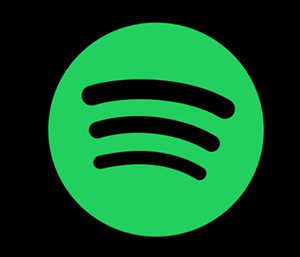

In [139]:
from PIL import Image
img =Image.open("../img/spotify1.jpg")
img

### **Loading the data**

In [200]:
songs = pd.read_csv("../data/spotify_most_streamed_songs.csv")

### **Getting to know my data**

In [201]:
songs_cleaning = songs.copy()

In [202]:
print(f"Shape: {songs_cleaning.shape}\n")
print(f"Dimension: {songs_cleaning.ndim}\n")
print(f"Data types: \n{songs_cleaning.dtypes}")
songs_cleaning.head()

Shape: (953, 25)

Dimension: 2

Data types: 
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object


track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  key   mode  \
0                147  141381703                  43  ...    B  Major   
1                 48  133716286                  48  ...   C#  Major   
2                113  140003974                  94  ...    F  Major   
3                100  800840817                 116  ...    A  Major   
4                 50  303236322                  84  ...    A  Minor   

   danceability_% valence_%  energy_% acousticness_% instrumentalness_%  \
0              80        89        83             31                  0   
1              71        61        74              7                  0   
2              51        32        53             17                  0   
3              55        58        72             11                  0   
4              65        23        80             14                 63   

   liveness_%  speechiness_%  \
0           8              4   
1          10              4   
2          31              6   
3          11             15   
4          11              6   

                                           cover_url  
0                                          Not Found  
1  https://i.scdn.co/image/ab67616d0000b2730656d5...  
2  https://i.scdn.co/image/ab67616d0000b273e85259...  
3  https://i.scdn.co/image/ab67616d0000b273e787cf...  
4  https://i.scdn.co/image/ab67616d0000b273ab5c9c...  

[5 rows x 25 columns]

In [203]:
# Random sampling of the first 5 data points
songs_cleaning.sample(5,random_state=42)

track_name                   artist(s)_name  artist_count  \
199      Take On Me                             a-ha             1   
420          Rumble  Skrillex, Flowdan, Fred again..             3   
694  NEW MAGIC WAND               Tyler, The Creator             2   
750         Falling                     Harry Styles             1   
507           Pepas                          Farruko             1   

     released_year  released_month  released_day  in_spotify_playlists  \
199           1984              10            19                 44927   
420           2022               1            17                  2849   
694           2019               5            16                  4708   
750           2019              12            13                  7556   
507           2021               6            24                 14114   

     in_spotify_charts     streams  in_apple_playlists  ...  key   mode  \
199                 17  1479115056                  34  ...   F#  Minor   
420                  0    78489819                  39  ...   C#  Minor   
694                  0   461437791                  13  ...    F  Minor   
750                  0  1023187129                 124  ...    E  Major   
507                 17  1309887447                 252  ...    G  Major   

     danceability_% valence_%  energy_% acousticness_% instrumentalness_%  \
199              57        86        90              2                  0   
420              81         6        84              5                 23   
694              62        46        73             10                  0   
750              57         6        27             84                  0   
507              76        44        77              1                  0   

     liveness_%  speechiness_%  \
199           9              5   
420           6              6   
694          67             11   
750           9              3   
507          13              3   

                                             cover_url  
199  https://i.scdn.co/image/ab67616d0000b273e8dd4d...  
420  https://i.scdn.co/image/ab67616d0000b273352f15...  
694  https://i.scdn.co/image/ab67616d0000b273700588...  
750  https://i.scdn.co/image/ab67616d0000b27377fdcf...  
507  https://i.scdn.co/image/ab67616d0000b2734239a6...  

[5 rows x 25 columns]

In [204]:
# checking for null values
songs_cleaning.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64

In [205]:
# Further investigation into null values
cond = songs_cleaning.in_shazam_charts.isna() | songs_cleaning['key'].isna()
len(songs_cleaning) - len(songs_cleaning[cond])

817

In [206]:
cond = songs_cleaning.in_shazam_charts.isna() | songs_cleaning['key'].isna()
songs_cleaning[cond].sample(10,random_state=42).sample(5,random_state=42)

track_name artist(s)_name  artist_count  \
151                              Bye     Peso Pluma             1   
363                     Vista Al Mar        Quevedo             1   
441  All I Want for Christmas Is You   Mariah Carey             1   
500                       ýýýabcdefu          Gayle             1   
519   MONTERO (Call Me By Your Name)      Lil Nas X             1   

     released_year  released_month  released_day  in_spotify_playlists  \
151           2023               5            26                   324   
363           2022               9             8                  1769   
441           1994              10            28                 25653   
500           2021               8            13                  7215   
519           2020               9            18                 12329   

     in_spotify_charts     streams  in_apple_playlists  ...  key   mode  \
151                 14    95053634                  13  ...  NaN  Major   
363                 34   362361576                  16  ...  NaN  Minor   
441                  0  1449779435                 387  ...    G  Major   
500                  0  1007612429                 170  ...    E  Major   
519                  0  1735441776                 275  ...   G#  Minor   

     danceability_% valence_%  energy_% acousticness_% instrumentalness_%  \
151              78        70        81             57                  0   
363              76        49        56             80                 12   
441              34        33        63             16                  0   
500              70        42        54             30                  0   
519              61        76        51             30                  0   

     liveness_%  speechiness_%  \
151          10              5   
363          10             13   
441           7              4   
500          37              5   
519          38             15   

                                             cover_url  
151  https://i.scdn.co/image/ab67616d0000b27310c8a0...  
363  https://i.scdn.co/image/ab67616d0000b273efc1b8...  
441  https://i.scdn.co/image/ab67616d0000b2734246e3...  
500                                          Not Found  
519  https://i.scdn.co/image/ab67616d0000b273be8267...  

[5 rows x 25 columns]

In [207]:
# Looking for data where both are null values
cond = (songs_cleaning.in_shazam_charts.isna()) & (songs_cleaning['key'].isna())
print(f"How many rows are involved: {songs_cleaning[cond].shape[0]} rows")
songs_cleaning.loc[cond,['key','in_shazam_charts']].head(10)

How many rows are involved: 9 rows


key in_shazam_charts
127  NaN              NaN
395  NaN              NaN
504  NaN              NaN
506  NaN              NaN
531  NaN              NaN
532  NaN              NaN
554  NaN              NaN
560  NaN              NaN
727  NaN              NaN

In [208]:
# Checking for duplicates
print(f"How many duplicates: {songs_cleaning.duplicated().sum()}")

How many duplicates: 0


In [209]:
# Drop all null values and duplicated values
songs_cleaning.dropna(axis=0,inplace=True)
songs_cleaning.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
cover_url               0
dtype: int64

In [210]:
songs_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    ob

In [211]:
# s1 = pd.Series(['1.0', '2', -3])
# s2 = pd.Series(['1.0', '2', -3,'s'])

In [212]:
# print(s1)
# 0    1.0
# 1      2
# 2     -3
# dtype: object

# pd.to_numeric(s1,downcast='integer',errors='coerce') # Able to downcast
# 0    1
# 1    2
# 2   -3
# dtype: int8

# print(s2)
# 0    1.0
# 1      2
# 2     -3
# 3      s
# dtype: object
# pd.to_numeric(s2,downcast='integer',errors='coerce') # Able to downcast due to the string but resulted to float
# 0    1
# 1    2
# 2   -3
# dtype: int8

In [213]:
songs_cleaning2 = songs_cleaning.copy()

In [176]:
convert_to_ints = ['streams',"in_deezer_playlists",'in_shazam_charts']
for column in convert_to_ints:
    # songs_cleaning[column] = songs_cleaning[column].apply(lambda x:x.replace(",",""))
    print(songs_cleaning2[column].dtype)

object
object
object


In [ ]:
songs_cleaning2['streams'] = songs_cleaning2['streams'].apply(lambda x:x.replace(",",""))
print(songs_cleaning2['streams'].dtype)
print(songs_cleaning2['streams'].astype(np.int64).dtype)

In [227]:
songs_cleaning3 = songs_cleaning2.copy()
songs_cleaning = songs_cleaning3.copy()

In [228]:
# Do some data conversion for some columns which are supposed to be integers
convert_to_ints = ['streams',"in_deezer_playlists",'in_shazam_charts']
print(f"Data shape: {songs_cleaning.shape}")
for column in convert_to_ints:
    songs_cleaning[column] = songs_cleaning[column].apply(lambda x:x.replace(",","")) # object
    # Convert any non integer to null value and drop null values
    songs_cleaning[column] =  pd.to_numeric(songs_cleaning[column],downcast='integer',errors='coerce')
    # Drop the null values in for each column
    songs_cleaning.dropna(subset=[column],axis=0,inplace=True)
    # Force conversion to integers
    songs_cleaning[column] = songs_cleaning[column].astype(np.int64)
    # Getting the new data type
    new_data_type = songs_cleaning[column].dtype
    print("New data type for {} is {}".format(column,new_data_type))

print(f"New data shape: {songs_cleaning.shape}")

Data shape: (817, 25)
New data type for streams is int64
New data type for in_deezer_playlists is int64
New data type for in_shazam_charts is int64
New data shape: (816, 25)


In [230]:
songs_cleaning.describe(include=np.number).T

count          mean           std     min           25%  \
artist_count          816.0  1.568627e+00  8.765219e-01     1.0  1.000000e+00   
released_year         816.0  2.018517e+03  1.070197e+01  1930.0  2.021000e+03   
released_month        816.0  6.024510e+00  3.570415e+00     1.0  3.000000e+00   
released_day          816.0  1.371201e+01  9.294719e+00     1.0  5.000000e+00   
in_spotify_playlists  816.0  4.852316e+03  7.745565e+03    31.0  8.290000e+02   
in_spotify_charts     816.0  1.173652e+01  1.862456e+01     0.0  0.000000e+00   
streams               816.0  4.689858e+08  5.231267e+08  2762.0  1.342848e+08   
in_apple_playlists    816.0  6.021569e+01  7.495356e+01     0.0  1.200000e+01   
in_apple_charts       816.0  4.953431e+01  4.957054e+01     0.0  6.000000e+00   
in_deezer_playlists   816.0  3.720539e+02  1.157759e+03     0.0  1.275000e+01   
in_deezer_charts      816.0  2.454657e+00  5.399650e+00     0.0  0.000000e+00   
in_shazam_charts      816.0  5.762255e+01  1.536163e+02     0.0  0.000000e+00   
bpm                   816.0  1.225809e+02  2.818864e+01    65.0  9.900000e+01   
danceability_%        816.0  6.740931e+01  1.468881e+01    23.0  5.700000e+01   
valence_%             816.0  5.117279e+01  2.362074e+01     4.0  3.200000e+01   
energy_%              816.0  6.435662e+01  1.611665e+01    14.0  5.300000e+01   
acousticness_%        816.0  2.633333e+01  2.547761e+01     0.0  5.000000e+00   
instrumentalness_%    816.0  1.678922e+00  8.772508e+00     0.0  0.000000e+00   
liveness_%            816.0  1.817034e+01  1.355024e+01     3.0  1.000000e+01   
speechiness_%         816.0  1.053554e+01  1.022285e+01     2.0  4.000000e+00   

                              50%           75%           max  
artist_count                  1.0  2.000000e+00  8.000000e+00  
released_year              2022.0  2.022000e+03  2.023000e+03  
released_month                5.0  9.000000e+00  1.200000e+01  
released_day                 13.0  2.200000e+01  3.100000e+01  
in_spotify_playlists       2037.5  4.890750e+03  5.289800e+04  
in_spotify_charts             3.0  1.600000e+01  1.470000e+02  
streams               263836779.5  6.011986e+08  3.562544e+09  
in_apple_playlists           32.0  7.825000e+01  5.320000e+02  
in_apple_charts              34.5  8.400000e+01  2.750000e+02  
in_deezer_playlists          39.0  1.422500e+02  1.236700e+04  
in_deezer_charts              0.0  2.000000e+00  4.500000e+01  
in_shazam_charts              3.0  3.825000e+01  1.451000e+03  
bpm                         120.0  1.412500e+02  2.060000e+02  
danceability_%               70.0  7.900000e+01  9.600000e+01  
valence_%                    51.0  7.000000e+01  9.700000e+01  
energy_%                     66.0  7.600000e+01  9.700000e+01  
acousticness_%               17.0  4.100000e+01  9.700000e+01  
instrumentalness_%            0.0  0.000000e+00  9.100000e+01  
liveness_%                   12.0  2.400000e+01  9.700000e+01  
speechiness_%                 6.0  1.200000e+01  6.400000e+01

**Observations**
- Max number of artists in one song is 8.
- Oldest song was released in 1930 and the latest is in 2023.
- Average songs released over the years in on the 14th
- Median songs released over the years in on the 13th
- Mean streams is 4.689858e+08
- Min streams is 2762.0
- Median streams is 263836779.5
- Max streams is 3.562544e+09

*Spotify*
- Mean number of Spotify playlists a song/songs is/are featured in is 4850.
- Minimum number of Spotify playlists a song/songs is/are featured in is 31.
- Median number of Spotify playlists a song/songs is/are featured in is 2040.
- Max number of Spotify playlists a song/ songs is/are featured in is 52898.
- Least rank of song(s) in Spotify is 147

*Apple*
- Mean number of Apple playlists a song/songs is/are featured in is 60.
- Minimum number of Apple playlists a song/songs is/are featured in is 0.
- Median number of Apple playlists a song/songs is/are featured in is 32.
- Max number of Apple playlists a song/songs is/are featured in is 532.
- Least rank of song(s) in Apple is 275

*Deezer*
- Mean number of Deezer playlists a song/songs is/are featured in is 372.
- Minimum number of Deezer playlists a song/songs is/are featured in is 0.
- Median number of Deezer playlists a song/songs is/are featured in is 39.
- Max number of Deezer playlists a song/songs is/are featured in is 12367.
- Least rank of song(s) in Deezer is 45

*Shazam*
- Least rank of song(s) in Shazam is 1451

*bpm*
- Mean bpm is 1.225809e+02
- Min bpm is 65.0
- Median bpm is 120.0
- Max bpm is 2.060000e+02

*danceability_%*
- Mean danceability is 6.740931e+01
- Min danceability is 23.0	
- Median danceability is 70.0
- Max danceability is 9.600000e+01

*valence_%*
- Mean valence_% is 5.117279e+01
- Min valence_% is 4.0
- Median valence_% is 51.0
- Max valence_% is 9.700000e+01

*energy_%*
- Mean energy_% is 6.435662e+01	
- Min energy_% is 14.0
- Median energy_% is 66.0
- Max energy_% is 9.700000e+01

*acousticness_%*
- Mean acousticness_% is 2.633333e+01
- Min acousticness_% is 0
- Median acousticness_% is 17.0
- Max acousticness_% is 9.700000e+0

*instrumentalness_%*
- Mean instrumentalness_% is 1.678922e+00
- Min instrumentalness_% is 0
- Median instrumentalness_% is 0.0
- Max instrumentalness_% is 9.100000e+01

*liveness_%*
- Mean liveness_% is 1.817034e+01
- Min liveness_% is 3.0
- Median liveness_% is 12.0	
- Max liveness_% is 9.700000e+01

*speechiness_%*
- Mean speechiness_% is 1.053554e+01
- Min speechiness_% is 2.0
- Median speechiness_% is 6.0
- Max speechiness_% is 6.400000e+01

In [235]:
songs_cleaning.describe(include=np.object)

track_name artist(s)_name  key   mode  cover_url
count           816            816  816    816        816
unique          810            570   11      2        455
top     Die For You   Taylor Swift   C#  Major  Not Found
freq              2             29  115    451        204

**Observations**
- Die For You is has the highest appearance
- Taylor Swift has the highest appearance
- C# is the highest known appearance
- Major mode is the highest known appearance
- Disregard cover_url column, must be dropped

In [234]:
songs_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    int64 
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    int64 
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    ob

### **Memory Management**

In [237]:
# Memory management
def memory_magment(df):
    for col in df.columns:
        col_type = df[col].dtype

        cond1 = (col_type == np.object ) or (col_type == pd.CategoricalDtype)
        if cond1:
            df[col] = df[col].astype('category')  
        else:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8) # int 8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16) # int 16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)  # in 32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) # int 64 
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].round(3)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].round(3)
                else:
                    df[col] = df[col].round(3) # float64

    return df

In [238]:
# Data conversion and memory management
songs_cleaning.drop(columns=['cover_url'],inplace=True)
songs_data_memory = songs_cleaning.copy()
songs_data_memory = memory_magment(songs_data_memory)

In [239]:
songs_data_memory.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   track_name            816 non-null    category
 1   artist(s)_name        816 non-null    category
 2   artist_count          816 non-null    int8    
 3   released_year         816 non-null    int16   
 4   released_month        816 non-null    int8    
 5   released_day          816 non-null    int8    
 6   in_spotify_playlists  816 non-null    int32   
 7   in_spotify_charts     816 non-null    int16   
 8   streams               816 non-null    int64   
 9   in_apple_playlists    816 non-null    int16   
 10  in_apple_charts       816 non-null    int16   
 11  in_deezer_playlists   816 non-null    int16   
 12  in_deezer_charts      816 non-null    int8    
 13  in_shazam_charts      816 non-null    int16   
 14  bpm                   816 non-null    int16   
 15  key   

In [240]:
# percentage decrease
np.round(((438.2-196.3)/438.2) * 100,1)

55.2

Memory usage has dropped from 438.2 KB to 55.2 KB i.e. **55.2% decrease in memory usage**

### **EDA**

In [244]:
songs_eda = songs_data_memory.copy()

In [639]:
# columns = songs_eda.columns.to_list()
# for col in columns:
#    print(f"{col}: {columns.index(col)}")
#    # print(f"{col}: {songs_eda.columns.get_loc(col)}")

In [640]:
cond = songs_eda.artist_count >= 8
songs_eda[cond]

track_name                                     artist(s)_name  \
642   Se Le Ve  Arcangel, De La Ghetto, Justin Quiles, Lenny T...   

     artist_count  released_year released_month  released_day  \
642             8           2021         August            12   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
642                  1560                  0  223319934                  72   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
642  ...   84    G  Minor              56         61       76             10   

     instrumentalness_%  liveness_%  speechiness_%  
642                   0          14             11  

[1 rows x 24 columns]

In [647]:
artists = songs_eda[cond]
artists['artist(s)_name'].tolist()

['Arcangel, De La Ghetto, Justin Quiles, Lenny Tavï¿½ï¿½rez, Sech, Dalex, Dimelo Flow, Rich Music']

In [286]:
# Oldest song(s)
cond = songs_eda.released_year == 1930
songs_eda[cond]

track_name           artist(s)_name  artist_count  released_year  \
439  Agudo Mï¿½ï¿½gi  Styrx, utku INC, Thezth             3           1930   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
439               1             1                   323                  0   

      streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
439  90598517                   4  ...  130   F#  Minor              65   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
439         49       80             22                   4           7   

     speechiness_%  
439              5  

[1 rows x 24 columns]

In [287]:
# latest song(s)
cond = songs_eda.released_year == 2023
songs_eda[cond]

track_name               artist(s)_name  \
0    Seven (feat. Latto) (Explicit Ver.)             Latto, Jung Kook   
1                                   LALA                  Myke Towers   
2                                vampire               Olivia Rodrigo   
4                         WHERE SHE GOES                    Bad Bunny   
5                               Sprinter            Dave, Central Cee   
..                                   ...                          ...   
370                           Love Again                The Kid Laroi   
380                                LLYLM                     ROSALï¿½   
382                            TRUSTFALL                         P!nk   
398                             Muï¿½ï¿½  Steve Aoki, Tini, La Joaqui   
404                      Sugar Rush Ride          TOMORROW X TOGETHER   

     artist_count  released_year  released_month  released_day  \
0               2           2023               7            14   
1               1           2023               3            23   
2               1           2023               6            30   
4               1           2023               5            18   
5               2           2023               6             1   
..            ...            ...             ...           ...   
370             1           2023               1            27   
380             1           2023               1            27   
382             1           2023               1            27   
398             3           2023               1            12   
404             1           2023               1            27   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
0                     553                147  141381703                  43   
1                    1474                 48  133716286                  48   
2                    1397                113  140003974                  94   
4                    3133                 50  303236322                  84   
5                    2186                 91  183706234                  67   
..                    ...                ...        ...                 ...   
370                  1283                  0  147538971                  57   
380                  1838                  0  124988687                 105   
382                  2098                 16  134255790                  88   
398                   658                  6  120972253                  33   
404                   359                  0  107642809                  12   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
0    ...  125    B  Major              80         89       83             31   
1    ...   92   C#  Major              71         61       74              7   
2    ...  138    F  Major              51         32       53             17   
4    ...  144    A  Minor              65         23       80             14   
5    ...  141   C#  Major              92         66       58             19   
..   ...  ...  ...    ...             ...        ...      ...            ...   
370  ...  107    B  Minor              66         47       40             72   
380  ...  170   F#  Minor              56         56       63             13   
382  ...  122   G#  Major              64         25       89              0   
398  ...   90   A#  Minor              68         83       71              3   
404  ...  125   A#  Minor              71         83       89              1   

     instrumentalness_%  liveness_%  speechiness_%  
0                     0           8              4  
1                     0          10              4  
2                     0          31              6  
4                    63          11              6  
5                     0           8             24  
..                  ...         ...            ...  
370                   0          11              3  
380                   0   

In [288]:
# Average year song(s)
cond = songs_eda.released_year == 2018
songs_eda[cond]

track_name             artist(s)_name  \
41   Sunflower - Spider-Man: Into the Spider-Verse      Post Malone, Swae Lee   
170                             Let Me Down Slowly              Alec Benjamin   
288                              I Was Never There  The Weeknd, Gesaffelstein   
292                               Call Out My Name                 The Weeknd   
545                                       Softcore          The Neighbourhood   
634                                        Shallow  Lady Gaga, Bradley Cooper   
718                                           Hope               XXXTENTACION   
856                       SLOW DANCING IN THE DARK                       Joji   
923                     we fell in love in october                girl in red   

     artist_count  released_year  released_month  released_day  \
41              2           2018              10             9   
170             1           2018               5            25   
288             2           2018               3            29   
292             1           2018               3            29   
545             1           2018               3             9   
634             2           2018               9            27   
718             1           2018               3            16   
856             1           2018               9            12   
923             1           2018              11            21   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
41                  24094                 78  2808096550                 372   
170                  5897                 19  1374581173                   0   
288                  4188                 15   705469769                  30   
292                 11087                  6  1449799467                 151   
545                  3947                 12   599770206                  33   
634                 16636                 12  2159346687                 368   
718                  3659                  0  1200808494                  11   
856                 10211                  0  1122364376                  38   
923                  6858                  0   723043854                  31   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
41   ...   90    D  Major              76         91       50             54   
170  ...  150   C#  Minor              65         51       55             73   
288  ...  114   A#  Major              32         17       74             14   
292  ...  134   C#  Major              45         17       60             21   
545  ...   94    D  Major              57         36       58              5   
634  ...   96    G  Major              57         30       40             38   
718  ...  146    A  Minor              59         23       46             66   
856  ...   89   D#  Major              52         28       48             54   
923  ...  130    G  Major              57         24       37             11   

     instrumentalness_%  liveness_%  speechiness_%  
41                    0           7              5  
170                   0          14              3  
288                   0          17              3  
292                   0          33              4  
545                   0          15              3  
634                   0          26              3  
718                   0          15              6  
856                   1          19              3  
923                  18          16              3  

[9 rows x 24 columns]

In [292]:
# Average month song(s)
cond = songs_eda.released_month == 6
songs_eda[cond]

track_name  \
2                                              vampire   
5                                             Sprinter   
20                                           LADY GAGA   
24   Popular (with Playboi Carti & Madonna) - The I...   
25                                         SABOR FRESA   
..                                                 ...   
897                                    Don't You Worry   
906                                         Ferxxo 100   
907                           KU LO SA - A COLORS SHOW   
914                                            Selfish   
917                                             Poland   

                               artist(s)_name  artist_count  released_year  \
2                              Olivia Rodrigo             1           2023   
5                           Dave, Central Cee             2           2023   
20   Gabito Ballesteros, Junior H, Peso Pluma             3           2023   
24         The Weeknd, Madonna, Playboi Carti             3           2023   
25                              Fuerza Regida             1           2023   
..                                        ...           ...            ...   
897    David Guetta, Shakira, Black Eyed Peas             3           2022   
906                                      Feid             1           2022   
907                                    Oxlade             1           2022   
914                                  PnB Rock             1           2016   
917                                Lil Yachty             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
2                 6            30                  1397                113   
5                 6             1                  2186                 91   
20                6            22                   332                 26   
24                6             2                  1945                 87   
25                6            22                   250                 26   
..              ...           ...                   ...                ...   
897               6            16                  2442                  0   
906               6             3                  1647                 30   
907               6            10                  2019                  8   
914               6            23                  2468                  0   
917               6            23                  1584                  0   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
2    140003974                  94  ...  138    F  Major              51   
5    183706234                  67  ...  141   C#  Major              92   
20    86444842                  11  ...  140    F  Minor              65   
24   115364561                  74  ...   99   C#  Major              85   
25    78300654                  16  ...  130    G  Minor              79   
..         ...                 ...  ...  ...  ...    ...             ...   
897  240918092                  81  ...  132    B  Major              82   
906  278920007                  20  ...  164   G#  Minor              70   
907  222410722                 117  ...   93   A#  Minor              65   
914  380319238                  15  ...  102   C#  Minor              64   
917  115331792                  38  ...  150    F  Minor              70   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
2           32       53             17                   0          31   
5           66       58             19                   0           8   
20          87       74             22                   0          42   
24          83       68              7                   0          36   
25          96       86              9                   0           9   
..         ...      ...            ...                 ...         ...   
897         49       88             20    

In [293]:
# Average days song(s)
cond = songs_eda.released_day == 14
songs_eda[cond]

track_name  \
0                  Seven (feat. Latto) (Explicit Ver.)   
13                                            Daylight   
68                                           Overdrive   
102                                           Chemical   
241                                             Cupido   
246                                         Easy On Me   
249                                 Oi Balde - Ao Vivo   
272                  Princess Diana (with Nicki Minaj)   
313                       Dijeron Que No La Iba Lograr   
435                Shut up My Moms Calling - (Sped Up)   
436                                            Ferrari   
445        It's Beginning To Look A Lot Like Christmas   
447           It's the Most Wonderful Time of the Year   
452                              Holly Jolly Christmas   
607                                               2055   
645                           Esqueï¿½ï¿½a-Me Se For C   
667  Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...   
764                                    About Damn Time   
787                                         ULTRA SOLO   
919                                            Bye Bye   
924                            2 Be Loved (Am I Ready)   
928                                  California Breeze   

                                        artist(s)_name  artist_count  \
0                                     Latto, Jung Kook             2   
13                                       David Kushner             1   
68                                         Post Malone             1   
102                                        Post Malone             1   
241                                               Tini             1   
246                                              Adele             1   
249                               Zï¿½ï¿½ Neto & Crist             1   
272                             Nicki Minaj, Ice Spice             2   
313                         Fuerza Regida, Chino Pacas             2   
435                                         Hotel Ugly             1   
436                        James Hype, Miggy Dela Rosa             2   
445                                     Michael Bublï¿             1   
447                                      Andy Williams             1   
452                                     Michael Bublï¿             1   
607                                      Sleepy hallow             1   
645               Marï¿½ï¿½lia Mendonï¿½ï¿½a, Maiara &             2   
667  Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...             7   
764                                              Lizzo             1   
787                          Polima WestCoast, Pailita             2   
919                             Marshmello, Juice WRLD             2   
924                                              Lizzo             1   
928                                           Lil Baby             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
13            2023               4            14                  3528   
68            2023               7            14                   410   
102           2023               4            14                  2528   
241           2023               2            14                  1240   
246           2021              10            14                 10195   
249           2023               2            14                   845   
272           2023               4            14                  1444   
313           2023               3            14                   320   
435           2022               9            14                   713   
436           2022               3            14                  7758   
445           2011              10            14                 12353   
447           1963              10            14                  8879   
452           20

In [294]:
# Median days song(s)
cond = songs_eda.released_day == 13
songs_eda[cond]

track_name  \
30                                                Rush   
189                                  Take Me To Church   
210                                           Abcdario   
316                                          You Proof   
321                                              CAIRO   
551                                Meet Me At Our Spot   
605              OUT OUT (feat. Charli XCX & Saweetie)   
750                                            Falling   
756                                             Golden   
763                                                N95   
765                                           Die Hard   
768                                    United In Grief   
769                         Father Time (feat. Sampha)   
771                                        Rich Spirit   
774                                        Silent Hill   
776                                       Count Me Out   
779                                    We Cry Together   
780                                             Savior   
783                                 Worldwide Steppers   
785                                      Purple Hearts   
794                                         Mr. Morale   
797                                   Rich - Interlude   
798                                         SUPERMODEL   
801                                              Crown   
802                                     Auntie Diaries   
804                                             Mirror   
807                                 Savior - Interlude   
809  Mother I Sober (feat. Beth Gibbons of Portishead)   
814                                               ZOOM   
861                           En El Radio Un Cochinero   
888                                    Mary On A Cross   
908                                         Prohibidox   
913                                   XQ Te Pones Asï¿   
916                                       Lady Mi Amor   

                                      artist(s)_name  artist_count  \
30                                       Troye Sivan             1   
189                                           Hozier             1   
210                            Junior H, Eden Muï¿½ï             2   
316                                    Morgan Wallen             1   
321                        Karol G, Ovy On The Drums             2   
551                  THE ANXIETY, Willow, Tyler Cole             3   
605      Charli XCX, Jax Jones, Joel Corry, Saweetie             4   
750                                     Harry Styles             1   
756                                     Harry Styles             1   
763                                   Kendrick Lamar             1   
765             Kendrick Lamar, Blxst, Amanda Reifer             3   
768                                   Kendrick Lamar             1   
769                           Kendrick Lamar, Sampha             2   
771                                   Kendrick Lamar             1   
774                      Kendrick Lamar, Kodak Black             2   
776                                   Kendrick Lamar             1   
779                    Kendrick Lamar, Taylour Paige             2   
780               Kendrick Lamar, Sam Dew, Baby Keem             3   
783                                   Kendrick Lamar             1   
785  Kendrick Lamar, Ghostface Killah, Summer Walker             3   
794                      Kendrick Lamar, Tanna Leone             2   
797                                   Kendrick Lamar             1   
798                                        Mï¿½ï¿½ne             1   
801                                   Kendrick Lamar             1   
802                                   Kendrick Lamar             1   
804                                   Kendrick Lamar             1   
807                                   Kendrick Lamar             1   
809                     Kendrick Lamar, Beth Gibbons 

In [301]:
# Average number of times song(s) are streamed
cond = songs_eda.streams == 4.689858e+08
songs_eda[cond]
# So songs is exactly 468985800

Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts, bpm, key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_%]
Index: []

[0 rows x 24 columns]

In [304]:
# Average number of times song(s) are streamed above 468985800
cond = songs_eda.streams >= 4.689858e+08
songs_eda[cond].sort_values(ascending=False,by='streams')

track_name  \
179                                   Shape of You   
41   Sunflower - Spider-Man: Into the Spider-Verse   
162                                      One Dance   
84                       STAY (with Justin Bieber)   
140                                       Believer   
..                                             ...   
775                                   La Corriente   
317                                    LA INOCENTE   
452                          Holly Jolly Christmas   
466         Let It Snow! Let It Snow! Let It Snow!   
329                                         LOKERA   

                        artist(s)_name  artist_count  released_year  \
179                         Ed Sheeran             1           2017   
41               Post Malone, Swae Lee             2           2018   
162                Drake, WizKid, Kyla             3           2016   
84        Justin Bieber, The Kid Laroi             2           2021   
140                    Imagine Dragons             1           2017   
..                                 ...           ...            ...   
775               Tony Dize, Bad Bunny             2           2022   
317                         Feid, Mora             2           2022   
452                     Michael Bublï¿             1           2011   
466  Frank Sinatra, B. Swanson Quartet             2           1950   
329      Brray, Rauw Alejandro, Lyanno             3           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
179               1             6                 32181                 10   
41               10             9                 24094                 78   
162               4             4                 43257                 24   
84                7             9                 17050                 36   
140               1            31                 18986                 23   
..              ...           ...                   ...                ...   
775               5             6                  1796                  8   
317               4             1                  2598                 37   
452              10            14                  7655                  0   
466               1             1                 10585                  0   
329               7            25                  3301                 30   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
179  3562543890                  33  ...   96   C#  Minor              83   
41   2808096550                 372  ...   90    D  Major              76   
162  2713922350                 433  ...  104   C#  Major              77   
84   2665343922                 492  ...  170   C#  Major              59   
140  2594040133                 250  ...  125   A#  Minor              77   
..          ...                 ...  ...  ...  ...    ...             ...   
775   479655659                   8  ...  196    B  Minor              66   
317   477033549                  28  ...   92    F  Minor              76   
452   476244795                   5  ...  151    G  Major              65   
466   473248298                 126  ...  143    D  Major              60   
329   471819764                  72  ...  102    B  Minor              83   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
179         93       65             58                   0           9   
41          91       50             54                   0           7   
162         36       63              1                   0          36   
84          48       76              4                   0          10   
140         74       78              4                   0          23   
..         ...      ...            ...                 ...         ...   
775         58       79             23                   0          22   
317         46       79             31                   0           7   
452       

In [305]:
cond = (songs_eda.streams > 2762.0) & (songs_eda.streams < 4.689858e+08) 
songs_eda[cond].sort_values(ascending=False,by='streams')

track_name  \
283                     Lovers Rock   
539                       Oh My God   
618                         Cï¿½ï¿½   
203                             AMG   
436                         Ferrari   
..                              ...   
248  Danger (Spider) (Offset & JID)   
30                             Rush   
68                        Overdrive   
142     Gol Bolinha, Gol Quadrado 2   
393               Jhoome Jo Pathaan   

                                        artist(s)_name  artist_count  \
283                                            TV Girl             1   
539                                              Adele             1   
618                                     Rauw Alejandro             1   
203      Natanael Cano, Gabito Ballesteros, Peso Pluma             3   
436                        James Hype, Miggy Dela Rosa             2   
..                                                 ...           ...   
248                                        Offset, JID             2   
30                                         Troye Sivan             1   
68                                         Post Malone             1   
142                                Mc Pedrinho, DJ 900             2   
393  Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...             6   

     released_year  released_month  released_day  in_spotify_playlists  \
283           2014               6             5                  6339   
539           2021              11            19                  4431   
618           2021               6            25                  2636   
203           2022              11            24                   995   
436           2022               3            14                  7758   
..             ...             ...           ...                   ...   
248           2023               6             2                   214   
30            2023               7            13                   864   
68            2023               7            14                   410   
142           2023               6             1                   293   
393           2022              12            22                   138   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
283                 13  466231982                   3  ...  105    F  Minor   
539                  0  466214729                 105  ...   88   C#  Major   
618                  3  465959382                  36  ...  102    A  Minor   
203                 19  463564958                  12  ...  136    B  Minor   
436                 28  462791599                 173  ...  125   C#  Minor   
..                 ...        ...                 ...  ...  ...  ...    ...   
248                  0   24975653                   3  ...  143    B  Major   
30                  78   22581161                  71  ...  126    F  Minor   
68                  36   14780425                  36  ...  140   C#  Major   
142                  8   11956641                   5  ...  133    B  Minor   
393                  4    1365184                  13  ...  105    G  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
283              56         57       87              0                   1   
539              53         55       73              9                   0   
618              77         26       63             58                   0   
203              77         79       73             15                   0   
436              84         70       69              1                   0   
..              ...        ...      ...            ...                 ...   
248              83         25       69              4                   0   
30               74         35       84              0                   0   
68               56         48       73              0                   0   
142              93         68       65             42                   

In [310]:
# Songs streamed above median 
cond = (songs_eda.streams >= 263836779.5)
songs_eda[cond].sort_values(ascending=False,by='streams')

track_name  \
179                                   Shape of You   
41   Sunflower - Spider-Man: Into the Spider-Verse   
162                                      One Dance   
84                       STAY (with Justin Bieber)   
140                                       Believer   
..                                             ...   
522                               Surface Pressure   
261                                  X SI VOLVEMOS   
183                                  Car's Outside   
889                                      Attention   
601                           Vai Lï¿½ï¿½ Em Casa    

                                    artist(s)_name  artist_count  \
179                                     Ed Sheeran             1   
41                           Post Malone, Swae Lee             2   
162                            Drake, WizKid, Kyla             3   
84                    Justin Bieber, The Kid Laroi             2   
140                                Imagine Dragons             1   
..                                             ...           ...   
522                                 Jessica Darrow             1   
261                          Karol G, Romeo Santos             2   
183                                   James Arthur             1   
889                                       NewJeans             1   
601  Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &             2   

     released_year  released_month  released_day  in_spotify_playlists  \
179           2017               1             6                 32181   
41            2018              10             9                 24094   
162           2016               4             4                 43257   
84            2021               7             9                 17050   
140           2017               1            31                 18986   
..             ...             ...           ...                   ...   
522           2021              11            19                  1756   
261           2023               2             2                  2127   
183           2019              10            18                   794   
889           2022               8             1                   799   
601           2021              10            22                   772   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
179                 10  3562543890                  33  ...   96   C#  Minor   
41                  78  2808096550                 372  ...   90    D  Major   
162                 24  2713922350                 433  ...  104   C#  Major   
84                  36  2665343922                 492  ...  170   C#  Major   
140                 23  2594040133                 250  ...  125   A#  Minor   
..                 ...         ...                 ...  ...  ...  ...    ...   
522                  0   267758538                  38  ...  180    D  Major   
261                 33   266624541                  45  ...  178   C#  Minor   
183                 10   265882712                  38  ...  150    A  Major   
889                 12   264717480                  14  ...  105   A#  Minor   
601                  0   263894529                   7  ...  158   G#  Minor   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
179              83         93       65             58                   0   
41               76         91       50             54                   0   
162              77         36       63              1                   0   
84               59         48       76              4                   0   
140              77         74       78              4                   0   
..              ...        ...      ...            ...                 ...   
522              65         37       58              2                   0   
261              79         58       78             34                   0   
183              34   

In [312]:
# The total number of playlists that a song appears above mean 
cond = (songs_eda['in_spotify_playlists'] >= 4850)
songs_eda[cond].sort_values(ascending=False,by='in_spotify_playlists')

track_name  \
757                          Get Lucky - Radio Edit   
630                                  Mr. Brightside   
720                         Wake Me Up - Radio Edit   
624       Smells Like Teen Spirit - Remastered 2021   
199                                      Take On Me   
..                                              ...   
303                                           10:35   
636  Leave Before You Love Me (with Jonas Brothers)   
696                                        La Santa   
93                                 Donï¿½ï¿½ï¿½t Bl   
600                           I WANNA BE YOUR SLAVE   

                                 artist(s)_name  artist_count  released_year  \
757  Pharrell Williams, Nile Rodgers, Daft Punk             3           2013   
630                                 The Killers             1           2003   
720                                      Avicii             1           2013   
624                                     Nirvana             1           1991   
199                                        a-ha             1           1984   
..                                          ...           ...            ...   
303                         Tiï¿½ï¿½sto, Tate M             2           2022   
636                  Marshmello, Jonas Brothers             2           2021   
696                     Daddy Yankee, Bad Bunny             2           2020   
93                                 Taylor Swift             1           2017   
600                                   Mï¿½ï¿½ne             1           2021   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
757               1             1                 52898                  0   
630               9            23                 51979                 15   
720               1             1                 50887                 34   
624               9            10                 49991                  9   
199              10            19                 44927                 17   
..              ...           ...                   ...                ...   
303              11             1                  4942                 26   
636               4            28                  4893                  4   
696               2            29                  4890                 20   
93               11             8                  4875                 23   
600               3            19                  4873                  0   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
757   933815613                 203  ...  116   F#  Minor              79   
630  1806617704                 306  ...  148   C#  Major              35   
720  1970673297                 315  ...  124    D  Major              53   
624  1690192927                 265  ...  117   C#  Major              52   
199  1479115056                  34  ...   84   F#  Minor              57   
..          ...                 ...  ...  ...  ...    ...             ...   
303   325592432                 190  ...  120   G#  Major              70   
636   651732901                 143  ...  120    G  Major              72   
696   759208783                  52  ...   93   C#  Major              74   
93    685032533                  19  ...  136    A  Minor              62   
600   851070493                  65  ...  133   C#  Major              75   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
757         87       81              4                   0          10   
630         24       93              0                   0          10   
720         66       78              0                   0          16   
624         73       91              0                   0          11   
199         86       90              2                   0           9   
..         ...      ...            ...                 ...         ...   
303         70       79              7 

In [316]:
# The total number of playlists that a song appears below or equal to 31
cond = (songs_eda['in_spotify_playlists'] <= 31)
songs_eda[cond].sort_values(ascending=False,by='in_spotify_playlists')

track_name artist(s)_name  artist_count  released_year  \
94  Still With You      Jung Kook             1           2020   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
94               6             5                    31                 39   

     streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
94  38411956                   2  ...   88   C#  Minor              53   

    valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
94         34       47              9                   0          83   

    speechiness_%  
94              4  

[1 rows x 24 columns]

In [319]:
# The total number of playlists that a song appears above the median
cond = (songs_eda['in_spotify_playlists'] >= 2040)
songs_eda[cond].sort_values(ascending=False,by='in_spotify_playlists')

track_name  \
757                     Get Lucky - Radio Edit   
630                             Mr. Brightside   
720                    Wake Me Up - Radio Edit   
624  Smells Like Teen Spirit - Remastered 2021   
199                                 Take On Me   
..                                         ...   
846                               Keep Driving   
733                           When You're Gone   
235                            Search & Rescue   
800                             Thousand Miles   
315                        If We Ever Broke Up   

                                 artist(s)_name  artist_count  released_year  \
757  Pharrell Williams, Nile Rodgers, Daft Punk             3           2013   
630                                 The Killers             1           2003   
720                                      Avicii             1           2013   
624                                     Nirvana             1           1991   
199                                        a-ha             1           1984   
..                                          ...           ...            ...   
846                                Harry Styles             1           2022   
733                                Shawn Mendes             1           2022   
235                                       Drake             1           2023   
800                               The Kid Laroi             1           2022   
315                                Mae Stephens             1           2023   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
757               1             1                 52898                  0   
630               9            23                 51979                 15   
720               1             1                 50887                 34   
624               9            10                 49991                  9   
199              10            19                 44927                 17   
..              ...           ...                   ...                ...   
846               5            20                  2094                  1   
733               3            31                  2092                  0   
235               4             7                  2066                  6   
800               4            22                  2050                  0   
315               2            10                  2040                  4   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
757   933815613                 203  ...  116   F#  Minor              79   
630  1806617704                 306  ...  148   C#  Major              35   
720  1970673297                 315  ...  124    D  Major              53   
624  1690192927                 265  ...  117   C#  Major              52   
199  1479115056                  34  ...   84   F#  Minor              57   
..          ...                 ...  ...  ...  ...    ...             ...   
846   236060709                   8  ...  165    A  Major              72   
733   255120451                  75  ...  147    F  Major              60   
235   175097833                  58  ...  142   A#  Minor              82   
800   244741137                  52  ...   81    G  Major              38   
315   165584767                  81  ...  116    G  Major              90   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
757         87       81              4                   0          10   
630         24       93              0                   0          10   
720         66       78              0                   0          16   
624         73       91              0                   0          11   
199         86       90              2                   0           9   
..         ...      ...            ...                 ...         ...   
846         90       48             32                   0          18   
733         58      

In [320]:
# The song(s) above the max number of spotify playlists
cond = (songs_eda['in_spotify_playlists'] >= 52898)
songs_eda[cond].sort_values(ascending=False,by='in_spotify_playlists')

track_name                              artist(s)_name  \
757  Get Lucky - Radio Edit  Pharrell Williams, Nile Rodgers, Daft Punk   

     artist_count  released_year  released_month  released_day  \
757             3           2013               1             1   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
757                 52898                  0  933815613                 203   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
757  ...  116   F#  Minor              79         87       81              4   

     instrumentalness_%  liveness_%  speechiness_%  
757                   0          10              4  

[1 rows x 24 columns]

In [322]:
# Song(s) with the lowest Spotify ranking
cond = (songs_eda['in_spotify_charts'] == 147)
songs_eda[cond]

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
0                147  141381703                  43  ...  125    B  Major   

   danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0              80         89       83             31                   0   

   liveness_%  speechiness_%  
0           8              4  

[1 rows x 24 columns]

In [649]:
# Song(s) with the highest Spotify ranking
cond = (songs_eda['in_spotify_charts'] == 1)
songs_eda[cond].sort_values(by='streams',ascending=False)

track_name  \
672                                            HUMBLE.   
871                                Sweet Child O' Mine   
695                                          Adore You   
756                                             Golden   
732                                      X ï¿½ï¿½LTIMA   
828                       Music For a Sushi Restaurant   
786                                   Un Verano Sin Ti   
583                                             ELEVEN   
667  Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...   
822                                          San Lucas   
536                                        Malvadï¿½ï¿   
846                                       Keep Driving   
851                                        Daydreaming   
254                                       Mejor Que Yo   
228           Hummingbird (Metro Boomin & James Blake)   

                                        artist(s)_name  artist_count  \
672                                     Kendrick Lamar             1   
871                                      Guns N' Roses             1   
695                                       Harry Styles             1   
756                                       Harry Styles             1   
732                            Daddy Yankee, Bad Bunny             2   
828                                       Harry Styles             1   
786                                          Bad Bunny             1   
583                                                IVE             1   
667  Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...             7   
822                                        Kevin Kaarl             1   
536                           Xamï¿½ï¿½, Gustah, Neo B             3   
846                                       Harry Styles             1   
851                                       Harry Styles             1   
254                    Mambo Kingz, DJ Luian, Anuel Aa             3   
228                          James Blake, Metro Boomin             2   

     released_year released_month  released_day  in_spotify_playlists  \
672           2017          March            30                 33206   
871           1987        January             1                 41231   
695           2019       December             6                 13454   
756           2019       December            13                  8429   
732           2022          March            25                  2697   
828           2022            May            20                  4449   
786           2022            May             6                  1004   
583           2021       December             1                   521   
667           2022        January            14                  1034   
822           2019       November             7                   407   
536           2021       November            30                   648   
846           2022            May            20                  2094   
851           2022            May            20                  1900   
254           2023            May             4                   675   
228           2023           June             2                   277   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
672                  1  1929770265                 284  ...  150   C#  Minor   
871                  1  1553497987                 228  ...  125   F#  Major   
695                  1  1439191367                 246  ...   99   G#  Major   
756                  1   807015863                  85  ...  140    E  Minor   
732                  1   349746291                  55  ...   90    G  Major   
828                  1   334733572                  80  ...  107    B  Major   
786                  1   283332261                   8  ...  188    F  Minor   
583                  1   247737946                  17  ...  120    A  Major   
667                  1   245400167                  19  ...  174    F  Mi

In [325]:
# The total number of playlists that a song appears above mean 
cond = (songs_eda['in_apple_playlists'] >= 60)
songs_eda[cond].sort_values(ascending=False,by='in_apple_playlists')

track_name  \
407                                    Don't Start Now   
84                           STAY (with Justin Bieber)   
693                                          Seï¿½ï¿½o   
162                                          One Dance   
106                            Cold Heart - PNAU Remix   
..                                                 ...   
646                                          Miï¿½ï¿½n   
528  Lo Siento BB:/ (with Bad Bunny & Julieta Venegas)   
8                                             fukumean   
81   Until I Found You (with Em Beihold) - Em Beiho...   
595                                               Peru   

                        artist(s)_name  artist_count  released_year  \
407                           Dua Lipa             1           2019   
84        Justin Bieber, The Kid Laroi             2           2021   
693       Shawn Mendes, Camila Cabello             2           2019   
162                Drake, WizKid, Kyla             3           2016   
106         Dua Lipa, Elton John, Pnau             3           2017   
..                                 ...           ...            ...   
646                Tini, Maria Becerra             2           2021   
528  Julieta Venegas, Bad Bunny, Tainy             3           2021   
8                                Gunna             1           2023   
81         Em Beihold, Stephen Sanchez             2           2022   
595            Ed Sheeran, Fireboy DML             2           2021   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
407              10            31                 27119                  0   
84                7             9                 17050                 36   
693               6            19                 15010                  2   
162               4             4                 43257                 24   
106              11            10                 21097                 52   
..              ...           ...                   ...                ...   
646               4            29                  3406                 16   
528              10             5                  3423                 26   
8                 5            15                  1096                 83   
81                4            22                  2790                 30   
595              12            23                  2999                  0   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
407  2303033973                 532  ...  124    B  Minor              79   
84   2665343922                 492  ...  170   C#  Major              59   
693  2484812918                 453  ...  117    A  Minor              76   
162  2713922350                 433  ...  104   C#  Major              77   
106  1605224506                 384  ...  116   C#  Major              80   
..          ...                 ...  ...  ...  ...    ...             ...   
646   596152090                  61  ...   92    D  Major              85   
528   775542072                  61  ...  170    E  Minor              64   
8      95217315                  60  ...  130   C#  Minor              85   
81    600976848                  60  ...  101   A#  Major              34   
595   261286503                  60  ...  108    G  Minor              96   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
407         68       79              1                   0          10   
84          48       76              4                   0          10   
693         77       52              4                   0           8   
162         36       63              1                   0          36   
106         92       80              4                   0          10   
..         ...      ...            ...                 ...         ...   
646         92       54             16                   0          29   
528         14       70              9  

In [326]:
# The total number of playlists that a song appears below or equal to 31
cond = (songs_eda['in_apple_playlists'] <= 0)
songs_eda[cond].sort_values(ascending=False,by='in_apple_playlists')

track_name  \
29             Dance The Night (From Barbie The Album)   
425                                           Dream On   
853                          Nos Comemos (feat. Ozuna)   
835                                        Born Singer   
807                                 Savior - Interlude   
797                                   Rich - Interlude   
628                             The Rumbling (TV Size)   
541                                   A Tale By Quincy   
493                                           Too Late   
378                                        My Universe   
53                        (It Goes Like) Nanana - Edit   
372                                    About Damn Time   
327         Peaches (from The Super Mario Bros. Movie)   
280            Watch This - ARIZONATEARS Pluggnb Remix   
272                  Princess Diana (with Nicki Minaj)   
265  Cupid ï¿½ï¿½ï¿½ Twin Ver. (FIFTY FIFTY) ï¿½ï¿½...   
170                                 Let Me Down Slowly   
154                               Locked Out Of Heaven   
930                                Casei Com a Putaria   

                                    artist(s)_name  artist_count  \
29                                        Dua Lipa             1   
425                                      Aerosmith             1   
853                               Ozuna, Tiago pzk             2   
835                                            BTS             1   
807                                 Kendrick Lamar             1   
797                                 Kendrick Lamar             1   
628                                            SiM             1   
541                                     The Weeknd             1   
493                                            SZA             1   
378                                  Coldplay, BTS             2   
53                                       Peggy Gou             1   
372                                          Lizzo             1   
327                                     Jack Black             1   
280  sped up nightcore, ARIZONATEARS, Lil Uzi Vert             3   
272                         Nicki Minaj, Ice Spice             2   
265                                   sped up 8282             1   
170                                  Alec Benjamin             1   
154                                     Bruno Mars             1   
930             MC Ryan SP, Love Funk, Mc Paiva ZS             3   

     released_year  released_month  released_day  in_spotify_playlists  \
29            2023               5            25                  2988   
425           1973               1             5                   168   
853           2022               6             2                   896   
835           2022               6            10                   279   
807           2022               5            13                  1194   
797           2022               5            13                  1103   
628           2022               1            10                   254   
541           2022               1             7                   733   
493           2022              12             8                   714   
378           2021               9            24                  6127   
53            2023               6            15                  2259   
372           2022               7            15                  2332   
327           2023               4             7                    34   
280           2023               2             5                  1638   
272           2023               4            14                  1444   
265           1997               1             1                   472   
170           2018               5            25                  5897   
154           2012              12             5                  1622   
930           2022               7             1                   648   

     in_spotify_charts     streams  in_ap

In [327]:
# The total number of playlists that a song appears above the median
cond = (songs_eda['in_apple_playlists'] >= 32)
songs_eda[cond].sort_values(ascending=False,by='in_apple_playlists')

track_name  \
407                 Don't Start Now   
84        STAY (with Justin Bieber)   
693                       Seï¿½ï¿½o   
162                       One Dance   
106         Cold Heart - PNAU Remix   
..                              ...   
749            sentaDONA (Remix) s2   
496  Jingle Bells - Remastered 1999   
69     Enchanted (Taylor's Version)   
758                      Ain't Shit   
345                SPIT IN MY FACE!   

                                        artist(s)_name  artist_count  \
407                                           Dua Lipa             1   
84                        Justin Bieber, The Kid Laroi             2   
693                       Shawn Mendes, Camila Cabello             2   
162                                Drake, WizKid, Kyla             3   
106                         Dua Lipa, Elton John, Pnau             3   
..                                                 ...           ...   
749  Luï¿½ï¿½sa Sonza, MC Frog, Dj Gabriel do Borel...             4   
496                                      Frank Sinatra             1   
69                                        Taylor Swift             1   
758                                           Doja Cat             1   
345                                           ThxSoMch             1   

     released_year  released_month  released_day  in_spotify_playlists  \
407           2019              10            31                 27119   
84            2021               7             9                 17050   
693           2019               6            19                 15010   
162           2016               4             4                 43257   
106           2017              11            10                 21097   
..             ...             ...           ...                   ...   
749           2022               3            17                   870   
496           1957               1             1                  4326   
69            2023               7             7                   148   
758           2021               6            25                  3436   
345           2022              10            31                   629   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
407                  0  2303033973                 532  ...  124    B  Minor   
84                  36  2665343922                 492  ...  170   C#  Major   
693                  2  2484812918                 453  ...  117    A  Minor   
162                 24  2713922350                 433  ...  104   C#  Major   
106                 52  1605224506                 384  ...  116   C#  Major   
..                 ...         ...                 ...  ...  ...  ...    ...   
749                  0   176290831                  32  ...  135   D#  Minor   
496                  0   178660459                  32  ...  175   G#  Major   
69                  24    39578178                  32  ...   82   G#  Major   
758                  0   499710590                  32  ...  124   D#  Major   
345                 14   303216294                  32  ...   94   G#  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
407              79         68       79              1                   0   
84               59         48       76              4                   0   
693              76         77       52              4                   0   
162              77         36       63              1                   0   
106              80         92       80              4                   0   
..              ...        ...      ...            ...                 ...   
749              93         77       45             25                   0   
496              51         94       34             73                   0   
69               51         22       53              1                   0   
758              86         62       49             51       

In [328]:
# The song(s) above the max number of playlists
cond = (songs_eda['in_apple_playlists'] >= 532)
songs_eda[cond].sort_values(ascending=False,by='in_apple_playlists')

track_name artist(s)_name  artist_count  released_year  \
407  Don't Start Now       Dua Lipa             1           2019   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
407              10            31                 27119                  0   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
407  2303033973                 532  ...  124    B  Minor              79   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
407         68       79              1                   0          10   

     speechiness_%  
407              8  

[1 rows x 24 columns]

In [330]:
# Song(s) with the lowest Apple ranking
cond = (songs_eda['in_apple_charts'] == 275)
songs_eda[cond]

track_name artist(s)_name  artist_count  released_year  released_month  \
872  Last Last      Burna Boy             1           2022               5   

     released_day  in_spotify_playlists  in_spotify_charts    streams  \
872            12                  4526                 12  293466523   

     in_apple_playlists  ...  bpm  key   mode  danceability_%  valence_%  \
872                 156  ...   88   D#  Minor              80         55   

    energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
872       56             13                   0           8              9  

[1 rows x 24 columns]

In [650]:
# Song(s) with the highest Apple ranking
cond = (songs_eda['in_apple_charts'] == 1)
songs_eda[cond].sort_values(by='streams',ascending=False)

track_name  \
401                                 Heather   
424  Running Up That Hill (A Deal With God)   
757                  Get Lucky - Radio Edit   
675                                    Swim   
283                             Lovers Rock   
457                Happy Xmas (War Is Over)   
448  Let It Snow! Let It Snow! Let It Snow!   
837     La Llevo Al Cielo (Ft. ï¿½ï¿½engo F   
716                                 La Zona   
905                          BILLIE EILISH.   
846                            Keep Driving   
843                              Grapejuice   
426                                   Limbo   
838                               True Love   
847                                  Cinema   
851                             Daydreaming   
817              10 Things I Hate About You   
394                     Escapism. - Sped Up   
414                            Evoque Prata   
883  STAYING ALIVE (feat. Drake & Lil Baby)   
920                              BABY OTAKU   
857                       Antes de Perderte   
714                            Freaky Deaky   
912                                    Talk   
656                                 Brividi   
359                          Zona De Perigo   
391                            Hey, Mickey!   
813              Honest (feat. Don Toliver)   
364                    Sem Alianï¿½ï¿½a no    
690                   Do We Have A Problem?   
942                            Con La Brisa   
779                         We Cry Together   
304                         SORRY NOT SORRY   
913                        XQ Te Pones Asï¿   
577                   Phantom Regret by Jim   

                                        artist(s)_name  artist_count  \
401                                         Conan Gray             1   
424                                          Kate Bush             1   
757         Pharrell Williams, Nile Rodgers, Daft Punk             3   
675                                     Chase Atlantic             1   
283                                            TV Girl             1   
457  John Lennon, The Harlem Community Choir, The P...             4   
448                                        Dean Martin             1   
837  Nengo Flow, Anuel Aa, Chris Jedi, Chencho Corl...             4   
716                                          Bad Bunny             1   
905                                       Armani White             1   
846                                       Harry Styles             1   
843                                       Harry Styles             1   
426                                      Freddie Dredd             1   
838                           Kanye West, XXXTENTACION             2   
847                                       Harry Styles             1   
851                                       Harry Styles             1   
817                                          Leah Kate             1   
394                                    RAYE, 070 Shake             2   
414               DJ Escobar, MC MENOR SG, MC MENOR HR             3   
883                         Drake, DJ Khaled, Lil Baby             3   
920  Fran C, Polima WestCoast, Nickoog Clk, Pablito...             4   
857                                               Duki             1   
714                                     Tyga, Doja Cat             2   
912                                               YEAT             1   
656                                    Mahmood, Blanco             2   
359                                        Leo Santana             1   
391                                          Baby Tate             1   
813                         Justin Bieber, Don Toliver             2   
364                     MC Xenon, Os Gemeos da Putaria             2   
690                              Nicki Minaj, Lil Baby             2   
942                        Ludwig Goransson, Foudeqush             2   
779                      Kendrick La

In [333]:
# The total number of playlists that a song appears above mean 
cond = (songs_eda['in_deezer_playlists'] >= 372)
songs_eda[cond].sort_values(ascending=False,by='in_deezer_playlists')

track_name  \
624  Smells Like Teen Spirit - Remastered 2021   
757                     Get Lucky - Radio Edit   
910                              The Scientist   
331                                       Numb   
358                                 In The End   
..                                         ...   
674                                 Contection   
510                                   Infinity   
557                                  Lï¿½ï¿½ï¿   
457                   Happy Xmas (War Is Over)   
581                               Daddy Issues   

                                        artist(s)_name  artist_count  \
624                                            Nirvana             1   
757         Pharrell Williams, Nile Rodgers, Daft Punk             3   
910                                           Coldplay             1   
331                                        Linkin Park             1   
358                                        Linkin Park             1   
..                                                 ...           ...   
674                                  GODZZ__-, Zakaria             2   
510                                       Jaymes Young             1   
557                                            Stromae             1   
457  John Lennon, The Harlem Community Choir, The P...             4   
581                                  The Neighbourhood             1   

     released_year  released_month  released_day  in_spotify_playlists  \
624           1991               9            10                 49991   
757           2013               1             1                 52898   
910           2002               8             5                 30992   
331           2003               3            24                 20111   
358           2000              10            24                 25065   
..             ...             ...           ...                   ...   
674           2020               1            16                  6955   
510           2017               6            23                  4375   
557           2022               1             9                  2035   
457           1971              12             1                 10829   
581           2015              10            30                  9771   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
624                  9  1690192927                 265  ...  117   C#  Major   
757                  0   933815613                 203  ...  116   F#  Minor   
910                  6  1608164312                 124  ...  146    F  Major   
331                  5  1361425037                  39  ...  110    A  Major   
358                  6  1624165576                  63  ...  105   D#  Minor   
..                 ...         ...                 ...  ...  ...  ...    ...   
674                  0  1180896317                  65  ...  166   A#  Minor   
510                  0   888046992                  24  ...  122    B  Minor   
557                  0   108809090                  41  ...   88    D  Minor   
457                  0   460492795                 130  ...  147    D  Major   
581                  4  1127468248                  42  ...   85   A#  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
624              52         73       91              0                   0   
757              79         87       81              4                   0   
910              56         21       44             73                   0   
331              50         24       86              0                   0   
358              55         40       90              1                   0   
..              ...        ...      ...            ...                 ...   
674              81         83       75             14                   0   
510              67         50       67             15                   0   
557              5

In [334]:
# The total number of playlists that a song appears below or equal to 0
cond = (songs_eda['in_deezer_playlists'] <= 0)
songs_eda[cond].sort_values(ascending=False,by='in_deezer_playlists')

track_name  \
93                             Donï¿½ï¿½ï¿½t Bl   
355                                ýýý98 Braves   
859                                         295   
797                            Rich - Interlude   
706                 Yo Voy (feat. Daddy Yankee)   
703                          Hati-Hati di Jalan   
642                                    Se Le Ve   
627                                         Bar   
474                                   Notice Me   
378                                 My Universe   
344               Apna Bana Le (From "Bhediya")   
111                           Tak Segampang Itu   
343                            I Wrote The Book   
342                                        Sial   
339                           Everything I Love   
337                          Thinkinï¿½ï¿½ï¿½ B   
336                           Ainï¿½ï¿½ï¿½t Tha   
327  Peaches (from The Super Mario Bros. Movie)   
272           Princess Diana (with Nicki Minaj)   
185                                     Cheques   
914                                     Selfish   

                                        artist(s)_name  artist_count  \
93                                        Taylor Swift             1   
355                                      Morgan Wallen             1   
859                                   Sidhu Moose Wala             1   
797                                     Kendrick Lamar             1   
706                                      Zion & Lennox             1   
703                                              Tulus             1   
642  Arcangel, De La Ghetto, Justin Quiles, Lenny T...             8   
627                                      Tini, L-Gante             2   
474                                                SZA             1   
378                                      Coldplay, BTS             2   
344                         Arijit Singh, Sachin-Jigar             2   
111                                       Anggi Marito             1   
343                                      Morgan Wallen             1   
342                                           Mahalini             1   
339                                      Morgan Wallen             1   
337                                      Morgan Wallen             1   
336                                      Morgan Wallen             1   
327                                         Jack Black             1   
272                             Nicki Minaj, Ice Spice             2   
185                                              Shubh             1   
914                                           PnB Rock             1   

     released_year  released_month  released_day  in_spotify_playlists  \
93            2017              11             8                  4875   
355           2023               3             3                   282   
859           2021               5            15                   246   
797           2022               5            13                  1103   
706           2004               5             4                  2954   
703           2022               3             3                   200   
642           2021               8            12                  1560   
627           2021              11            11                   755   
474           2022              12             9                   819   
378           2021               9            24                  6127   
344           2022              11             5                    86   
111           2022              12             2                   213   
343           2023               1            31                   430   
342           2023               1            23                   134   
339           2023               1            31                   579   
337           2023               3             3                   604   
336           2023               3             3                   356 

In [335]:
# The total number of playlists that a song appears above the median
cond = (songs_eda['in_deezer_playlists'] >= 39)
songs_eda[cond].sort_values(ascending=False,by='in_deezer_playlists')

track_name  \
624  Smells Like Teen Spirit - Remastered 2021   
757                     Get Lucky - Radio Edit   
910                              The Scientist   
331                                       Numb   
358                                 In The End   
..                                         ...   
483            Deck The Hall - Remastered 1999   
678                                        212   
742                                    Vampiro   
618                                    Cï¿½ï¿½   
836                               Little Freak   

                                 artist(s)_name  artist_count  released_year  \
624                                     Nirvana             1           1991   
757  Pharrell Williams, Nile Rodgers, Daft Punk             3           2013   
910                                    Coldplay             1           2002   
331                                 Linkin Park             1           2003   
358                                 Linkin Park             1           2000   
..                                          ...           ...            ...   
483                               Nat King Cole             1           1959   
678                          Mainstreet, Chefin             2           2022   
742                           Matuï¿½ï¿½, Wiu,              3           2022   
618                              Rauw Alejandro             1           2021   
836                                Harry Styles             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
624               9            10                 49991                  9   
757               1             1                 52898                  0   
910               8             5                 30992                  6   
331               3            24                 20111                  5   
358              10            24                 25065                  6   
..              ...           ...                   ...                ...   
483               1             1                  3299                  0   
678               1            15                   352                  0   
742               1            30                   540                  4   
618               6            25                  2636                  3   
836               5            20                  2302                  0   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
624  1690192927                 265  ...  117   C#  Major              52   
757   933815613                 203  ...  116   F#  Minor              79   
910  1608164312                 124  ...  146    F  Major              56   
331  1361425037                  39  ...  110    A  Major              50   
358  1624165576                  63  ...  105   D#  Minor              55   
..          ...                 ...  ...  ...  ...    ...             ...   
483   127027715                  65  ...  107   F#  Minor              69   
678   143139338                  10  ...  154    D  Minor              79   
742   187772591                  26  ...  115   G#  Minor              78   
618   465959382                  36  ...  102    A  Minor              77   
836   273194684                  20  ...  142   D#  Major              56   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
624         73       91              0                   0          11   
757         87       81              4                   0          10   
910         21       44             73                   0          11   
331         24       86              0                   0          64   
358         40       90              1                   0          32   
..         ...      ...            ...                 ...         ...   
483         96       36             81                   0           8   
678         86      

In [336]:
# The song(s) above the max number of playlists
cond = (songs_eda['in_deezer_playlists'] >= 12367)
songs_eda[cond].sort_values(ascending=False,by='in_deezer_playlists')

track_name artist(s)_name  artist_count  \
624  Smells Like Teen Spirit - Remastered 2021        Nirvana             1   

     released_year  released_month  released_day  in_spotify_playlists  \
624           1991               9            10                 49991   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
624                  9  1690192927                 265  ...  117   C#  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
624              52         73       91              0                   0   

     liveness_%  speechiness_%  
624          11              7  

[1 rows x 24 columns]

In [337]:
# Song(s) with the lowest Deezer ranking
cond = (songs_eda['in_deezer_charts'] == 45)
songs_eda[cond]

track_name            artist(s)_name  artist_count  released_year  \
42  I'm Good (Blue)  Bebe Rexha, David Guetta             2           2022   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
42               8            26                 12482                 80   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
42  1109433169                 291  ...  128    G  Minor              56   

    valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
42         38       97              4                   0          35   

    speechiness_%  
42              4  

[1 rows x 24 columns]

In [651]:
# Song(s) with the highest Apple ranking
cond = (songs_eda['in_deezer_charts'] == 1)
songs_eda[cond].sort_values(by='streams',ascending=False)

track_name                artist(s)_name  artist_count  \
48                   Starboy         The Weeknd, Daft Punk             2   
693                Seï¿½ï¿½o  Shawn Mendes, Camila Cabello             2   
189        Take Me To Church                        Hozier             1   
80                   Riptide                     Vance Joy             1   
720  Wake Me Up - Radio Edit                        Avicii             1   
..                       ...                           ...           ...   
212         Piï¿½ï¿½man Deï¿          Semicenk, Doï¿½ï¿½u              2   
113  Mine (Taylor's Version)                  Taylor Swift             1   
150           Mi Bello Angel                 Natanael Cano             1   
30                      Rush                   Troye Sivan             1   
68                 Overdrive                   Post Malone             1   

     released_year released_month  released_day  in_spotify_playlists  \
48            2016      September            21                 29536   
693           2019           June            19                 15010   
189           2013      September            13                 23804   
80            1975        January             1                 31123   
720           2013        January             1                 50887   
..             ...            ...           ...                   ...   
212           2023           June             2                   185   
113           2023           July             7                    99   
150           2023           June            30                    86   
30            2023           July            13                   864   
68            2023           July            14                   410   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
48                  79  2565529693                 281  ...  186    G  Major   
693                  2  2484812918                 453  ...  117    A  Minor   
189                 31  2135158446                 187  ...  129    E  Minor   
80                  55  2009094673                 300  ...  102   C#  Major   
720                 34  1970673297                 315  ...  124    D  Major   
..                 ...         ...                 ...  ...  ...  ...    ...   
212                  3    43522589                   5  ...   98   A#  Minor   
113                 15    36912123                  21  ...  121    G  Major   
150                  8    31873544                   7  ...  128    A  Minor   
30                  78    22581161                  71  ...  126    F  Minor   
68                  36    14780425                  36  ...  140   C#  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
48               68         49       59             16                   0   
693              76         77       52              4                   0   
189              57         41       66             63                   0   
80               48         50       73             43                   0   
720              53         66       78              0                   0   
..              ...        ...      ...            ...                 ...   
212              73         45       62             28                   0   
113              65         49       78              0                   0   
150              81         90       77              1                   0   
30               74         35       84              0                   0   
68               56         48       73              0                   0   

     liveness_%  speechiness_%  
48           13             28  
693           8              3  
189          12              5  
80           15              4  
720          16              5  
..          ...            ...  
212          13             13  
113          17              4  
150           9              5  


In [652]:
# Song(s) with the highest Shazam ranking
cond = (songs_eda['in_shazam_charts'] == 1)
songs_eda[cond].sort_values(by='streams',ascending=False)

track_name  \
177      Why'd You Only Call Me When You're High?   
674                                    Contection   
614                            you broke me first   
856                      SLOW DANCING IN THE DARK   
390                   Boy With Luv (feat. Halsey)   
..                                            ...   
307                          I Know - PR1SVX Edit   
236  AMERICA HAS A PROBLEM (feat. Kendrick Lamar)   
254                                  Mejor Que Yo   
228      Hummingbird (Metro Boomin & James Blake)   
193        Better Than Revenge (Taylor's Version)   

                      artist(s)_name  artist_count  released_year  \
177                   Arctic Monkeys             1           2013   
674                GODZZ__-, Zakaria             2           2020   
614                       Tate McRae             1           2020   
856                             Joji             1           2018   
390                      Halsey, BTS             2           2019   
..                               ...           ...            ...   
307                   Kanii, PR1ISVX             2           2023   
236         Kendrick Lamar, Beyoncï¿             2           2023   
254  Mambo Kingz, DJ Luian, Anuel Aa             3           2023   
228        James Blake, Metro Boomin             2           2023   
193                     Taylor Swift             1           2023   

    released_month  released_day  in_spotify_playlists  in_spotify_charts  \
177        January             1                 23389                 29   
674        January            16                  6955                  0   
614          April            17                  6638                  0   
856      September            12                 10211                  0   
390          April            12                  4260                  0   
..             ...           ...                   ...                ...   
307          March            24                   407                  0   
236            May            19                   896                  0   
254            May             4                   675                  1   
228           June             2                   277                  1   
193           July             7                    86                 11   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
177  1267333350                  54  ...   92    D  Major              70   
674  1180896317                  65  ...  166   A#  Minor              81   
614  1180094974                 167  ...  124    E  Major              64   
856  1122364376                  38  ...   89   D#  Major              52   
390  1065580332                 113  ...  120    B  Minor              65   
..          ...                 ...  ...  ...  ...    ...             ...   
307    77377503                  16  ...  134    B  Minor              67   
236    57089066                  34  ...  126   C#  Major              78   
254    50847624                   9  ...  178   C#  Minor              62   
228    39666245                   1  ...   81   F#  Major              59   
193    30343206                   3  ...  146    B  Minor              50   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
177         81       63              4                   0           8   
674         83       75             14                   0          29   
614          8       37             79                   0           9   
856         28       48             54                   1          19   
390         80       86              9                   0          19   
..         ...      ...            ...                 ...         ...   
307         11       76              8                  47          30   
236         20       70              1                   0          16   
254         56       66             18                   

In [340]:
# Song(s) with the highest Shazam ranking
cond = (songs_eda['in_shazam_charts'] == 1451)
songs_eda[cond]

track_name artist(s)_name  artist_count  released_year  released_month  \
88     Makeba           Jain             1           2015               6   

    released_day  in_spotify_playlists  in_spotify_charts    streams  \
88            22                  6060                 53  165484133   

    in_apple_playlists  ...  bpm  key   mode  danceability_%  valence_%  \
88                 150  ...  116    D  Major              82         40   

   energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
88       66             39                  51          25              7  

[1 rows x 24 columns]

In [341]:
cond = (songs_eda['bpm'] >= 1.225809e+02)
songs_eda[cond].sort_values(ascending=False,by='bpm')

track_name  \
100                                              Lover   
28                                          Last Night   
447           It's the Most Wonderful Time of the Year   
244                                  Until I Found You   
726                                                O.O   
..                                                 ...   
780                                             Savior   
21   I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...   
294                                        Rosa Pastel   
217                                           La Jumpa   
855                             Crazy What Love Can Do   

                               artist(s)_name  artist_count  released_year  \
100                              Taylor Swift             1           2012   
28                              Morgan Wallen             1           2023   
447                             Andy Williams             1           1963   
244                           Stephen Sanchez             1           2021   
726                                     NMIXX             1           2022   
..                                        ...           ...            ...   
780        Kendrick Lamar, Sam Dew, Baby Keem             3           2022   
21                               Taylor Swift             1           2023   
294                 Jasiel Nuï¿½ï¿½ez, Peso P             2           2023   
217                       Arcangel, Bad Bunny             2           2022   
855  David Guetta, Ella Henderson, Becky Hill             3           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
100               1             1                  8448                 23   
28                1            31                  2420                 19   
447              10            14                  8879                  0   
244               9             1                  4427                  4   
726               2            22                   290                  0   
..              ...           ...                   ...                ...   
780               5            13                  2291                  0   
21                7             7                   516                 38   
294               2             2                   200                  4   
217              11            30                  3794                 34   
855               3            18                  5290                  0   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
100  882831184                 160  ...  206    G  Major              43   
28   429829812                  52  ...  204   F#  Major              52   
447  663832097                 182  ...  202    G  Major              24   
244  726434358                  69  ...  202   A#  Major              34   
726  135444283                   9  ...  200    B  Minor              39   
..         ...                 ...  ...  ...  ...    ...             ...   
780   86176890                   9  ...  123   G#  Major              61   
21    52135248                  73  ...  123   F#  Major              69   
294   90025258                   8  ...  123    G  Minor              70   
217  538115192                  47  ...  123   G#  Major              71   
855  286739476                 139  ...  123    E  Minor              60   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
100         50       55             50                   0          15   
28          52       68             46                   0          15   
447         76       60             77                   0          12   
244         25       51             69                   0          18   
726         28       77              4                   0           6   
..         ...      ...            ...                 ...         ...   
780         66       71             53    

In [342]:
cond = (songs_eda['bpm'] <= 65.0)
songs_eda[cond].sort_values(ascending=False,by='bpm')

track_name  \
399                              TV   
763                             N95   
898                          Pipoco   
496  Jingle Bells - Remastered 1999   
856        SLOW DANCING IN THE DARK   
..                              ...   
642                        Se Le Ve   
185                         Cheques   
343                I Wrote The Book   
344   Apna Bana Le (From "Bhediya")   
342                            Sial   

                                        artist(s)_name  artist_count  \
399                                      Billie Eilish             1   
763                                     Kendrick Lamar             1   
898              Melody, Ana Castela, Dj Chris No Beat             3   
496                                      Frank Sinatra             1   
856                                               Joji             1   
..                                                 ...           ...   
642  Arcangel, De La Ghetto, Justin Quiles, Lenny T...             8   
185                                              Shubh             1   
343                                      Morgan Wallen             1   
344                         Arijit Singh, Sachin-Jigar             2   
342                                           Mahalini             1   

     released_year  released_month  released_day  in_spotify_playlists  \
399           2022               7            21                  3009   
763           2022               5            13                  5542   
898           2022               5            20                  1112   
496           1957               1             1                  4326   
856           2018               9            12                 10211   
..             ...             ...           ...                   ...   
642           2021               8            12                  1560   
185           2023               5            19                    67   
343           2023               1            31                   430   
344           2022              11             5                    86   
342           2023               1            23                   134   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
399                  2   338564981                  68  ...  141    E  Minor   
763                  0   301242089                  52  ...  140   D#  Minor   
898                  4   191873381                  22  ...  135   G#  Major   
496                  0   178660459                  32  ...  175   G#  Major   
856                  0  1122364376                  38  ...   89   D#  Major   
..                 ...         ...                 ...  ...  ...  ...    ...   
642                  0   223319934                  72  ...   84    G  Minor   
185                  8    47956378                   7  ...   90    E  Minor   
343                  0    83021468                  15  ...  144    D  Major   
344                  0   139836056                  11  ...   94    A  Major   
342                  4   166570053                   4  ...  120    D  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
399              41          9       25             84                   1   
763              81         39       66             38                   0   
898              77         74       74             47                   0   
496              51         94       34             73                   0   
856              52         28       48             54                   1   
..              ...        ...      ...            ...                 ...   
642              56         61       76             10                   0   
185              74         36       63             26                   0   
343              68         83       81              9                   0   
344              59         44       56             80       

In [344]:
cond = (songs_eda['bpm'] >= 120.0)
songs_eda[cond].sort_values(ascending=False,by='bpm')

track_name  \
100                                     Lover   
28                                 Last Night   
447  It's the Most Wonderful Time of the Year   
244                         Until I Found You   
726                                       O.O   
..                                        ...   
148                                Those Eyes   
904                            Talk that Talk   
833                          Cash In Cash Out   
608                                     Bored   
117                                  Rara Vez   

                                       artist(s)_name  artist_count  \
100                                      Taylor Swift             1   
28                                      Morgan Wallen             1   
447                                     Andy Williams             1   
244                                   Stephen Sanchez             1   
726                                             NMIXX             1   
..                                                ...           ...   
148                                          New West             1   
904                                             TWICE             1   
833  Pharrell Williams, Tyler, The Creator, 21 Savage             4   
608                                     Billie Eilish             1   
117                                      Taiu, Milo j             2   

     released_year  released_month  released_day  in_spotify_playlists  \
100           2012               1             1                  8448   
28            2023               1            31                  2420   
447           1963              10            14                  8879   
244           2021               9             1                  4427   
726           2022               2            22                   290   
..             ...             ...           ...                   ...   
148           2019               5            10                  1507   
904           2022               8            26                   615   
833           2022               6            10                  2313   
608           2017               3            30                  4204   
117           2023               2             8                   893   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
100                 23  882831184                 160  ...  206    G  Major   
28                  19  429829812                  52  ...  204   F#  Major   
447                  0  663832097                 182  ...  202    G  Major   
244                  4  726434358                  69  ...  202   A#  Major   
726                  0  135444283                   9  ...  200    B  Minor   
..                 ...        ...                 ...  ...  ...  ...    ...   
148                 14  411747614                  24  ...  120    E  Major   
904                  0  189476119                  14  ...  120   D#  Minor   
833                  0  136676504                  34  ...  120    G  Major   
608                  0  777765388                  39  ...  120    G  Major   
117                 38  248088961                  19  ...  120    F  Minor   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
100              43         50       55             50                   0   
28               52         52       68             46                   0   
447              24         76       60             77                   0   
244              34         25       51             69                   0   
726              39         28       77              4                   0   
..              ...        ...      ...            ...                 ...   
148              60         24       35             73                   0   
904              77         78       91             14                   0   
833              88         15       56              

In [345]:
cond = (songs_eda['bpm'] >= 2.060000e+02)
songs_eda[cond].sort_values(ascending=False,by='bpm')

track_name artist(s)_name  artist_count  released_year  released_month  \
100      Lover   Taylor Swift             1           2012               1   

     released_day  in_spotify_playlists  in_spotify_charts    streams  \
100             1                  8448                 23  882831184   

     in_apple_playlists  ...  bpm  key   mode  danceability_%  valence_%  \
100                 160  ...  206    G  Major              43         50   

    energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
100       55             50                   0          15             10  

[1 rows x 24 columns]

In [346]:
cond = (songs_eda['danceability_%'] >= 6.740931e+01)
songs_eda[cond].sort_values(ascending=False,by='danceability_%')

track_name                  artist(s)_name  \
595                             Peru         Ed Sheeran, Fireboy DML   
423                Super Freaky Girl                     Nicki Minaj   
250              The Real Slim Shady                          Eminem   
702                        Starlight                            Dave   
224                          Players                       Coi Leray   
..                               ...                             ...   
525  One Right Now (with The Weeknd)         The Weeknd, Post Malone   
333     on the street (with J. Cole)                 j-hope, J. Cole   
343                 I Wrote The Book                   Morgan Wallen   
859                              295                Sidhu Moose Wala   
728                      Tom's Diner  AnnenMayKantereit, Giant Rooks   

     artist_count  released_year  released_month  released_day  \
595             2           2021              12            23   
423             1           2022               8            12   
250             1           2000               1             1   
702             1           2022               3             3   
224             1           2022              11            30   
..            ...            ...             ...           ...   
525             2           2021              11             5   
333             2           2023               3             3   
343             1           2023               1            31   
859             1           2021               5            15   
728             2           2019               6            28   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
595                  2999                  0   261286503                  60   
423                  4827                  0   428685680                 104   
250                 20763                 27  1424589568                  81   
702                  1856                  3   229473310                  29   
224                  4096                  6   335074782                 118   
..                    ...                ...         ...                 ...   
525                  4771                  0   539595276                  68   
333                   615                  2   116599790                  22   
343                   430                  0    83021468                  15   
859                   246                  4   183273246                   4   
728                  2605                  0   236872197                  15   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
595  ...  108    G  Minor              96         71       42             57   
423  ...  133    D  Major              95         91       89              6   
250  ...  104    F  Minor              95         78       66              3   
702  ...  124    G  Major              95         36       37             35   
224  ...  105   F#  Major              95         62       52              3   
..   ...  ...  ...    ...             ...        ...      ...            ...   
525  ...   97   C#  Major              68         72       78              4   
333  ...   94    B  Minor              68         81       82             53   
343  ...  144    D  Major              68         83       81              9   
859  ...   90    B  Minor              68         54       76             21   
728  ...   98   F#  Minor              68         33       43             38   

     instrumentalness_%  liveness_%  speechiness_%  
595                   0           8              9  
423                   0          31             24  
250                   0           4              6  
702                   0          10             28  
224                   0           5             16  
..                  ...         ...            ...  
525                   0           7              5  
333                   

In [347]:
cond = (songs_eda['danceability_%'] <= 23.0)
songs_eda[cond].sort_values(ascending=False,by='danceability_%')

track_name                                     artist(s)_name  \
469  White Christmas  Bing Crosby, John Scott Trotter & His Orchestr...   

     artist_count  released_year  released_month  released_day  \
469             3           1942               1             1   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
469                 11940                  0  395591396                  73   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
469  ...   96    A  Major              23         19       25             91   

     instrumentalness_%  liveness_%  speechiness_%  
469                   0          40              3  

[1 rows x 24 columns]

In [654]:
cond = (songs_eda['danceability_%'] <= 23.0)
songs_eda[cond].sort_values(ascending=False,by='danceability_%')['artist(s)_name'].to_list()

['Bing Crosby, John Scott Trotter & His Orchestra, Ken Darby Singers']

In [348]:
cond = (songs_eda['danceability_%'] >= 70.0)
songs_eda[cond].sort_values(ascending=False,by='danceability_%')

track_name                          artist(s)_name  \
595                 Peru                 Ed Sheeran, Fireboy DML   
876             Ai Preto  L7nnon, DJ Biel do Furduncinho, Bianca   
321                CAIRO               Karol G, Ovy On The Drums   
250  The Real Slim Shady                                  Eminem   
423    Super Freaky Girl                             Nicki Minaj   
..                   ...                                     ...   
257              Haegeum                                 Agust D   
721   jealousy, jealousy                          Olivia Rodrigo   
61    Boy's a liar Pt. 2               PinkPantheress, Ice Spice   
906           Ferxxo 100                                    Feid   
825              Flowers                    Lauren Spencer Smith   

     artist_count  released_year  released_month  released_day  \
595             2           2021              12            23   
876             3           2022               6             3   
321             2           2022              11            13   
250             1           2000               1             1   
423             1           2022               8            12   
..            ...            ...             ...           ...   
257             1           2023               4            21   
721             1           2021               5            21   
61              2           2023               2             3   
906             1           2022               6             3   
825             1           2021               8             9   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
595                  2999                  0   261286503                  60   
876                   894                  4   176103902                  28   
321                  2418                 26   294352144                  52   
250                 20763                 27  1424589568                  81   
423                  4827                  0   428685680                 104   
..                    ...                ...         ...                 ...   
257                   244                 12   118810253                   6   
721                  3257                  0   665765558                  10   
61                   5184                 41   156338624                 154   
906                  1647                 30   278920007                  20   
825                   801                  0   184826429                  42   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
595  ...  108    G  Minor              96         71       42             57   
876  ...  130   F#  Major              95         83       57             54   
321  ...  115    F  Minor              95         43       69             47   
250  ...  104    F  Minor              95         78       66              3   
423  ...  133    D  Major              95         91       89              6   
..   ...  ...  ...    ...             ...        ...      ...            ...   
257  ...   85    G  Major              70         83       84             31   
721  ...  164   A#  Minor              70         71       58             24   
61   ...  133    F  Major              70         86       81             25   
906  ...  164   G#  Minor              70         58       57             25   
825  ...  138   D#  Major              70         31       44             84   

     instrumentalness_%  liveness_%  speechiness_%  
595                   0           8              9  
876                   0          10             25  
321                   0           9             31  
250                   0           4              6  
423                   0          31             24  
..                  ...         ...            ...  
257                   0          47             30  
721                   0           7             13  
61   

In [ ]:
# The song(s) above the max number of playlists
cond = (songs_eda['danceability_%'] >= 9.600000e+01)
songs_eda[cond].sort_values(ascending=False,by='danceability_%')

track_name artist(s)_name  artist_count  released_year  released_month  \
100      Lover   Taylor Swift             1           2012               1   

     released_day  in_spotify_playlists  in_spotify_charts    streams  \
100             1                  8448                 23  882831184   

     in_apple_playlists  ...  bpm  key   mode  danceability_%  valence_%  \
100                 160  ...  206    G  Major              43         50   

    energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
100       55             50                   0          15             10  

[1 rows x 24 columns]

In [349]:
cond = (songs_eda['valence_%'] >= 5.117279e+01)
songs_eda[cond].sort_values(ascending=False,by='valence_%')

track_name                        artist(s)_name  \
896                              JGL         Luis R Conriquez, La Adictiva   
861         En El Radio Un Cochinero                        Victor Cibrian   
418                             Doja                           Central Cee   
359                   Zona De Perigo                           Leo Santana   
754  There's Nothing Holdin' Me Back                          Shawn Mendes   
..                               ...                                   ...   
593              Rolling in the Deep                                 Adele   
875   Hot Shit (feat. Ye & Lil Durk)         Kanye West, Lil Durk, Cardi B   
779                  We Cry Together         Kendrick Lamar, Taylour Paige   
536                      Malvadï¿½ï¿              Xamï¿½ï¿½, Gustah, Neo B   
414                     Evoque Prata  DJ Escobar, MC MENOR SG, MC MENOR HR   

     artist_count  released_year  released_month  released_day  \
896             2           2022               2            18   
861             1           2022               5            13   
418             1           2022               7            20   
359             1           2022              12             8   
754             1           2016               9            23   
..            ...            ...             ...           ...   
593             1           2010              11            29   
875             3           2022               7             1   
779             2           2022               5            13   
536             3           2021              11            30   
414             3           2022               9             9   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
896                   782                  9   323455692                  15   
861                   514                  0   164856284                   5   
418                  4169                 44   482257456                  57   
359                   531                  4   134294498                  20   
754                 12382                  0  1714490998                 229   
..                    ...                ...         ...                 ...   
593                 35684                  6  1472799873                 195   
875                  1601                  0    85924992                  11   
779                  1635                  0    68895644                   4   
536                   648                  1   240684449                  14   
414                   852                  0   174006928                  14   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
896  ...  113   G#  Major              70         97       59             55   
861  ...  154   F#  Minor              70         97       62             47   
418  ...  140   F#  Major              91         97       57             38   
359  ...  135    F  Major              81         97       77             75   
754  ...  122    D  Major              86         97       80             36   
..   ...  ...  ...    ...             ...        ...      ...            ...   
593  ...  105   G#  Major              73         52       76             13   
875  ...  157    A  Major              88         52       69              0   
779  ...  108    B  Major              65         52       69             31   
536  ...  133   F#  Minor              82         52       61             38   
414  ...   87    G  Major              87         52       52             31   

     instrumentalness_%  liveness_%  speechiness_%  
896                   0          27             12  
861                   0          10              4  
418                   0          40             29  
359                   0          35              3  
754                   0           9              6  
..                  ...         ...            ...  
593

In [350]:
# The total number of playlists that a song appears below or equal to 0
cond = (songs_eda['valence_%'] <= 4.0)
songs_eda[cond].sort_values(ascending=False,by='valence_%')

track_name    artist(s)_name  artist_count  \
242               Just Wanna Rock      Lil Uzi Vert             1   
408                    After Dark          Mr.Kitty             1   
487                        Maroon      Taylor Swift             1   
670  Down Under (feat. Colin Hay)  Luude, Colin Hay             2   
914                       Selfish          PnB Rock             1   

     released_year  released_month  released_day  in_spotify_playlists  \
242           2022              10            17                  3995   
408           2014               8             8                  1776   
487           2022              10            21                  2304   
670           2021              11            19                  3541   
914           2016               6            23                  2468   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
242                 13  457184829                  72  ...  150    B  Major   
408                 14  646886885                   1  ...  140   G#  Major   
487                  0  317726339                  12  ...  108    G  Major   
670                  2  252871192                  57  ...  172    B  Minor   
914                  0  380319238                  15  ...  102   C#  Minor   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
242              49          4       55              7                   0   
408              58          4       60              7                  41   
487              64          4       40              6                   0   
670              31          4       86              1                   0   
914              64          4       60             11                   0   

     liveness_%  speechiness_%  
242           6              3  
408           8              3  
487          10              6  
670          28             17  
914          19              4  

[5 rows x 24 columns]

In [351]:
cond = (songs_eda['valence_%'] >= 51.0)
songs_eda[cond].sort_values(ascending=False,by='valence_%')

track_name                 artist(s)_name  \
754  There's Nothing Holdin' Me Back                   Shawn Mendes   
861         En El Radio Un Cochinero                 Victor Cibrian   
896                              JGL  Luis R Conriquez, La Adictiva   
359                   Zona De Perigo                    Leo Santana   
418                             Doja                    Central Cee   
..                               ...                            ...   
209                       Area Codes                 Kaliii, Kaliii   
580                         Acapulco                   Jason Derulo   
573                     Don't Be Shy               Tiï¿½ï¿½sto, Kar   
170               Let Me Down Slowly                  Alec Benjamin   
47                       Die For You                     The Weeknd   

     artist_count  released_year  released_month  released_day  \
754             1           2016               9            23   
861             1           2022               5            13   
896             2           2022               2            18   
359             1           2022              12             8   
418             1           2022               7            20   
..            ...            ...             ...           ...   
209             2           2023               3            17   
580             1           2021               9             1   
573             2           2021               8             1   
170             1           2018               5            25   
47              1           2016              11            24   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
754                 12382                  0  1714490998                 229   
861                   514                  0   164856284                   5   
896                   782                  9   323455692                  15   
359                   531                  4   134294498                  20   
418                  4169                 44   482257456                  57   
..                    ...                ...         ...                 ...   
209                  1197                 13   113509496                  44   
580                  3098                  0   363467642                 111   
573                  6026                  0   566954746                 171   
170                  5897                 19  1374581173                   0   
47                   2483                 59  1647990401                  68   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
754  ...  122    D  Major              86         97       80             36   
861  ...  154   F#  Minor              70         97       62             47   
896  ...  113   G#  Major              70         97       59             55   
359  ...  135    F  Major              81         97       77             75   
418  ...  140   F#  Major              91         97       57             38   
..   ...  ...  ...    ...             ...        ...      ...            ...   
209  ...  155   C#  Major              82         51       39              2   
580  ...  122   A#  Major              77         51       79              5   
573  ...  120    B  Minor              77         51       79             20   
170  ...  150   C#  Minor              65         51       55             73   
47   ...  134   C#  Minor              59         51       52              9   

     instrumentalness_%  liveness_%  speechiness_%  
754                   0           9              6  
861                   0          10              4  
896                   0          27             12  
359                   0          35              3  
418                   0          40             29  
..                  ...         ...            ...  
209                   0           9             49  
580                   0          1

In [352]:
# The song(s) above the max number of playlists
cond = (songs_eda['valence_%'] >= 9.700000e+01)
songs_eda[cond].sort_values(ascending=False,by='valence_%')

track_name                 artist(s)_name  \
359                   Zona De Perigo                    Leo Santana   
418                             Doja                    Central Cee   
754  There's Nothing Holdin' Me Back                   Shawn Mendes   
861         En El Radio Un Cochinero                 Victor Cibrian   
896                              JGL  Luis R Conriquez, La Adictiva   

     artist_count  released_year  released_month  released_day  \
359             1           2022              12             8   
418             1           2022               7            20   
754             1           2016               9            23   
861             1           2022               5            13   
896             2           2022               2            18   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
359                   531                  4   134294498                  20   
418                  4169                 44   482257456                  57   
754                 12382                  0  1714490998                 229   
861                   514                  0   164856284                   5   
896                   782                  9   323455692                  15   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
359  ...  135    F  Major              81         97       77             75   
418  ...  140   F#  Major              91         97       57             38   
754  ...  122    D  Major              86         97       80             36   
861  ...  154   F#  Minor              70         97       62             47   
896  ...  113   G#  Major              70         97       59             55   

     instrumentalness_%  liveness_%  speechiness_%  
359                   0          35              3  
418                   0          40             29  
754                   0           9              6  
861                   0          10              4  
896                   0          27             12  

[5 rows x 24 columns]

In [353]:
# The total number of playlists that a song appears above mean 
cond = (songs_eda['energy_%'] >= 6.435662e+01)
songs_eda[cond].sort_values(ascending=False,by='energy_%')

track_name                  artist(s)_name  \
42                         I'm Good (Blue)        Bebe Rexha, David Guetta   
319                      Murder In My Mind                        Kordhell   
795  That That (prod. & feat. SUGA of BTS)                       PSY, Suga   
60                                  Tï¿½ï¿        dennis, MC Kevin o Chris   
367                  Bombonzinho - Ao Vivo  Israel & Rodolffo, Ana Castela   
..                                     ...                             ...   
422                               Yonaguni                       Bad Bunny   
867                          Ojos Marrones                           Lasso   
368                            LA CANCIï¿½             J Balvin, Bad Bunny   
302                               DOGTOOTH              Tyler, The Creator   
893                              Heartless                      Kanye West   

     artist_count  released_year  released_month  released_day  \
42              2           2022               8            26   
319             1           2022               1            21   
795             2           2022               4            29   
60              2           2023               5             4   
367             2           2022              11             3   
..            ...            ...             ...           ...   
422             1           2021               6             4   
867             1           2022               2             6   
368             2           2019               6            28   
302             2           2023               3            27   
893             1           2008               1             1   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
42                  12482                 80  1109433169                 291   
319                  2459                 20   448843705                  20   
795                   802                  0   212109195                  16   
60                    731                 15   111947664                  27   
367                  1254                  6   263453310                  26   
..                    ...                ...         ...                 ...   
422                  9644                 28  1260594497                 120   
867                   795                 11   263280370                  26   
368                  6398                 31  1435127549                 177   
302                  1479                  0    80758350                  23   
893                 17504                 34   887906111                  63   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
42   ...  128    G  Minor              56         38       97              4   
319  ...  120   A#  Major              71         57       97              1   
795  ...  130    E  Major              91         91       96              3   
60   ...  130    B  Major              86         59       96             50   
367  ...  158   C#  Major              65         72       95             31   
..   ...  ...  ...    ...             ...        ...      ...            ...   
422  ...  180   C#  Major              64         44       65             28   
867  ...  120   G#  Minor              81         72       65              4   
368  ...  176    G  Major              75         43       65             15   
302  ...   78   G#  Major              71         80       65             51   
893  ...   88   A#  Minor              79         66       65              5   

     instrumentalness_%  liveness_%  speechiness_%  
42                    0          35              4  
319                   0          13             11  
795                   0           3              9  
60                    1           9              5  
367                   0          92              5  
..                  ...         ...            ...  
422      

In [354]:
cond = (songs_eda['energy_%'] <= 14.0)
songs_eda[cond].sort_values(ascending=False,by='energy_%')

track_name artist(s)_name  artist_count  released_year  \
326  Heart To Heart    Mac DeMarco             1           2019   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
326               5            10                  1640                  0   

       streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
326  244658767                  27  ...  150   G#  Minor              90   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
326         64       14             67                  35          11   

     speechiness_%  
326             10  

[1 rows x 24 columns]

In [355]:
cond = (songs_eda['energy_%'] >= 66.0)
songs_eda[cond].sort_values(ascending=False,by='energy_%')

track_name  \
42                                     I'm Good (Blue)   
319                                  Murder In My Mind   
795              That That (prod. & feat. SUGA of BTS)   
60                                              Tï¿½ï¿   
367                              Bombonzinho - Ao Vivo   
..                                                 ...   
803                                  PUFFIN ON ZOOTIEZ   
813                         Honest (feat. Don Toliver)   
98                                  Summertime Sadness   
88                                              Makeba   
421  Niagara Falls (Foot or 2) [with Travis Scott &...   

                            artist(s)_name  artist_count  released_year  \
42                Bebe Rexha, David Guetta             2           2022   
319                               Kordhell             1           2022   
795                              PSY, Suga             2           2022   
60                dennis, MC Kevin o Chris             2           2023   
367         Israel & Rodolffo, Ana Castela             2           2022   
..                                     ...           ...            ...   
803                                 Future             1           2022   
813             Justin Bieber, Don Toliver             2           2022   
98                            Lana Del Rey             1           2011   
88                                    Jain             1           2015   
421  Travis Scott, 21 Savage, Metro Boomin             3           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
42                8            26                 12482                 80   
319               1            21                  2459                 20   
795               4            29                   802                  0   
60                5             4                   731                 15   
367              11             3                  1254                  6   
..              ...           ...                   ...                ...   
803               4            29                  2350                  0   
813               4            29                  1351                  0   
98                1             1                 20333                 52   
88                6            22                  6060                 53   
421              12             2                  1602                  0   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
42   1109433169                 291  ...  128    G  Minor              56   
319   448843705                  20  ...  120   A#  Major              71   
795   212109195                  16  ...  130    E  Major              91   
60    111947664                  27  ...  130    B  Major              86   
367   263453310                  26  ...  158   C#  Major              65   
..          ...                 ...  ...  ...  ...    ...             ...   
803   254218729                  28  ...  125   G#  Major              88   
813   106919680                  26  ...  150   G#  Minor              82   
98    983637508                  89  ...  112   C#  Minor              56   
88    165484133                 150  ...  116    D  Major              82   
421   195516622                  12  ...   88    G  Minor              49   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
42          38       97              4                   0          35   
319         57       97              1                   0          13   
795         91       96              3                   0           3   
60          59       96             50                   1           9   
367         72       95             31                   0          92   
..         ...      ...            ...                 ...         ...   
803         28       66              6                   0        

In [356]:
cond = (songs_eda['energy_%'] >= 9.700000e+01)
songs_eda[cond].sort_values(ascending=False,by='energy_%')

track_name            artist(s)_name  artist_count  released_year  \
42     I'm Good (Blue)  Bebe Rexha, David Guetta             2           2022   
319  Murder In My Mind                  Kordhell             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
42                8            26                 12482                 80   
319               1            21                  2459                 20   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
42   1109433169                 291  ...  128    G  Minor              56   
319   448843705                  20  ...  120   A#  Major              71   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
42          38       97              4                   0          35   
319         57       97              1                   0          13   

     speechiness_%  
42               4  
319             11  

[2 rows x 24 columns]

In [357]:
cond = (songs_eda['acousticness_%'] >= 2.633333e+01)
songs_eda[cond].sort_values(ascending=False,by='acousticness_%')

track_name         artist(s)_name  \
167                       The Night We Met             Lord Huron   
587                          Miserable Man          David Kushner   
128                   lovely - Bonus Track  Billie Eilish, Khalid   
691                                Forever               Labrinth   
623                              All of Me            John Legend   
..                                     ...                    ...   
422                               Yonaguni              Bad Bunny   
352                               Hype Boy               NewJeans   
675                                   Swim         Chase Atlantic   
39                                     TQM          Fuerza Regida   
133  Shakira: Bzrp Music Sessions, Vol. 53      Shakira, Bizarrap   

     artist_count  released_year  released_month  released_day  \
167             1           2015               2             2   
587             1           2022               1             7   
128             2           2017               8            11   
691             1           2019              10             4   
623             1           2013               8             1   
..            ...            ...             ...           ...   
422             1           2021               6             4   
352             1           2022               8             1   
675             1           2017              10             4   
39              1           2023               5            19   
133             2           2023               1            11   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
167                 18515                 35  1410088830                  70   
587                   788                  0   124407432                  13   
128                 15032                 30  2355719893                 221   
691                  3618                  0   282883169                  21   
623                 27221                  0  2086124197                 308   
..                    ...                ...         ...                 ...   
422                  9644                 28  1260594497                 120   
352                   892                 17   363472647                  20   
675                  2742                  0   498960285                   5   
39                    584                 28   176553476                  16   
133                  5724                 44   721975598                 119   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
167  ...  174    D  Major              45         10       37             97   
587  ...  110   A#  Major              63         31       35             93   
128  ...  115    E  Minor              35         12       30             93   
691  ...   80    E  Minor              56         19       46             92   
623  ...  120   G#  Major              42         33       26             92   
..   ...  ...  ...    ...             ...        ...      ...            ...   
422  ...  180   C#  Major              64         44       65             28   
352  ...  100    E  Minor              59         78       94             27   
675  ...  120   G#  Major              67          8       54             27   
39   ...  125    F  Minor              79         96       85             27   
133  ...  122    D  Minor              78         50       63             27   

     instrumentalness_%  liveness_%  speechiness_%  
167                  25          64              4  
587                   0          29              3  
128                   0          10              3  
691                  72          11              3  
623                   0          13              3  
..                  ...         ...            ...  
422                   0          14             12  
352                   0          29             23  
675        

In [358]:
cond = (songs_eda['acousticness_%'] <= 0)
songs_eda[cond].sort_values(ascending=False,by='acousticness_%')

track_name  \
19                                       Like Crazy   
793                               House Of Memories   
617           Way 2 Sexy (with Future & Young Thug)   
624       Smells Like Teen Spirit - Remastered 2021   
628                          The Rumbling (TV Size)   
630                                  Mr. Brightside   
636  Leave Before You Love Me (with Jonas Brothers)   
672                                         HUMBLE.   
709                                       Nail Tech   
720                         Wake Me Up - Radio Edit   
736                                       LOVE DIVE   
791                                        Dua Lipa   
798                                      SUPERMODEL   
30                                             Rush   
820                                            Iris   
862                  Master of Puppets (Remastered)   
866                               Betty (Get Money)   
869                                           Layla   
875                  Hot Shit (feat. Ye & Lil Durk)   
887                                 ALIEN SUPERSTAR   
888                                 Mary On A Cross   
918                                   THE LONELIEST   
928                               California Breeze   
943                              Privileged Rappers   
600                           I WANNA BE YOUR SLAVE   
582                           thought i was playing   
579                                          Freaks   
562                                          Butter   
38                                            Style   
51                               Baby Don't Hurt Me   
64                                          Hey Mor   
65                                           Yellow   
68                                        Overdrive   
102                                        Chemical   
109                            Set Fire to the Rain   
113                         Mine (Taylor's Version)   
143                                      Without Me   
193          Better Than Revenge (Taylor's Version)   
283                                     Lovers Rock   
293                    Like Crazy (English Version)   
331                                            Numb   
334                             One Thing At A Time   
336                               Ainï¿½ï¿½ï¿½t Tha   
339                               Everything I Love   
382                                       TRUSTFALL   
430                                       KICK BACK   
450                             Underneath the Tree   
509                                        Gasoline   
546                                   Super Gremlin   
944                                   The Astronaut   

                          artist(s)_name  artist_count  released_year  \
19                                 Jimin             1           2023   
793                  Panic! At The Disco             1           2016   
617            Drake, Future, Young Thug             3           2021   
624                              Nirvana             1           1991   
628                                  SiM             1           2022   
630                          The Killers             1           2003   
636           Marshmello, Jonas Brothers             2           2021   
672                       Kendrick Lamar             1           2017   
709                          Jack Harlow             1           2022   
720                               Avicii             1           2013   
736                                  IVE             1           2022   
791                          Jack Harlow             1           2022   
798                            Mï¿½ï¿½ne             1           2022   
30                           Troye Sivan             1           2023   
820                    The Goo Goo Dolls             1           1998   
862                            Metallica             1           19

In [362]:
cond = (songs_eda['acousticness_%'] >= 17.0)
songs_eda[cond].sort_values(ascending=False,by='acousticness_%')

track_name                                     artist(s)_name  \
167      The Night We Met                                         Lord Huron   
128  lovely - Bonus Track                              Billie Eilish, Khalid   
587         Miserable Man                                      David Kushner   
691               Forever                                           Labrinth   
623             All of Me                                        John Legend   
..                    ...                                                ...   
291         Gato de Noche                              Nengo Flow, Bad Bunny   
2                 vampire                                     Olivia Rodrigo   
172      Do I Wanna Know?                                     Arctic Monkeys   
328      Marisola - Remix  Duki, NICKI NICOLE, Cris Mj, Standly, Stars Mu...   
70             BABY HELLO                           Rauw Alejandro, Bizarrap   

     artist_count  released_year  released_month  released_day  \
167             1           2015               2             2   
128             2           2017               8            11   
587             1           2022               1             7   
691             1           2019              10             4   
623             1           2013               8             1   
..            ...            ...             ...           ...   
291             2           2022              12            22   
2               1           2023               6            30   
172             1           2013               1             1   
328             5           2022              12            15   
70              2           2023               6            23   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
167                 18515                 35  1410088830                  70   
128                 15032                 30  2355719893                 221   
587                   788                  0   124407432                  13   
691                  3618                  0   282883169                  21   
623                 27221                  0  2086124197                 308   
..                    ...                ...         ...                 ...   
291                  2651                 30   304118600                  21   
2                    1397                113   140003974                  94   
172                 33783                 26  1788326445                 133   
328                  1845                 16   223582566                  20   
70                   1004                 35    54266102                  42   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
167  ...  174    D  Major              45         10       37             97   
128  ...  115    E  Minor              35         12       30             93   
587  ...  110   A#  Major              63         31       35             93   
691  ...   80    E  Minor              56         19       46             92   
623  ...  120   G#  Major              42         33       26             92   
..   ...  ...  ...    ...             ...        ...      ...            ...   
291  ...   94   G#  Major              89         61       66             17   
2    ...  138    F  Major              51         32       53             17   
172  ...   85    F  Major              55         42       53             17   
328  ...   95   C#  Major              77         72       87             17   
70   ...  130   C#  Minor              77         84       89             17   

     instrumentalness_%  liveness_%  speechiness_%  
167                  25          64              4  
128                   0          10              3  
587                   0          29              3  
691                  72          11              3  
623                   0          13              3  
..                  .

In [361]:
cond = (songs_eda['acousticness_%'] >= 9.700000e+0)
songs_eda[cond].sort_values(ascending=False,by='acousticness_%')

track_name         artist(s)_name  artist_count  \
167           The Night We Met             Lord Huron             1   
128       lovely - Bonus Track  Billie Eilish, Khalid             2   
587              Miserable Man          David Kushner             1   
691                    Forever               Labrinth             1   
623                  All of Me            John Legend             1   
..                         ...                    ...           ...   
355               ýýý98 Braves          Morgan Wallen             1   
192          Titi Me Preguntï¿              Bad Bunny             1   
877                    La Loto  Anitta, Tini, Becky G             3   
45             Angels Like You            Miley Cyrus             1   
853  Nos Comemos (feat. Ozuna)       Ozuna, Tiago pzk             2   

     released_year  released_month  released_day  in_spotify_playlists  \
167           2015               2             2                 18515   
128           2017               8            11                 15032   
587           2022               1             7                   788   
691           2019              10             4                  3618   
623           2013               8             1                 27221   
..             ...             ...           ...                   ...   
355           2023               3             3                   282   
192           2022               5             6                  9037   
877           2022               7             6                   945   
45            2020              11            27                  3372   
853           2022               6             2                   896   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
167                 35  1410088830                  70  ...  174    D  Major   
128                 30  2355719893                 221  ...  115    E  Minor   
587                  0   124407432                  13  ...  110   A#  Major   
691                  0   282883169                  21  ...   80    E  Minor   
623                  0  2086124197                 308  ...  120   G#  Major   
..                 ...         ...                 ...  ...  ...  ...    ...   
355                  0    56533272                   6  ...  142    D  Major   
192                 42  1264310836                 124  ...  107    F  Minor   
877                  0   121189256                  49  ...   90   C#  Major   
45                  19   570515054                  65  ...  122    F  Major   
853                  0   138334433                   0  ...   92   F#  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
167              45         10       37             97                  25   
128              35         12       30             93                   0   
587              63         31       35             93                   0   
691              56         19       46             92                  72   
623              42         33       26             92                   0   
..              ...        ...      ...            ...                 ...   
355              49         48       67             10                   0   
192              65         19       72             10                   0   
877              85         80       83             10                   0   
45               67         49       64             10                   0   
853              83         56       82             10                   0   

     liveness_%  speechiness_%  
167          64              4  
128          10              3  
587          29              3  
691          11              3  
623          13              3  
..          ...            ...  
355          26              3  
192          13             25  
877           8             11  
45           10              3  
853           9  

In [363]:
cond = (songs_eda['instrumentalness_%'] >= 1.678922e+00)
songs_eda[cond].sort_values(ascending=False,by='instrumentalness_%')

track_name  \
684                                        Alien Blues   
284                                      METAMORPHOSIS   
917                                             Poland   
691                                            Forever   
4                                       WHERE SHE GOES   
909                                             Static   
579                                             Freaks   
88                                              Makeba   
238  Link Up (Metro Boomin & Don Toliver, Wizkid fe...   
307                               I Know - PR1SVX Edit   
184                                         Apocalypse   
862                     Master of Puppets (Remastered)   
697             Something In The Way - Remastered 2021   
408                                         After Dark   
326                                     Heart To Heart   
942                                       Con La Brisa   
577                              Phantom Regret by Jim   
686                           Still Don't Know My Name   
167                                   The Night We Met   
606                                 Pope Is a Rockstar   
419                                             Gatita   
420                                             Rumble   
482                                   SPIT IN MY FACE!   
53                        (It Goes Like) Nanana - Edit   
923                         we fell in love in october   
72                                         golden hour   
455                                     Seek & Destroy   
15                                           Kill Bill   
581                                       Daddy Issues   
843                                         Grapejuice   
417                                        Die For You   
871                                Sweet Child O' Mine   
791                                           Dua Lipa   
280            Watch This - ARIZONATEARS Pluggnb Remix   
703                                 Hati-Hati di Jalan   
96                                   Say Yes To Heaven   
89                                  MONTAGEM - FR PUNK   
828                       Music For a Sushi Restaurant   
663                                            Formula   
426                                              Limbo   
911                                             Sparks   
145                                 Stargirl Interlude   
505                                        Do It To It   
847                                             Cinema   
121                      Miracle (with Ellie Goulding)   
633                                            Streets   
439                                    Agudo Mï¿½ï¿½gi   
312                                               VOID   
74               Quevedo: Bzrp Music Sessions, Vol. 52   
463       Ghost in the Machine (feat. Phoebe Bridgers)   
386                                              Shirt   
854                                   Me and Your Mama   
865                                            Massive   
851                                        Daydreaming   
598                                       The Business   
345                                   SPIT IN MY FACE!   

                                     artist(s)_name  artist_count  \
684                                        Vundabar             1   
284                                      INTERWORLD             1   
917                                      Lil Yachty             1   
691                                        Labrinth             1   
4                                         Bad Bunny             1   
909                                      Steve Lacy             1   
579                                      Surf Curse             1   
88                                             Jain             1   
238  WizKid, Toian, Metro Boomin, Don Toliver, Beam             5   
307                                  Kanii, PR1

In [364]:
cond = (songs_eda['instrumentalness_%'] <= 0)
songs_eda[cond].sort_values(ascending=False,by='instrumentalness_%')

track_name                      artist(s)_name  \
0    Seven (feat. Latto) (Explicit Ver.)                    Latto, Jung Kook   
657                                 Lost                         Frank Ocean   
647                              Sï¿½ï¿½  Anuel Aa, Myke Towers, Jhay Cortez   
648                               MAMIII                    Karol G, Becky G   
649                         Still D.R.E.                 Dr. Dre, Snoop Dogg   
..                                   ...                                 ...   
311              Something in the Orange                          Zach Bryan   
313         Dijeron Que No La Iba Lograr          Fuerza Regida, Chino Pacas   
315                  If We Ever Broke Up                        Mae Stephens   
316                            You Proof                       Morgan Wallen   
952                                Alone                           Burna Boy   

     artist_count  released_year  released_month  released_day  \
0               2           2023               7            14   
657             1           2012               1             1   
647             3           2021              11            18   
648             2           2022               2            10   
649             2           1999               1             1   
..            ...            ...             ...           ...   
311             1           2022               4            22   
313             2           2023               3            14   
315             1           2023               2            10   
316             1           2022               5            13   
952             1           2022              11             4   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
0                     553                147   141381703                  43   
657                 29499                 11   822239726                 124   
647                   903                  0   177129919                  30   
648                  6809                 28   716591492                 151   
649                 33966                  0  1210599487                 141   
..                    ...                ...         ...                 ...   
311                  3282                 12   449701773                  67   
313                   320                  6   116334601                   5   
315                  2040                  4   165584767                  81   
316                  2128                  9   367814306                  37   
952                   782                  2    96007391                  27   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
0    ...  125    B  Major              80         89       83             31   
657  ...  123   A#  Minor              91         49       61              3   
647  ...   90   F#  Minor              63         75       75             17   
648  ...   94    E  Minor              84         90       70              9   
649  ...   93    B  Major              81         53       78             18   
..   ...  ...  ...    ...             ...        ...      ...            ...   
311  ...  110    G  Major              59         22       38             42   
313  ...  142    G  Minor              70         76       79             26   
315  ...  116    G  Major              90         96       73             62   
316  ...  120    A  Major              73         64       85             25   
952  ...   90    E  Minor              61         32       67             15   

     instrumentalness_%  liveness_%  speechiness_%  
0                     0           8              4  
657                   0          17             22  
647                   0          11              8  
648                   0          14              8  
649                   0           6             24  
..                  ...         ... 

In [ ]:
cond = (songs_eda['instrumentalness_%'] >= 0.0)
songs_eda[cond].sort_values(ascending=False,by='danceability_%')

track_name                          artist(s)_name  \
595                 Peru                 Ed Sheeran, Fireboy DML   
876             Ai Preto  L7nnon, DJ Biel do Furduncinho, Bianca   
321                CAIRO               Karol G, Ovy On The Drums   
250  The Real Slim Shady                                  Eminem   
423    Super Freaky Girl                             Nicki Minaj   
..                   ...                                     ...   
257              Haegeum                                 Agust D   
721   jealousy, jealousy                          Olivia Rodrigo   
61    Boy's a liar Pt. 2               PinkPantheress, Ice Spice   
906           Ferxxo 100                                    Feid   
825              Flowers                    Lauren Spencer Smith   

     artist_count  released_year  released_month  released_day  \
595             2           2021              12            23   
876             3           2022               6             3   
321             2           2022              11            13   
250             1           2000               1             1   
423             1           2022               8            12   
..            ...            ...             ...           ...   
257             1           2023               4            21   
721             1           2021               5            21   
61              2           2023               2             3   
906             1           2022               6             3   
825             1           2021               8             9   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
595                  2999                  0   261286503                  60   
876                   894                  4   176103902                  28   
321                  2418                 26   294352144                  52   
250                 20763                 27  1424589568                  81   
423                  4827                  0   428685680                 104   
..                    ...                ...         ...                 ...   
257                   244                 12   118810253                   6   
721                  3257                  0   665765558                  10   
61                   5184                 41   156338624                 154   
906                  1647                 30   278920007                  20   
825                   801                  0   184826429                  42   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
595  ...  108    G  Minor              96         71       42             57   
876  ...  130   F#  Major              95         83       57             54   
321  ...  115    F  Minor              95         43       69             47   
250  ...  104    F  Minor              95         78       66              3   
423  ...  133    D  Major              95         91       89              6   
..   ...  ...  ...    ...             ...        ...      ...            ...   
257  ...   85    G  Major              70         83       84             31   
721  ...  164   A#  Minor              70         71       58             24   
61   ...  133    F  Major              70         86       81             25   
906  ...  164   G#  Minor              70         58       57             25   
825  ...  138   D#  Major              70         31       44             84   

     instrumentalness_%  liveness_%  speechiness_%  
595                   0           8              9  
876                   0          10             25  
321                   0           9             31  
250                   0           4              6  
423                   0          31             24  
..                  ...         ...            ...  
257                   0          47             30  
721                   0           7             13  
61   

In [366]:
cond = (songs_eda['instrumentalness_%'] >= 9.100000e+01)
songs_eda[cond].sort_values(ascending=False,by='instrumentalness_%')

track_name artist(s)_name  artist_count  released_year  released_month  \
684  Alien Blues       Vundabar             1           2015               7   

     released_day  in_spotify_playlists  in_spotify_charts    streams  \
684            24                  1930                  0  370068639   

     in_apple_playlists  ...  bpm  key   mode  danceability_%  valence_%  \
684                   3  ...   82   D#  Major              47         44   

    energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
684       76              8                  91           9              3  

[1 rows x 24 columns]

In [367]:
cond = (songs_eda['liveness_%'] >= 1.817034e+01)
songs_eda[cond].sort_values(ascending=False,by='liveness_%')

track_name  \
601         Vai Lï¿½ï¿½ Em Casa    
367        Bombonzinho - Ao Vivo   
229   Seu Brilho Sumiu - Ao Vivo   
94                Still With You   
240       Erro Gostoso - Ao Vivo   
..                           ...   
651                    Boyfriend   
523                  Starry Eyes   
380                        LLYLM   
312                         VOID   
390  Boy With Luv (feat. Halsey)   

                                    artist(s)_name  artist_count  \
601  Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &             2   
367                 Israel & Rodolffo, Ana Castela             2   
229              Israel & Rodolffo, Mari Fernandez             2   
94                                       Jung Kook             1   
240                                  Simone Mendes             1   
..                                             ...           ...   
651                                   Dove Cameron             1   
523                                     The Weeknd             1   
380                                       ROSALï¿½             1   
312                               Melanie Martinez             1   
390                                    Halsey, BTS             2   

     released_year  released_month  released_day  in_spotify_playlists  \
601           2021              10            22                   772   
367           2022              11             3                  1254   
229           2023               3             1                   967   
94            2020               6             5                    31   
240           2023               1            27                   984   
..             ...             ...           ...                   ...   
651           2022               2            11                  3766   
523           2022               1             7                  1014   
380           2023               1            27                  1838   
312           2023               3            29                   596   
390           2019               4            12                  4260   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
601                  0   263894529                   7  ...  158   G#  Minor   
367                  6   263453310                  26  ...  158   C#  Major   
229                  5   138517666                   7  ...  154   F#  Major   
94                  39    38411956                   2  ...   88   C#  Minor   
240                  5   153454328                   8  ...  154   F#  Major   
..                 ...         ...                 ...  ...  ...  ...    ...   
651                  0   496311364                  76  ...  180    G  Minor   
523                  0    74601456                   1  ...   86    A  Minor   
380                  0   124988687                 105  ...  170   F#  Minor   
312                  0    67070410                  29  ...  100    A  Major   
390                  0  1065580332                 113  ...  120    B  Minor   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
601              46         62       83             53                   0   
367              65         72       95             31                   0   
229              63         75       92             31                   0   
94               53         34       47              9                   0   
240              59         63       89             18                   0   
..              ...        ...      ...            ...                 ...   
651              35         23       61             23                   0   
523              28         13       41             50                   0   
380              56         56       63             13                   0   
312              72         42       66             18                   4   
390              65         80       86              9          

In [368]:
cond = (songs_eda['liveness_%'] <=3.0)
songs_eda[cond].sort_values(ascending=False,by='liveness_%')

track_name artist(s)_name  artist_count  \
539                              Oh My God          Adele             1   
795  That That (prod. & feat. SUGA of BTS)      PSY, Suga             2   
868                                   POP!         Nayeon             1   

     released_year  released_month  released_day  in_spotify_playlists  \
539           2021              11            19                  4431   
795           2022               4            29                   802   
868           2022               6            24                   571   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
539                  0  466214729                 105  ...   88   C#  Major   
795                  0  212109195                  16  ...  130    E  Major   
868                  0  213505179                  19  ...   97    D  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
539              53         55       73              9                   0   
795              91         91       96              3                   0   
868              80         36       86              4                   0   

     liveness_%  speechiness_%  
539           3              5  
795           3              9  
868           3              5  

[3 rows x 24 columns]

In [369]:
cond = (songs_eda['liveness_%'] >= 12.0)
songs_eda[cond].sort_values(ascending=False,by='liveness_%')

track_name  \
601         Vai Lï¿½ï¿½ Em Casa    
367        Bombonzinho - Ao Vivo   
229   Seu Brilho Sumiu - Ao Vivo   
94                Still With You   
249           Oi Balde - Ao Vivo   
..                           ...   
142  Gol Bolinha, Gol Quadrado 2   
581                 Daddy Issues   
569              Salimo de Noche   
568             Lost in the Fire   
951                En La De Ella   

                                    artist(s)_name  artist_count  \
601  Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &             2   
367                 Israel & Rodolffo, Ana Castela             2   
229              Israel & Rodolffo, Mari Fernandez             2   
94                                       Jung Kook             1   
249                           Zï¿½ï¿½ Neto & Crist             1   
..                                             ...           ...   
142                            Mc Pedrinho, DJ 900             2   
581                              The Neighbourhood             1   
569                              Trueno, Tiago pzk             2   
568                      The Weeknd, Gesaffelstein             2   
951                             Feid, Sech, Jhayco             3   

     released_year  released_month  released_day  in_spotify_playlists  \
601           2021              10            22                   772   
367           2022              11             3                  1254   
229           2023               3             1                   967   
94            2020               6             5                    31   
249           2023               2            14                   845   
..             ...             ...           ...                   ...   
142           2023               6             1                   293   
581           2015              10            30                  9771   
569           2021              10            21                  1057   
568           2019               1            11                  7731   
951           2022              10            20                  1320   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
601                  0   263894529                   7  ...  158   G#  Minor   
367                  6   263453310                  26  ...  158   C#  Major   
229                  5   138517666                   7  ...  154   F#  Major   
94                  39    38411956                   2  ...   88   C#  Minor   
249                  2   145458418                  12  ...  108    D  Major   
..                 ...         ...                 ...  ...  ...  ...    ...   
142                  8    11956641                   5  ...  133    B  Minor   
581                  4  1127468248                  42  ...   85   A#  Major   
569                  0   261414174                  17  ...   84    D  Major   
568                  2   686734357                 110  ...  101    D  Major   
951                  0   133895612                  29  ...   97   C#  Major   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
601              46         62       83             53                   0   
367              65         72       95             31                   0   
229              63         75       92             31                   0   
94               53         34       47              9                   0   
249              67         55       67             60                   0   
..              ...        ...      ...            ...                 ...   
142              93         68       65             42                   0   
581              59         33       52              7                  15   
569              67         78       63             29                   0   
568              66         18       68              9                   0   
951              82         67       77              8          

In [370]:
cond = (songs_eda['liveness_%'] >= 9.700000e+01)
songs_eda[cond].sort_values(ascending=False,by='liveness_%')

track_name                                 artist(s)_name  \
601  Vai Lï¿½ï¿½ Em Casa   Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &   

     artist_count  released_year  released_month  released_day  \
601             2           2021              10            22   

     in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
601                   772                  0  263894529                   7   

     ...  bpm  key   mode  danceability_%  valence_% energy_% acousticness_%  \
601  ...  158   G#  Minor              46         62       83             53   

     instrumentalness_%  liveness_%  speechiness_%  
601                   0          97             28  

[1 rows x 24 columns]

In [371]:
cond = (songs_eda['speechiness_%'] >= 1.053554e+01)
songs_eda[cond].sort_values(ascending=False,by='speechiness_%')

track_name                      artist(s)_name  artist_count  \
247      Cartï¿½ï¿½o B              MC Caverinha, KayBlack             2   
935              On BS                    Drake, 21 Savage             2   
209         Area Codes                      Kaliii, Kaliii             2   
780             Savior  Kendrick Lamar, Sam Dew, Baby Keem             3   
928  California Breeze                            Lil Baby             1   
..                 ...                                 ...           ...   
857  Antes de Perderte                                Duki             1   
541   A Tale By Quincy                          The Weeknd             1   
186       Pink + White                         Frank Ocean             1   
879     Afraid To Feel                           LF System             1   
251             MERCHO     Migrantes, LiL CaKe, Nico Valdi             3   

     released_year  released_month  released_day  in_spotify_playlists  \
247           2023               5            11                   269   
935           2022              11             4                  1338   
209           2023               3            17                  1197   
780           2022               5            13                  2291   
928           2022              10            14                   991   
..             ...             ...           ...                   ...   
857           2022               6             2                   584   
541           2022               1             7                   733   
186           2016               8            20                 21574   
879           2022               5             2                  5898   
251           2022              12            16                  1267   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm  key   mode  \
247                  4   71573339                   7  ...  108    A  Minor   
935                  0  170413877                   9  ...  158    A  Major   
209                 13  113509496                  44  ...  155   C#  Major   
780                  0   86176890                   9  ...  123   G#  Major   
928                  0   85559365                  36  ...  162    F  Minor   
..                 ...        ...                 ...  ...  ...  ...    ...   
857                  8  157136970                  12  ...  110    F  Minor   
541                  0   41924466                   0  ...   94    F  Minor   
186                 30  806397070                 112  ...  160    A  Major   
879                  5  244790012                 129  ...  128   C#  Major   
251                 20  231332117                  41  ...   93   F#  Minor   

     danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
247              84         55       47             26                   0   
935              84         33       36              2                   0   
209              82         51       39              2                   0   
780              61         66       71             53                   0   
928              74         22       67              0                   0   
..              ...        ...      ...            ...                 ...   
857              81         61       93             49                   0   
541              46         55       50             71                   0   
186              54         54       55             67                   0   
879              58         68       91              2                   0   
251              84         96       79             43                   0   

     liveness_%  speechiness_%  
247          20             64  
935          39             59  
209           9             49  
780          32             46  
928          11             46  
..          ...            ...  
857          12             11  
541          10             11  
186          42            

In [372]:
cond = (songs_eda['speechiness_%'] <= 2.0)
songs_eda[cond].sort_values(ascending=False,by='speechiness_%')

track_name           artist(s)_name  artist_count  released_year  \
138        Perfect               Ed Sheeran             1           2017   
369   Quï¿½ï¿½ Ago  Yuridia, Angela Aguilar             2           2022   
910  The Scientist                 Coldplay             1           2002   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
138               1             1                 16596                 13   
369              10            20                   660                 15   
910               8             5                 30992                  6   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
138  2559529074                   7  ...   95   G#  Major              60   
369   236857112                  19  ...   98    B  Major              73   
910  1608164312                 124  ...  146    F  Major              56   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
138         17       45             16                   0          11   
369         88       57             56                   0           5   
910         21       44             73                   0          11   

     speechiness_%  
138              2  
369              2  
910              2  

[3 rows x 24 columns]

In [373]:
# The total number of playlists that a song appears above the median
cond = (songs_eda['speechiness_%'] >= 6.0)
songs_eda[cond].sort_values(ascending=False,by='speechiness_%')

track_name  \
247                           Cartï¿½ï¿½o B   
935                                   On BS   
209                              Area Codes   
780                                  Savior   
928                       California Breeze   
..                                      ...   
472                               Gone Girl   
466  Let It Snow! Let It Snow! Let It Snow!   
437                 You're On Your Own, Kid   
433               Levitating (feat. DaBaby)   
950                    A Veces (feat. Feid)   

                         artist(s)_name  artist_count  released_year  \
247              MC Caverinha, KayBlack             2           2023   
935                    Drake, 21 Savage             2           2022   
209                      Kaliii, Kaliii             2           2023   
780  Kendrick Lamar, Sam Dew, Baby Keem             3           2022   
928                            Lil Baby             1           2022   
..                                  ...           ...            ...   
472                                 SZA             1           2022   
466   Frank Sinatra, B. Swanson Quartet             2           1950   
437                        Taylor Swift             1           2022   
433                    Dua Lipa, DaBaby             2           2020   
950                  Feid, Paulo Londra             2           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
247               5            11                   269                  4   
935              11             4                  1338                  0   
209               3            17                  1197                 13   
780               5            13                  2291                  0   
928              10            14                   991                  0   
..              ...           ...                   ...                ...   
472              12             9                   892                  0   
466               1             1                 10585                  0   
437              10            21                  2537                  2   
433               3            27                 15894                  8   
950              11             3                   573                  0   

        streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
247    71573339                   7  ...  108    A  Minor              84   
935   170413877                   9  ...  158    A  Major              84   
209   113509496                  44  ...  155   C#  Major              82   
780    86176890                   9  ...  123   G#  Major              61   
928    85559365                  36  ...  162    F  Minor              74   
..          ...                 ...  ...  ...  ...    ...             ...   
472    65362788                   3  ...  150    F  Major              43   
466   473248298                 126  ...  143    D  Major              60   
437   348647203                   8  ...  120    D  Major              69   
433  1802514301                 198  ...  103   F#  Minor              70   
950    73513683                   2  ...   92   C#  Major              80   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
247         55       47             26                   0          20   
935         33       36              2                   0          39   
209         51       39              2                   0           9   
780         66       71             53                   0          32   
928         22       67              0                   0          11   
..         ...      ...            ...                 ...         ...   
472         42       44             57                   0          15   
466         86       32             88                   0          34   
437         40       39             41                   0          13   
4

In [374]:
cond = (songs_eda['speechiness_%'] >= 6.400000e+01)
songs_eda[cond].sort_values(ascending=False,by='speechiness_%')

track_name          artist(s)_name  artist_count  released_year  \
247  Cartï¿½ï¿½o B  MC Caverinha, KayBlack             2           2023   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
247               5            11                   269                  4   

      streams  in_apple_playlists  ...  bpm  key   mode  danceability_%  \
247  71573339                   7  ...  108    A  Minor              84   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
247         55       47             26                   0          20   

     speechiness_%  
247             64  

[1 rows x 24 columns]

In [379]:
cat_columns = songs_eda.select_dtypes(include=pd.CategoricalDtype).columns
for column in cat_columns:
    list_length = len(songs_eda[column].unique().tolist())
    if list_length > 10:
        print(f"Too many values, will only print the total values present in the {column} column")
        print(f"This is the total values present in the {column} column:\n{songs_eda[column].nunique()}\n")
    else:
        print(f"These are the values in the {column} column:\n{songs_eda[column].unique().tolist()}\n")
        print(f"This is the total values present in the: {column} column:\n{songs_eda[column].nunique()}\n")

Too many values, will only print the total values present in the track_name column
This is the total values present in the track_name column:
810

Too many values, will only print the total values present in the artist(s)_name column
This is the total values present in the artist(s)_name column:
570

Too many values, will only print the total values present in the key column
This is the total values present in the key column:
11

These are the values in the mode column:
['Major', 'Minor']

This is the total values present in the: mode column:
2



In [391]:
# songs_eda['key'].value_counts().to_frame().reset_index().rename(columns={'index':'key','key':"total_count"})

In [537]:
group_data = summary_stats(songs_eda,'released_year','streams')
group_data.head()

released_year  total_streams  average_streams  deviation_streams  \
0           1930       90598517       90598517.0                NaN   
1           1942      395591396      395591396.0                NaN   
2           1946      389771964      389771964.0                NaN   
3           1950      473248298      473248298.0                NaN   
4           1957      178660459      178660459.0                NaN   

   skewness_level_streams  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN

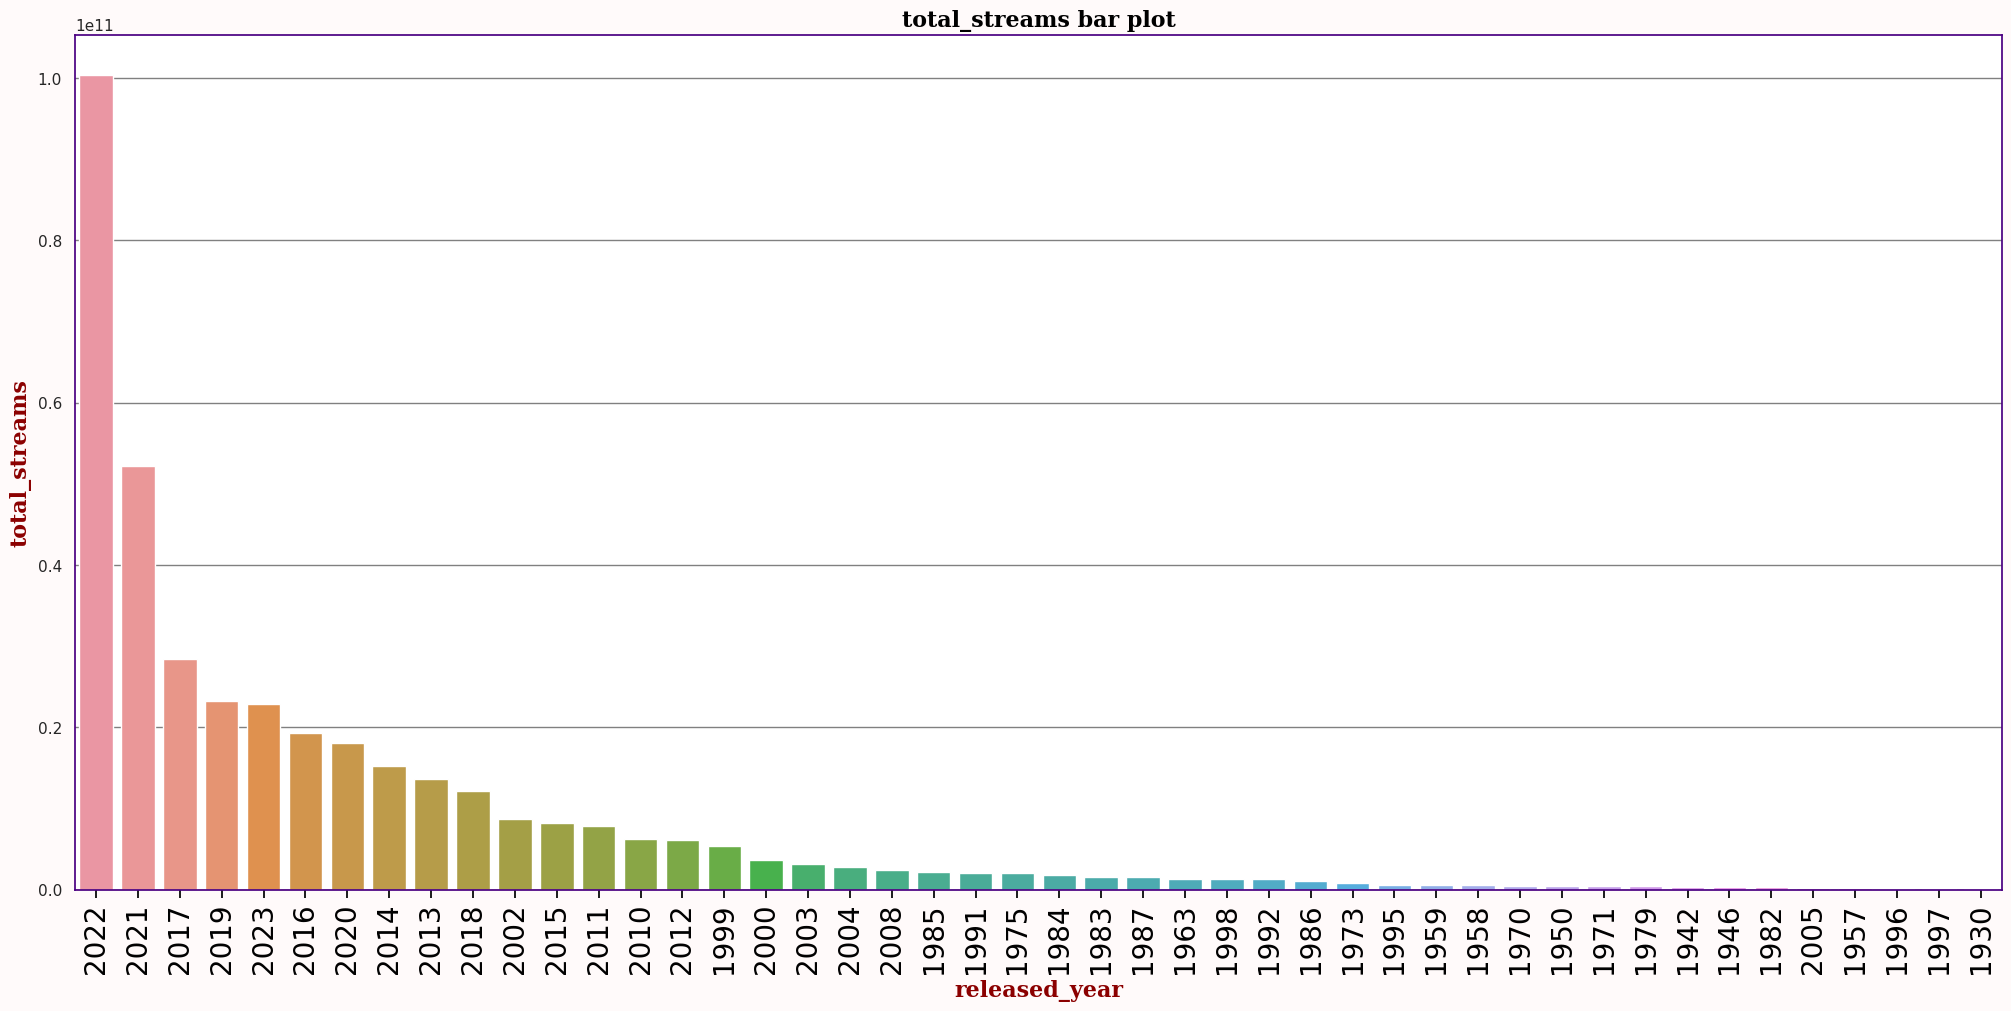

In [538]:
ordering = group_data.sort_values('total_streams',ascending=False).released_year
plotting_bar(group_data,'released_year','total_streams',ordering=ordering)

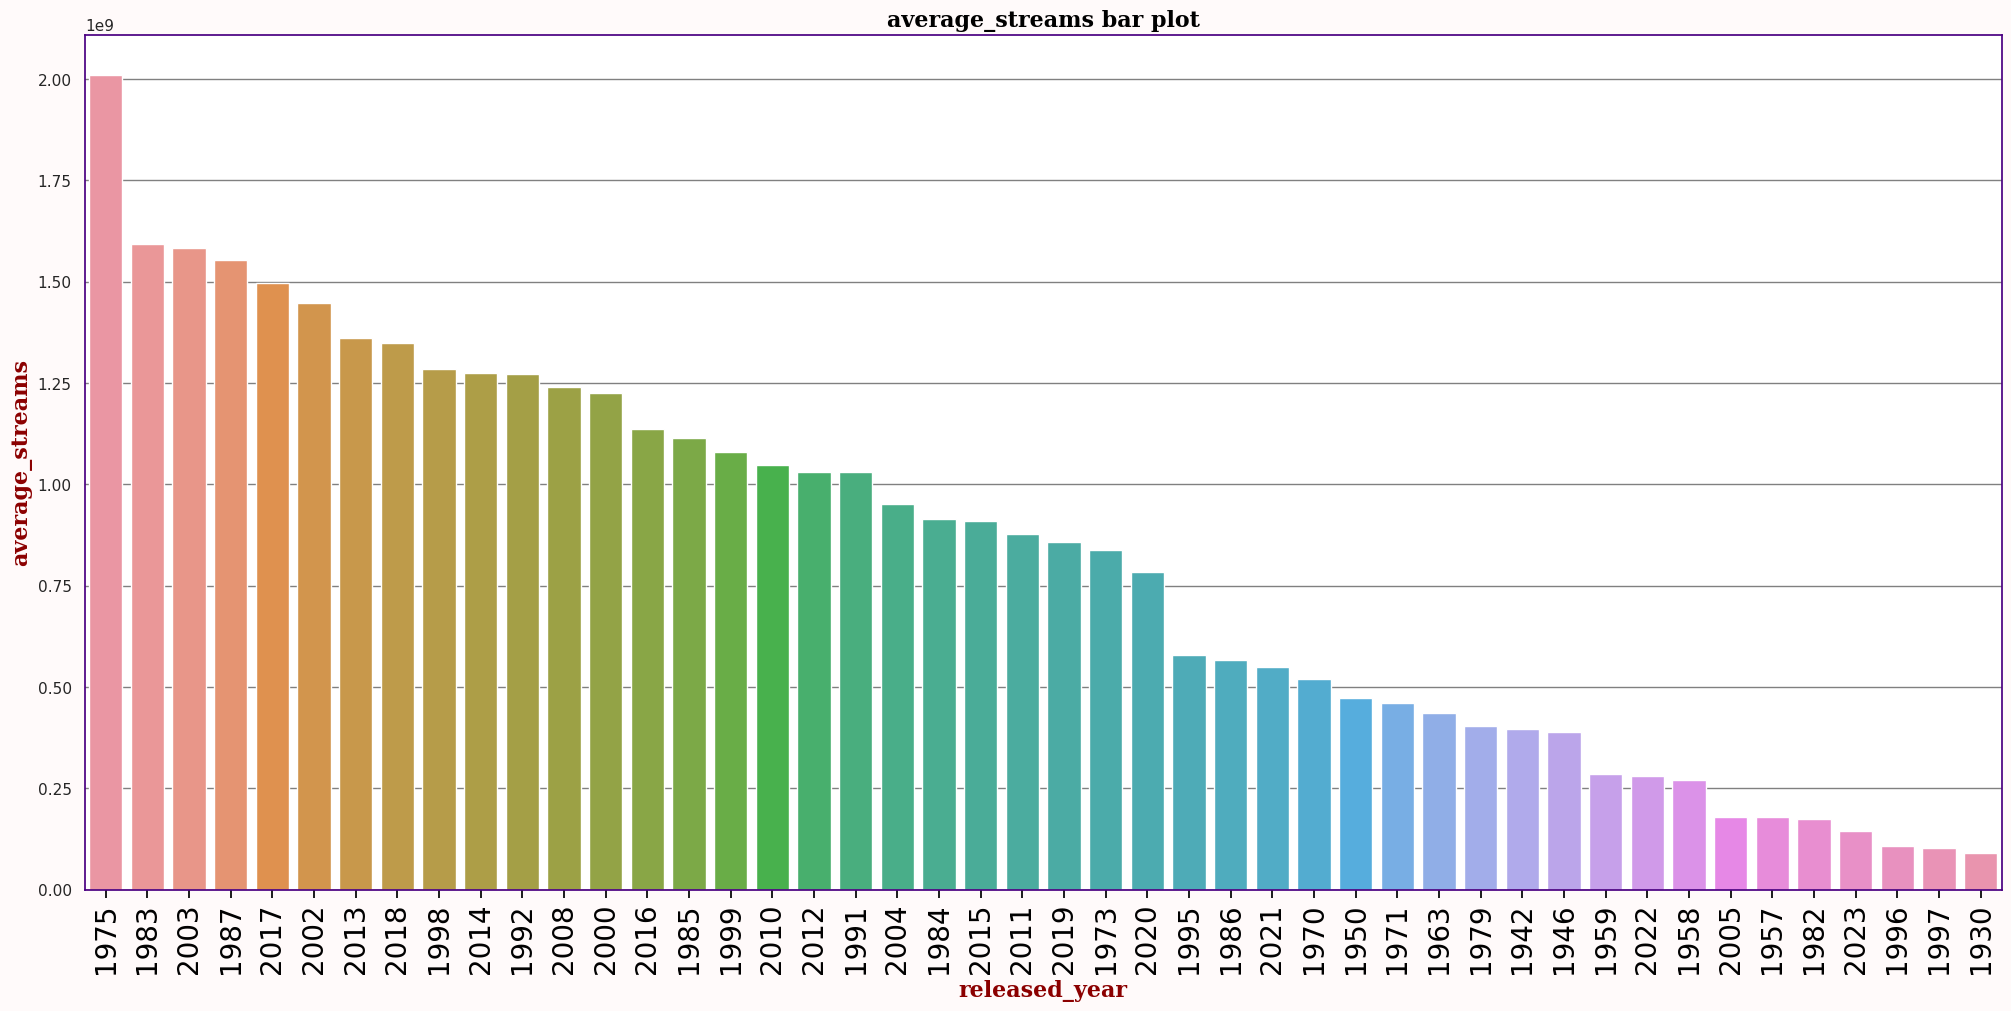

In [539]:
ordering = group_data.sort_values('average_streams',ascending=False).released_year
plotting_bar(group_data,'released_year','average_streams',ordering=ordering)

In [541]:
group_data = summary_stats(songs_eda,'released_day','streams')
group_data.head()

released_day  total_streams  average_streams  deviation_streams  \
0             1    68914012839     8.404148e+08       6.407533e+08   
1             2     9246755339     2.499123e+08       2.973606e+08   
2             3     9117315981     3.143902e+08       2.737046e+08   
3             4    14112323415     3.814141e+08       4.847394e+08   
4             5    10430304921     4.534915e+08       4.382807e+08   

   skewness_level_streams  
0                   0.678  
1                   2.752  
2                   1.581  
3                   3.454  
4                   1.548

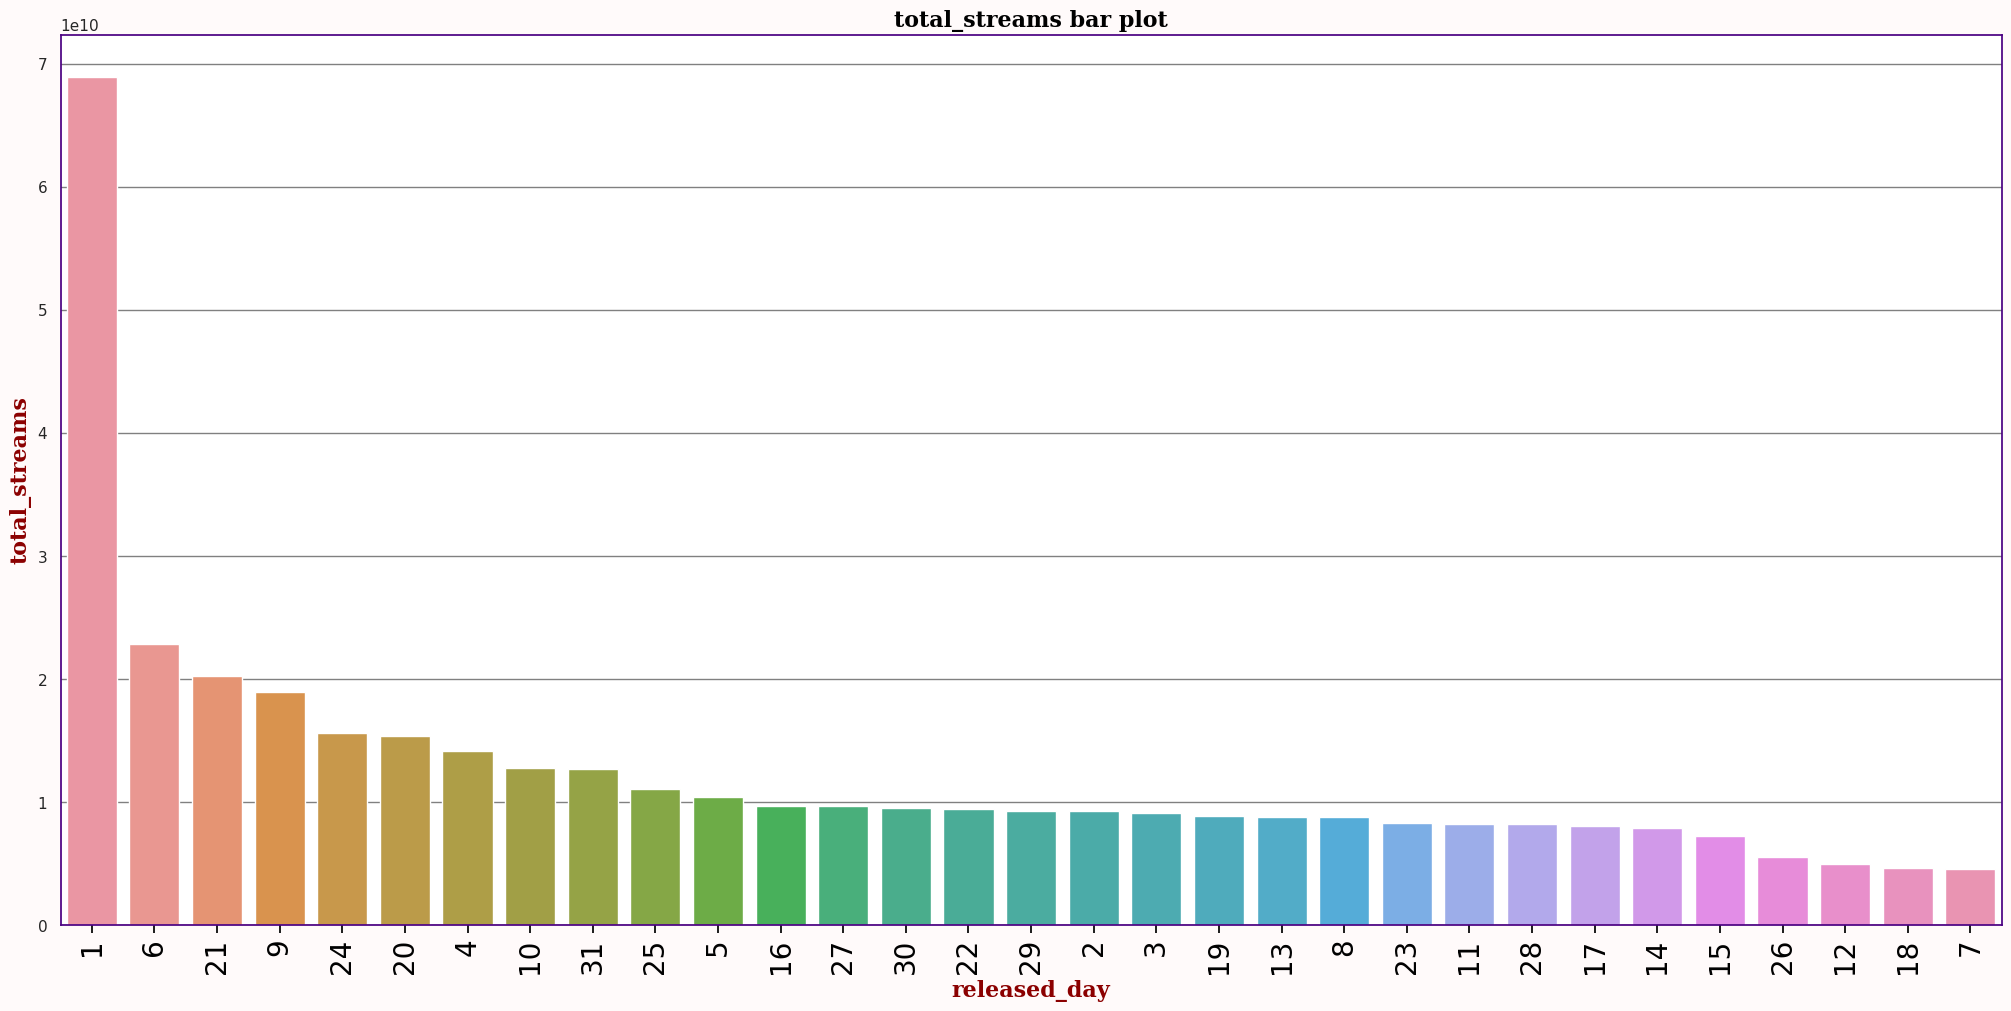

In [542]:
ordering = group_data.sort_values('total_streams',ascending=False).released_day
plotting_bar(group_data,'released_day','total_streams',ordering=ordering)

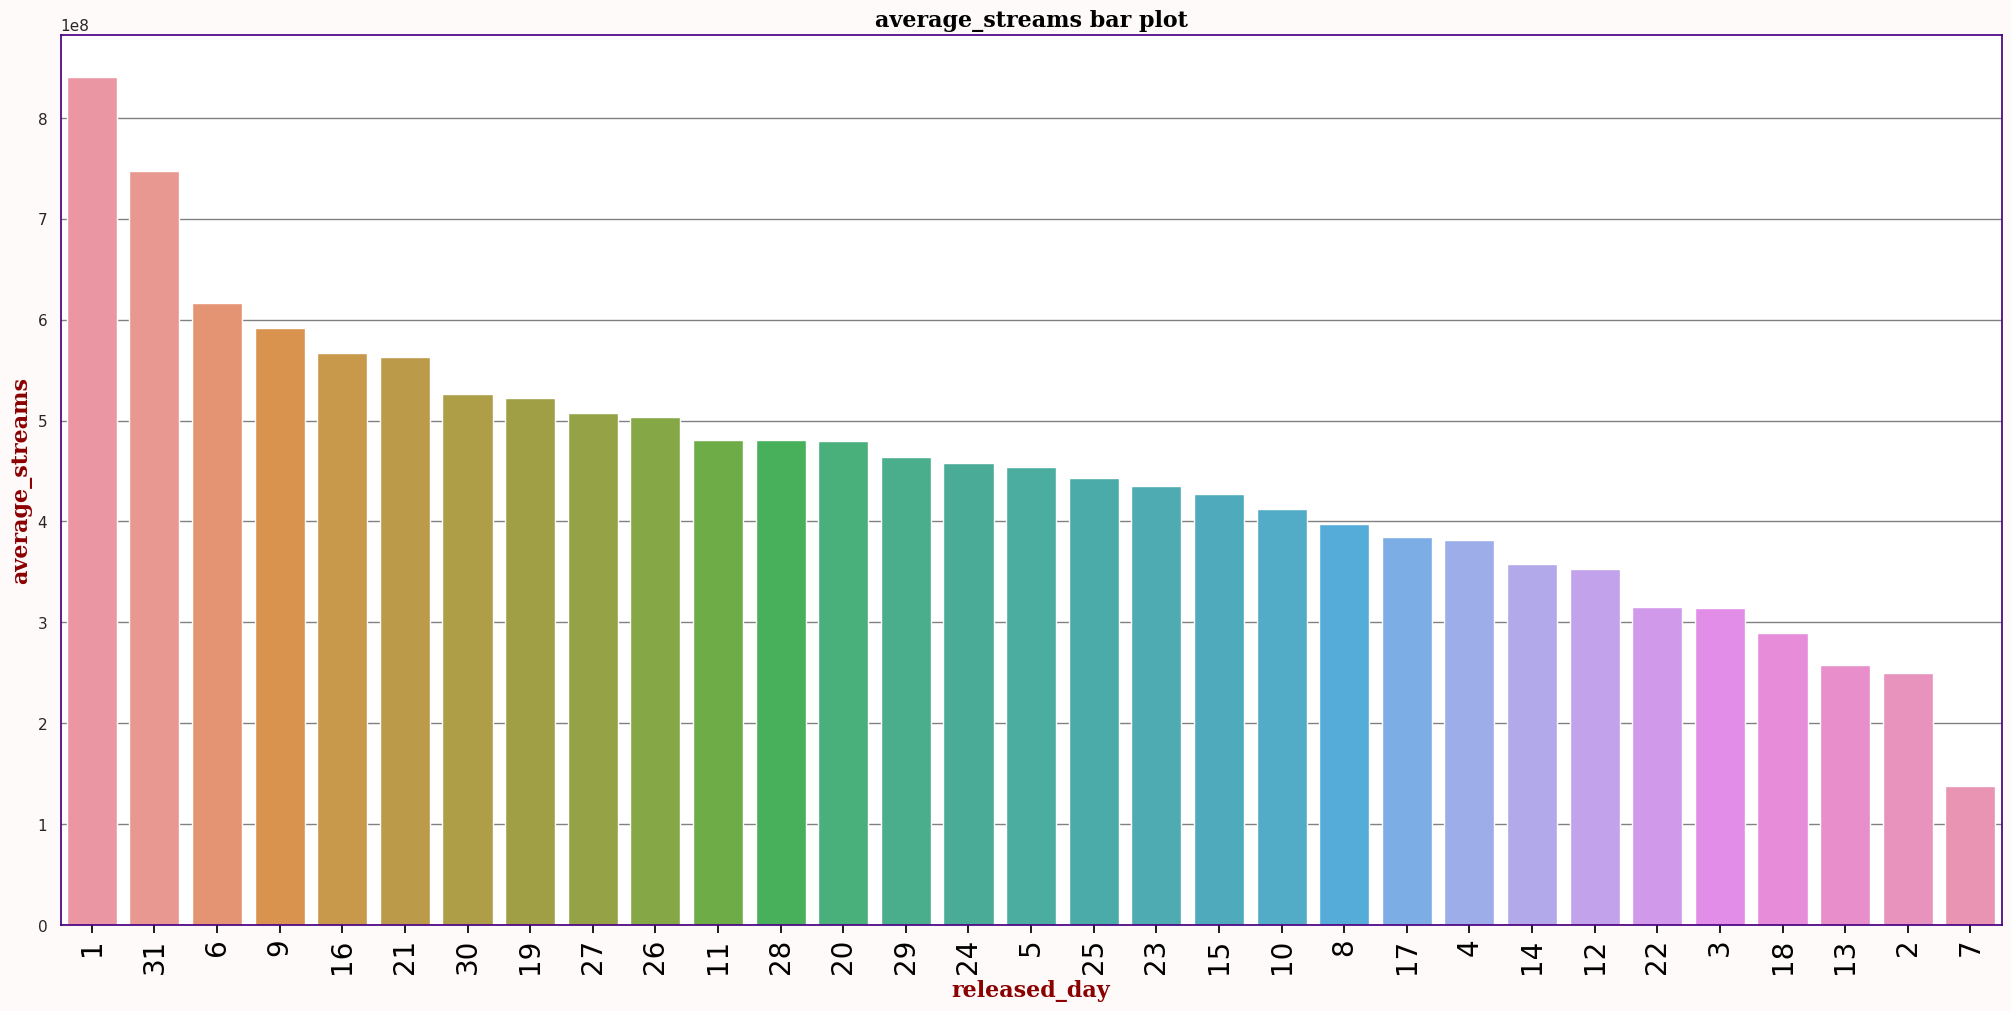

In [543]:
ordering = group_data.sort_values('average_streams',ascending=False).released_day
plotting_bar(group_data,'released_day','average_streams',ordering=ordering)

In [546]:
# in_spotify_playlists
group_data = summary_stats(songs_eda,'released_year','in_spotify_playlists')
group_data.head()

released_year  total_in_spotify_playlists  average_in_spotify_playlists  \
0           1930                         323                         323.0   
1           1942                       11940                       11940.0   
2           1946                       11500                       11500.0   
3           1950                       10585                       10585.0   
4           1957                        4326                        4326.0   

   deviation_in_spotify_playlists  skewness_level_in_spotify_playlists  
0                             NaN                                  NaN  
1                             NaN                                  NaN  
2                             NaN                                  NaN  
3                             NaN                                  NaN  
4                             NaN                                  NaN

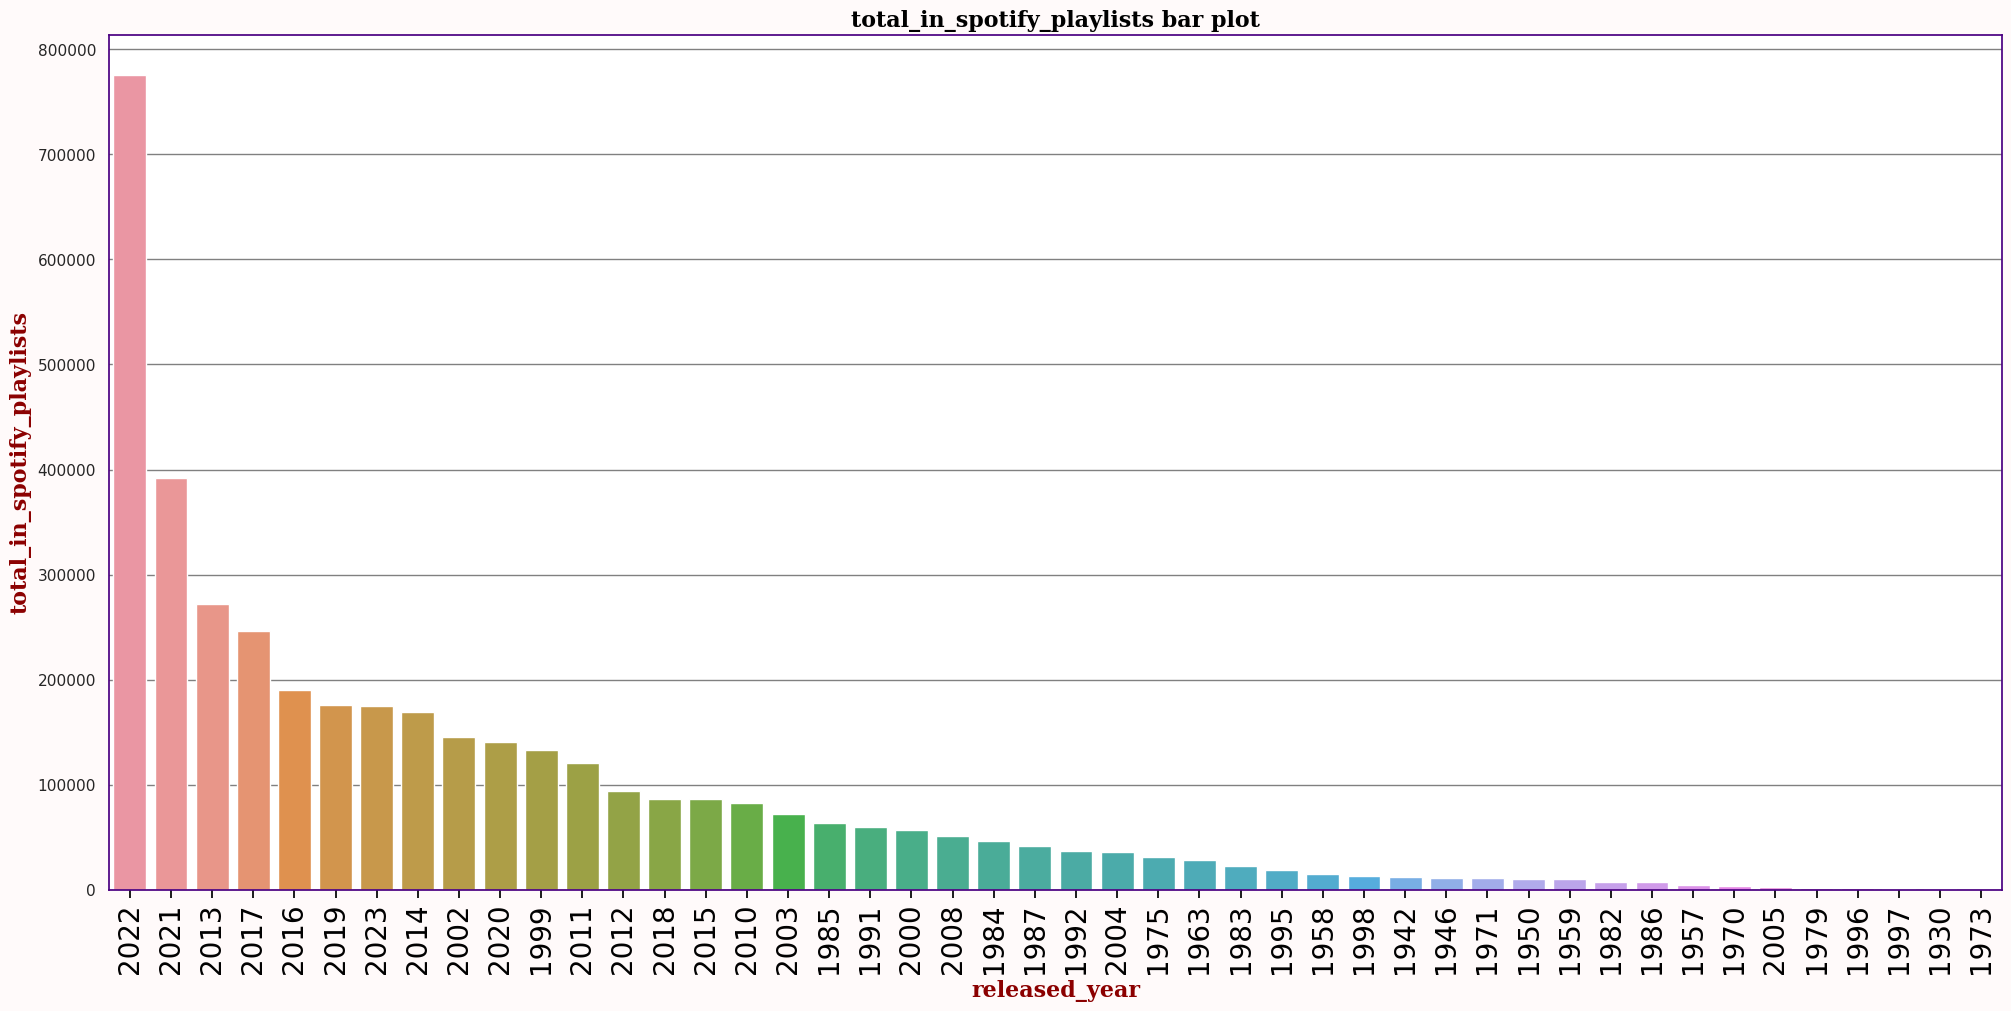

In [547]:
ordering = group_data.sort_values('total_in_spotify_playlists',ascending=False).released_year
plotting_bar(group_data,'released_year','total_in_spotify_playlists',ordering=ordering)

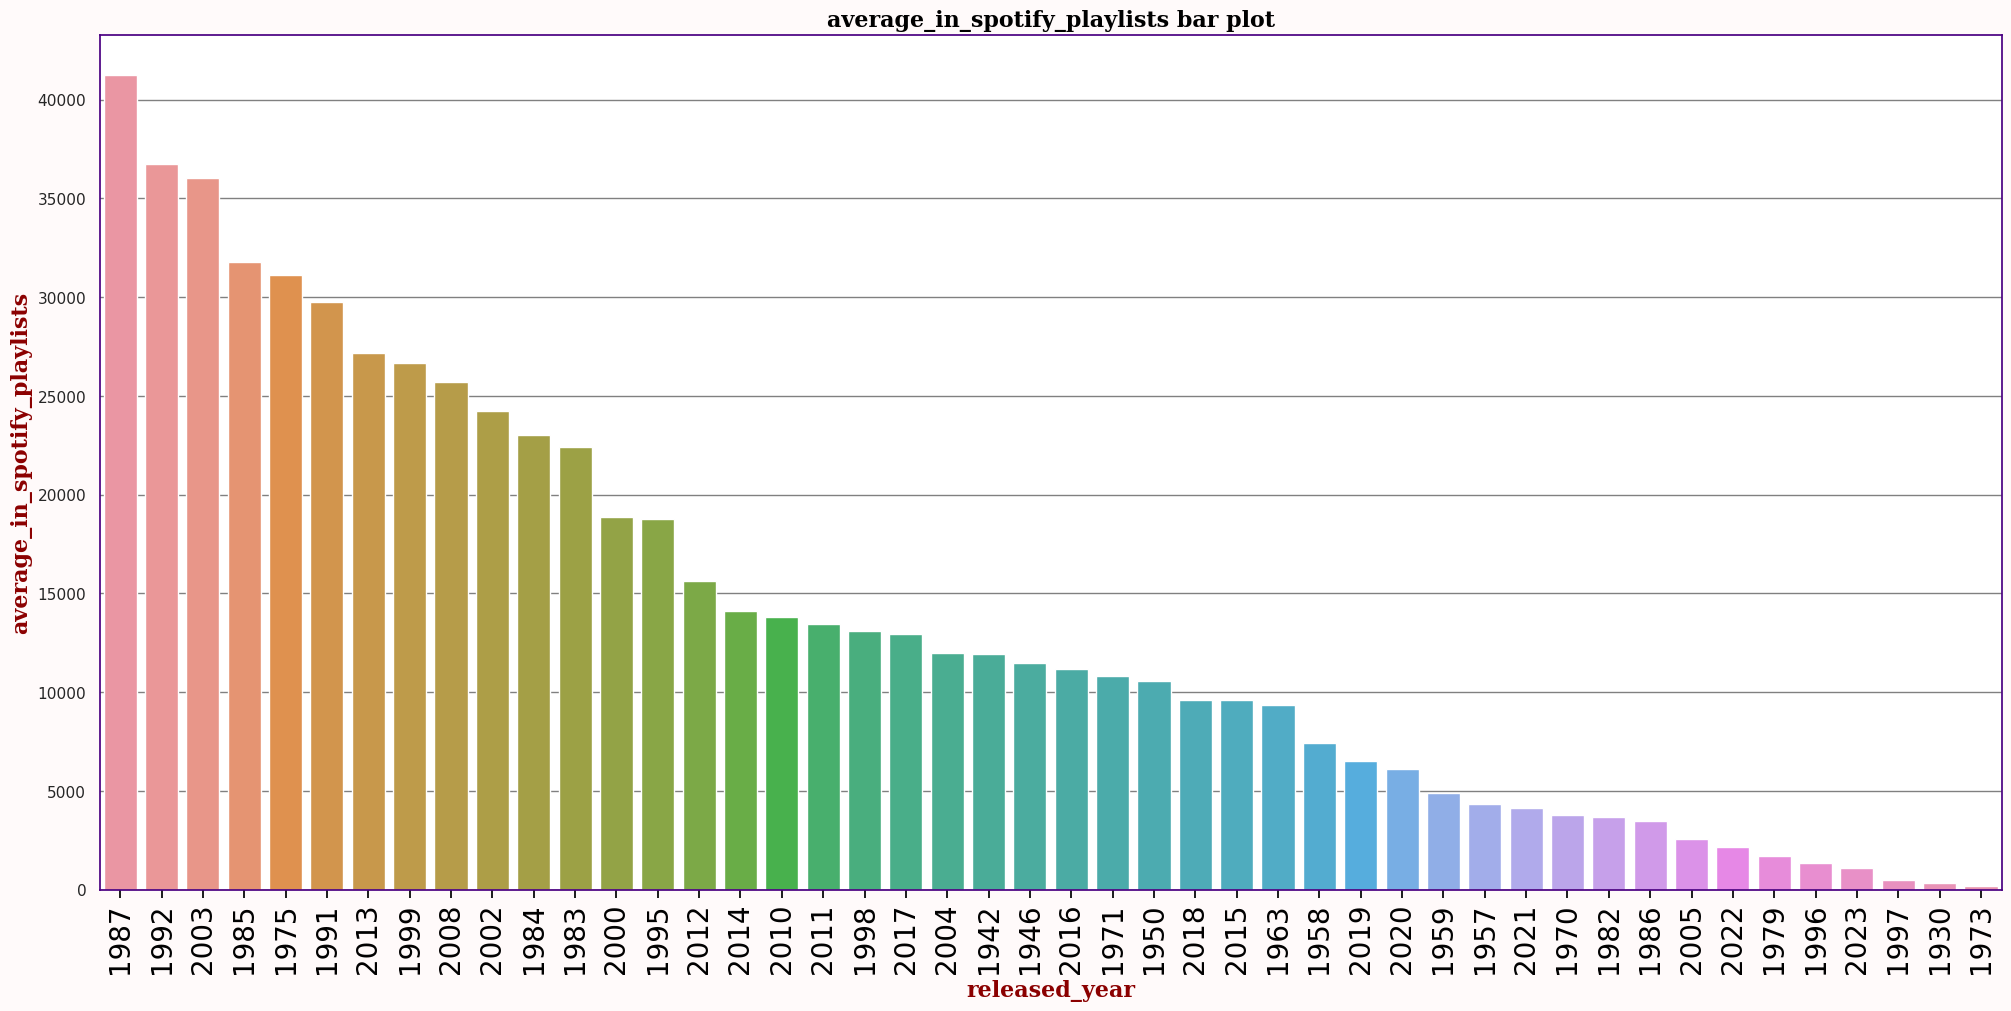

In [548]:
ordering = group_data.sort_values('average_in_spotify_playlists',ascending=False).released_year
plotting_bar(group_data,'released_year','average_in_spotify_playlists',ordering=ordering)

In [549]:
# in_spotify_playlists
group_data = summary_stats(songs_eda,'released_day','in_spotify_playlists')
group_data.head()

released_day  total_in_spotify_playlists  average_in_spotify_playlists  \
0             1                     1120386                     13663.244   
1             2                       77962                      2107.081   
2             3                       71267                      2457.483   
3             4                      135647                      3666.135   
4             5                       90059                      3915.609   

   deviation_in_spotify_playlists  skewness_level_in_spotify_playlists  
0                       13034.585                                0.961  
1                        3558.126                                3.522  
2                        2148.517                                0.599  
3                        7117.698                                5.054  
4                        6693.091                                3.421

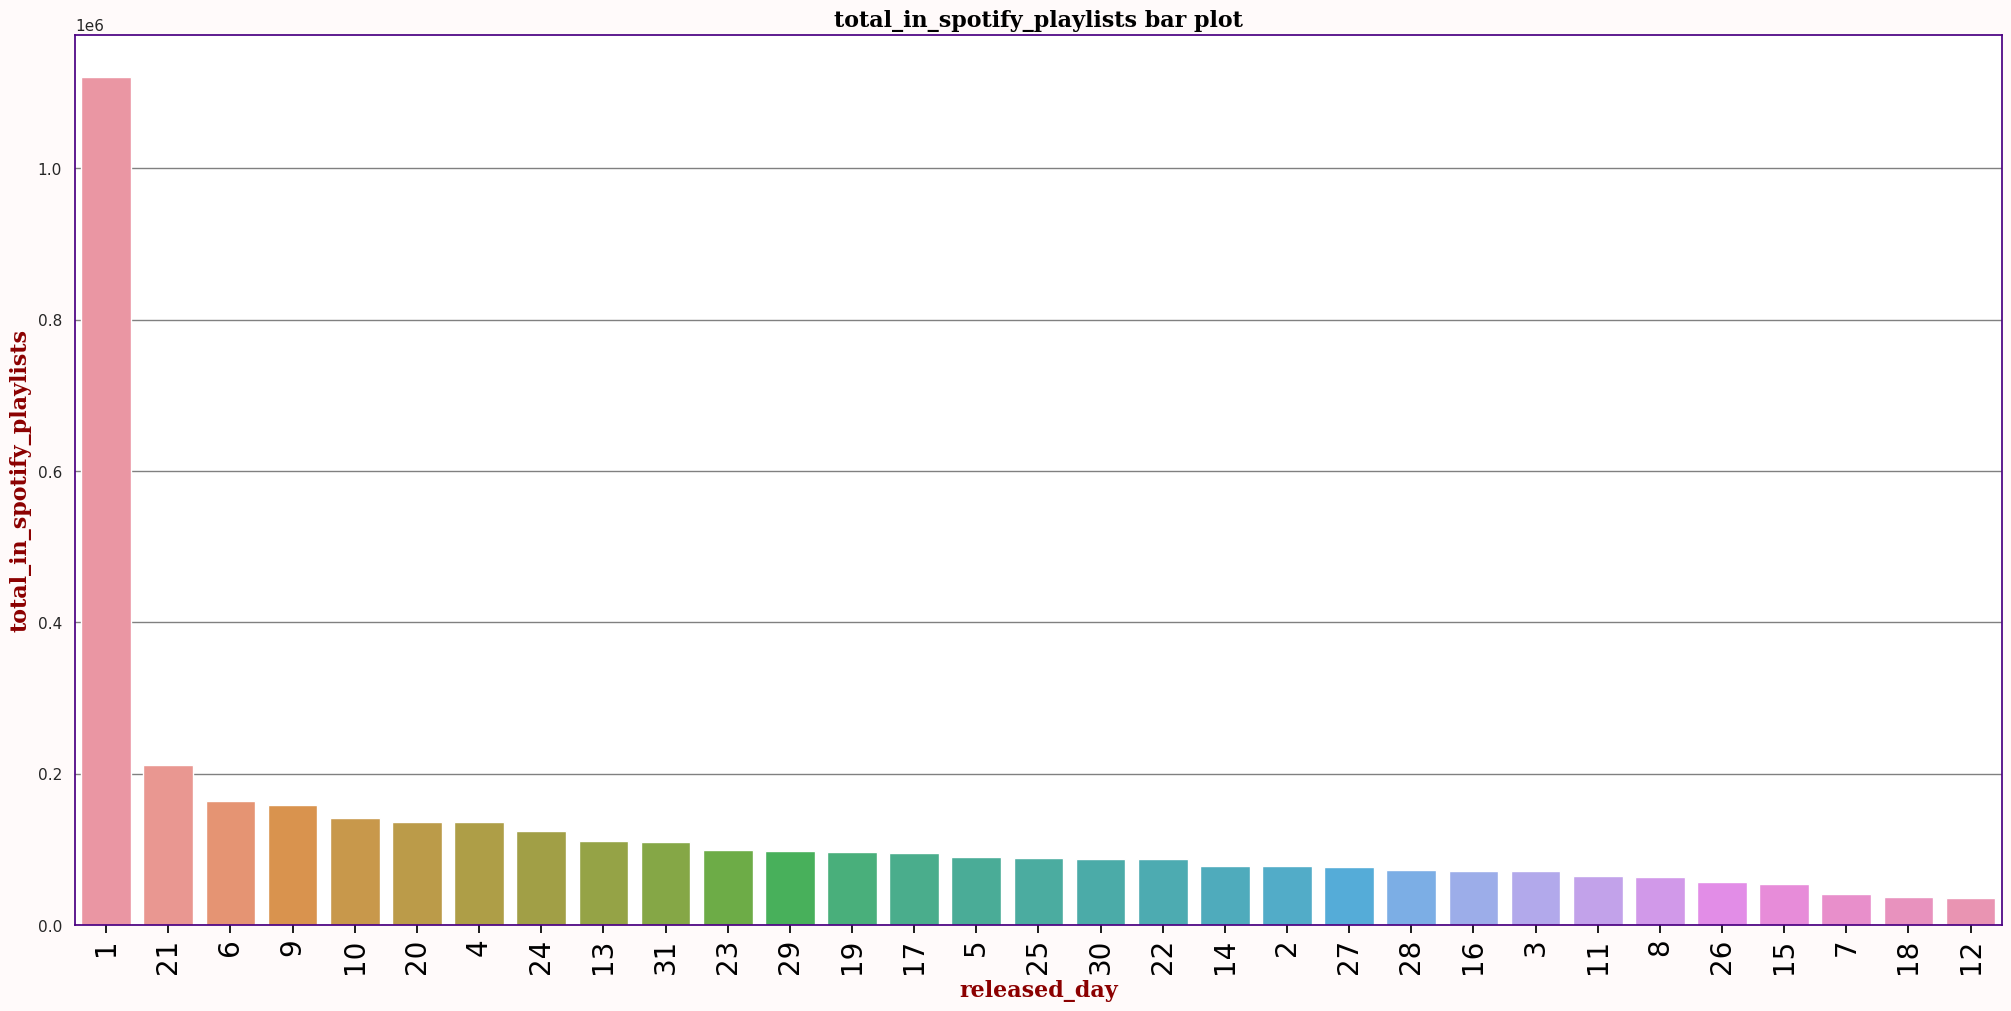

In [550]:
ordering = group_data.sort_values('total_in_spotify_playlists',ascending=False).released_day
plotting_bar(group_data,'released_day','total_in_spotify_playlists',ordering=ordering)

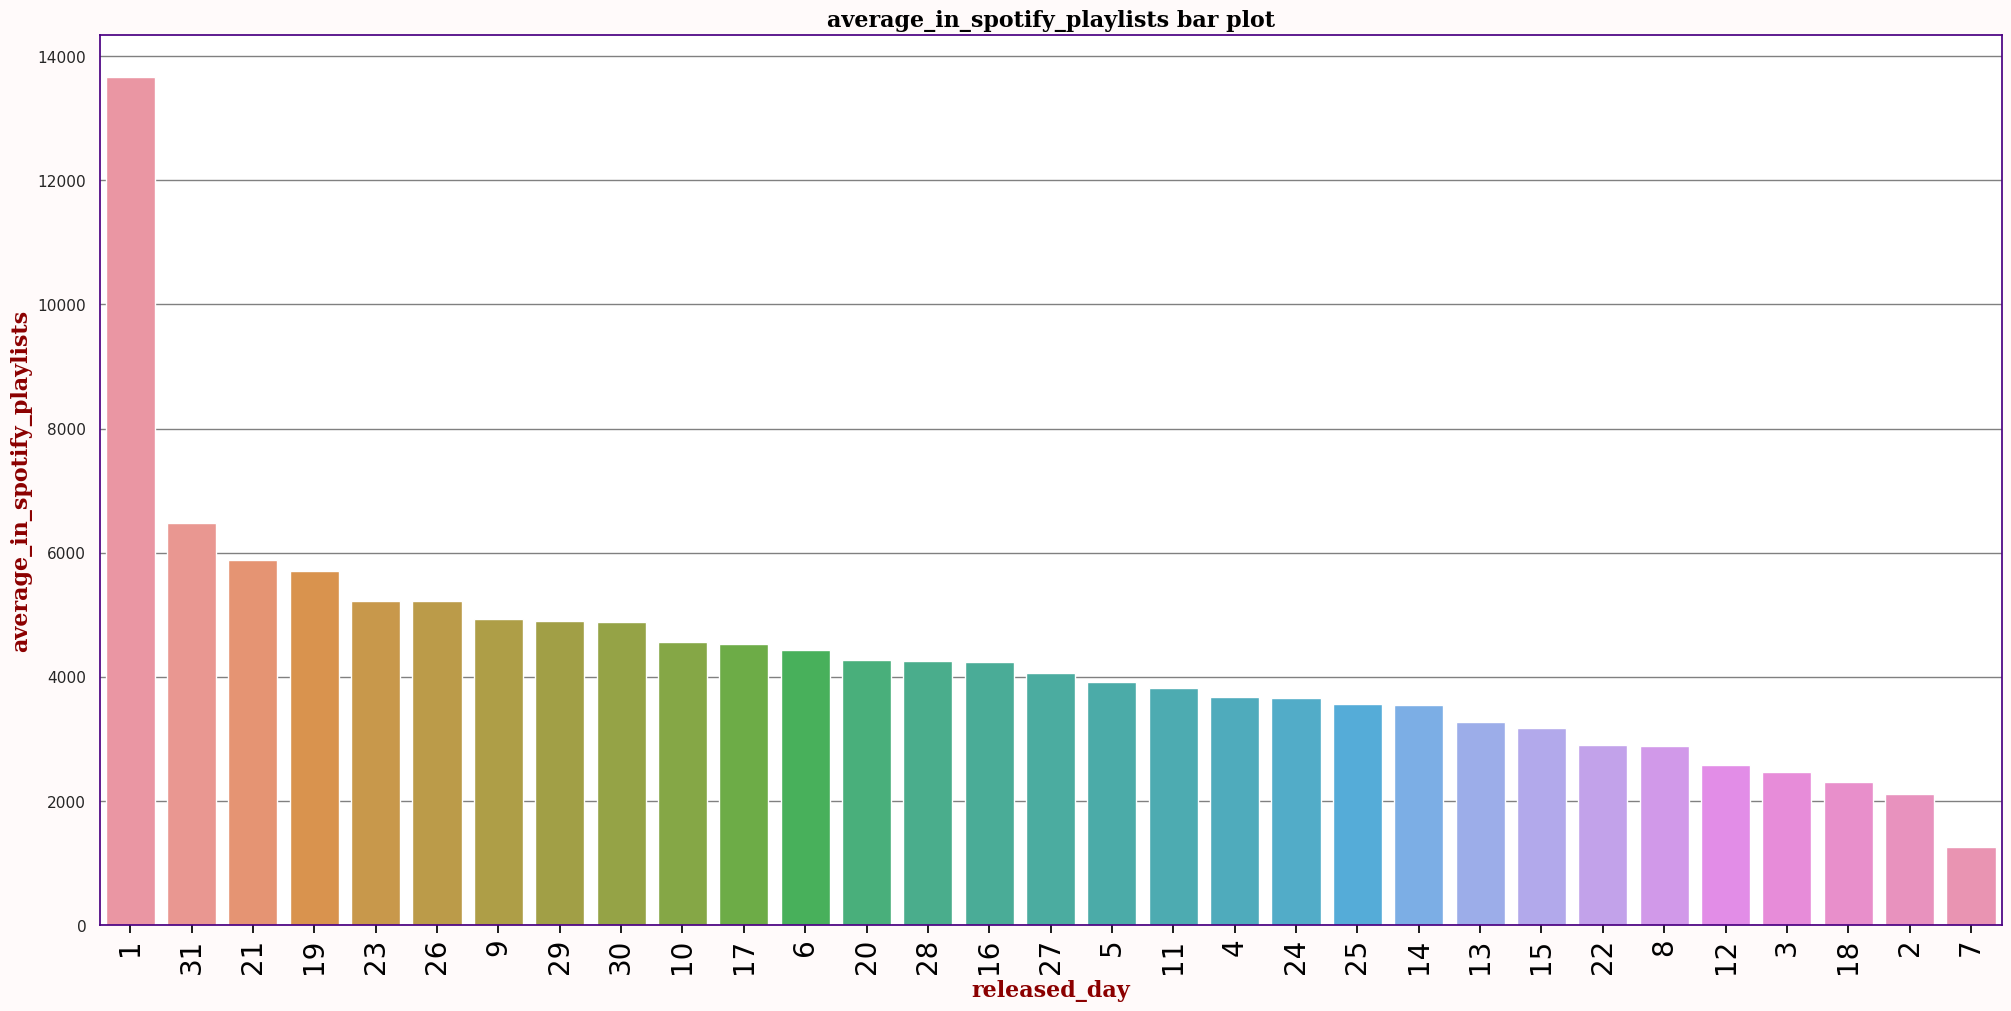

In [551]:
ordering = group_data.sort_values('average_in_spotify_playlists',ascending=False).released_day
plotting_bar(group_data,'released_day','average_in_spotify_playlists',ordering=ordering)

In [553]:
# in_apple_playlists
group_data = summary_stats(songs_eda,'released_year','in_apple_playlists')
group_data.head()

released_year  total_in_apple_playlists  average_in_apple_playlists  \
0           1930                         4                         4.0   
1           1942                        73                        73.0   
2           1946                       140                       140.0   
3           1950                       126                       126.0   
4           1957                        32                        32.0   

   deviation_in_apple_playlists  skewness_level_in_apple_playlists  
0                           NaN                                NaN  
1                           NaN                                NaN  
2                           NaN                                NaN  
3                           NaN                                NaN  
4                           NaN                                NaN

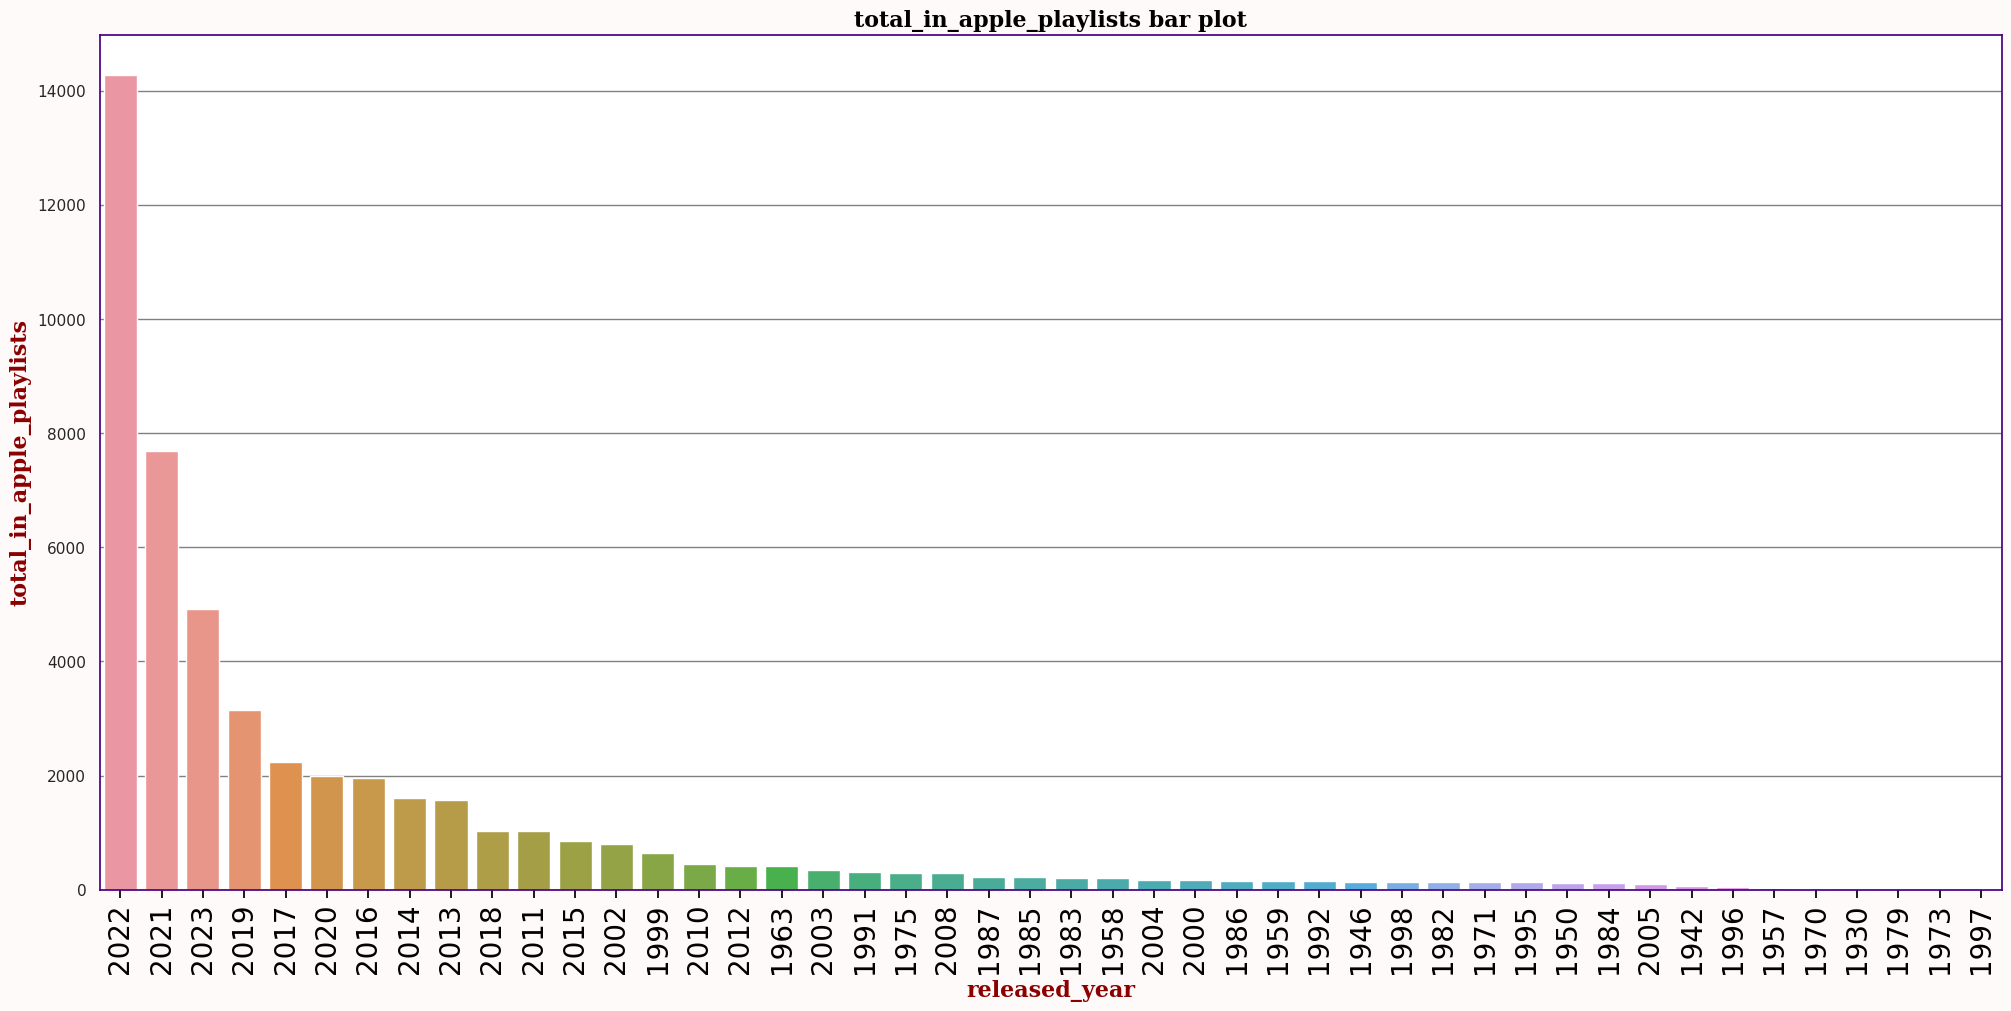

In [554]:
ordering = group_data.sort_values('total_in_apple_playlists',ascending=False).released_year
plotting_bar(group_data,'released_year','total_in_apple_playlists',ordering=ordering)

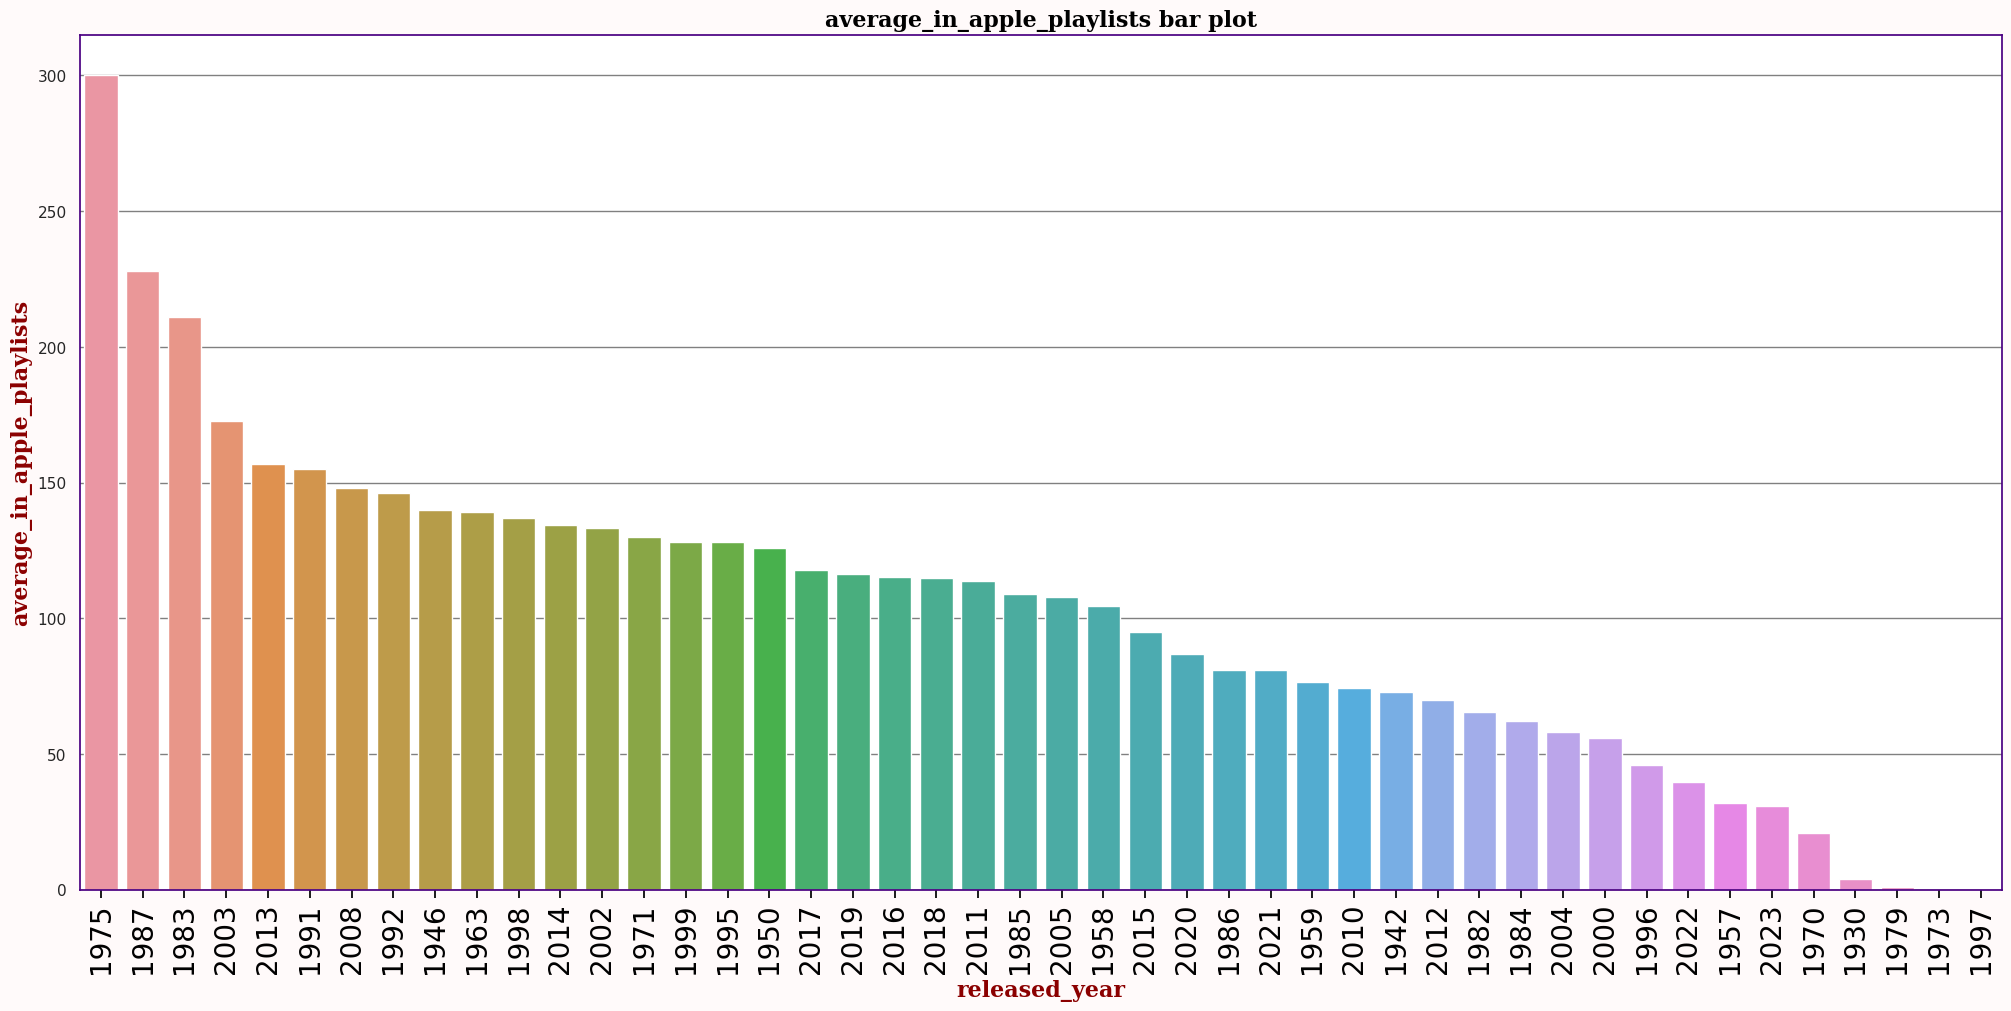

In [555]:
ordering = group_data.sort_values('average_in_apple_playlists',ascending=False).released_year
plotting_bar(group_data,'released_year','average_in_apple_playlists',ordering=ordering)

In [556]:
# in_apple_playlists
group_data = summary_stats(songs_eda,'released_day','in_apple_playlists')
group_data.head()

released_day  total_in_apple_playlists  average_in_apple_playlists  \
0             1                      8793                     107.232   
1             2                      1223                      33.054   
2             3                      1619                      55.828   
3             4                      1743                      47.108   
4             5                      1073                      46.652   

   deviation_in_apple_playlists  skewness_level_in_apple_playlists  
0                        90.579                              0.995  
1                        43.238                              2.011  
2                        51.616                              0.775  
3                        82.631                              3.475  
4                        53.947                              2.211

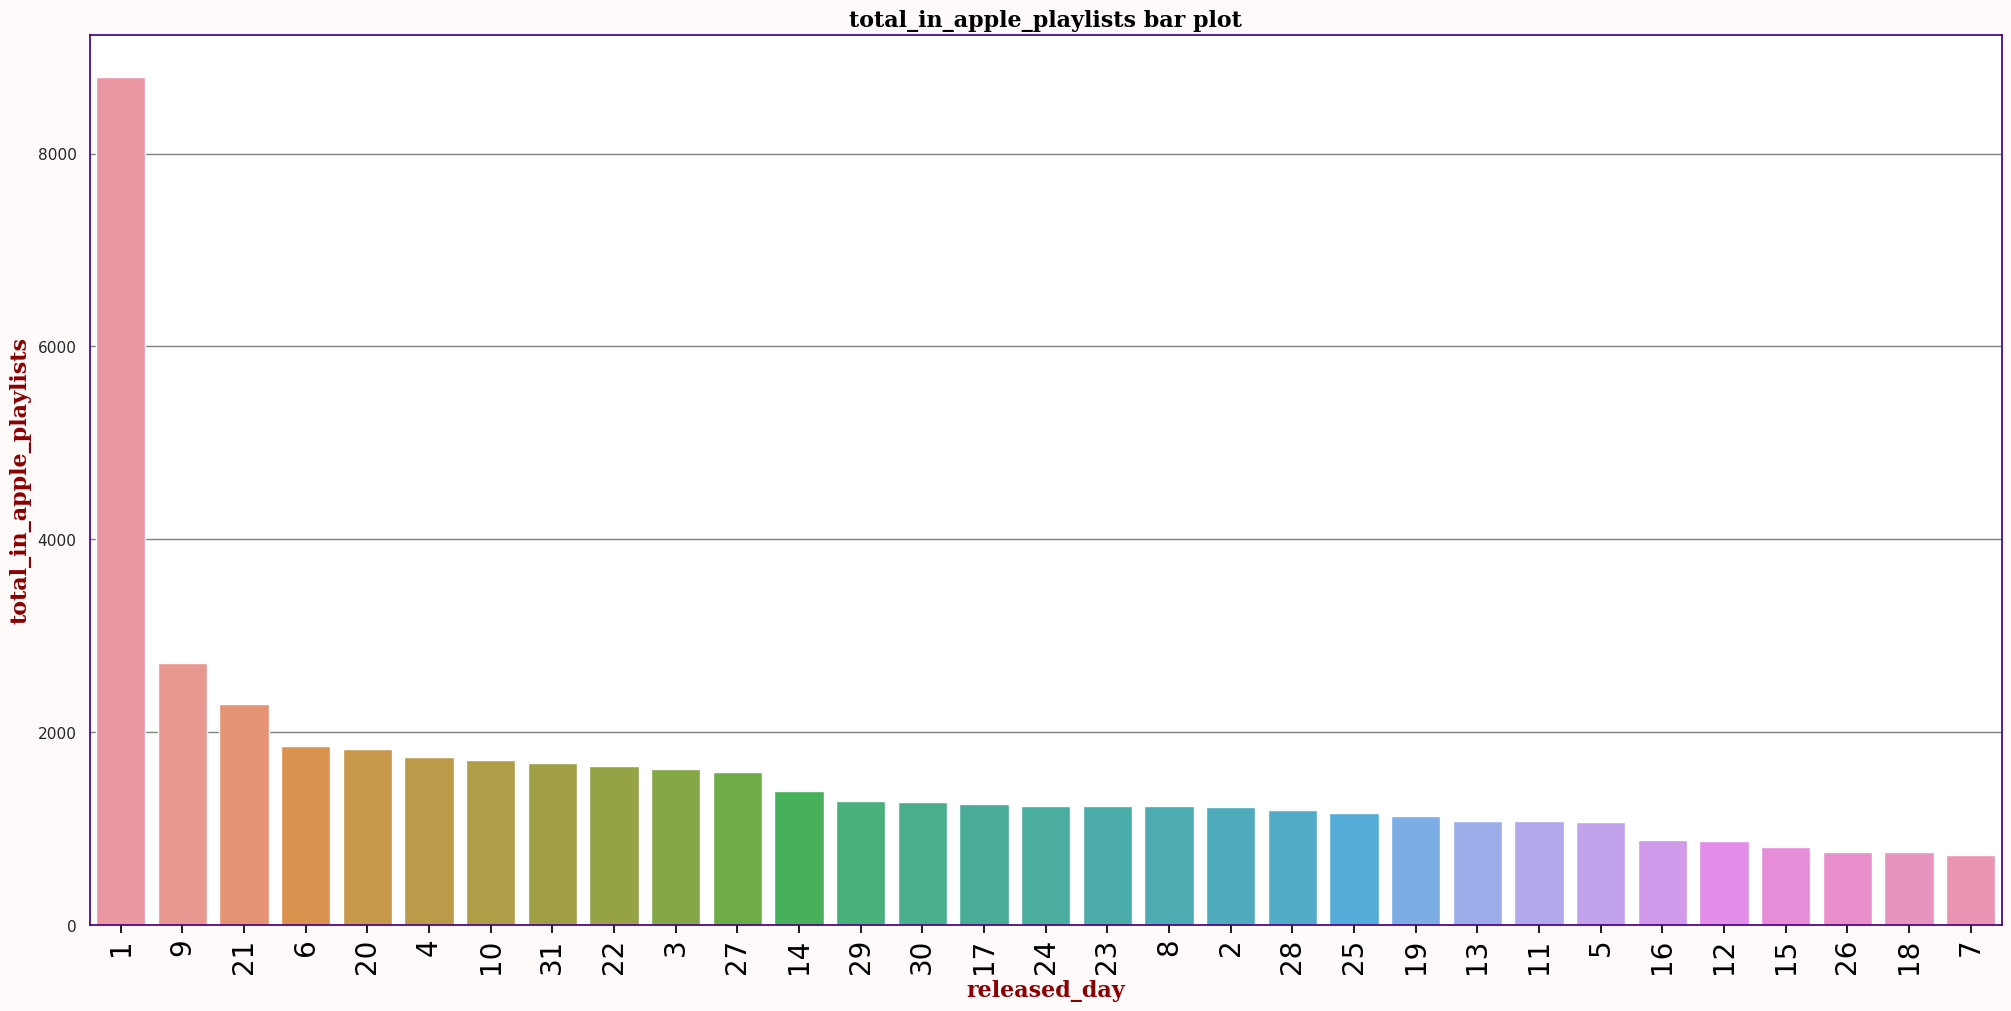

In [557]:
ordering = group_data.sort_values('total_in_apple_playlists',ascending=False).released_day
plotting_bar(group_data,'released_day','total_in_apple_playlists',ordering=ordering)

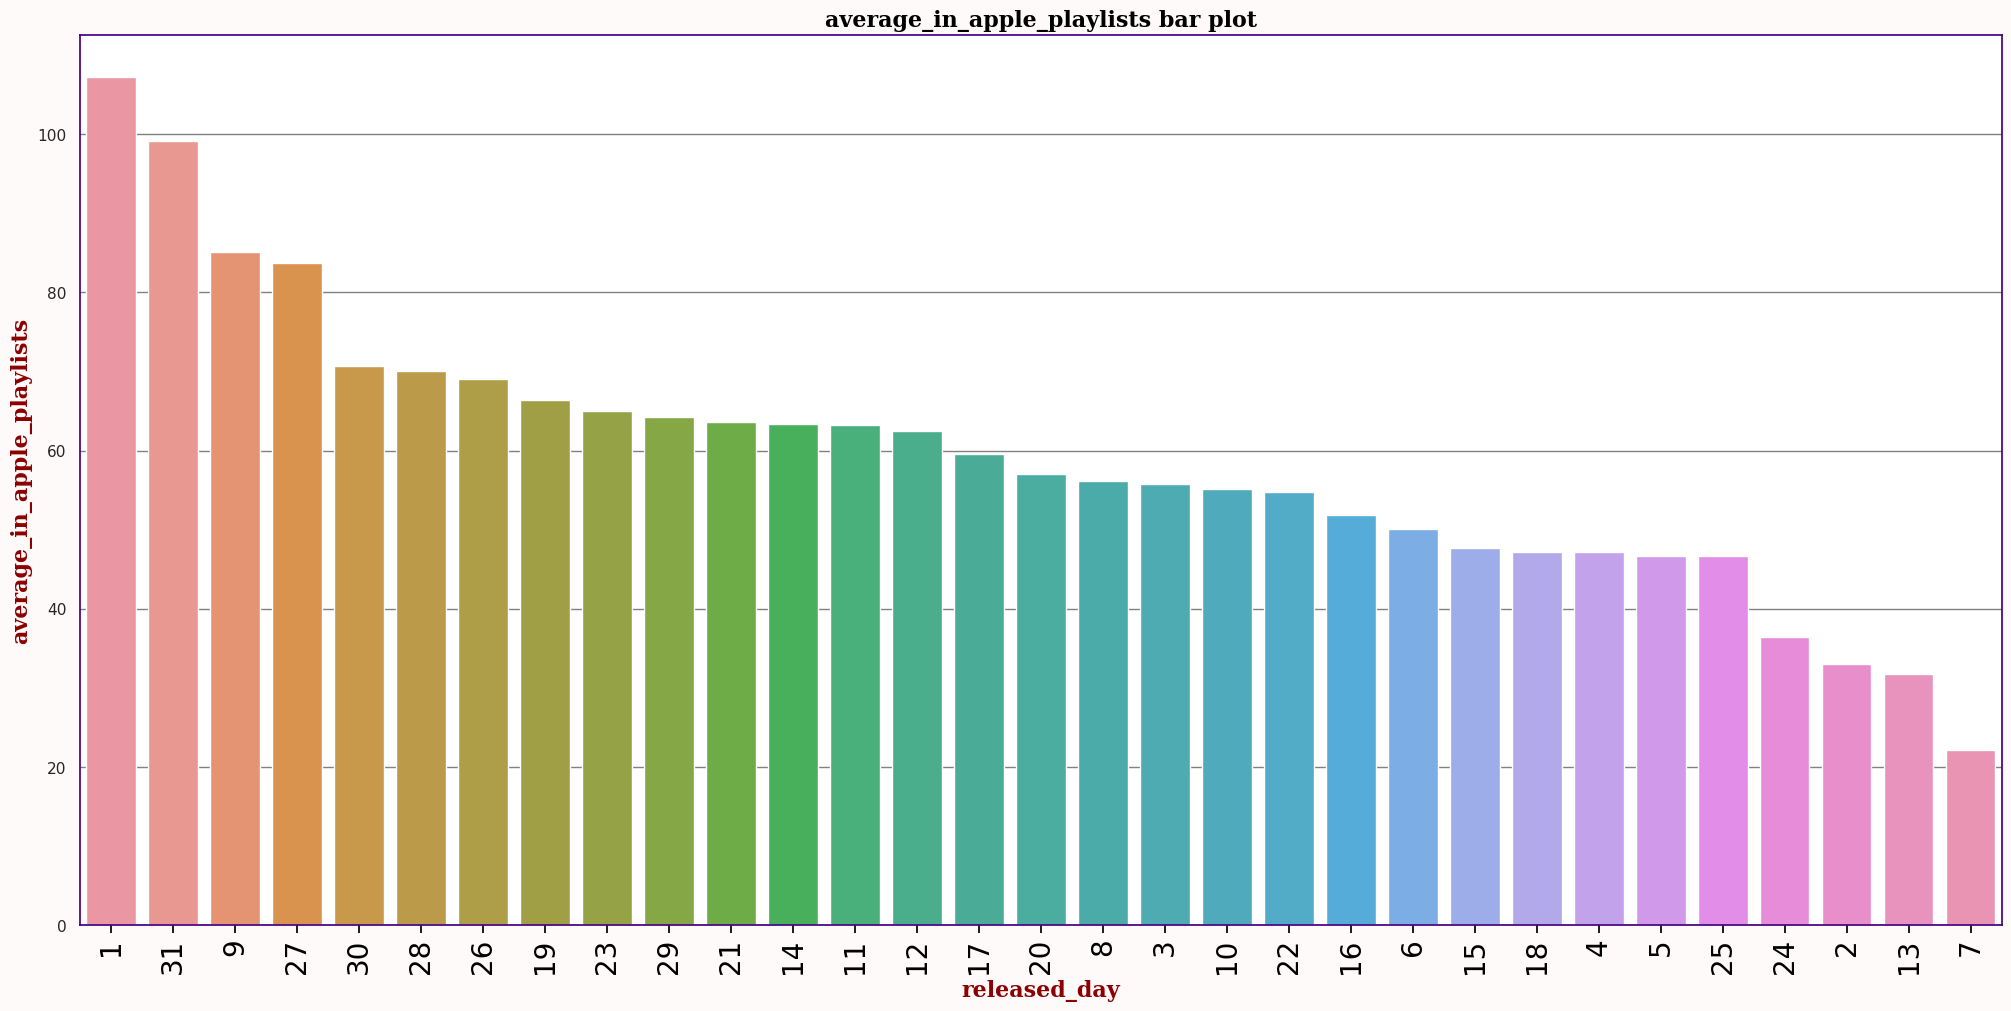

In [558]:
ordering = group_data.sort_values('average_in_apple_playlists',ascending=False).released_day
plotting_bar(group_data,'released_day','average_in_apple_playlists',ordering=ordering)

In [559]:
# in_deezer_playlists
group_data = summary_stats(songs_eda,'released_year','in_deezer_playlists')
group_data.head()

released_year  total_in_deezer_playlists  average_in_deezer_playlists  \
0           1930                         14                         14.0   
1           1942                        123                        123.0   
2           1946                        251                        251.0   
3           1950                        406                        406.0   
4           1957                         65                         65.0   

   deviation_in_deezer_playlists  skewness_level_in_deezer_playlists  
0                            NaN                                 NaN  
1                            NaN                                 NaN  
2                            NaN                                 NaN  
3                            NaN                                 NaN  
4                            NaN                                 NaN

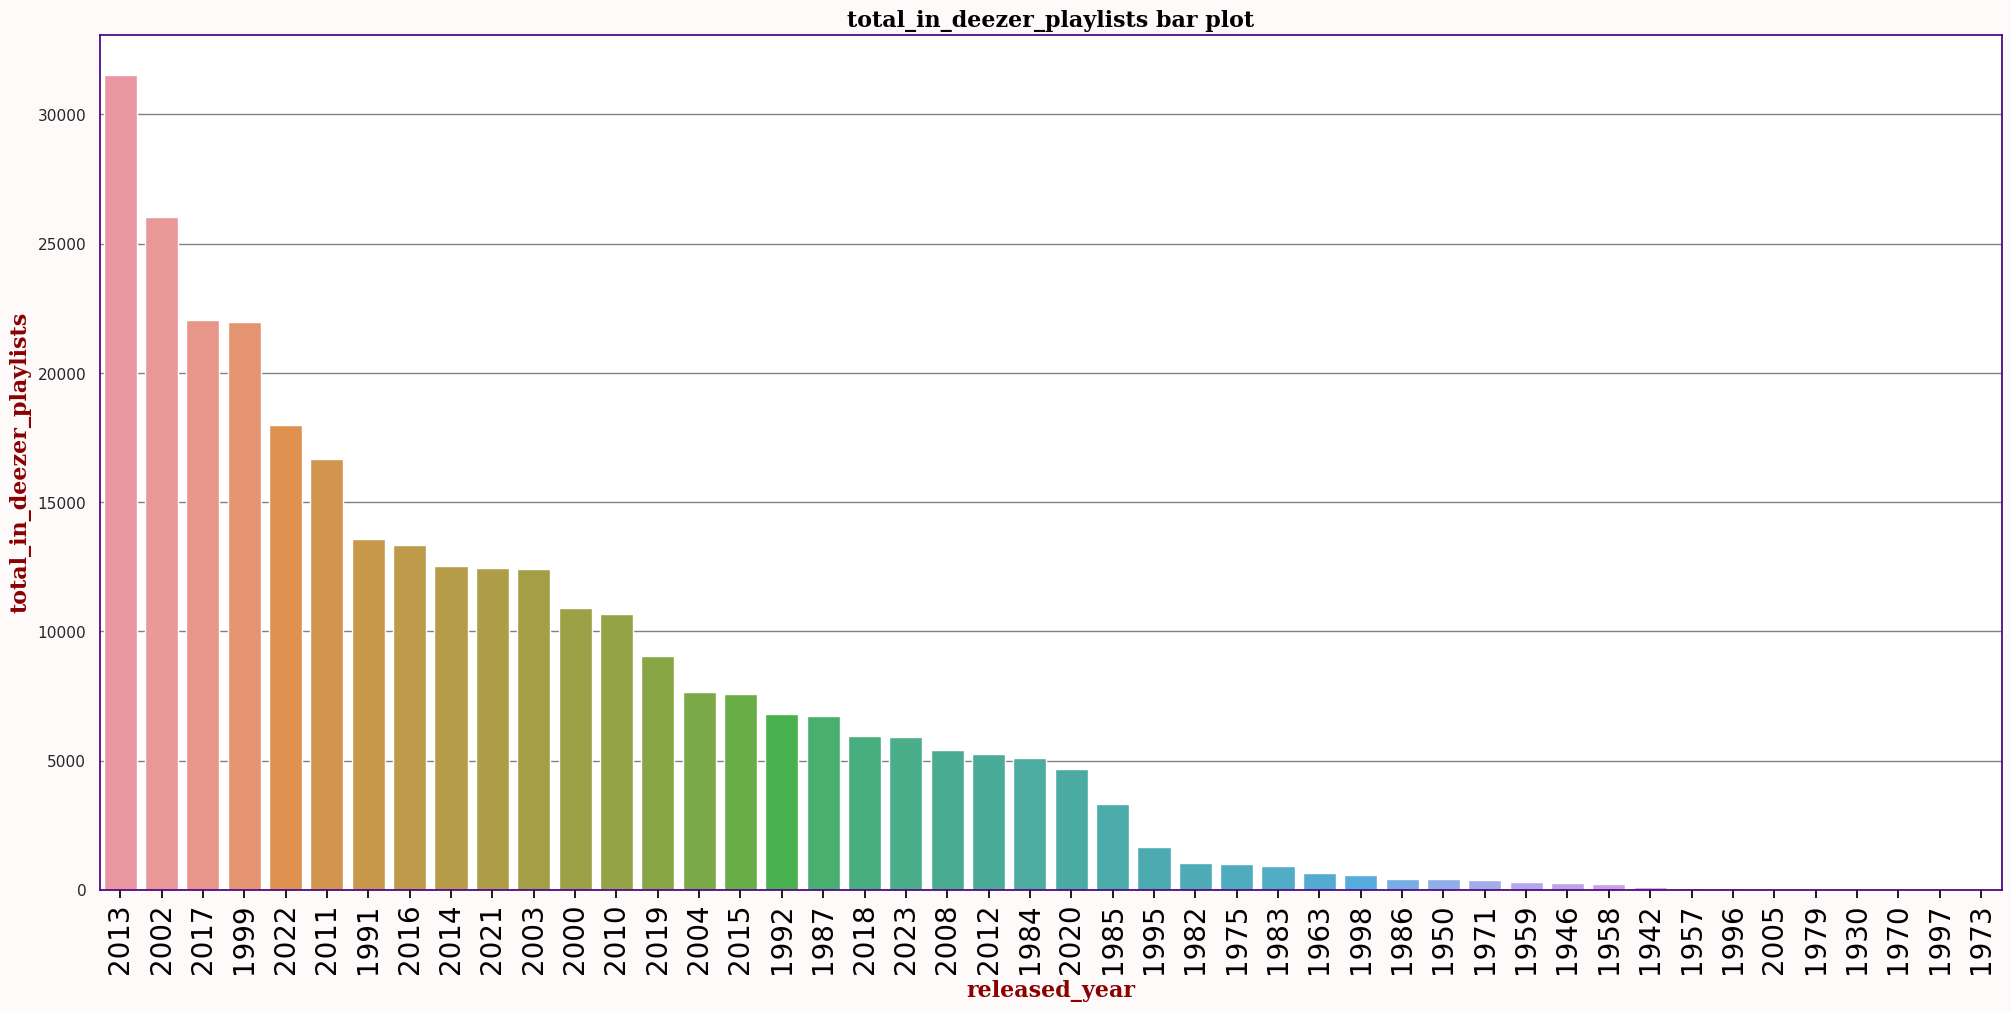

In [560]:
ordering = group_data.sort_values('total_in_deezer_playlists',ascending=False).released_year
plotting_bar(group_data,'released_year','total_in_deezer_playlists',ordering=ordering)

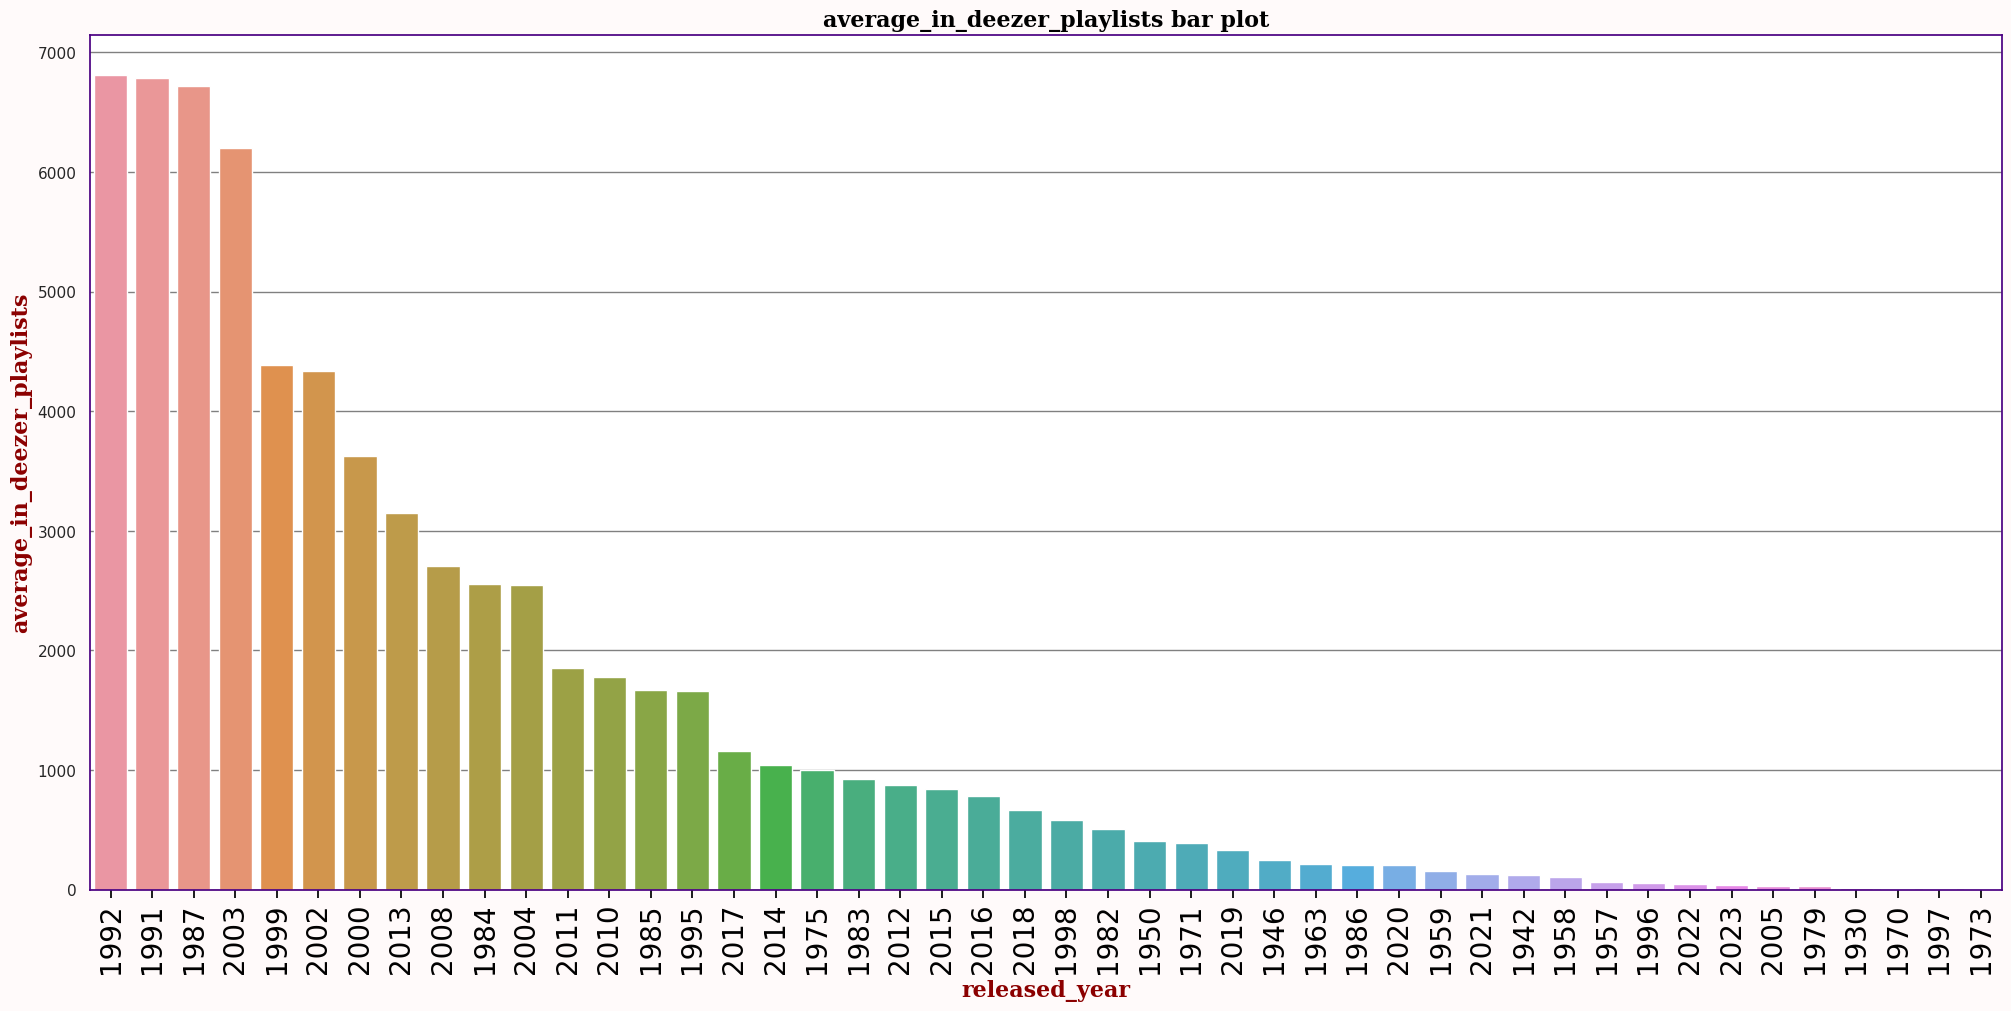

In [561]:
ordering = group_data.sort_values('average_in_deezer_playlists',ascending=False).released_year
plotting_bar(group_data,'released_year','average_in_deezer_playlists',ordering=ordering)

In [562]:
# in_deezer_playlists
group_data = summary_stats(songs_eda,'released_day','in_deezer_playlists')
group_data.head()

released_day  total_in_deezer_playlists  average_in_deezer_playlists  \
0             1                   117846.0                     1437.146   
1             2                     2394.0                       64.703   
2             3                     2390.0                       82.414   
3             4                     6625.0                      179.054   
4             5                     9710.0                      422.174   

   deviation_in_deezer_playlists  skewness_level_in_deezer_playlists  
0                       2026.903                               1.520  
1                        160.775                               4.803  
2                        129.590                               2.789  
3                        605.865                               5.462  
4                       1619.620                               4.745

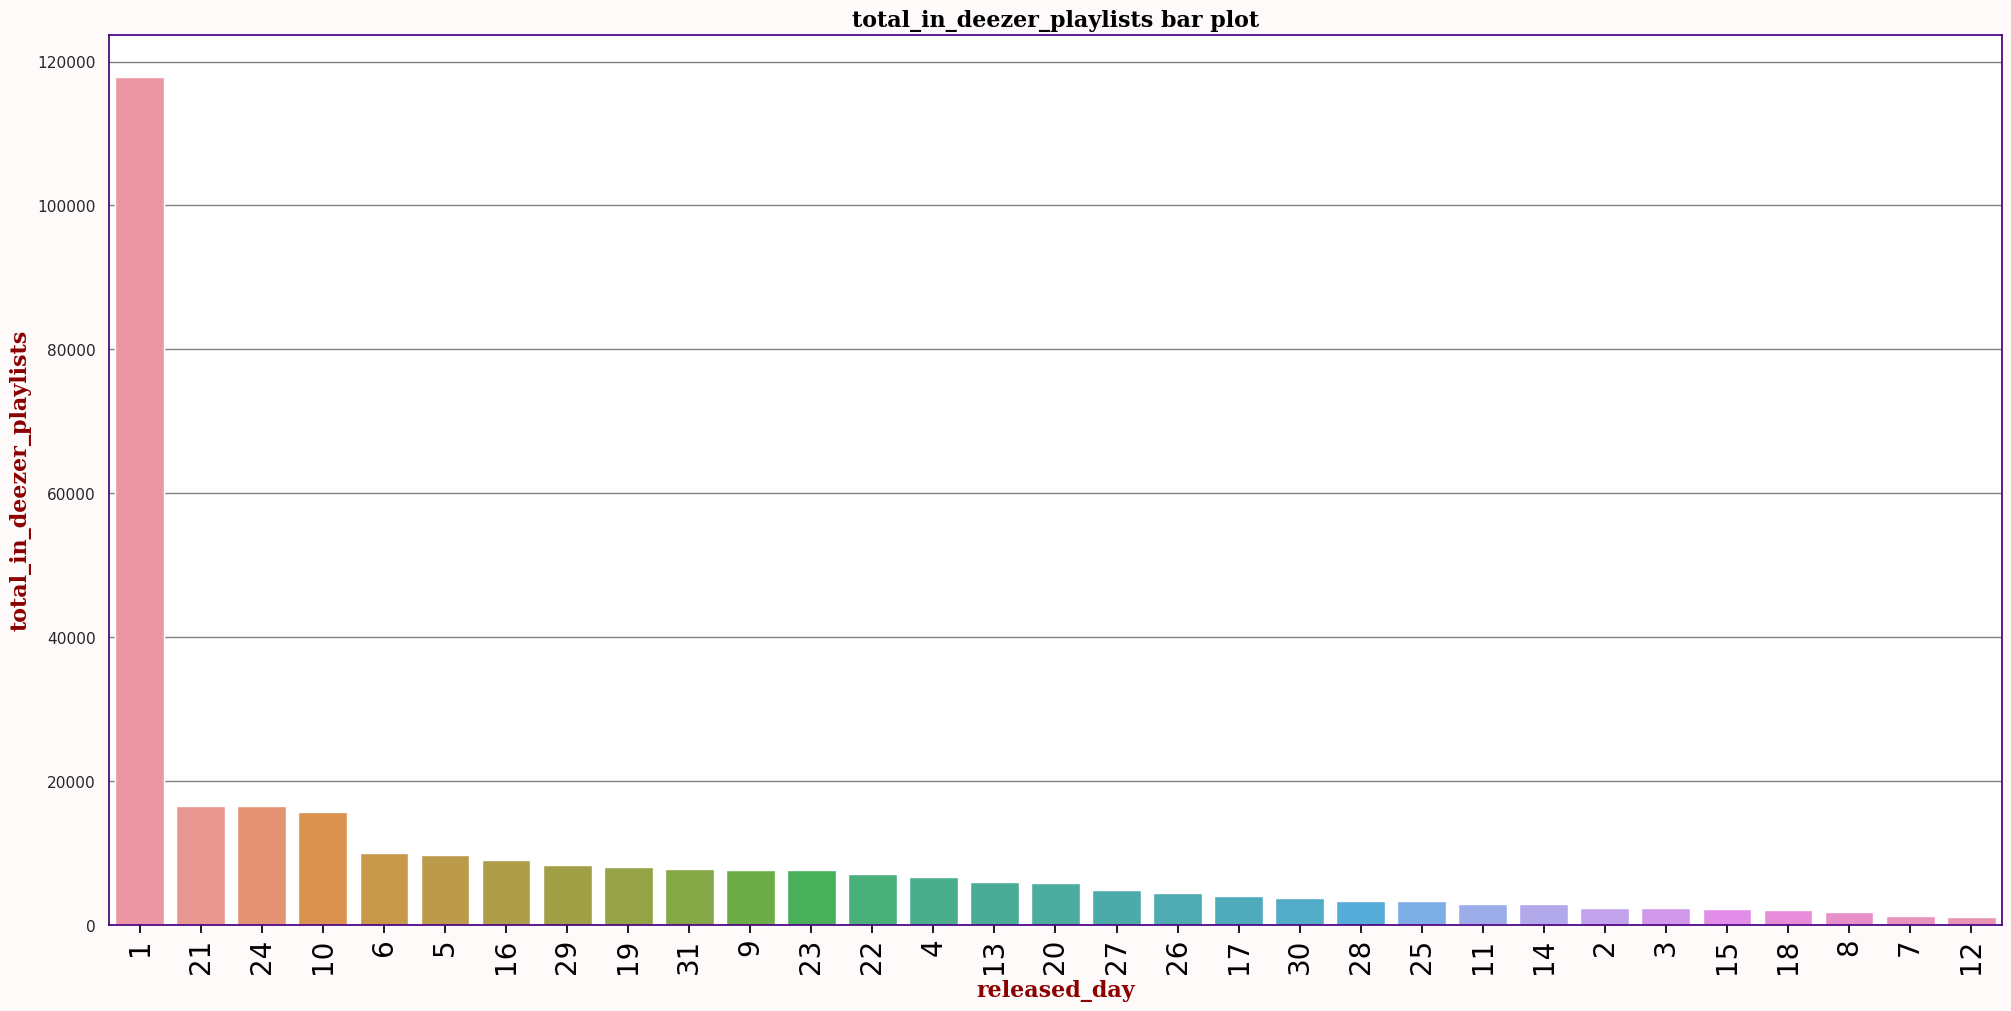

In [563]:
ordering = group_data.sort_values('total_in_deezer_playlists',ascending=False).released_day
plotting_bar(group_data,'released_day','total_in_deezer_playlists',ordering=ordering)

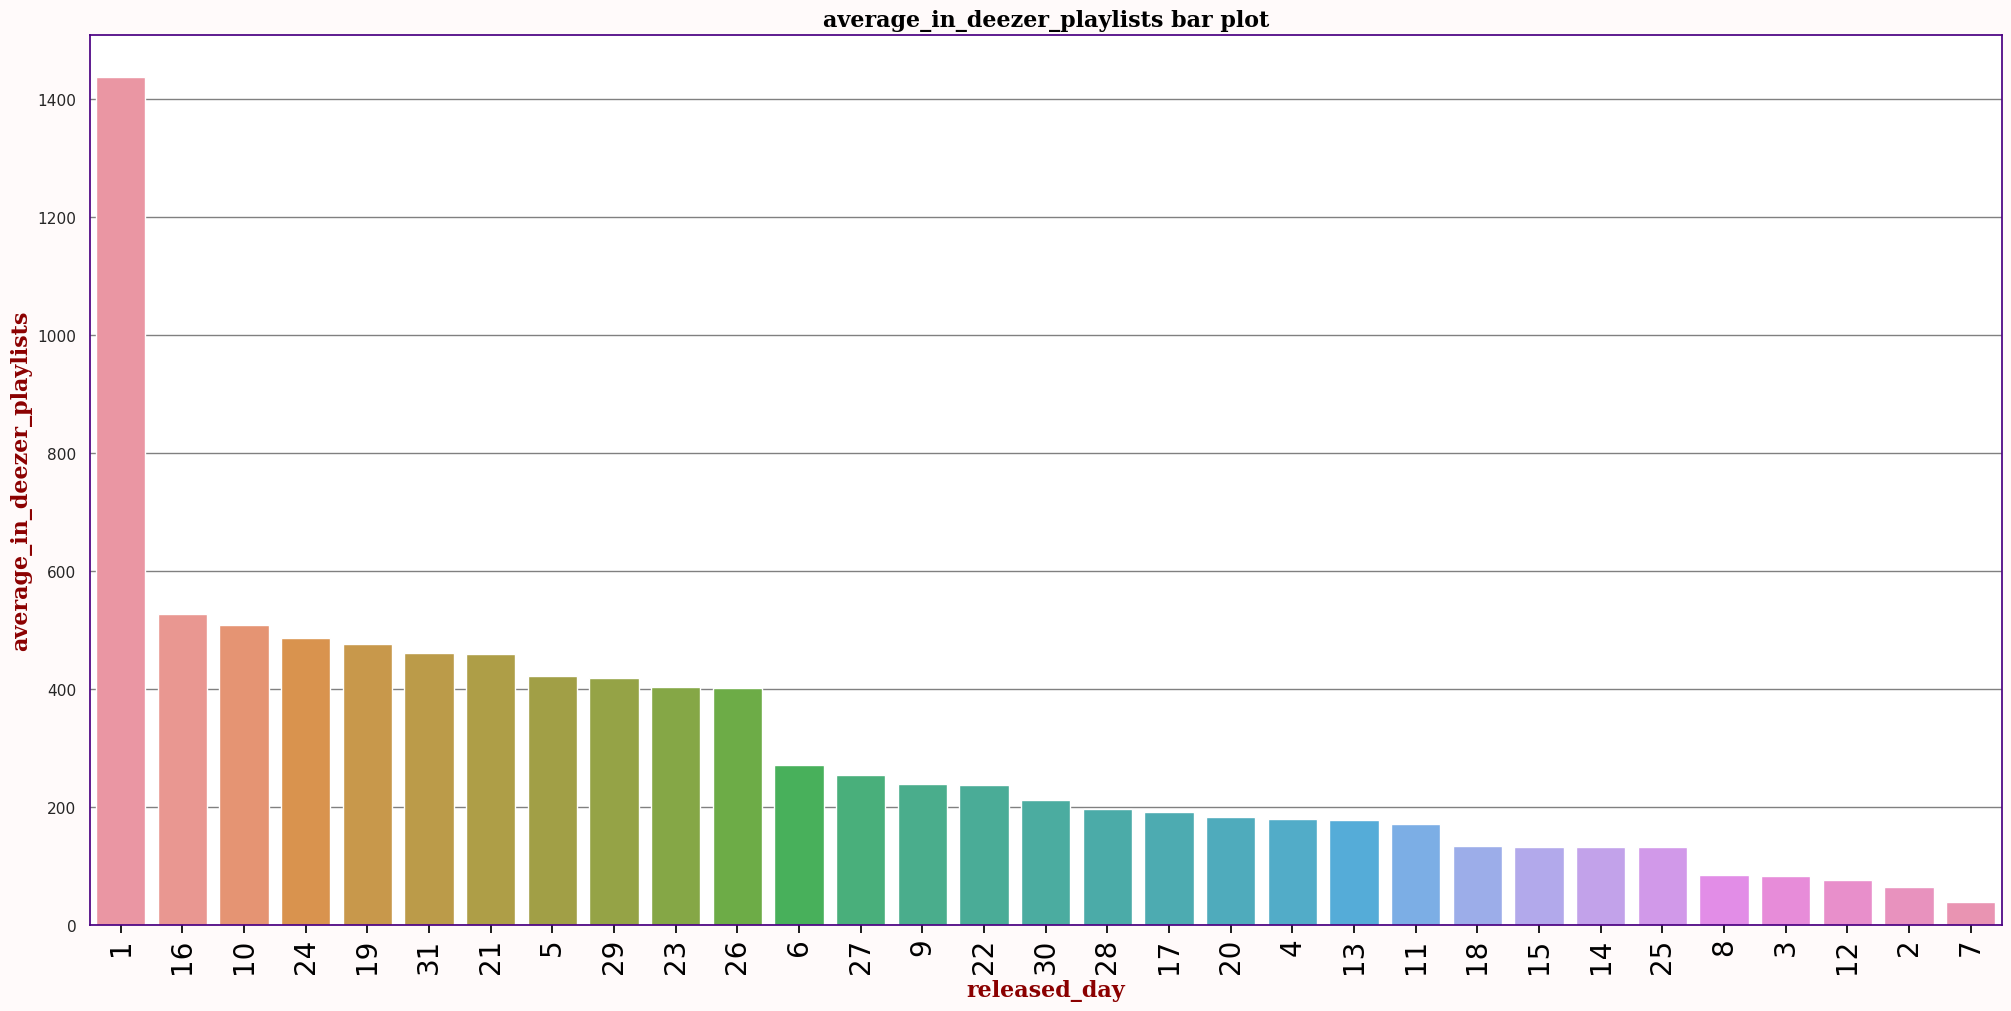

In [564]:
ordering = group_data.sort_values('average_in_deezer_playlists',ascending=False).released_day
plotting_bar(group_data,'released_day','average_in_deezer_playlists',ordering=ordering)

In [565]:
# bpm
group_data = summary_stats(songs_eda,'released_year','bpm')
group_data.head()

released_year  total_bpm  average_bpm  deviation_bpm  skewness_level_bpm
0           1930      130.0        130.0            NaN                 NaN
1           1942       96.0         96.0            NaN                 NaN
2           1946      139.0        139.0            NaN                 NaN
3           1950      143.0        143.0            NaN                 NaN
4           1957      175.0        175.0            NaN                 NaN

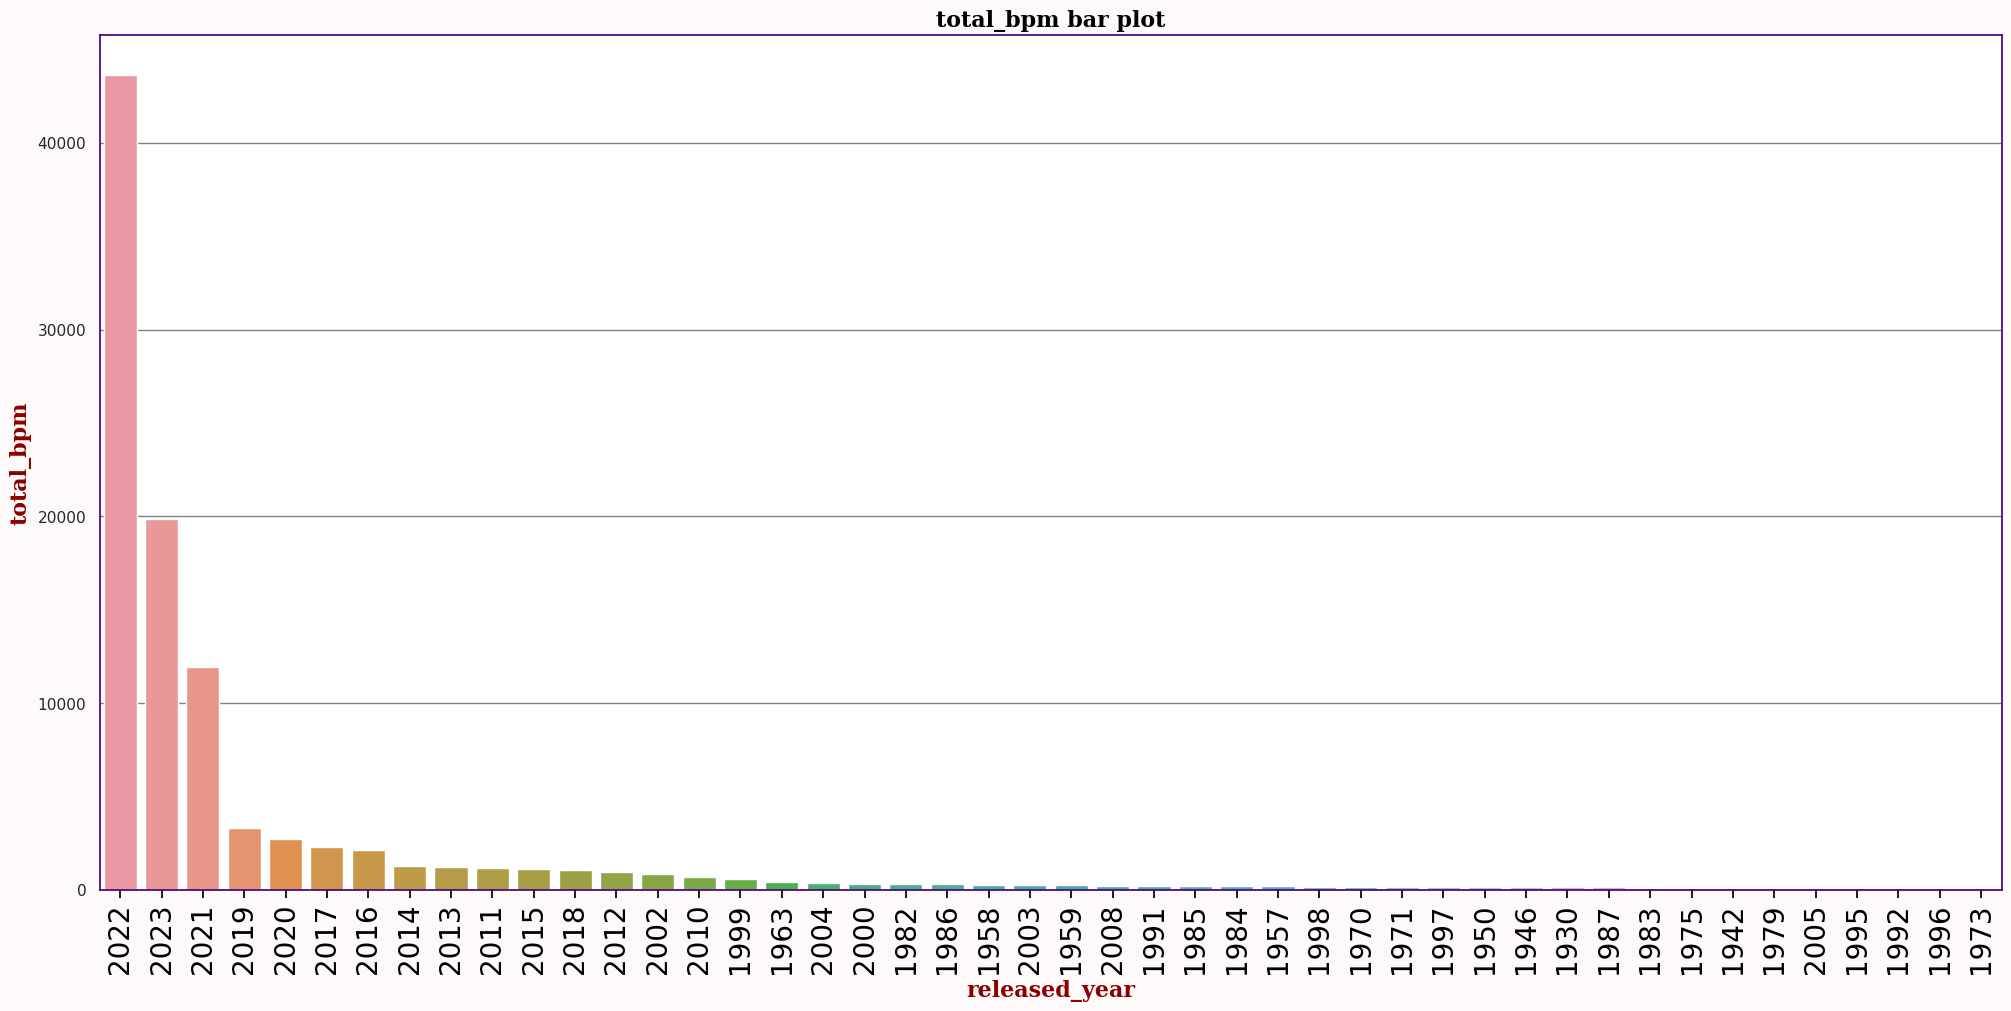

In [566]:
ordering = group_data.sort_values('total_bpm',ascending=False).released_year
plotting_bar(group_data,'released_year','total_bpm',ordering=ordering)

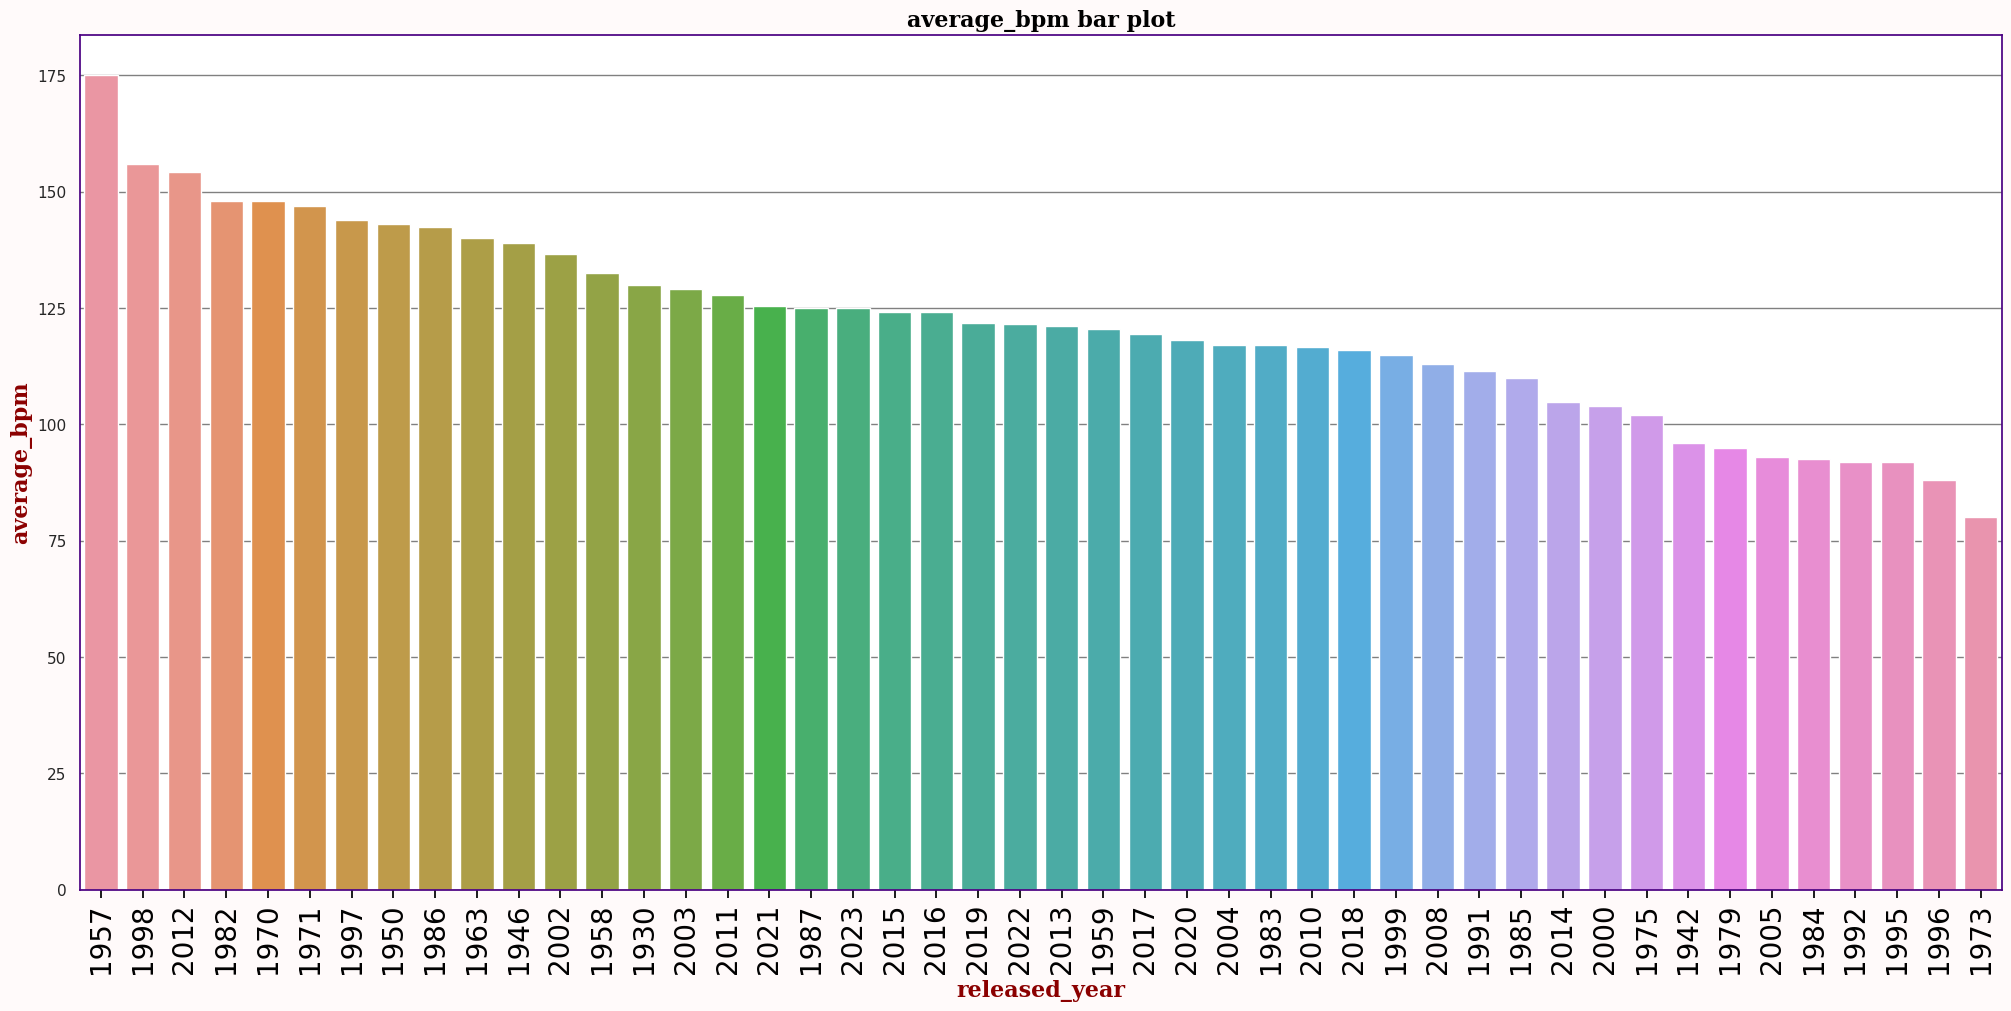

In [567]:
ordering = group_data.sort_values('average_bpm',ascending=False).released_year
plotting_bar(group_data,'released_year','average_bpm',ordering=ordering)

In [568]:
# bpm
group_data = summary_stats(songs_eda,'released_day','bpm')
group_data.head()

released_day  total_bpm  average_bpm  deviation_bpm  skewness_level_bpm
0             1      10403      126.866         30.831               0.426
1             2       4433      119.811         28.259               0.888
2             3       3662      126.276         30.237              -0.136
3             4       4681      126.514         28.247               0.287
4             5       2892      125.739         32.674               0.027

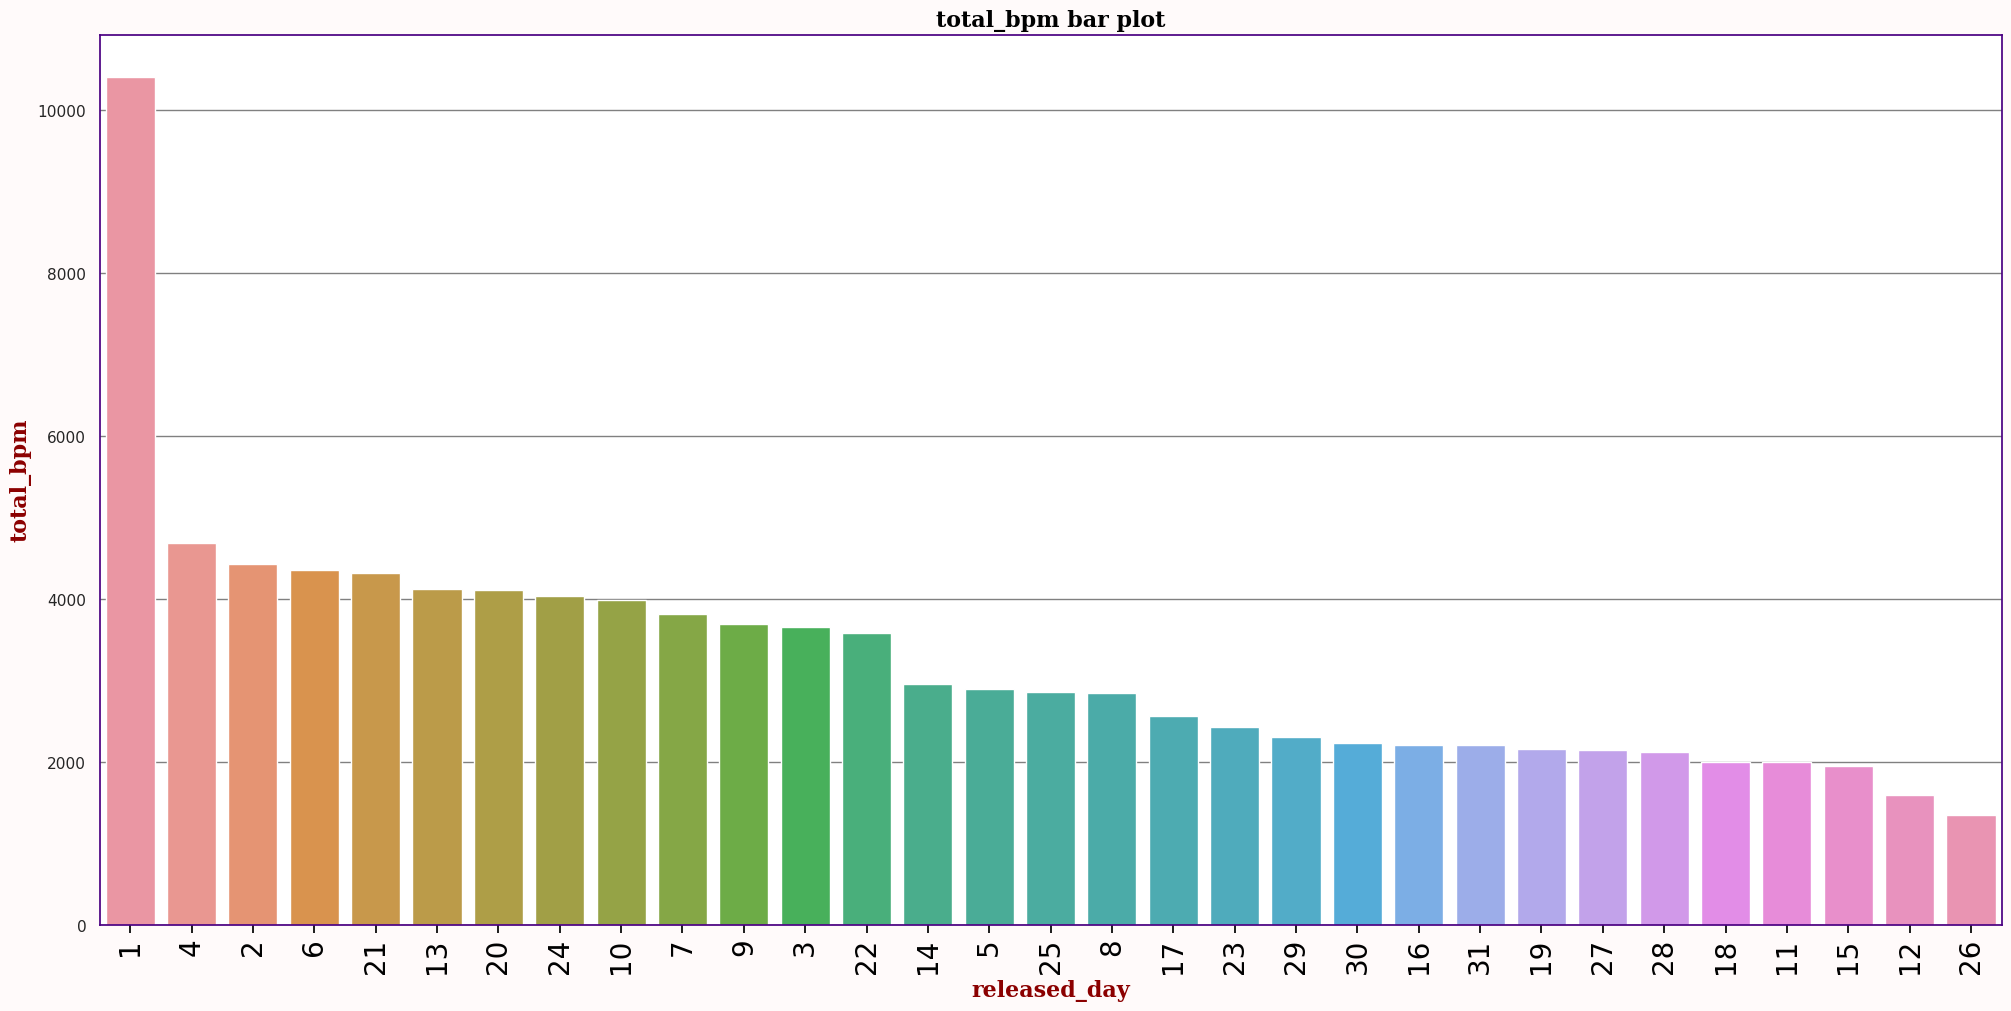

In [569]:
ordering = group_data.sort_values('total_bpm',ascending=False).released_day
plotting_bar(group_data,'released_day','total_bpm',ordering=ordering)

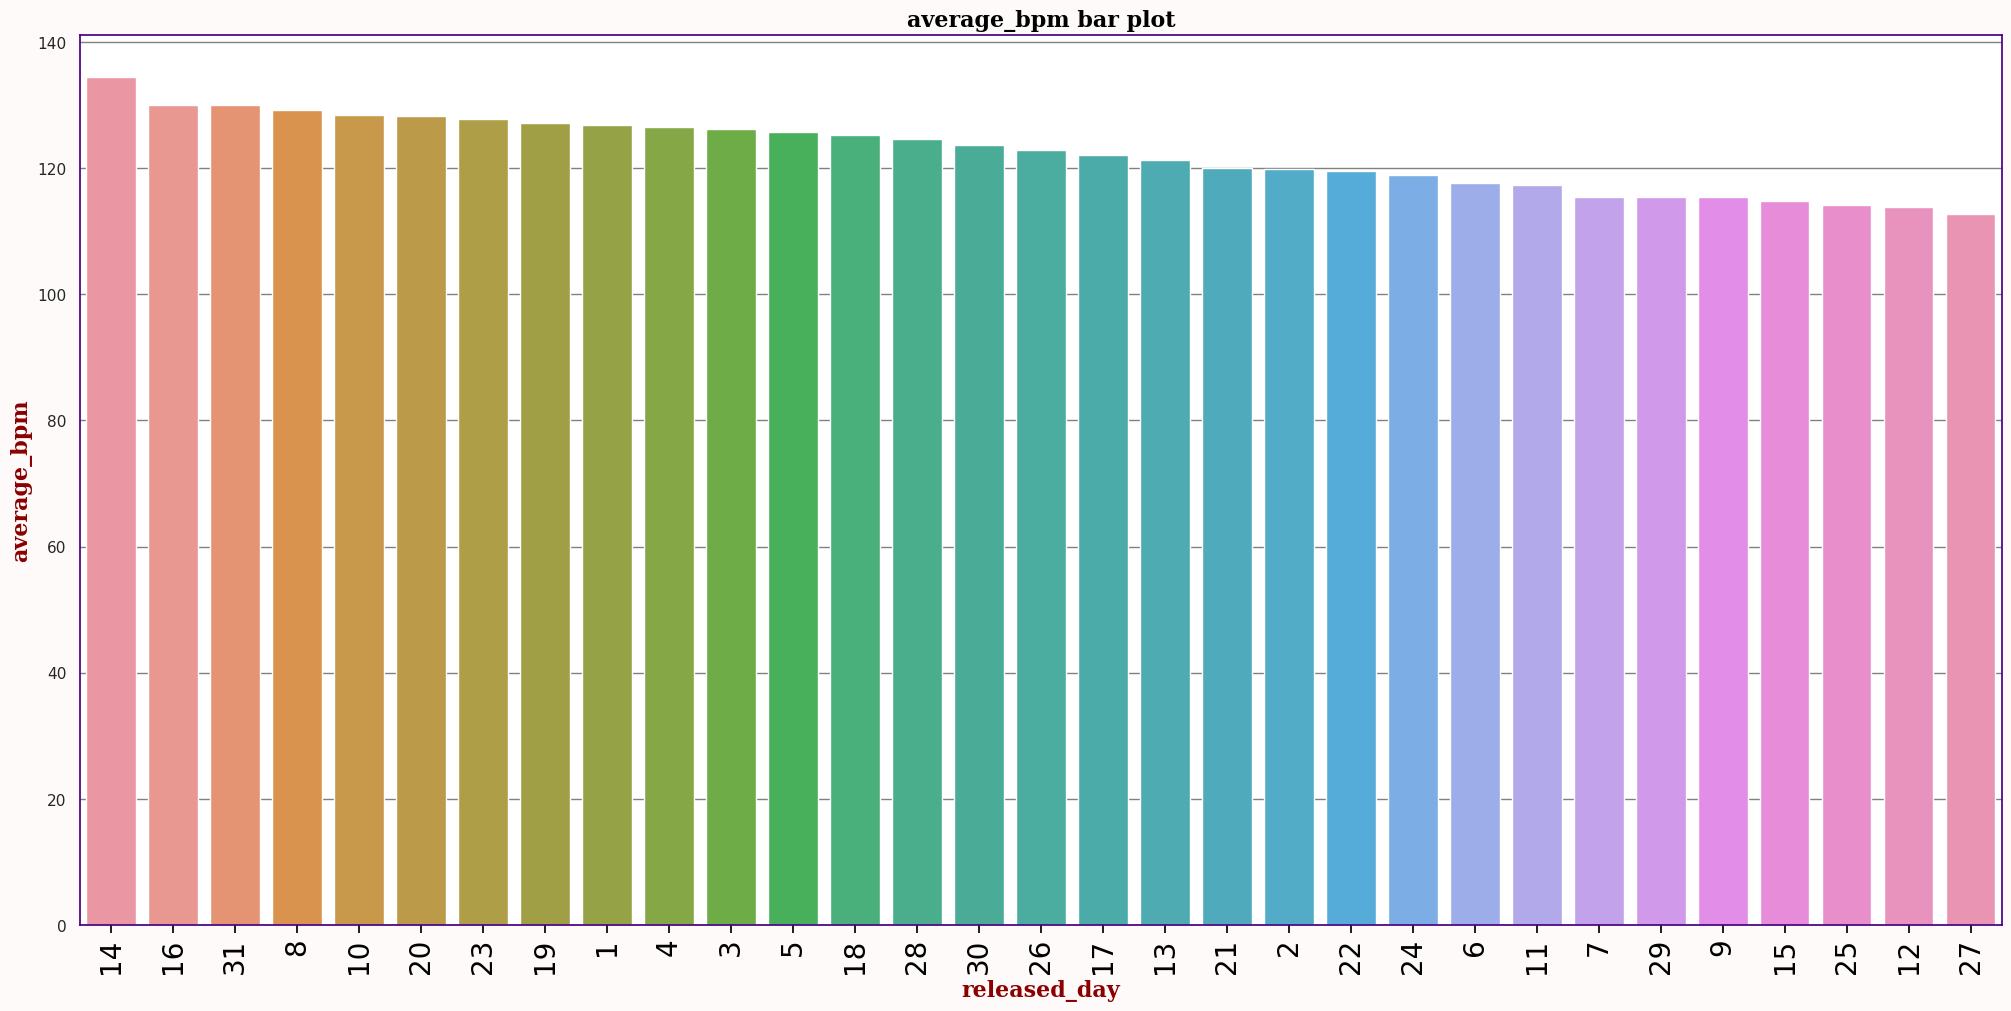

In [570]:
ordering = group_data.sort_values('average_bpm',ascending=False).released_day
plotting_bar(group_data,'released_day','average_bpm',ordering=ordering)

In [571]:
# danceability_%
group_data = summary_stats(songs_eda,'released_year','danceability_%')
group_data.head()

released_year  total_danceability_%  average_danceability_%  \
0           1930                  65.0                    65.0   
1           1942                  23.0                    23.0   
2           1946                  36.0                    36.0   
3           1950                  60.0                    60.0   
4           1957                  51.0                    51.0   

   deviation_danceability_%  skewness_level_danceability_%  
0                       NaN                            NaN  
1                       NaN                            NaN  
2                       NaN                            NaN  
3                       NaN                            NaN  
4                       NaN                            NaN

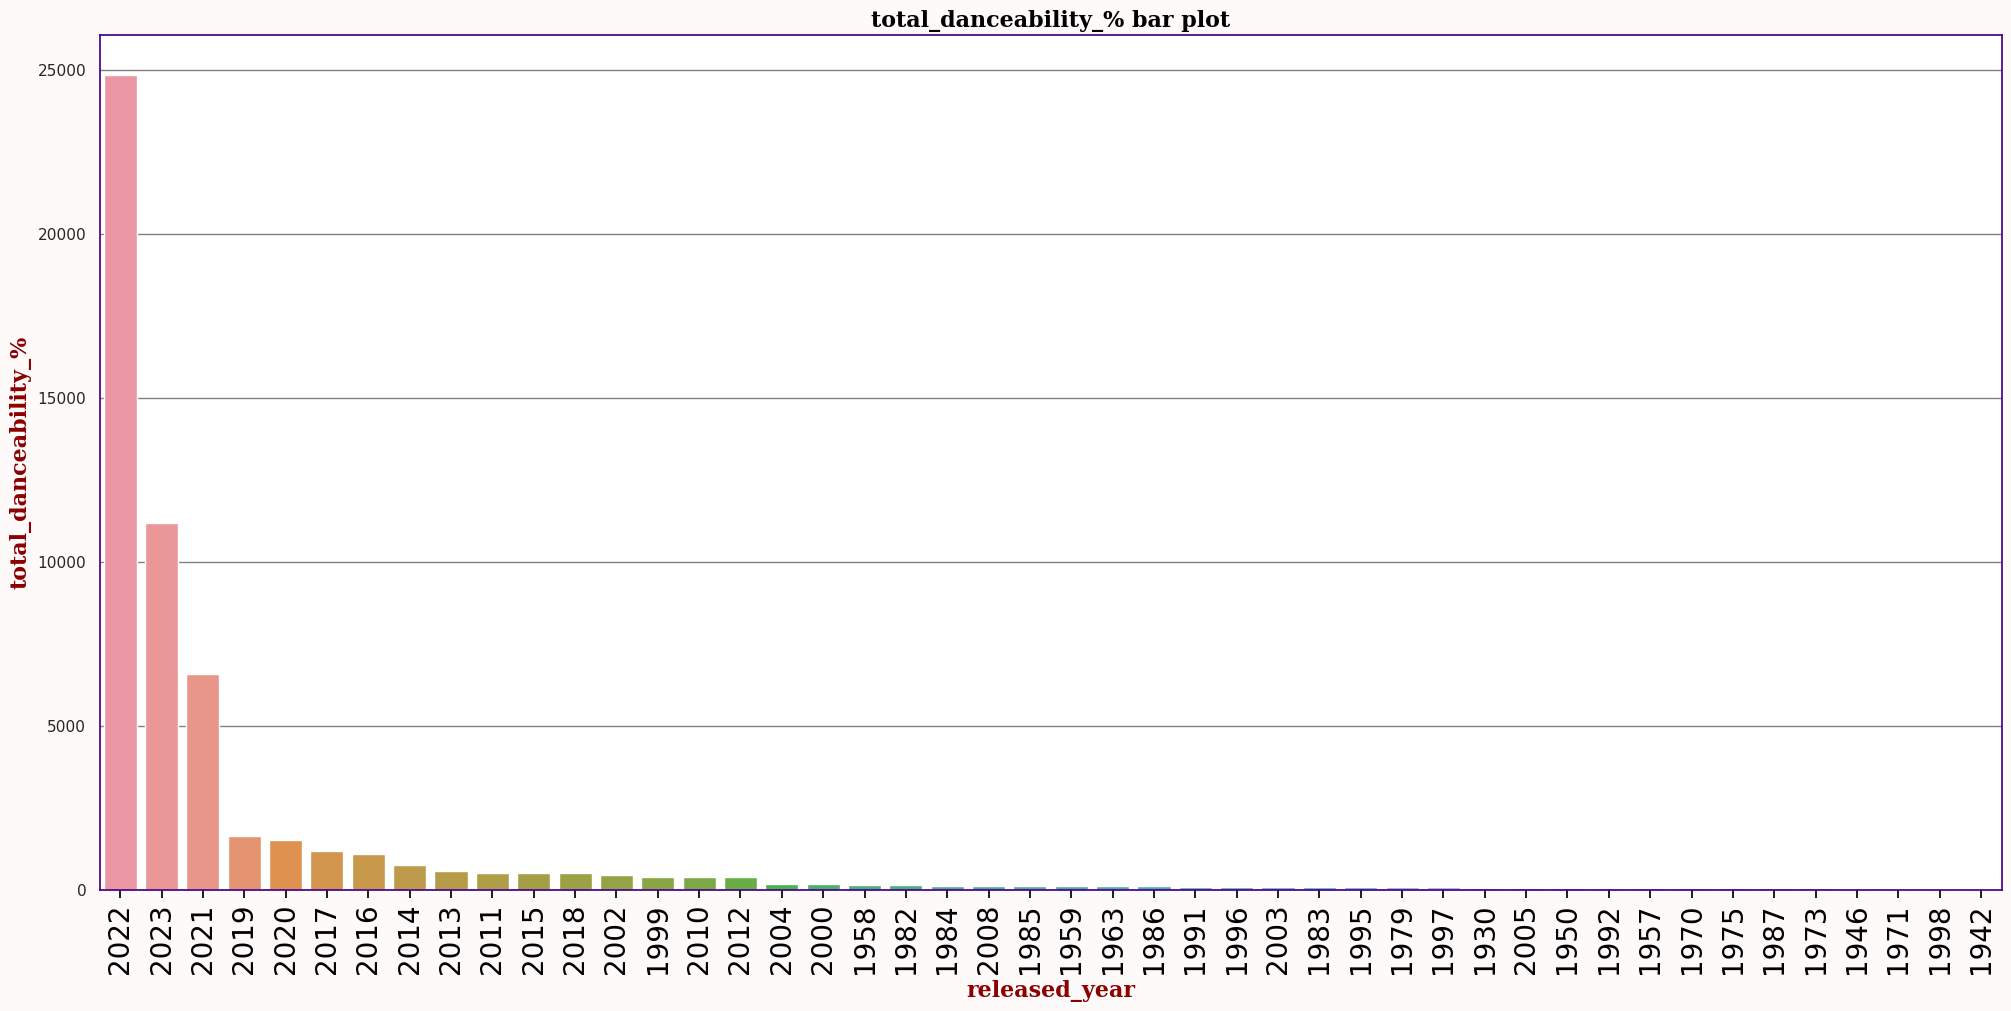

In [572]:
ordering = group_data.sort_values('total_danceability_%',ascending=False).released_year
plotting_bar(group_data,'released_year','total_danceability_%',ordering=ordering)

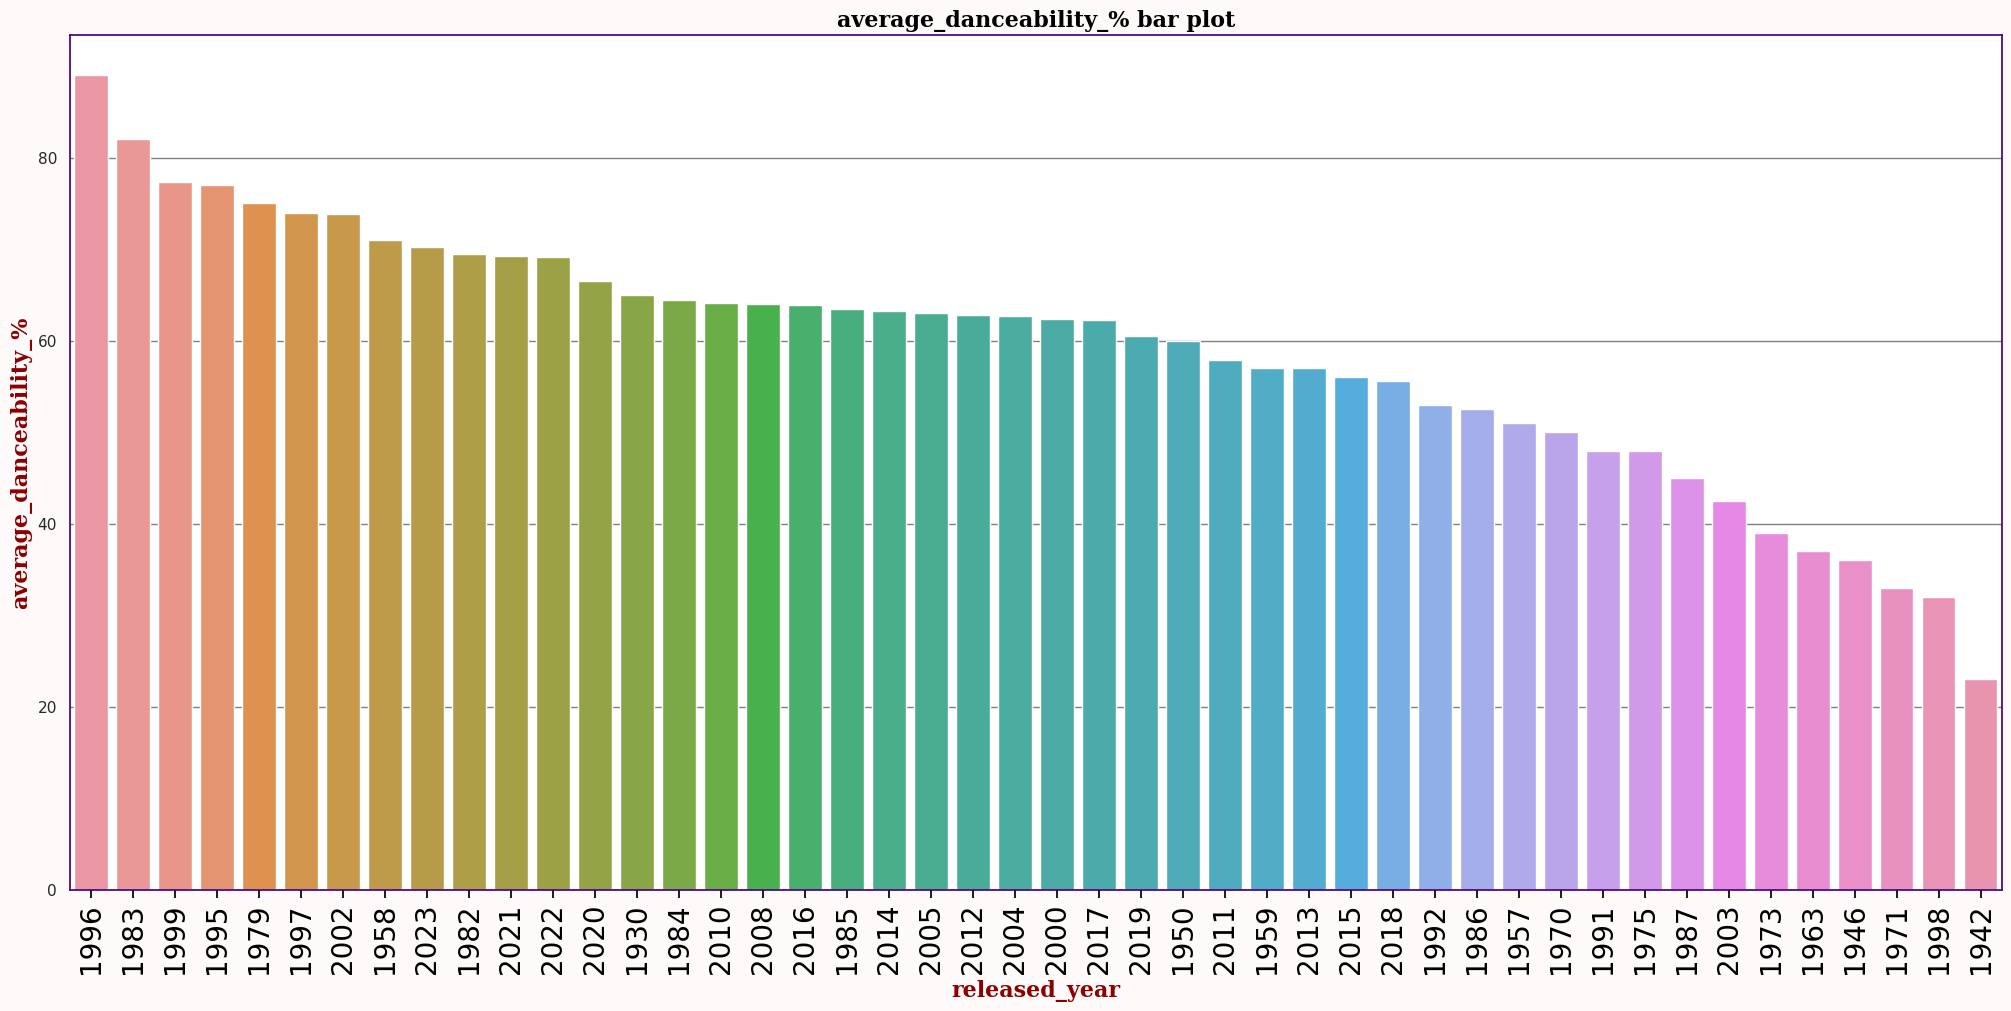

In [573]:
ordering = group_data.sort_values('average_danceability_%',ascending=False).released_year
plotting_bar(group_data,'released_year','average_danceability_%',ordering=ordering)

In [574]:
# in_spotify_playlists
group_data = summary_stats(songs_eda,'released_day','danceability_%')
group_data.head()

released_day  total_danceability_%  average_danceability_%  \
0             1                5278.0                  64.366   
1             2                2583.0                  69.811   
2             3                1979.0                  68.241   
3             4                2505.0                  67.703   
4             5                1370.0                  59.565   

   deviation_danceability_%  skewness_level_danceability_%  
0                    16.959                         -0.198  
1                    13.695                         -0.717  
2                    13.551                          0.207  
3                    16.067                         -0.308  
4                    12.228                         -0.830

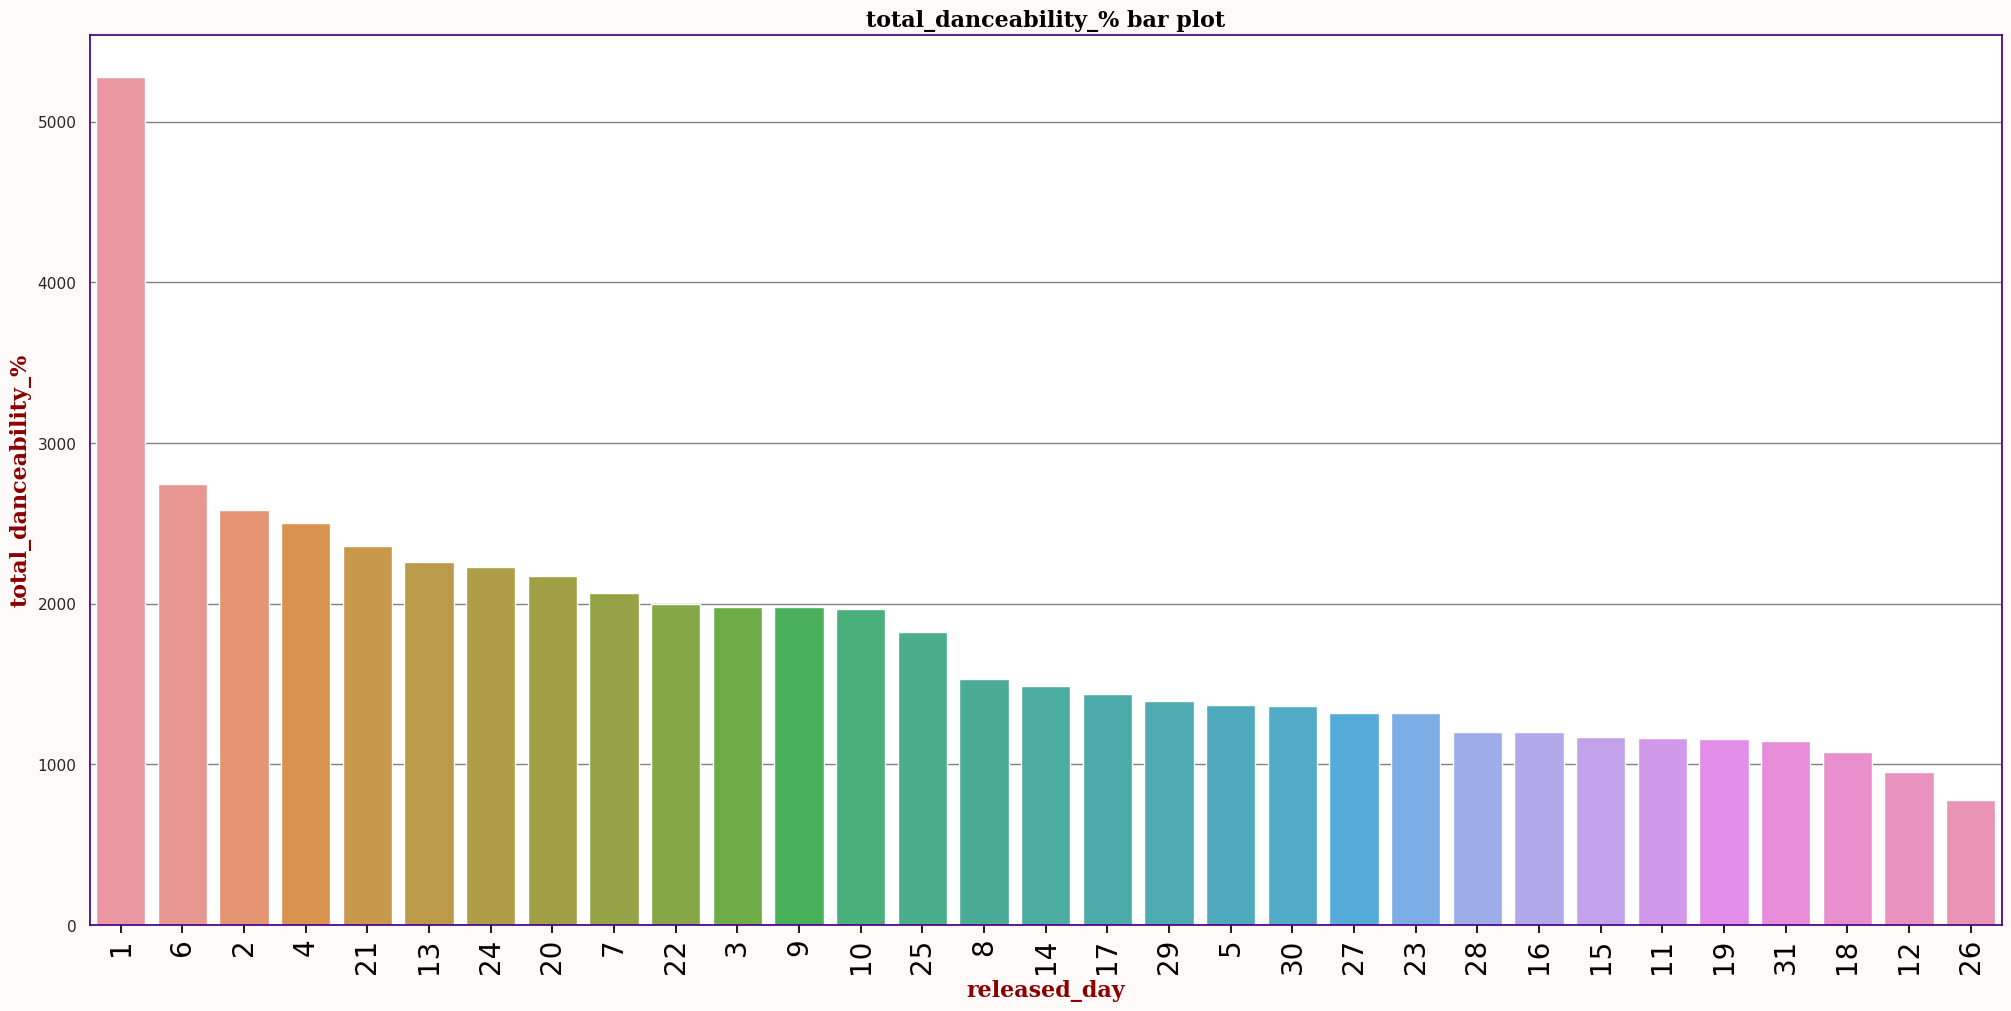

In [575]:
ordering = group_data.sort_values('total_danceability_%',ascending=False).released_day
plotting_bar(group_data,'released_day','total_danceability_%',ordering=ordering)

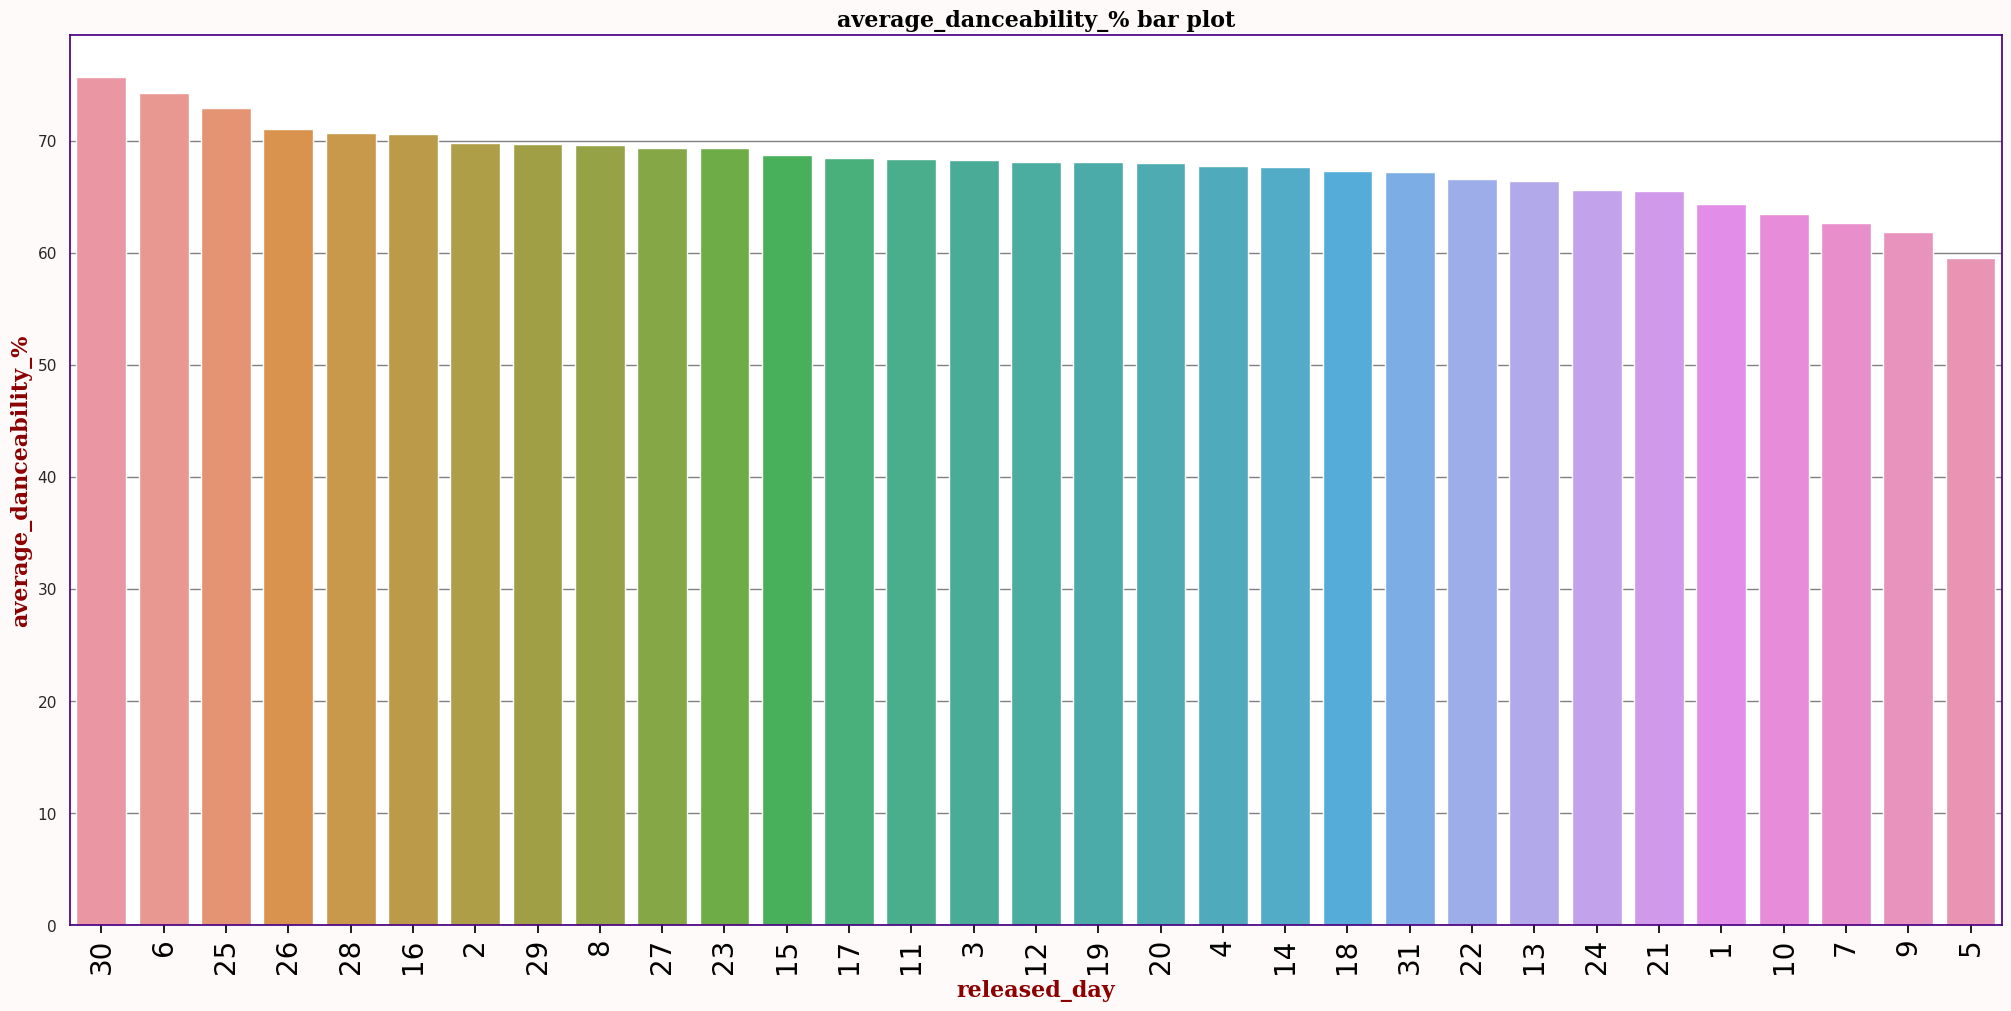

In [576]:
ordering = group_data.sort_values('average_danceability_%',ascending=False).released_day
plotting_bar(group_data,'released_day','average_danceability_%',ordering=ordering)

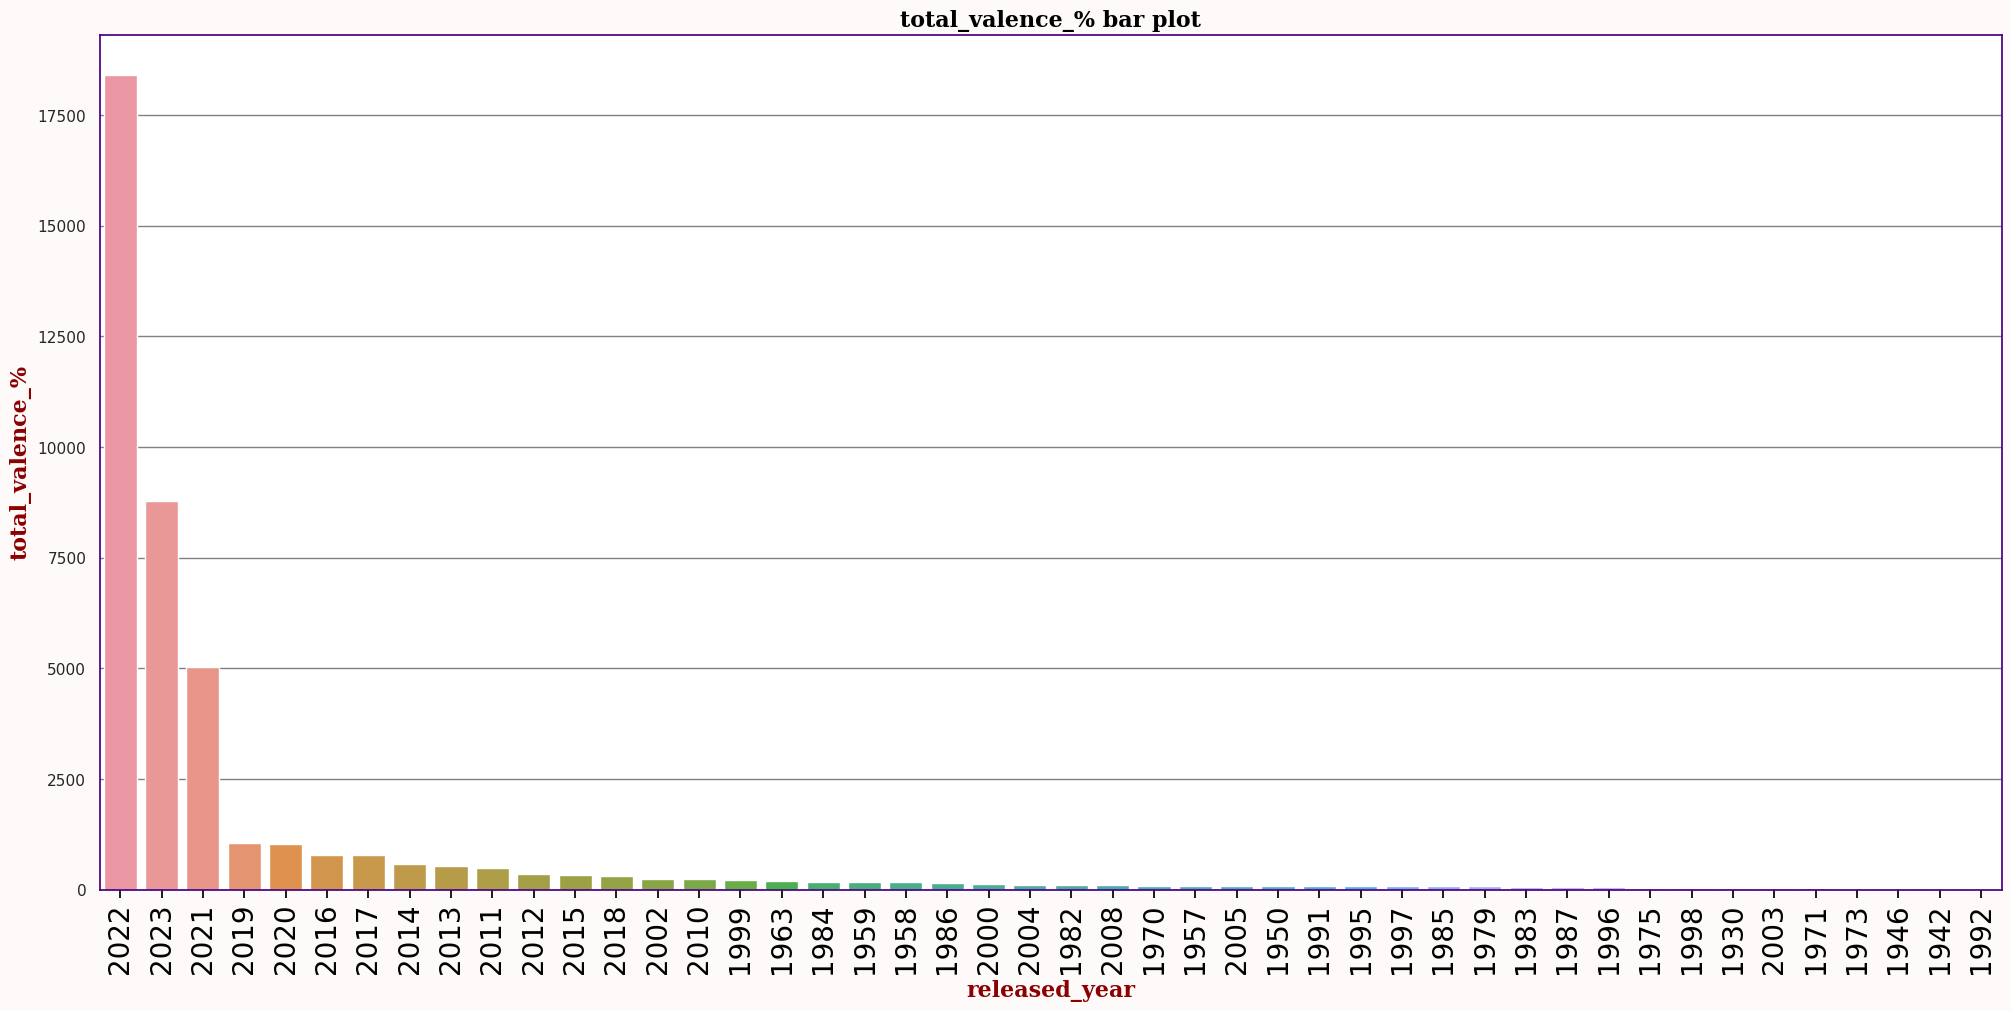

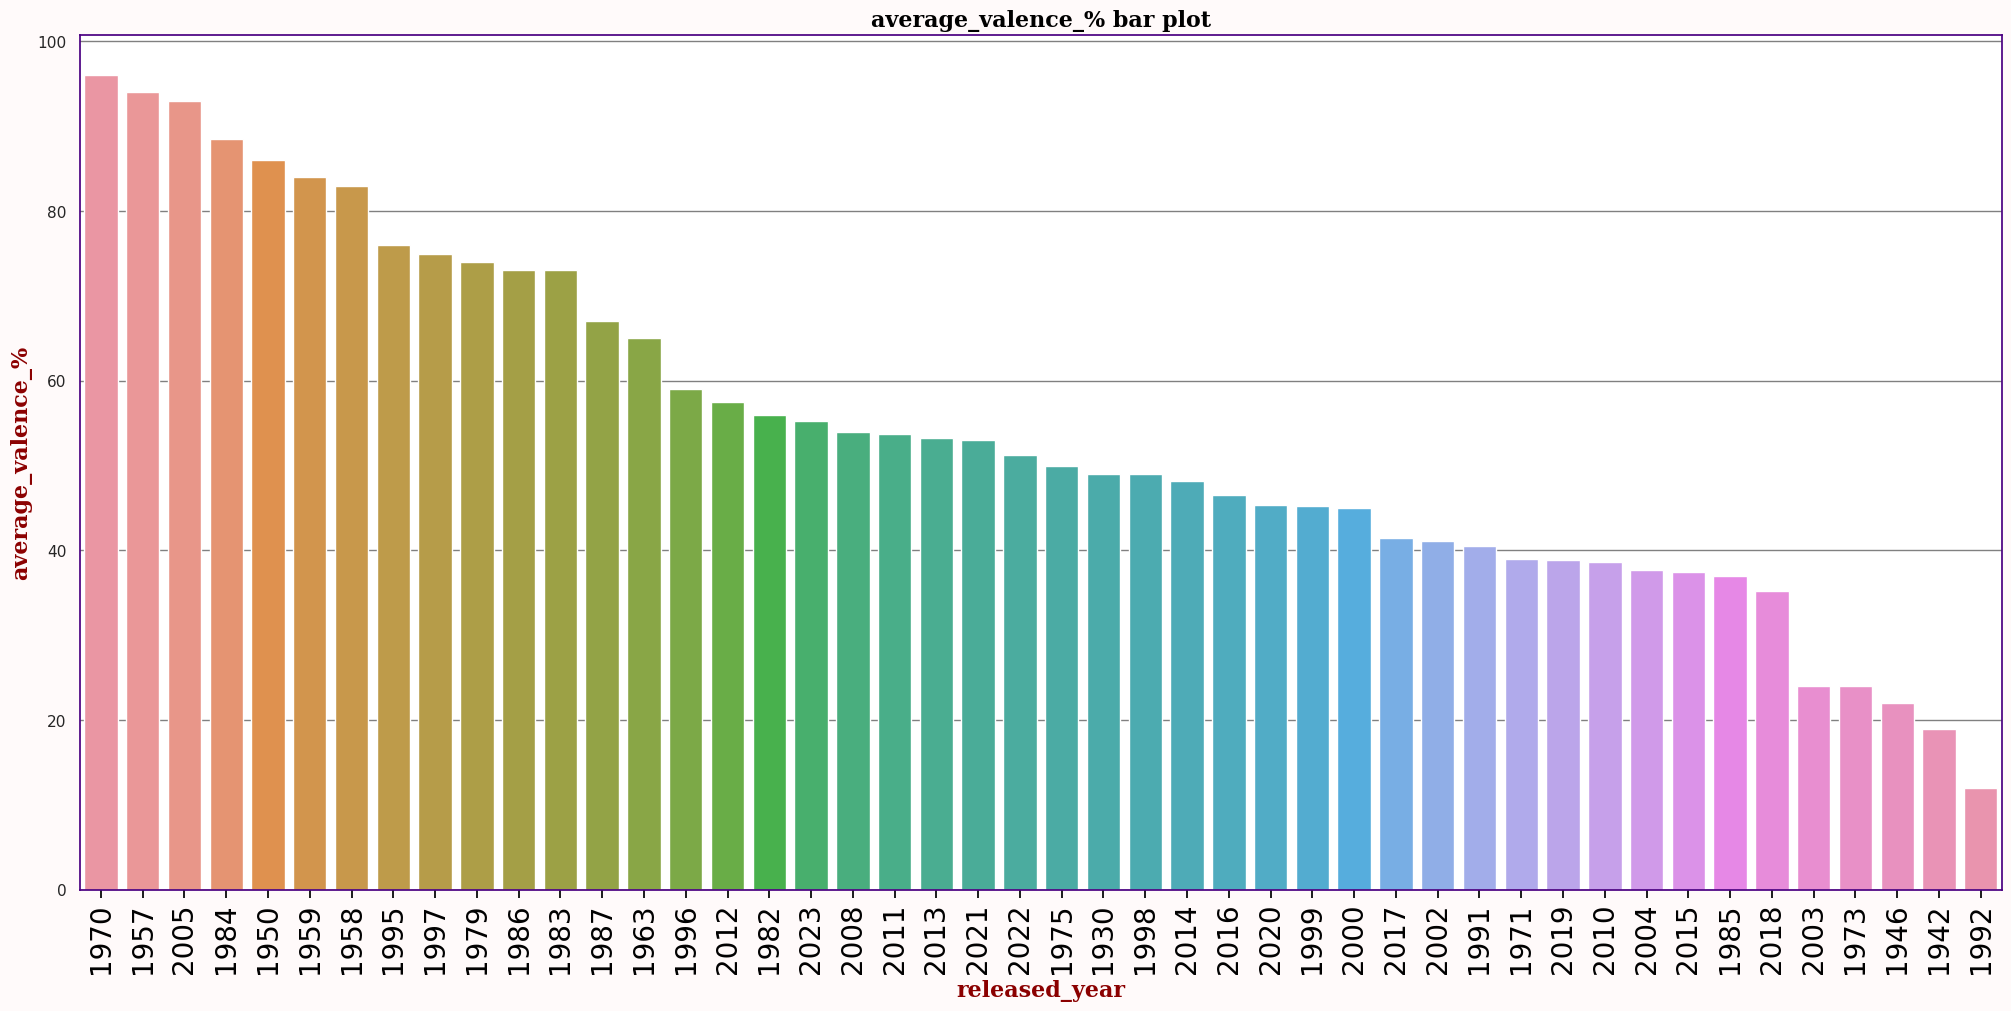

In [577]:
# valence_%
group_data = summary_stats(songs_eda,'released_year','valence_%')
group_data.head()
ordering = group_data.sort_values('total_valence_%',ascending=False).released_year
plotting_bar(group_data,'released_year','total_valence_%',ordering=ordering)
ordering = group_data.sort_values('average_valence_%',ascending=False).released_year
plotting_bar(group_data,'released_year','average_valence_%',ordering=ordering)

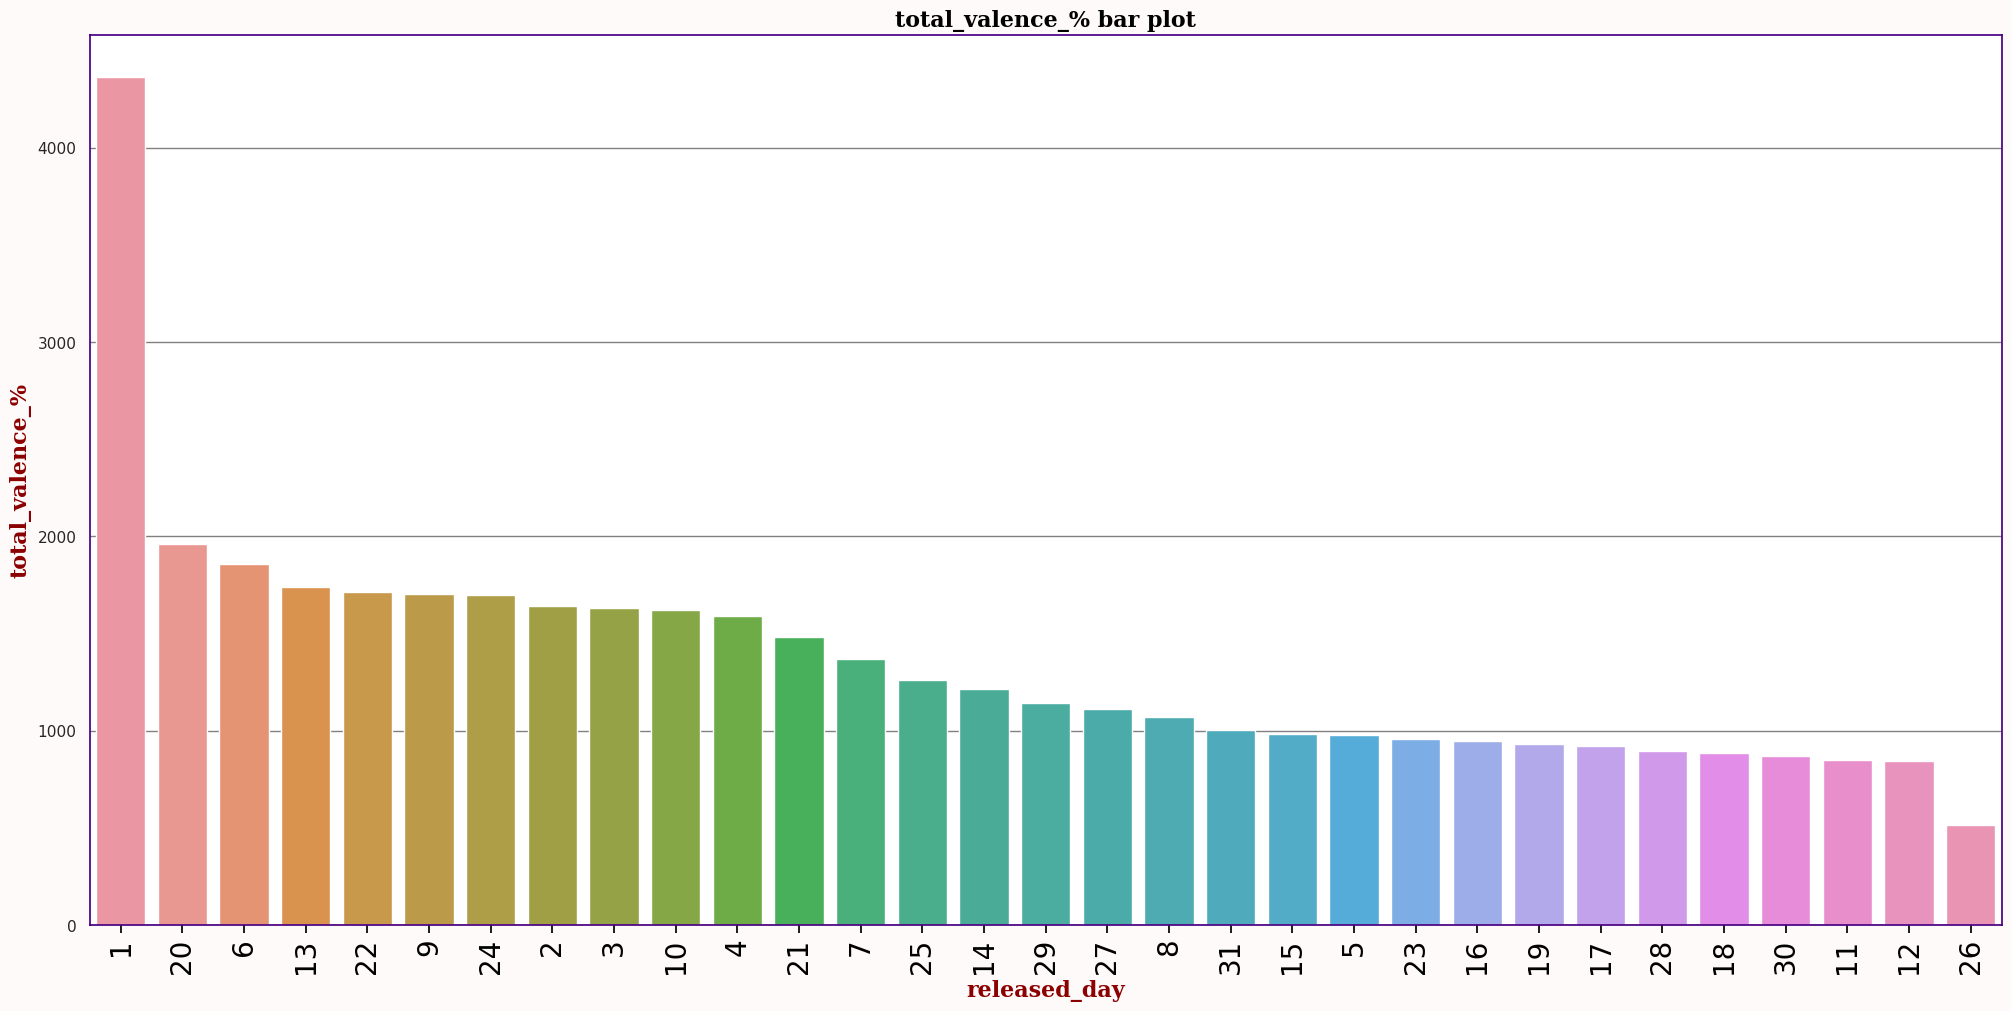

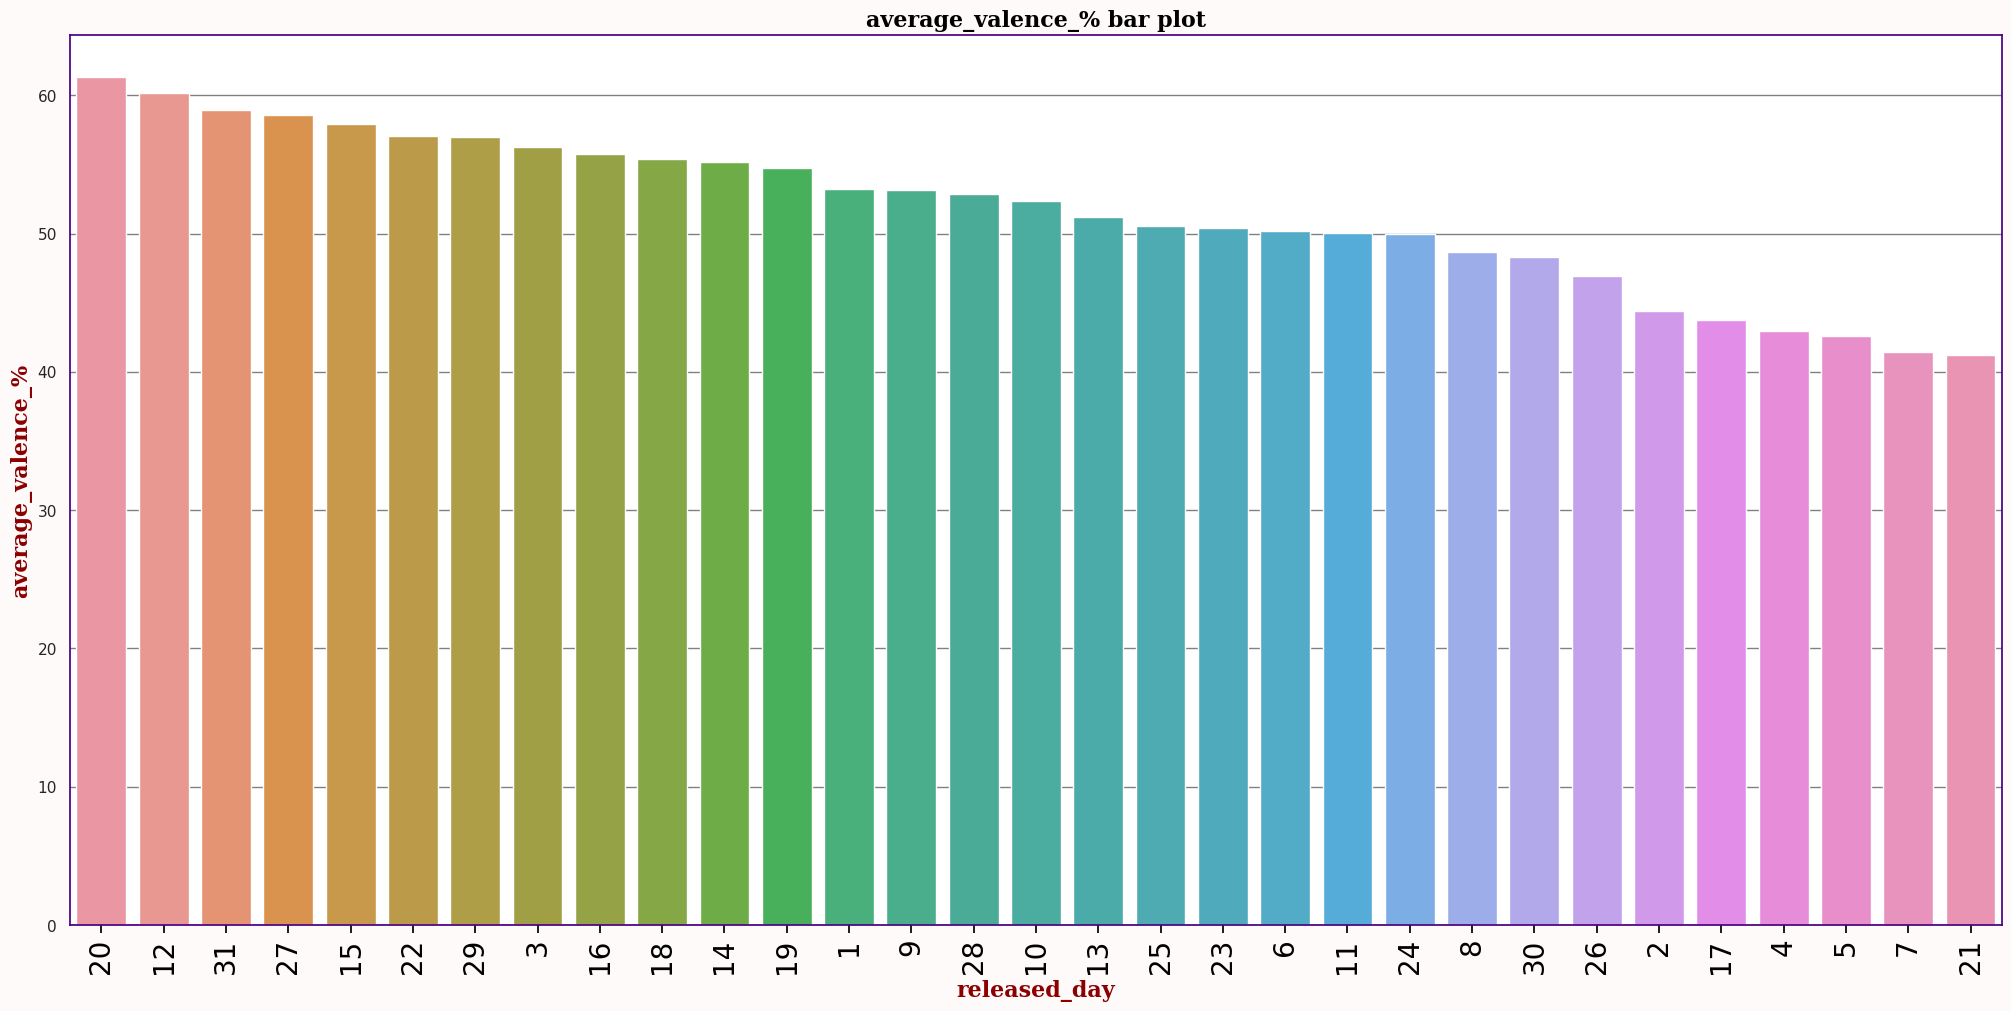

In [578]:
# valence_%
group_data = summary_stats(songs_eda,'released_day','valence_%')
group_data.head()
ordering = group_data.sort_values('total_valence_%',ascending=False).released_day
plotting_bar(group_data,'released_day','total_valence_%',ordering=ordering)
ordering = group_data.sort_values('average_valence_%',ascending=False).released_day
plotting_bar(group_data,'released_day','average_valence_%',ordering=ordering)

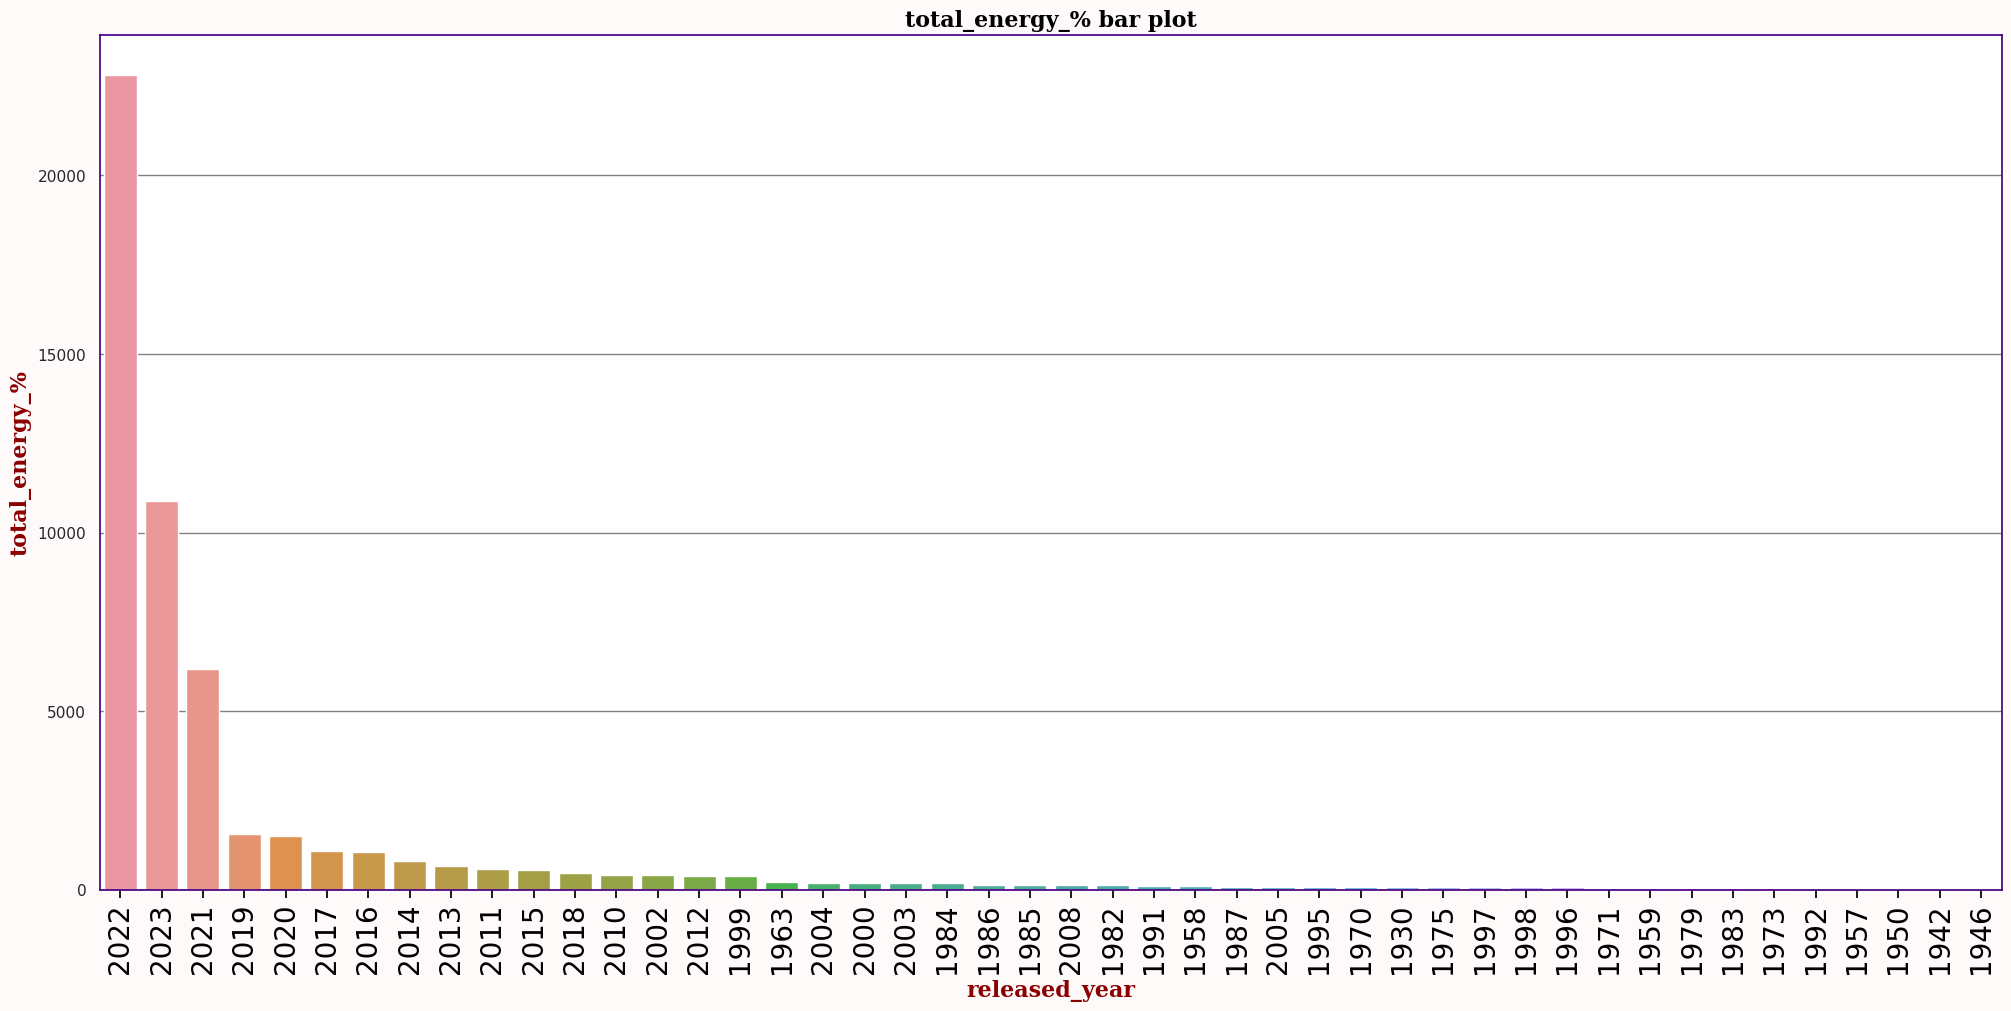

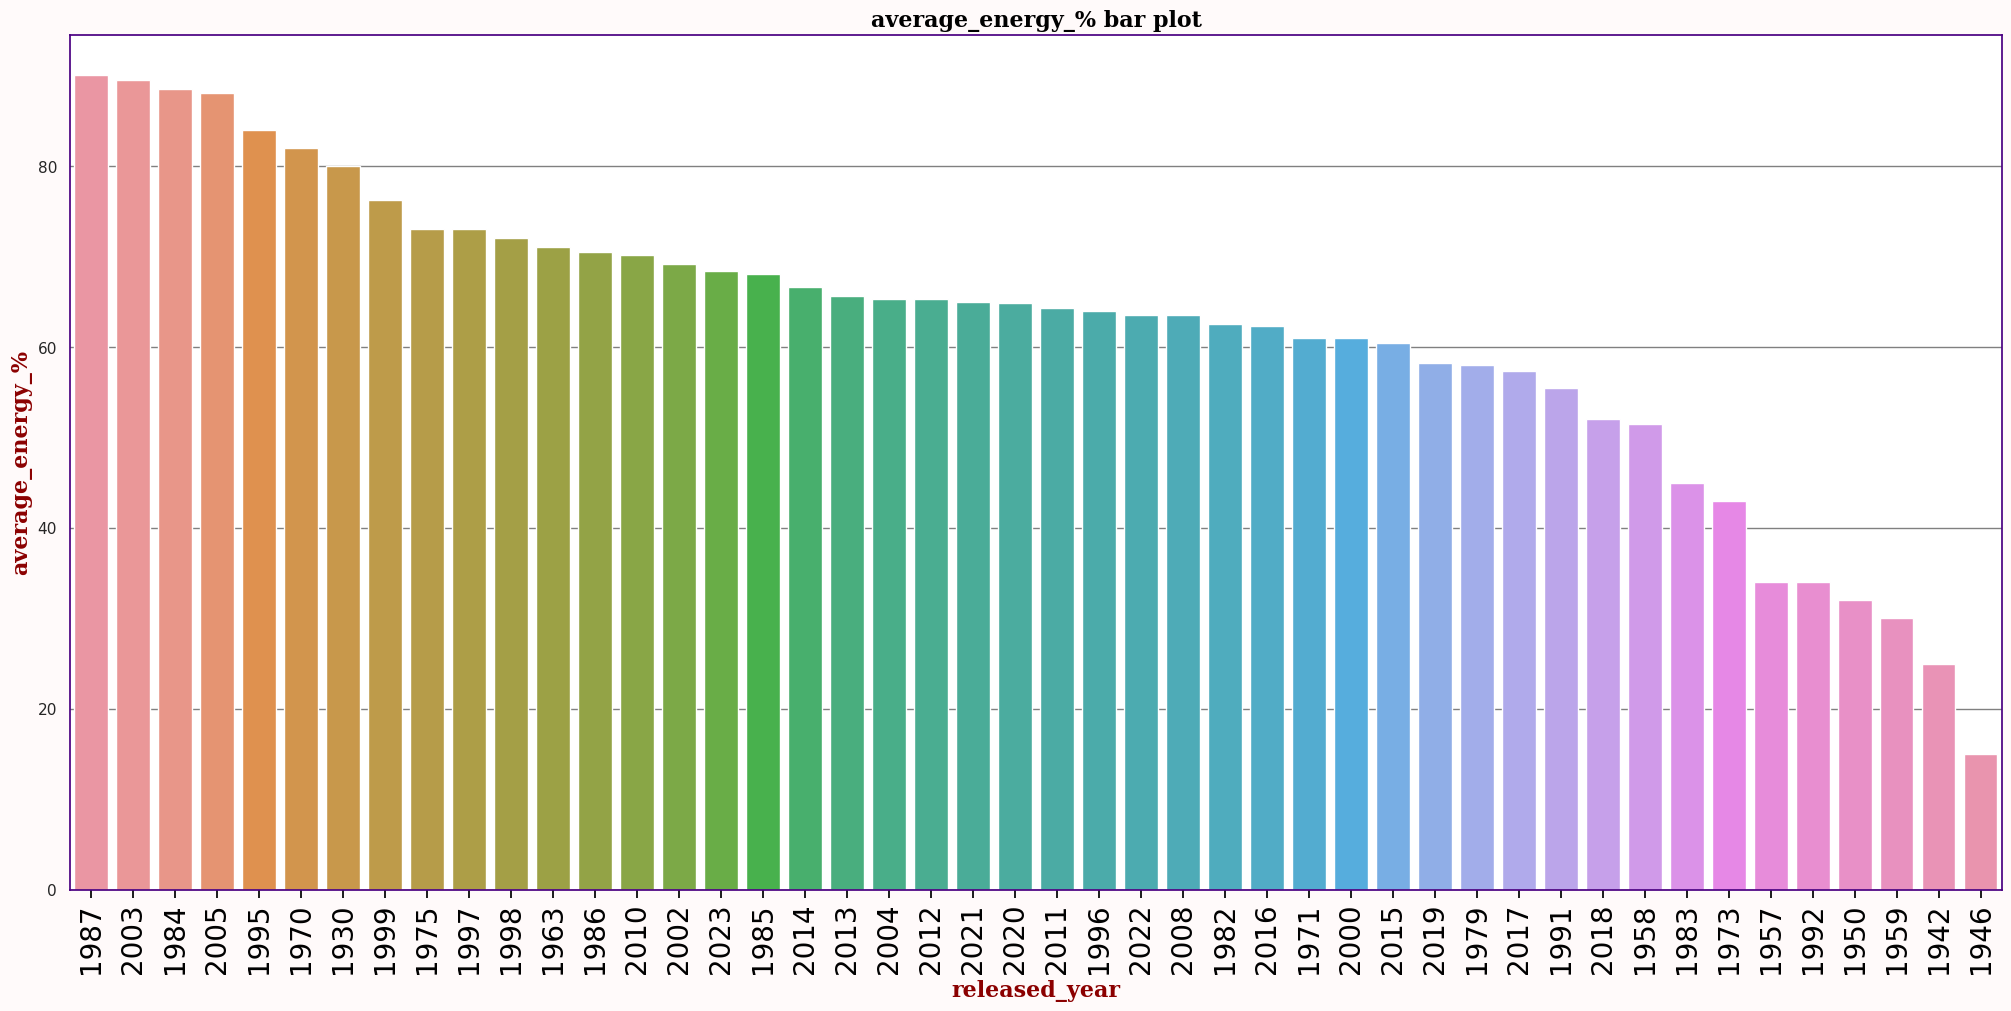

In [579]:
# energy_%
group_data = summary_stats(songs_eda,'released_year','energy_%')
group_data.head()
ordering = group_data.sort_values('total_energy_%',ascending=False).released_year
plotting_bar(group_data,'released_year','total_energy_%',ordering=ordering)
ordering = group_data.sort_values('average_energy_%',ascending=False).released_year
plotting_bar(group_data,'released_year','average_energy_%',ordering=ordering)

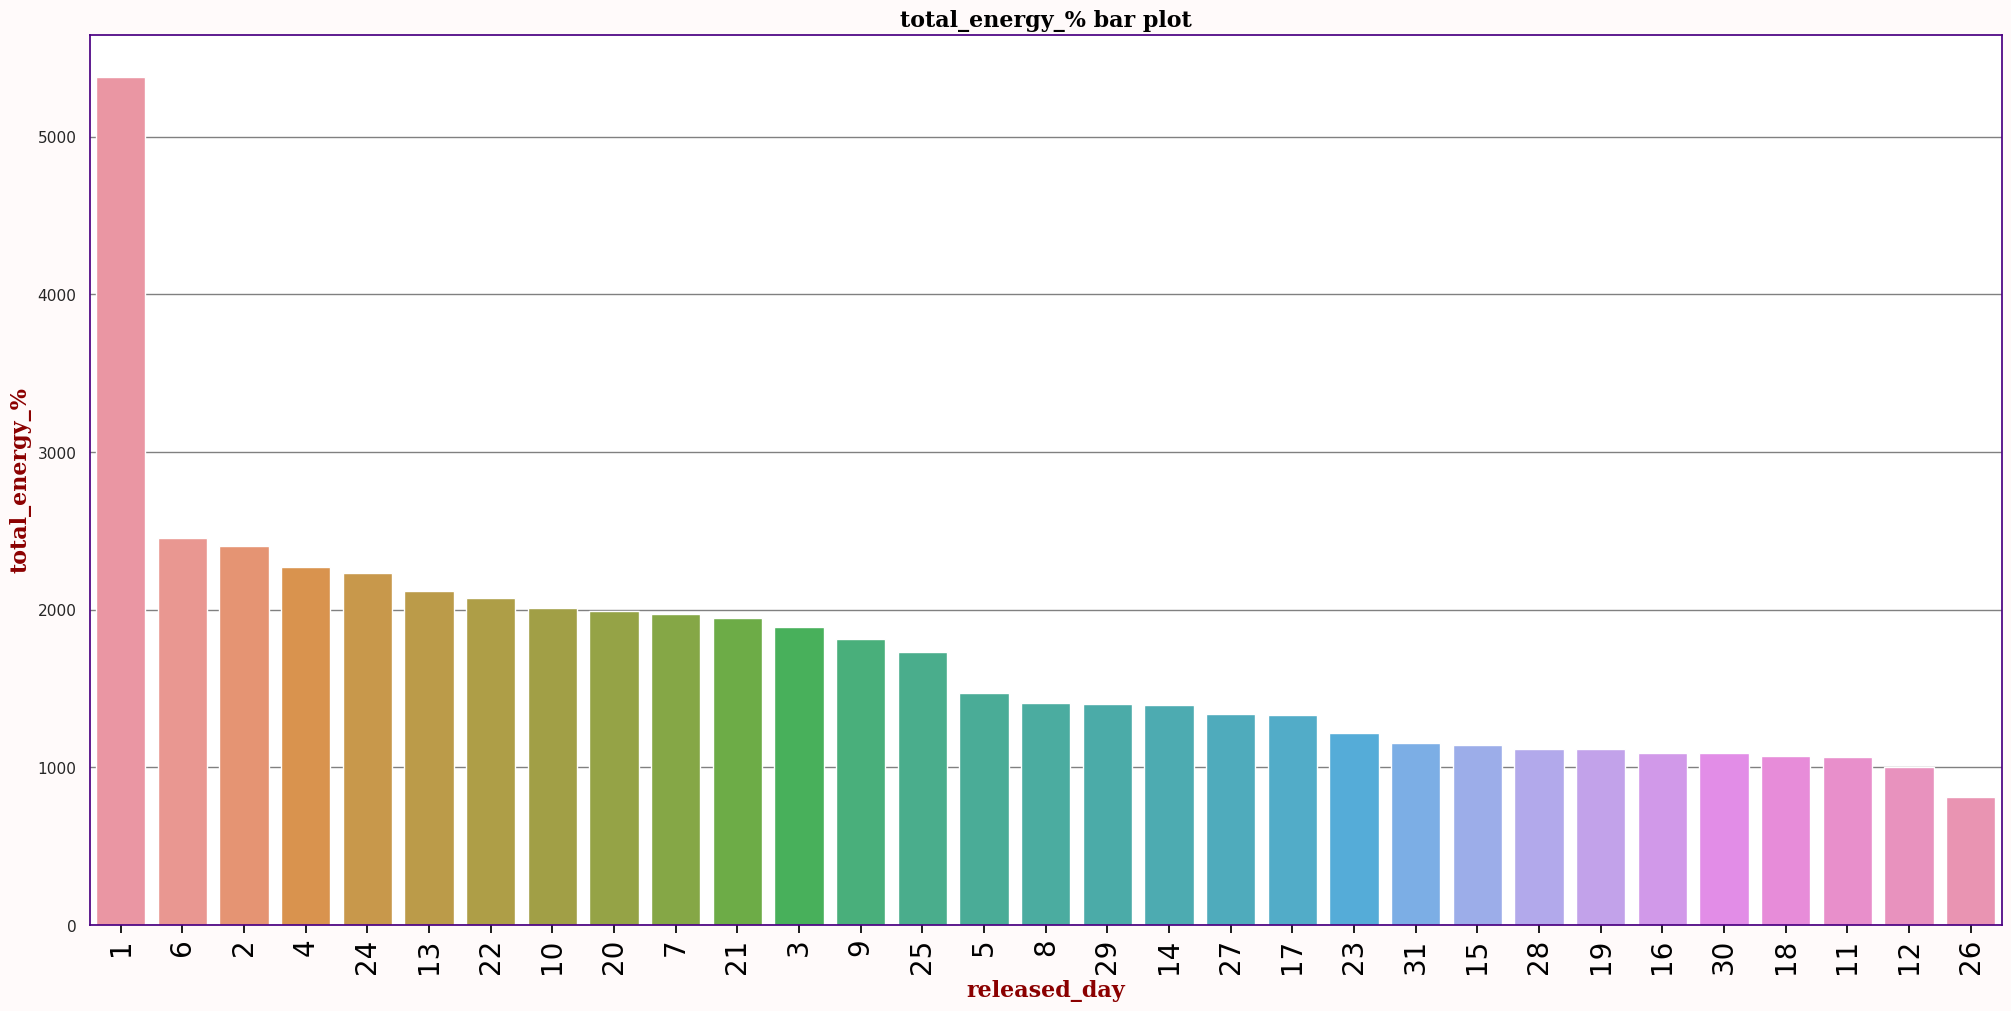

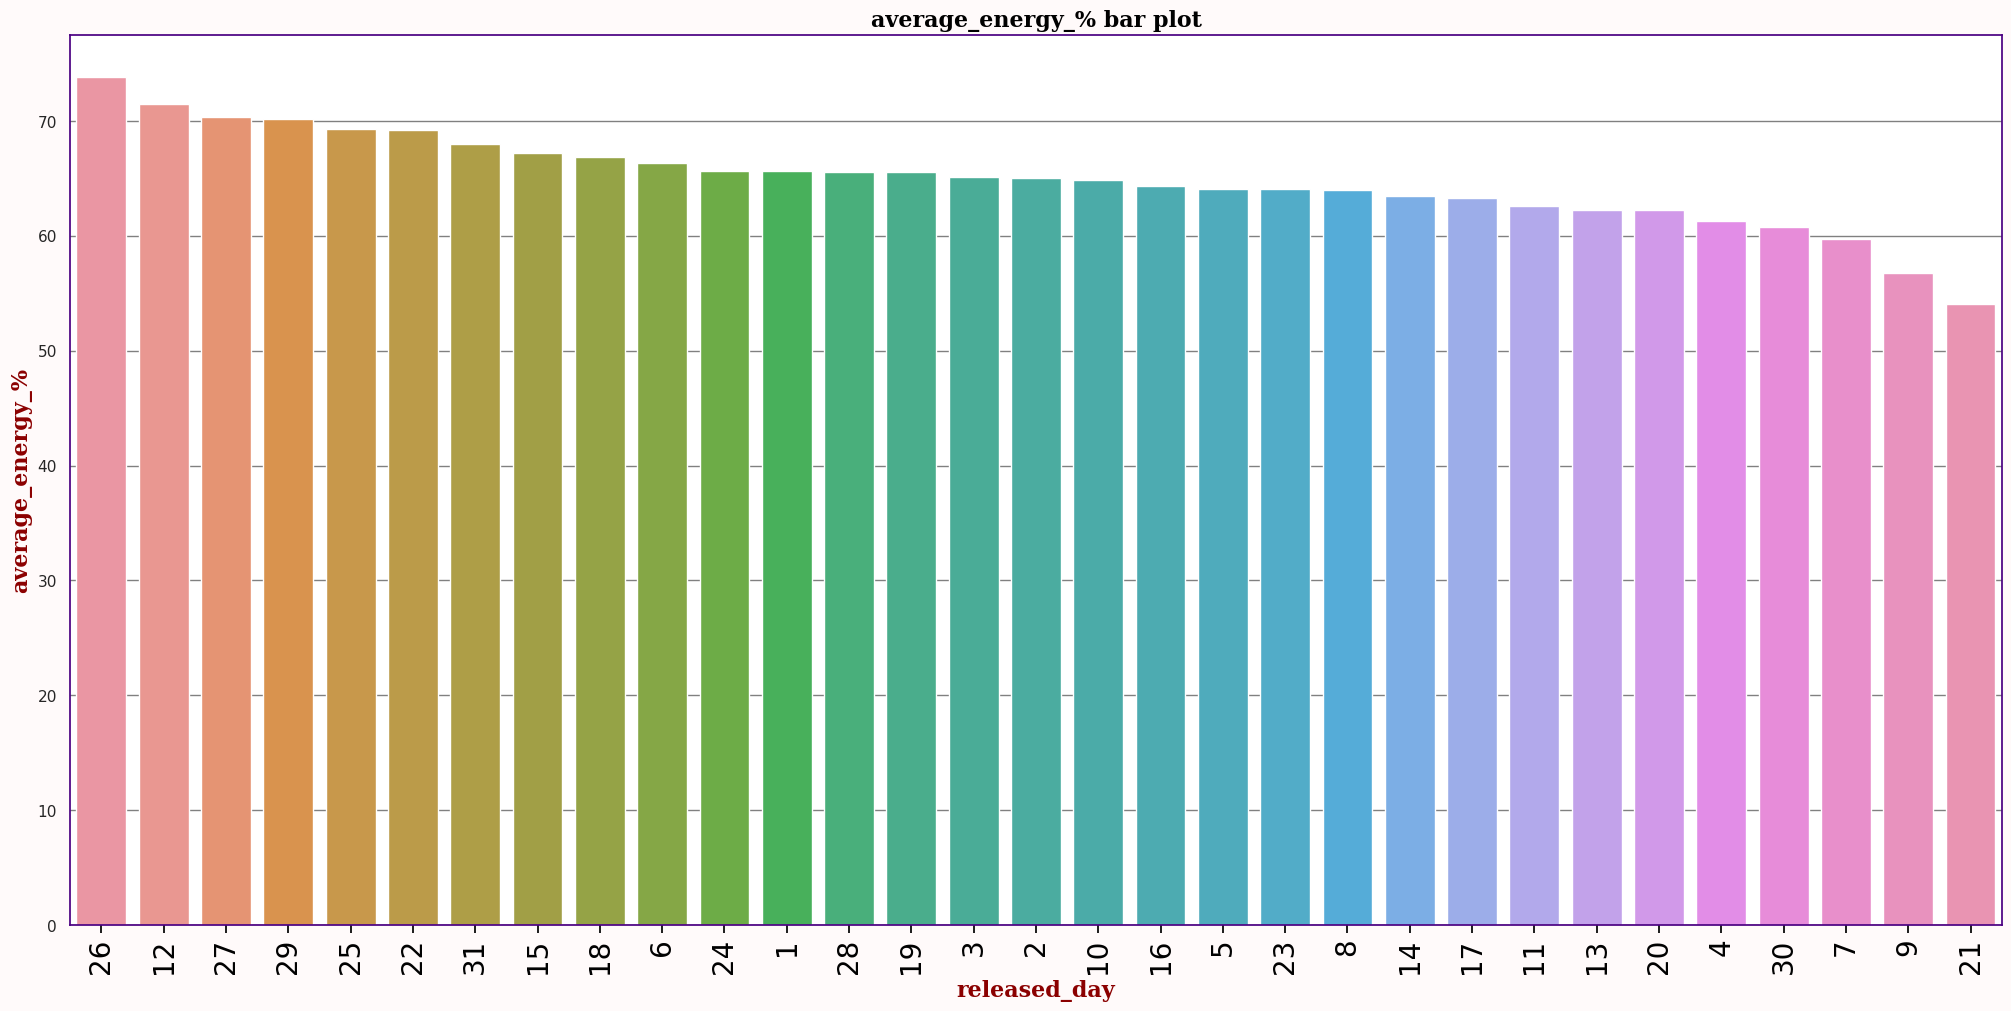

In [580]:
# energy_%
group_data = summary_stats(songs_eda,'released_day','energy_%')
group_data.head()
ordering = group_data.sort_values('total_energy_%',ascending=False).released_day
plotting_bar(group_data,'released_day','total_energy_%',ordering=ordering)
ordering = group_data.sort_values('average_energy_%',ascending=False).released_day
plotting_bar(group_data,'released_day','average_energy_%',ordering=ordering)

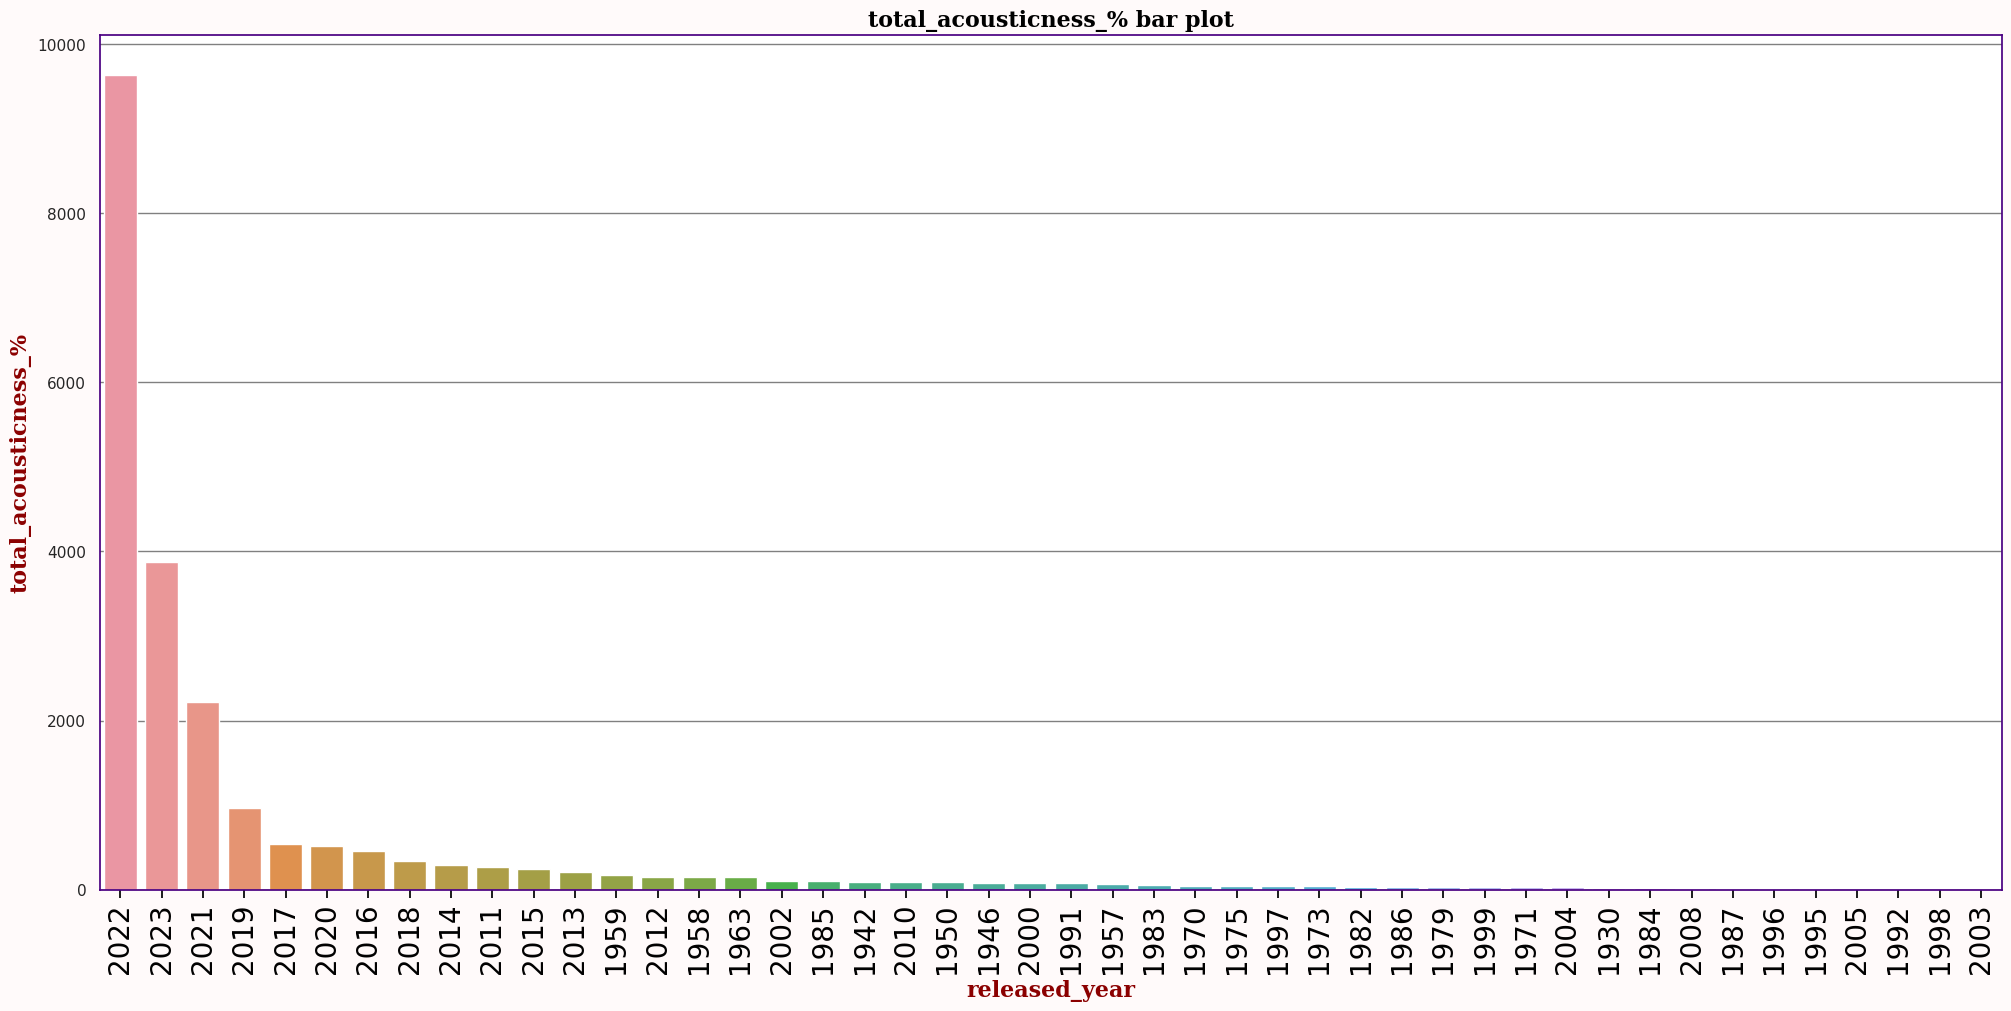

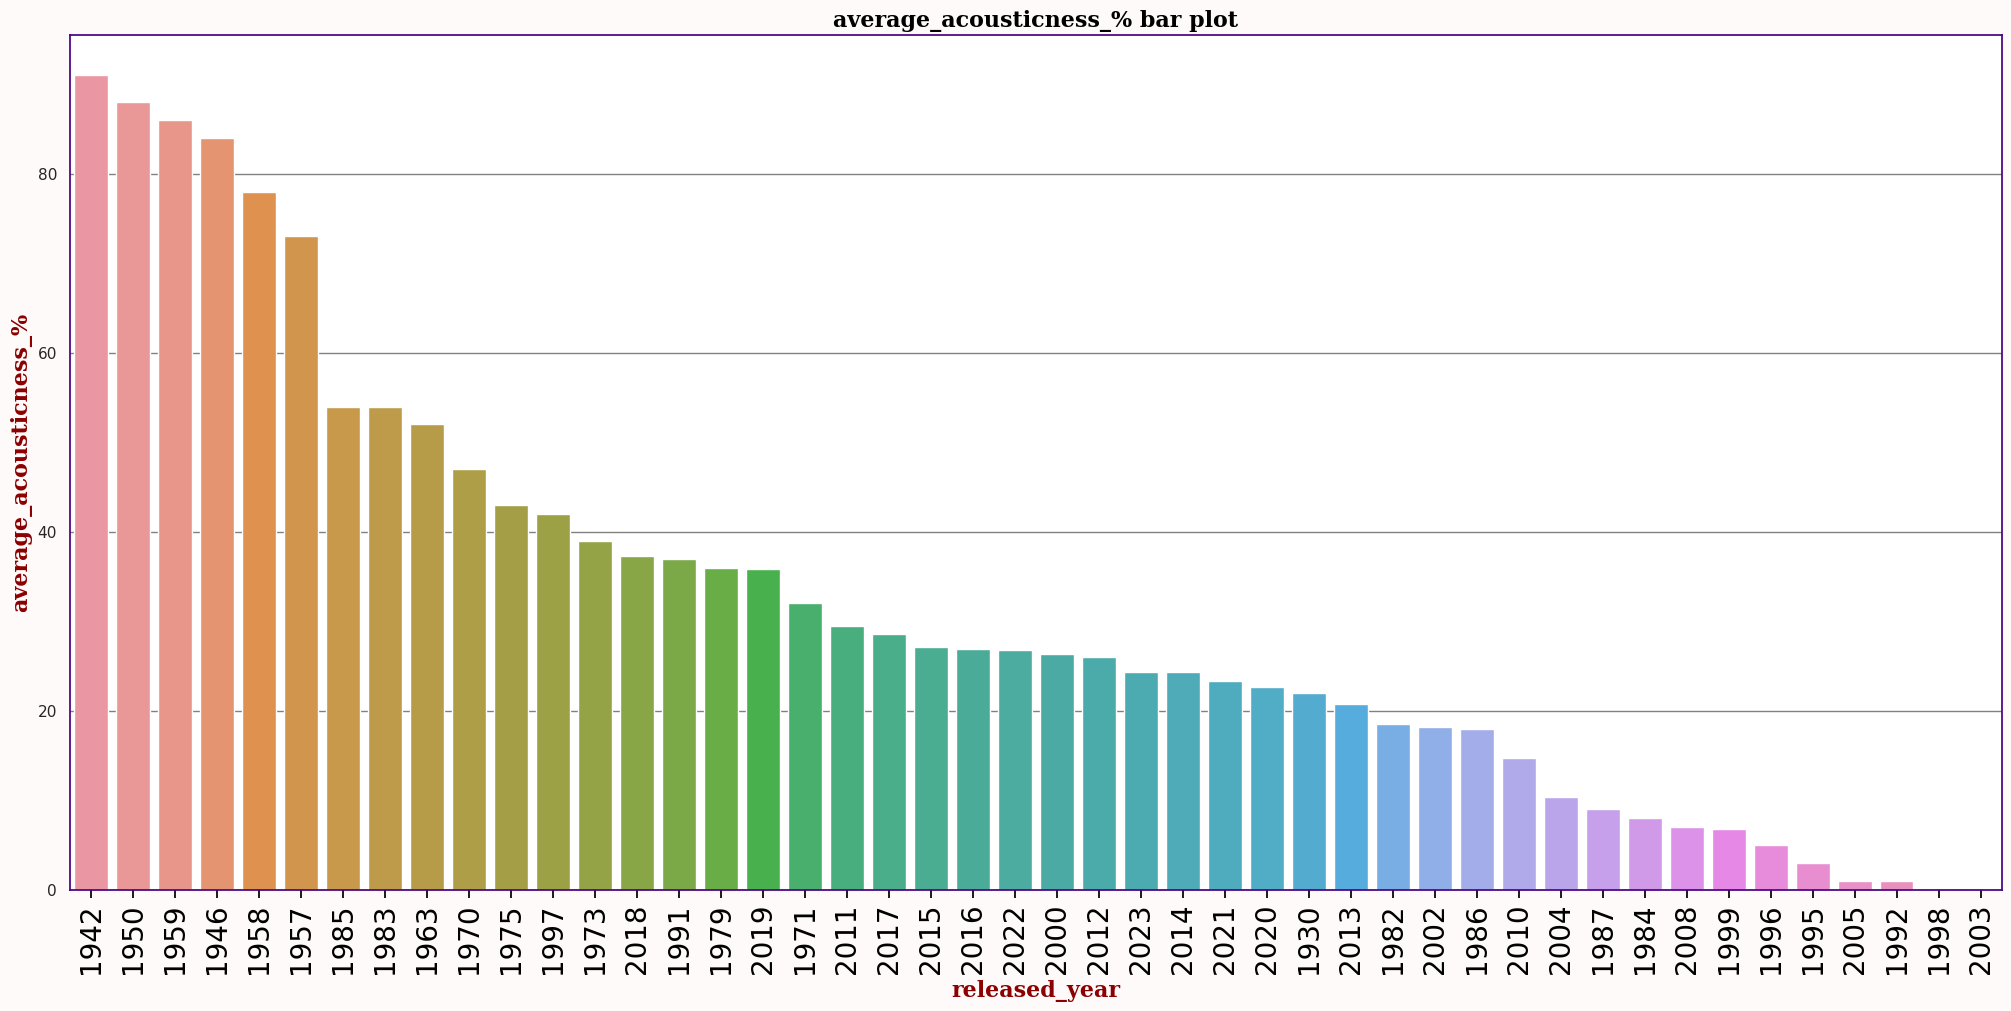

In [581]:
# acousticness_%
group_data = summary_stats(songs_eda,'released_year','acousticness_%')
group_data.head()
ordering = group_data.sort_values('total_acousticness_%',ascending=False).released_year
plotting_bar(group_data,'released_year','total_acousticness_%',ordering=ordering)
ordering = group_data.sort_values('average_acousticness_%',ascending=False).released_year
plotting_bar(group_data,'released_year','average_acousticness_%',ordering=ordering)

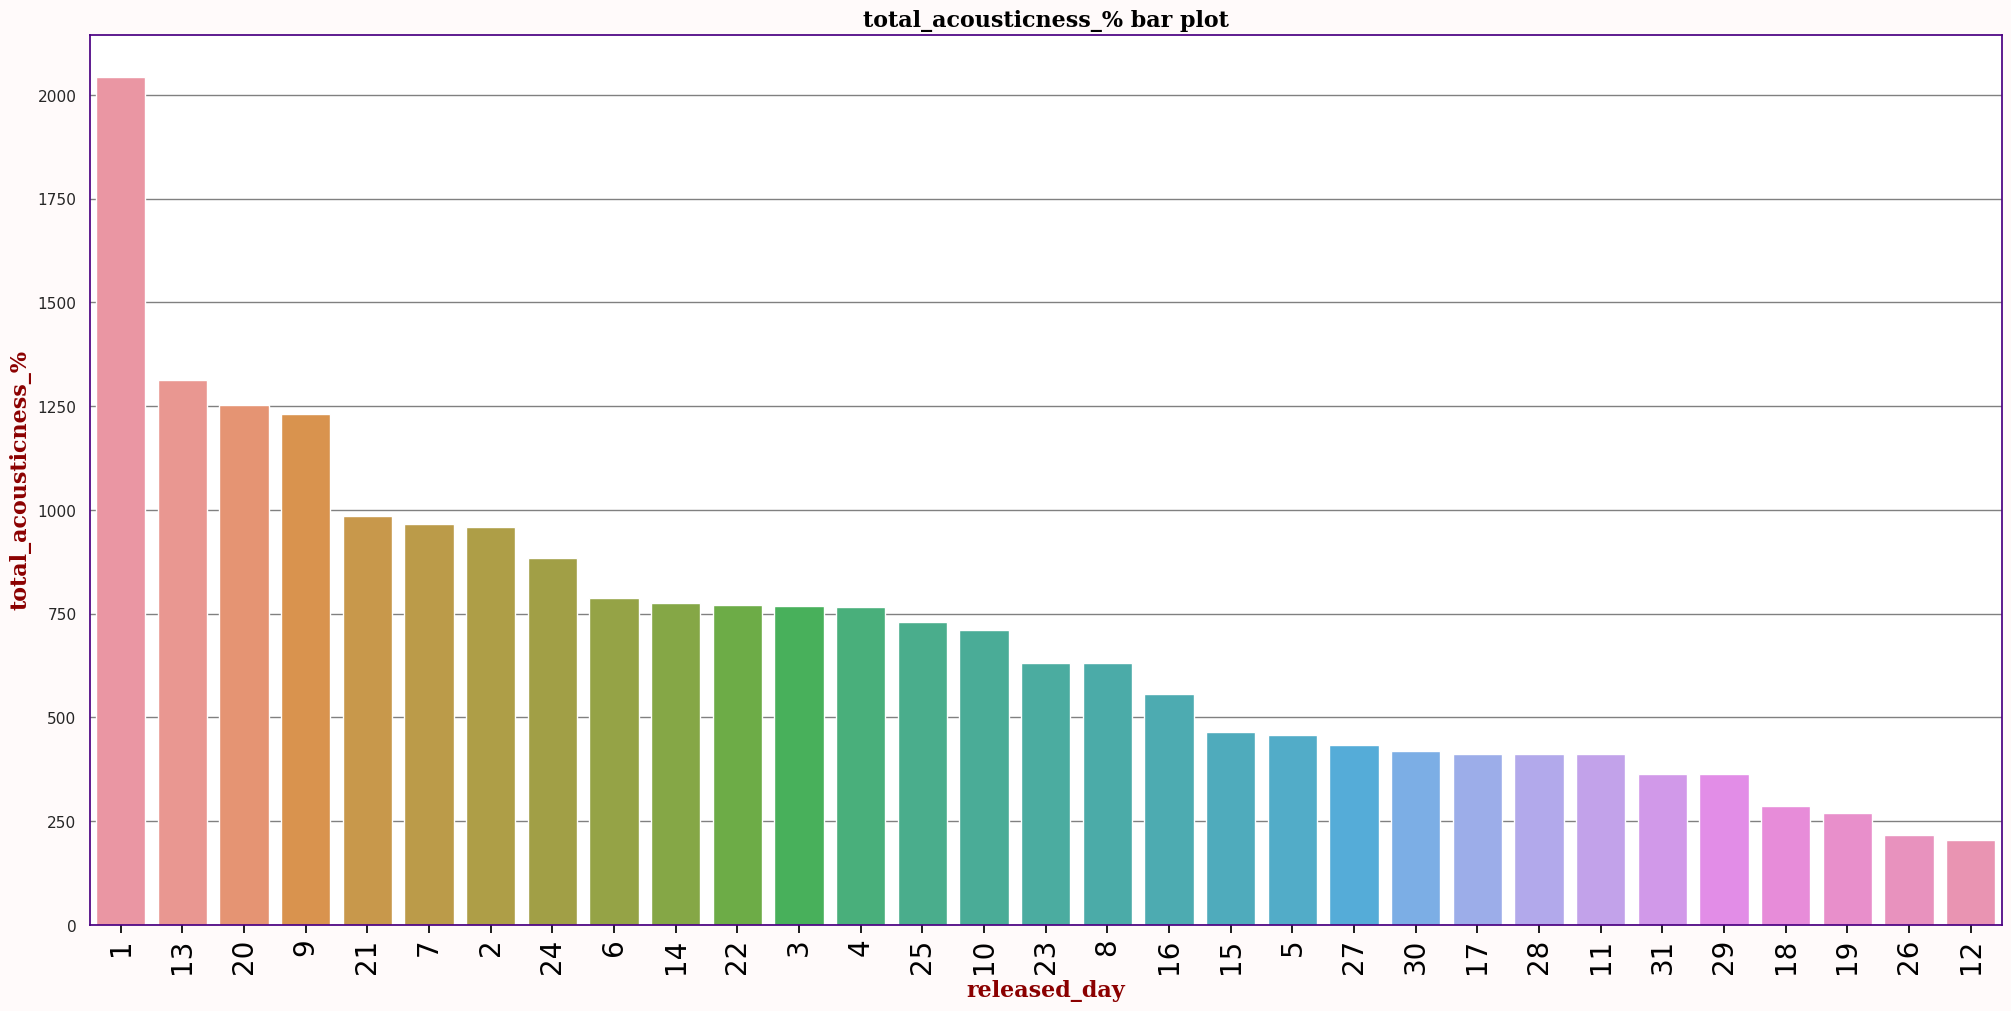

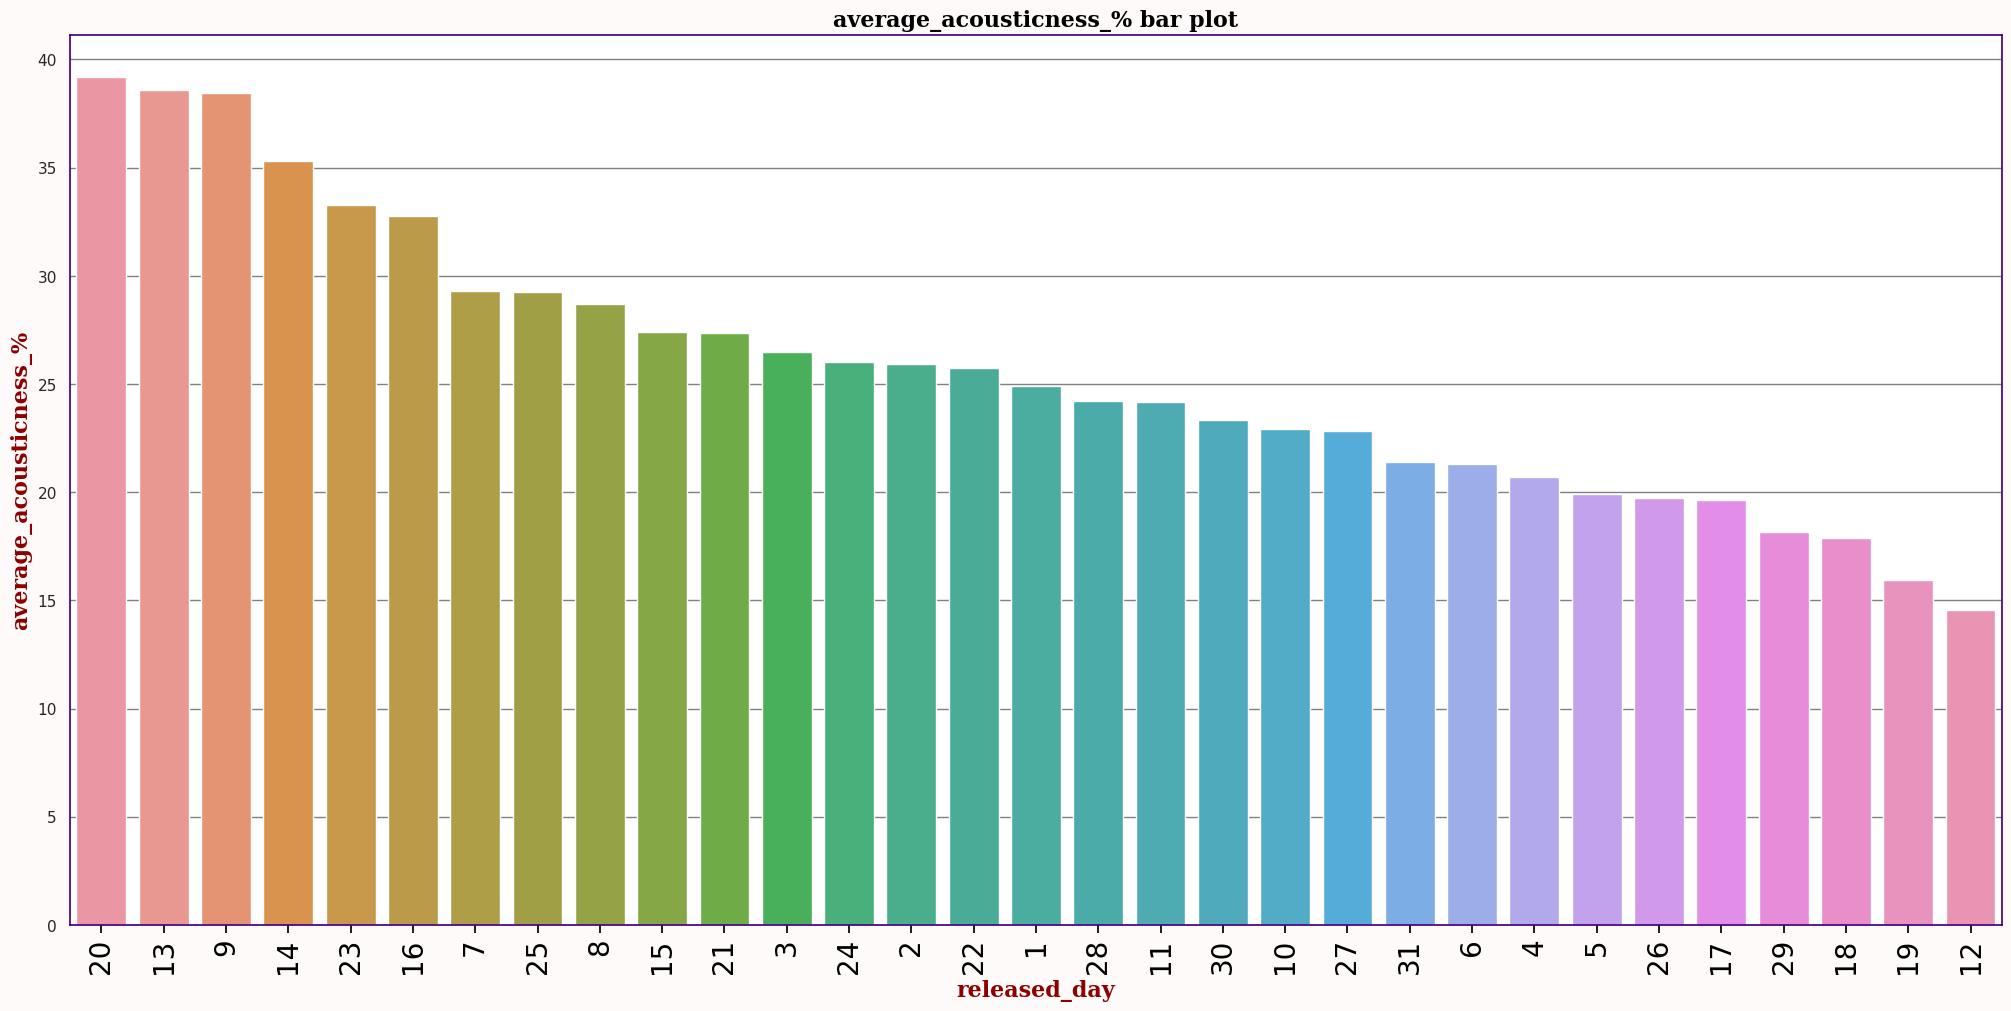

In [582]:
# acousticness_%
group_data = summary_stats(songs_eda,'released_day','acousticness_%')
group_data.head()
ordering = group_data.sort_values('total_acousticness_%',ascending=False).released_day
plotting_bar(group_data,'released_day','total_acousticness_%',ordering=ordering)
ordering = group_data.sort_values('average_acousticness_%',ascending=False).released_day
plotting_bar(group_data,'released_day','average_acousticness_%',ordering=ordering)

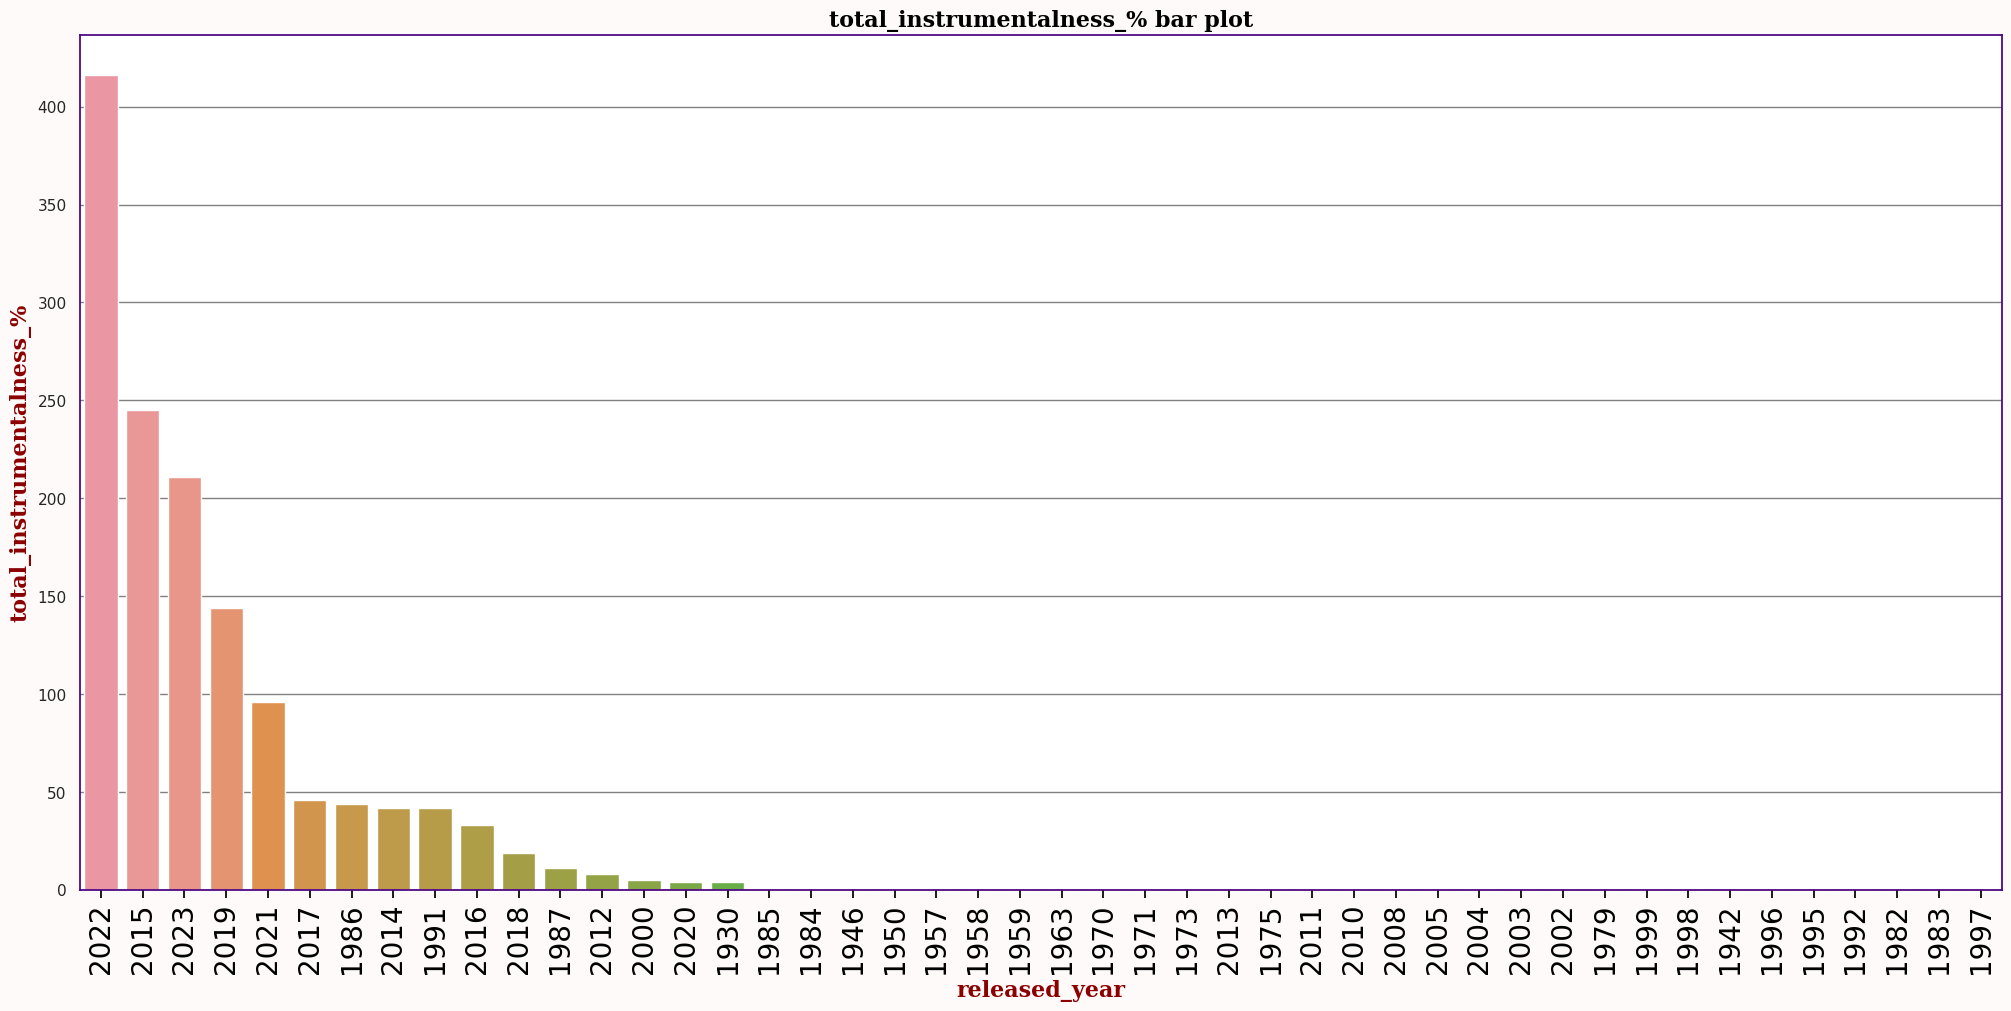

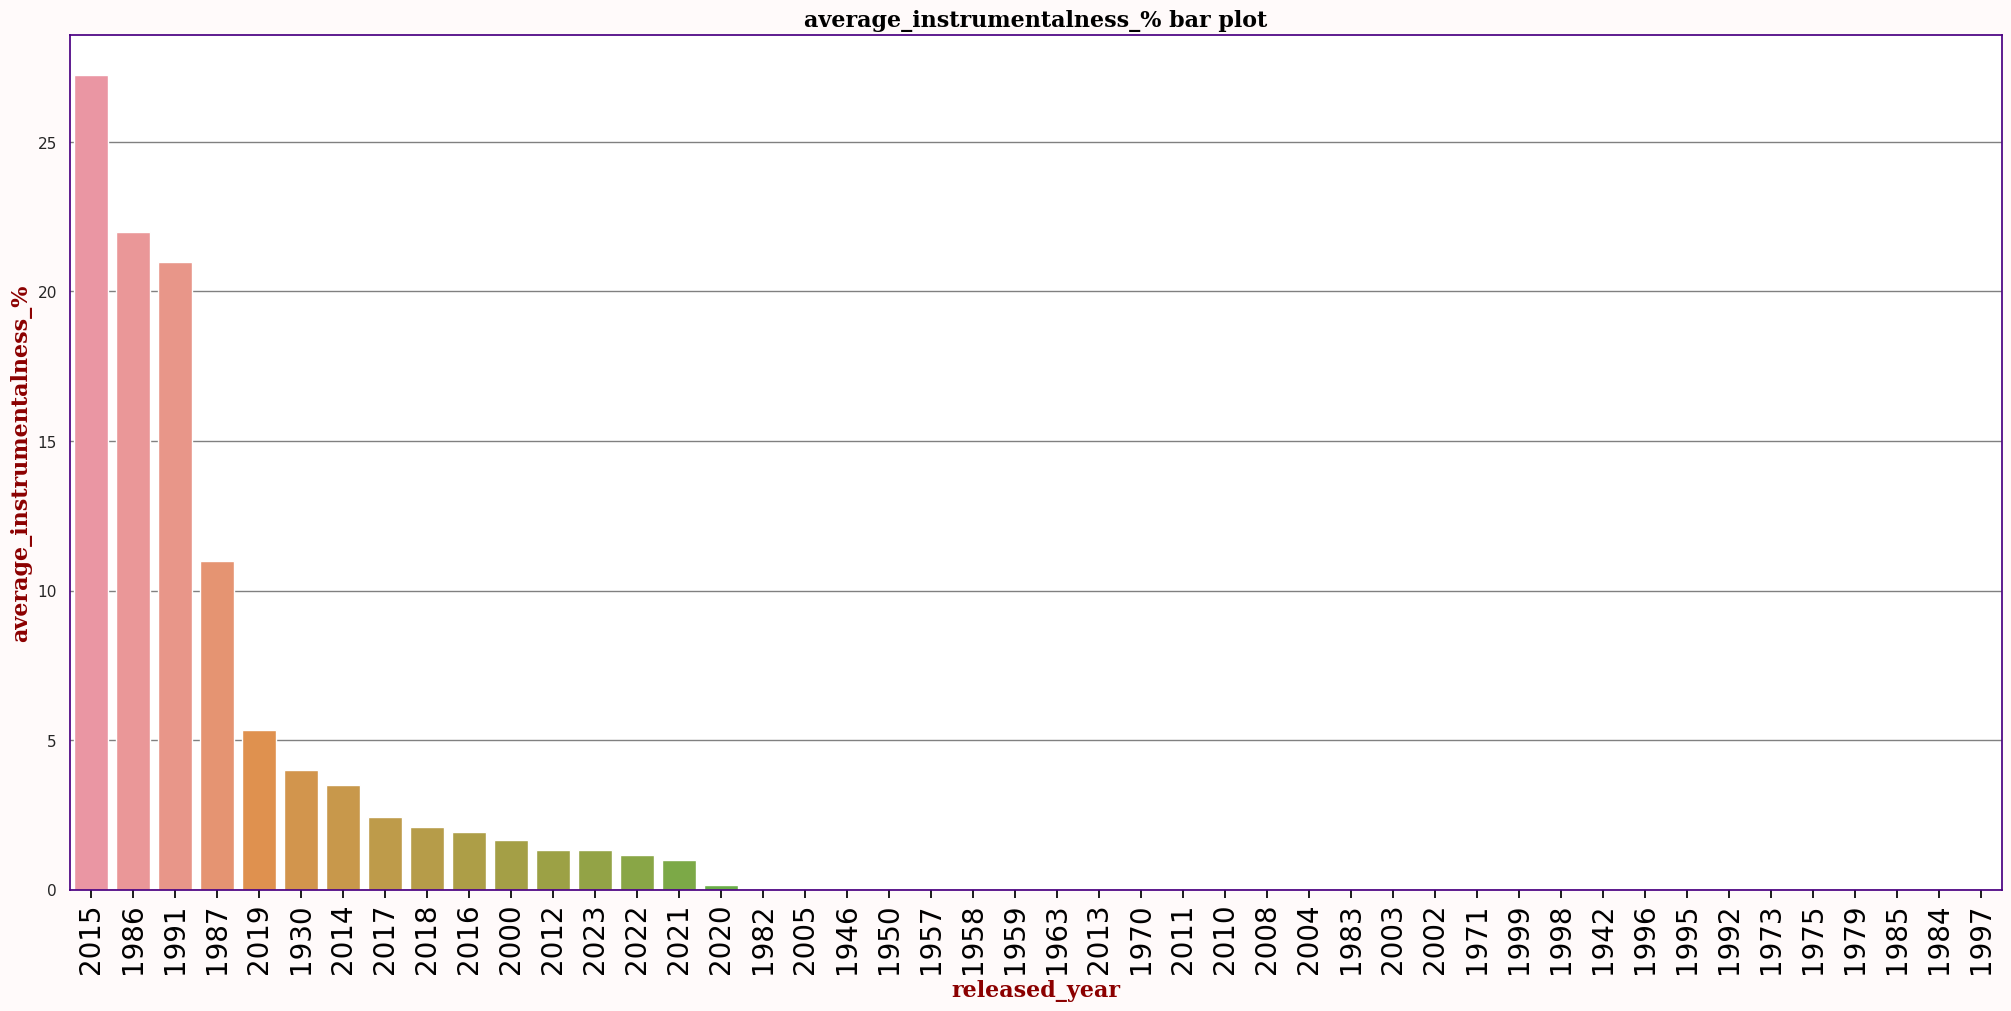

In [583]:
# instrumentalness_%
group_data = summary_stats(songs_eda,'released_year','instrumentalness_%')
group_data.head()
ordering = group_data.sort_values('total_instrumentalness_%',ascending=False).released_year
plotting_bar(group_data,'released_year','total_instrumentalness_%',ordering=ordering)
ordering = group_data.sort_values('average_instrumentalness_%',ascending=False).released_year
plotting_bar(group_data,'released_year','average_instrumentalness_%',ordering=ordering)

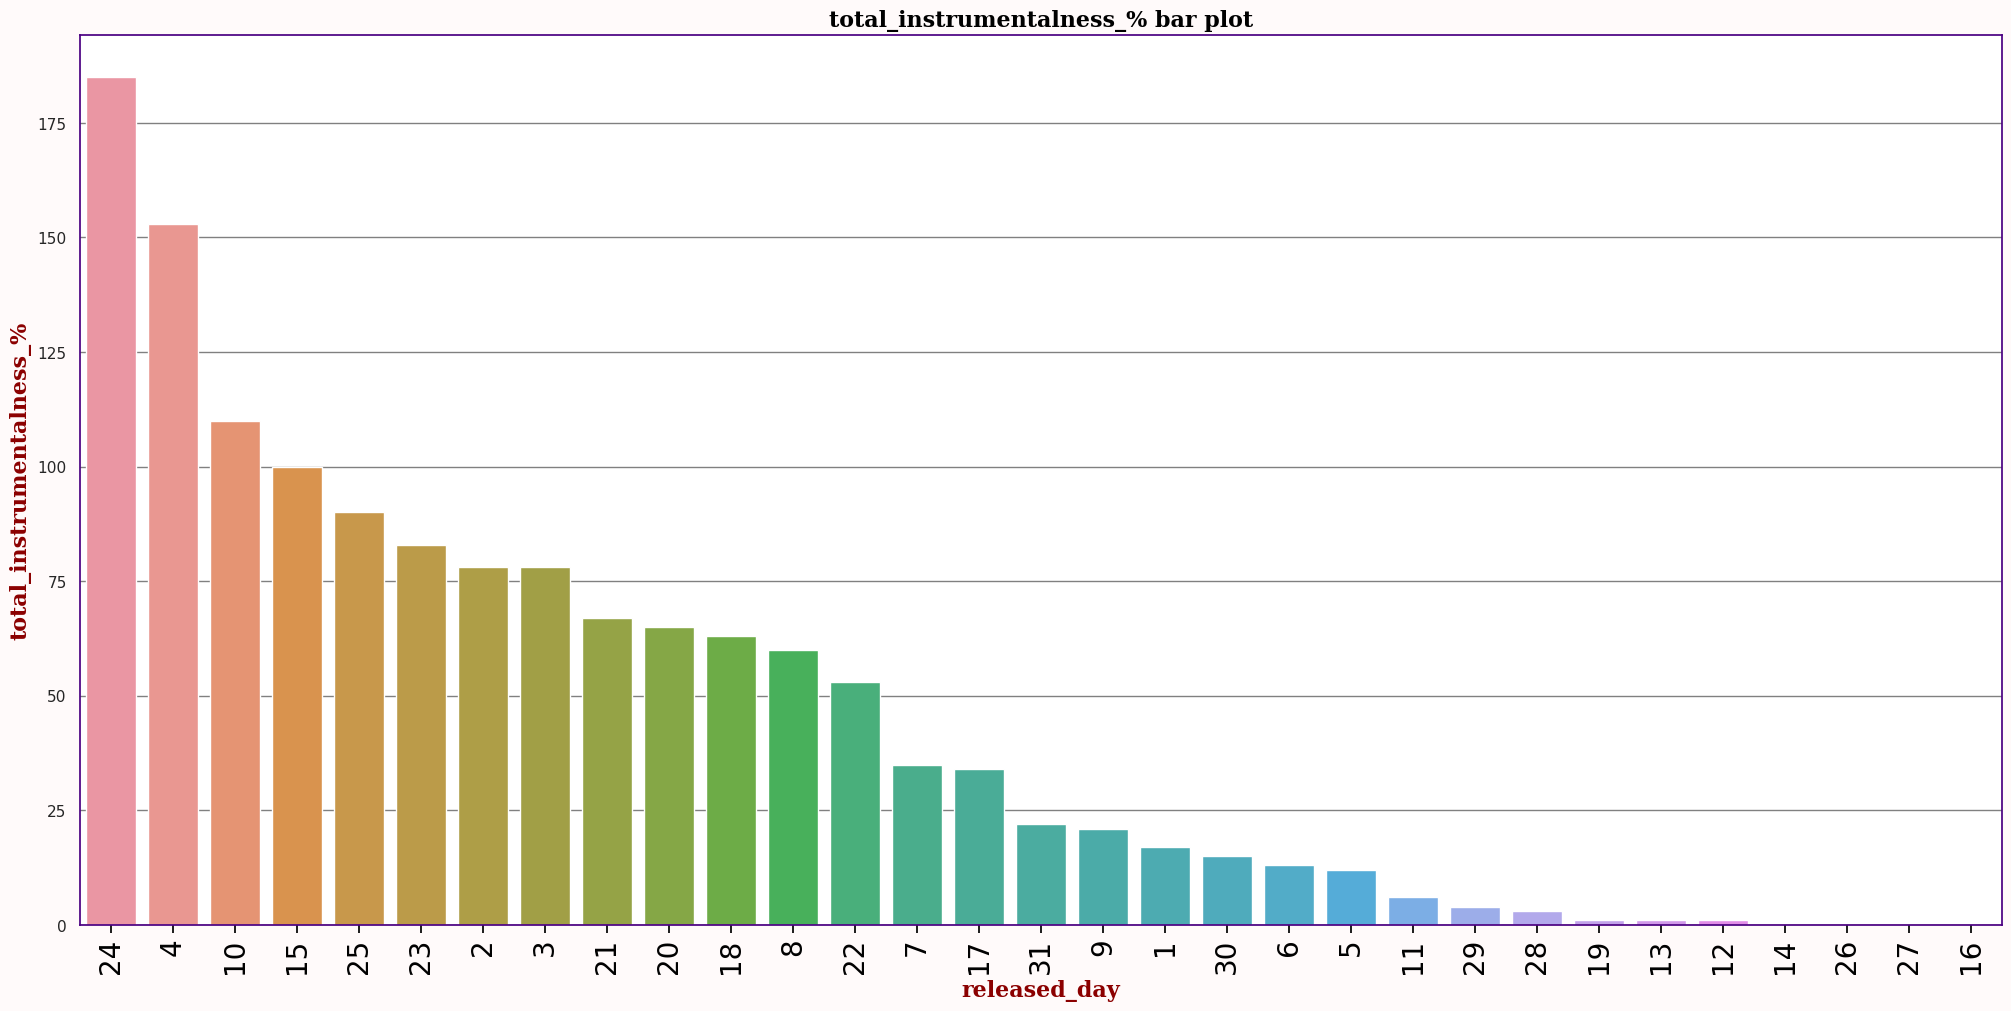

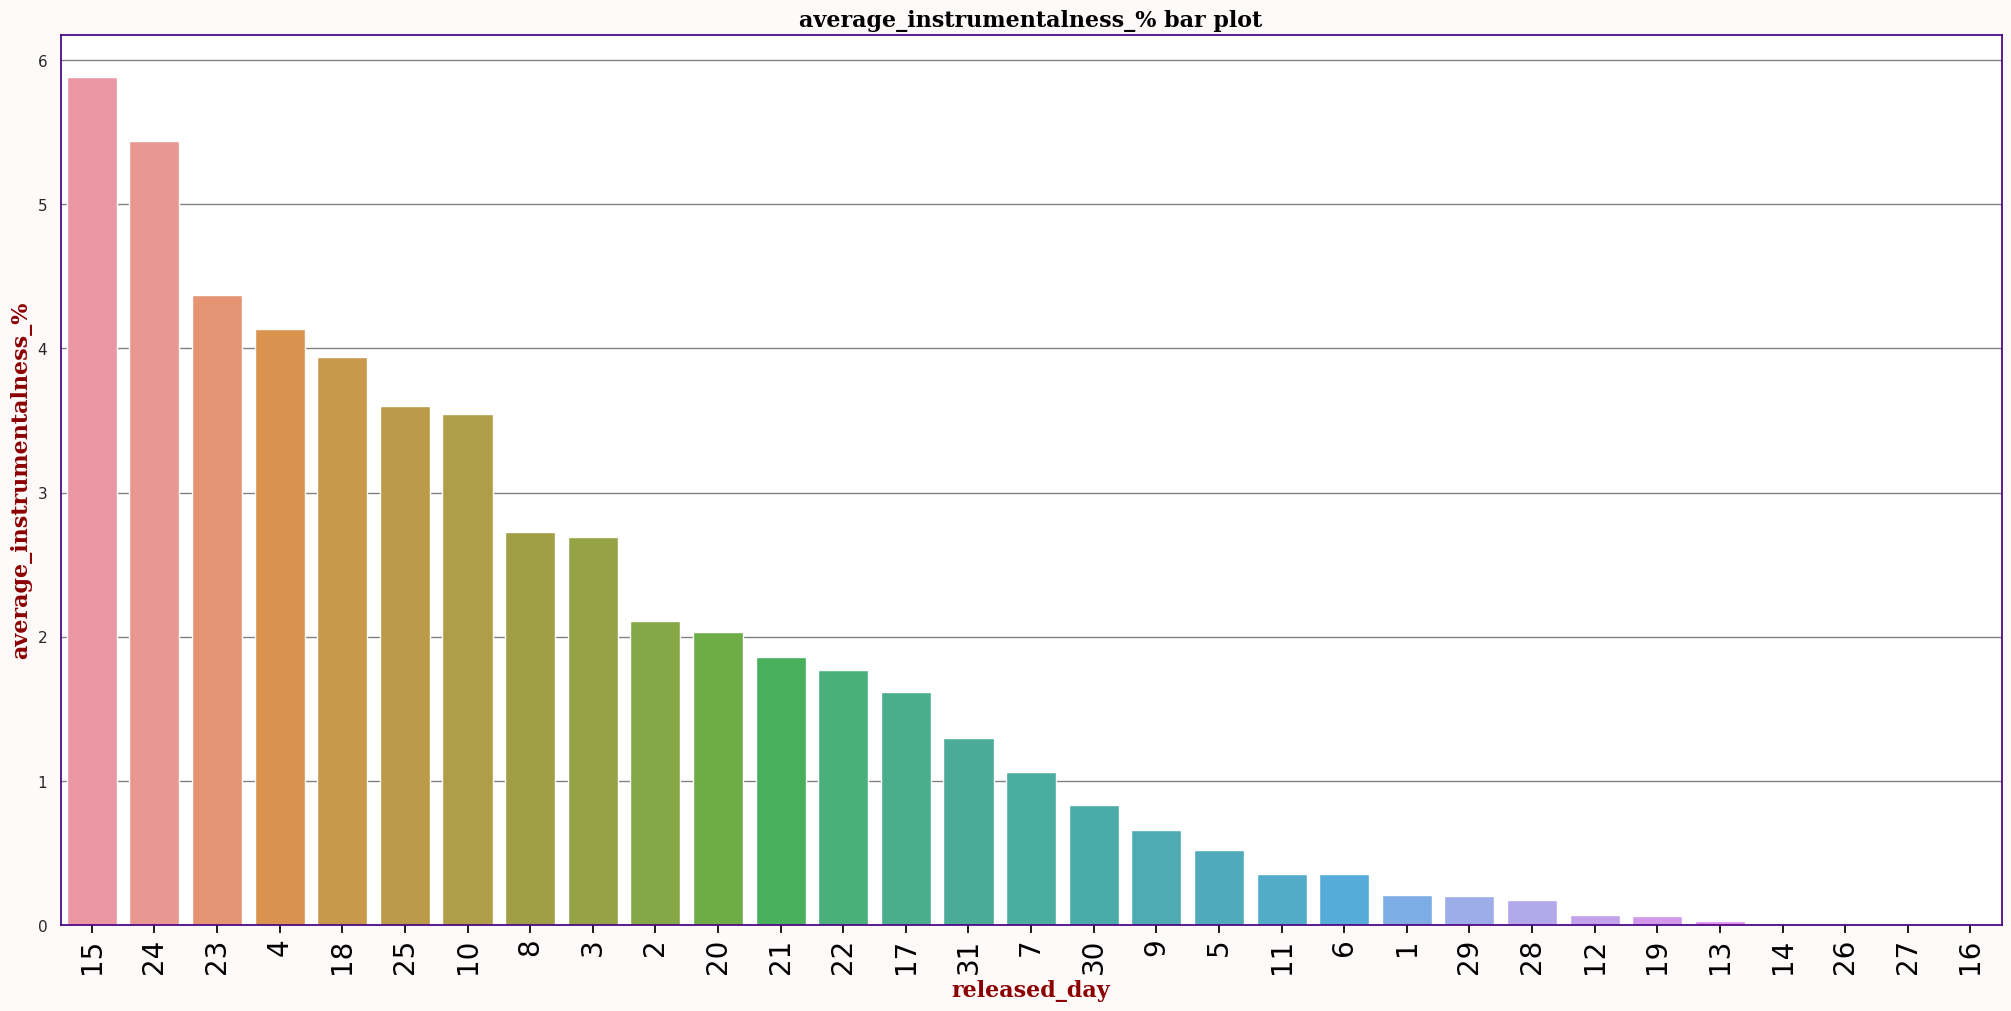

In [584]:
# instrumentalness_%
group_data = summary_stats(songs_eda,'released_day','instrumentalness_%')
group_data.head()
ordering = group_data.sort_values('total_instrumentalness_%',ascending=False).released_day
plotting_bar(group_data,'released_day','total_instrumentalness_%',ordering=ordering)
ordering = group_data.sort_values('average_instrumentalness_%',ascending=False).released_day
plotting_bar(group_data,'released_day','average_instrumentalness_%',ordering=ordering)

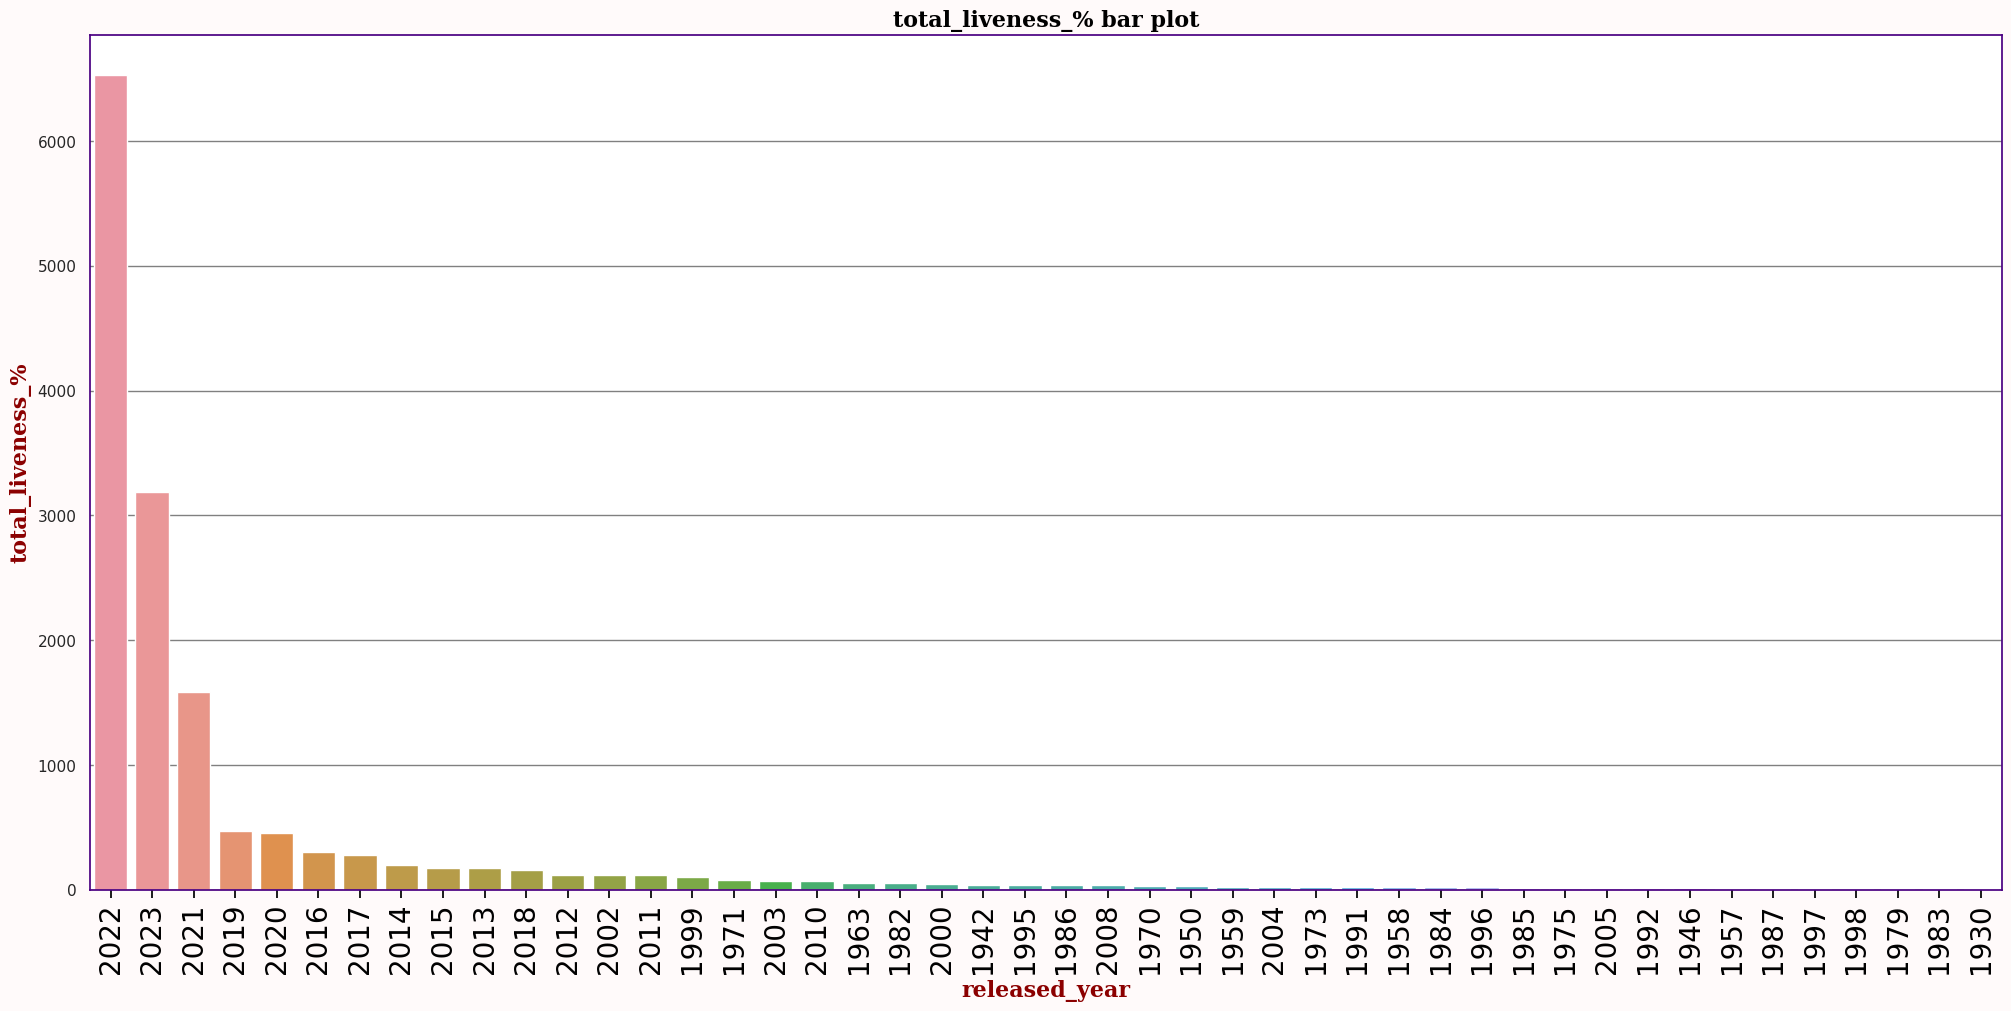

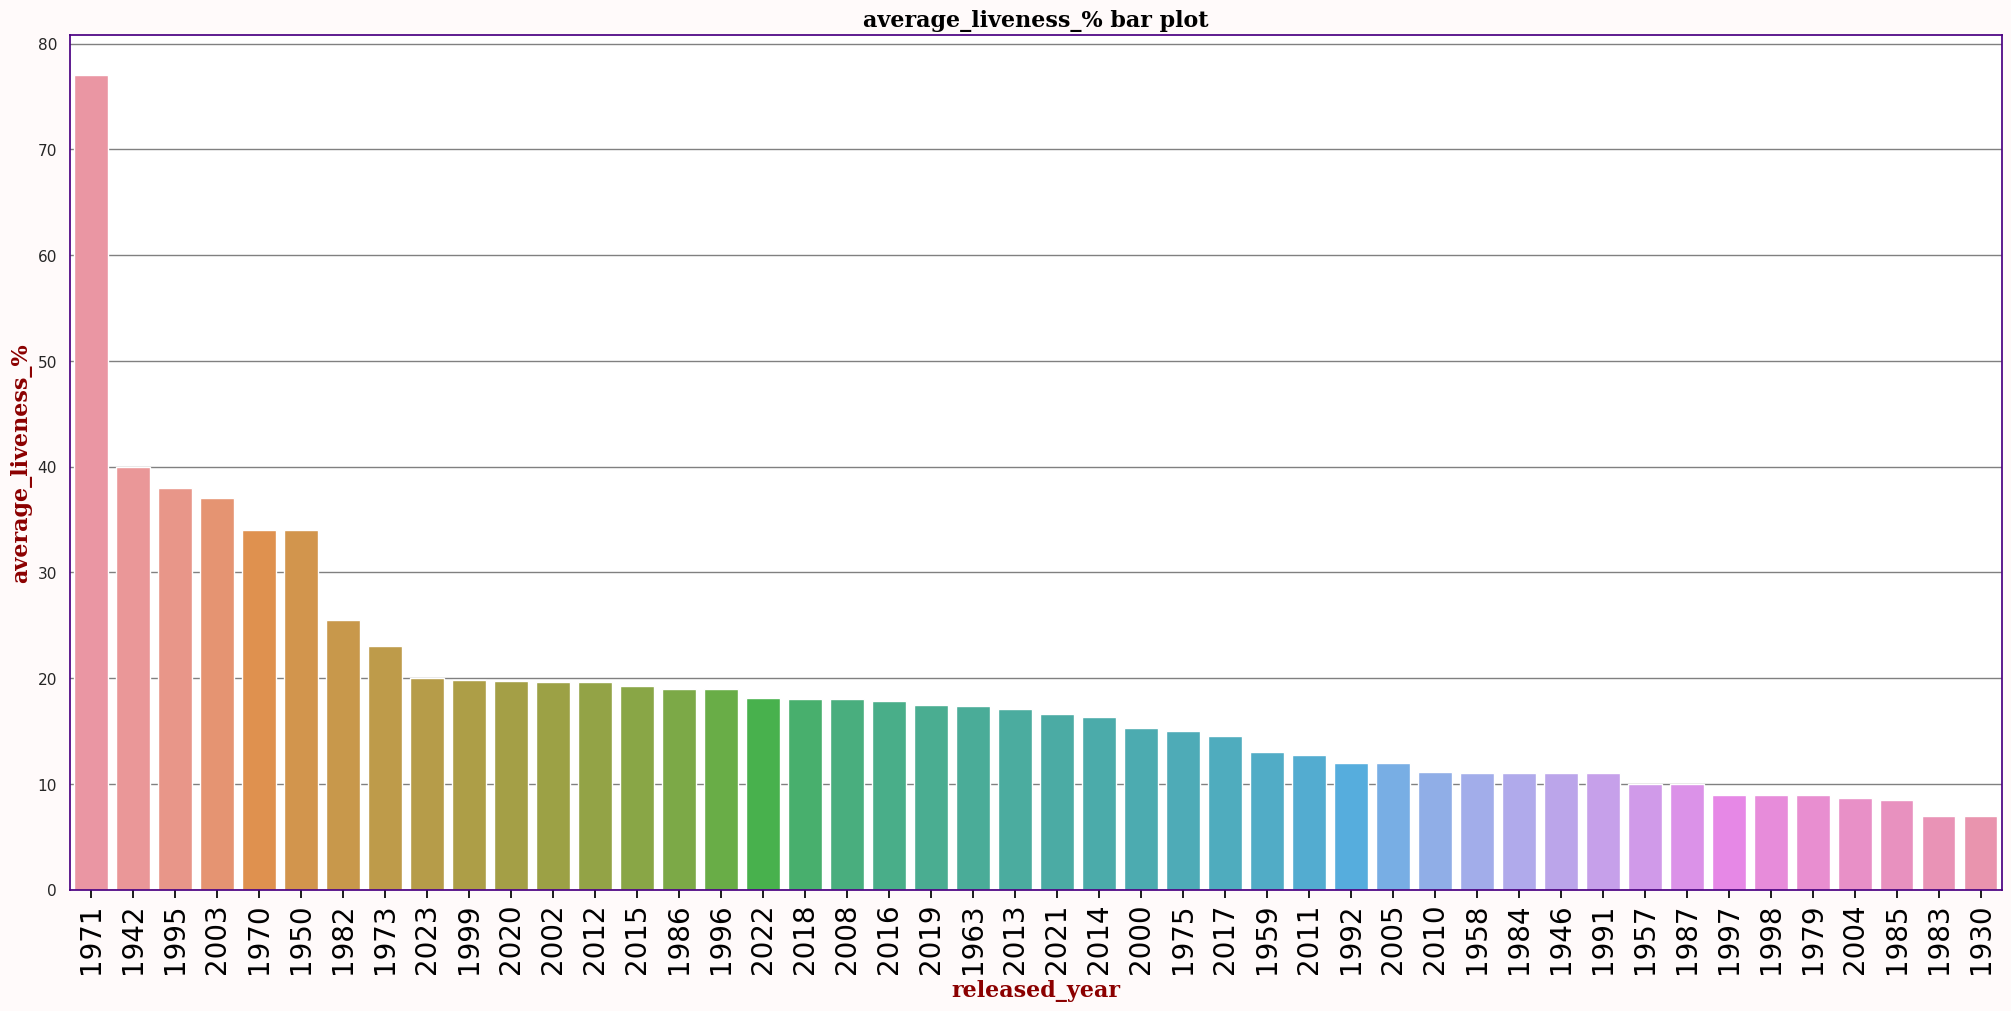

In [585]:
# liveness_%
group_data = summary_stats(songs_eda,'released_year','liveness_%')
group_data.head()
ordering = group_data.sort_values('total_liveness_%',ascending=False).released_year
plotting_bar(group_data,'released_year','total_liveness_%',ordering=ordering)
ordering = group_data.sort_values('average_liveness_%',ascending=False).released_year
plotting_bar(group_data,'released_year','average_liveness_%',ordering=ordering)

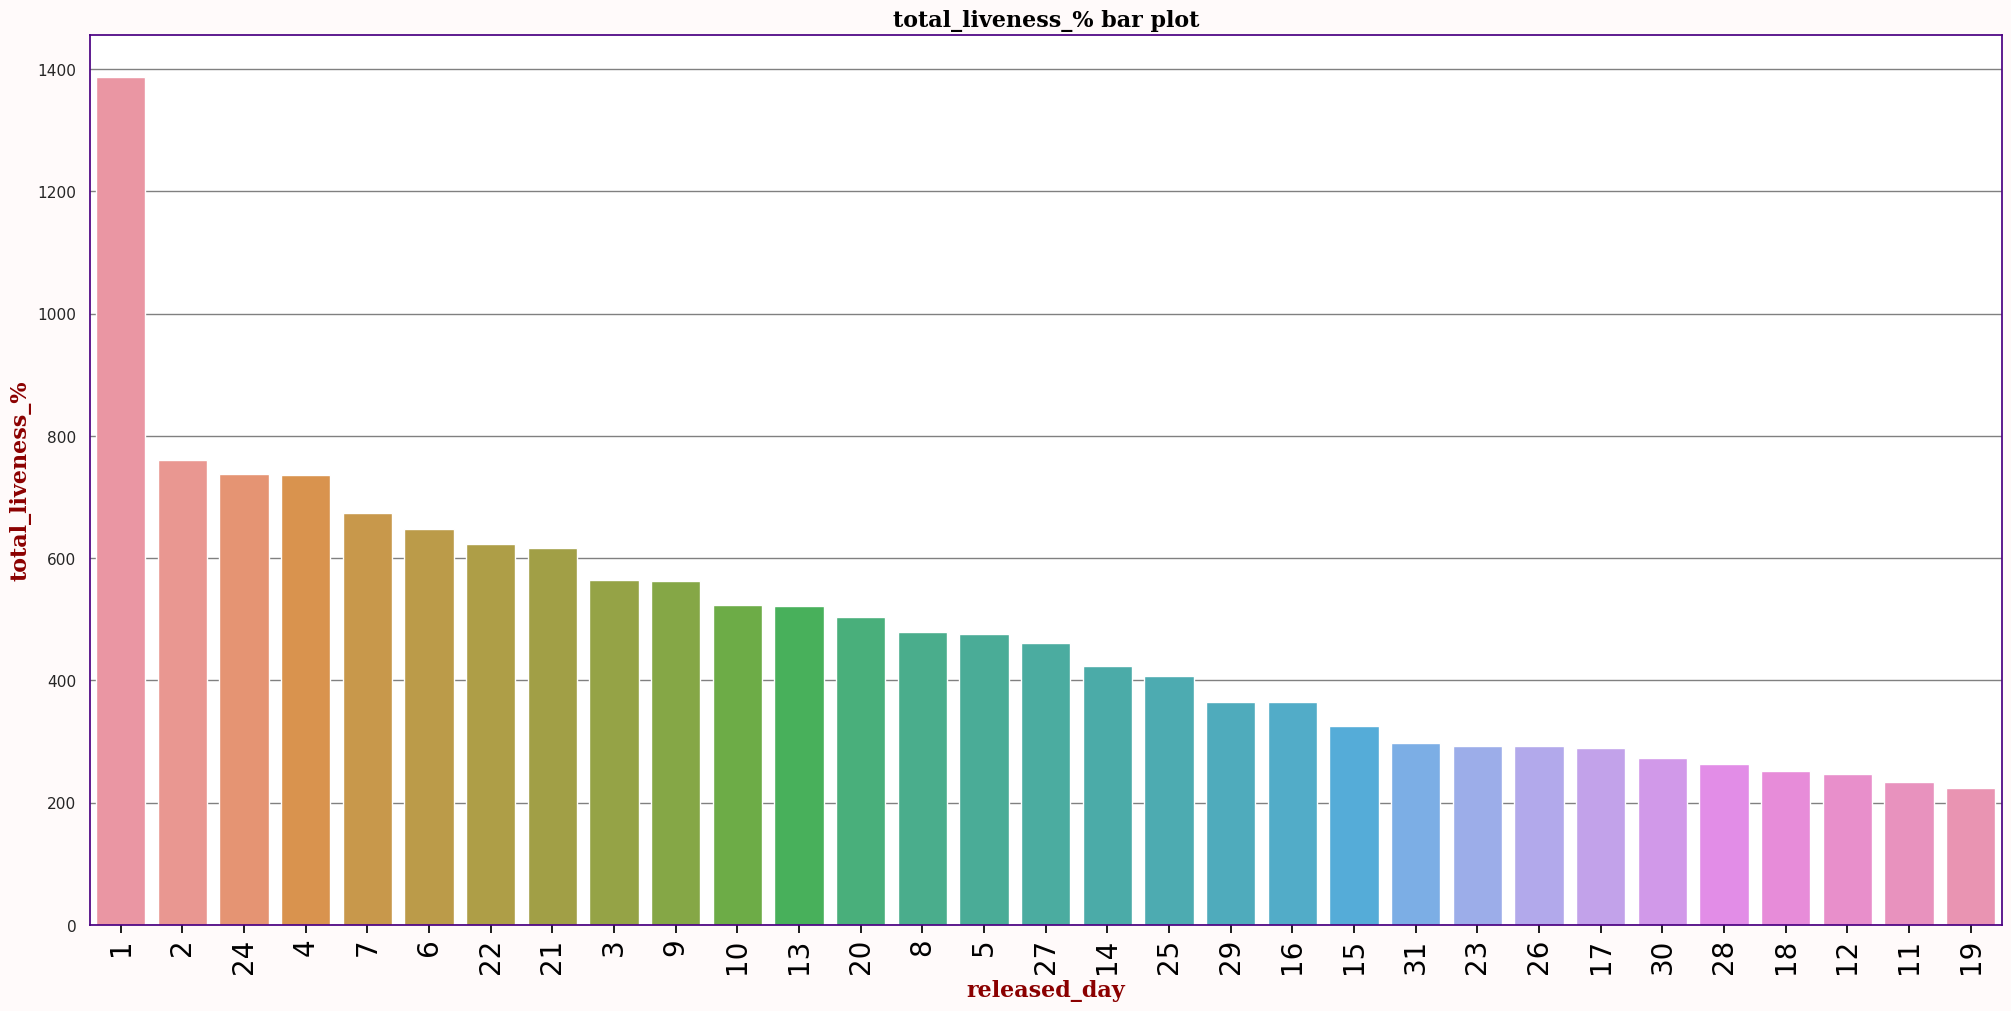

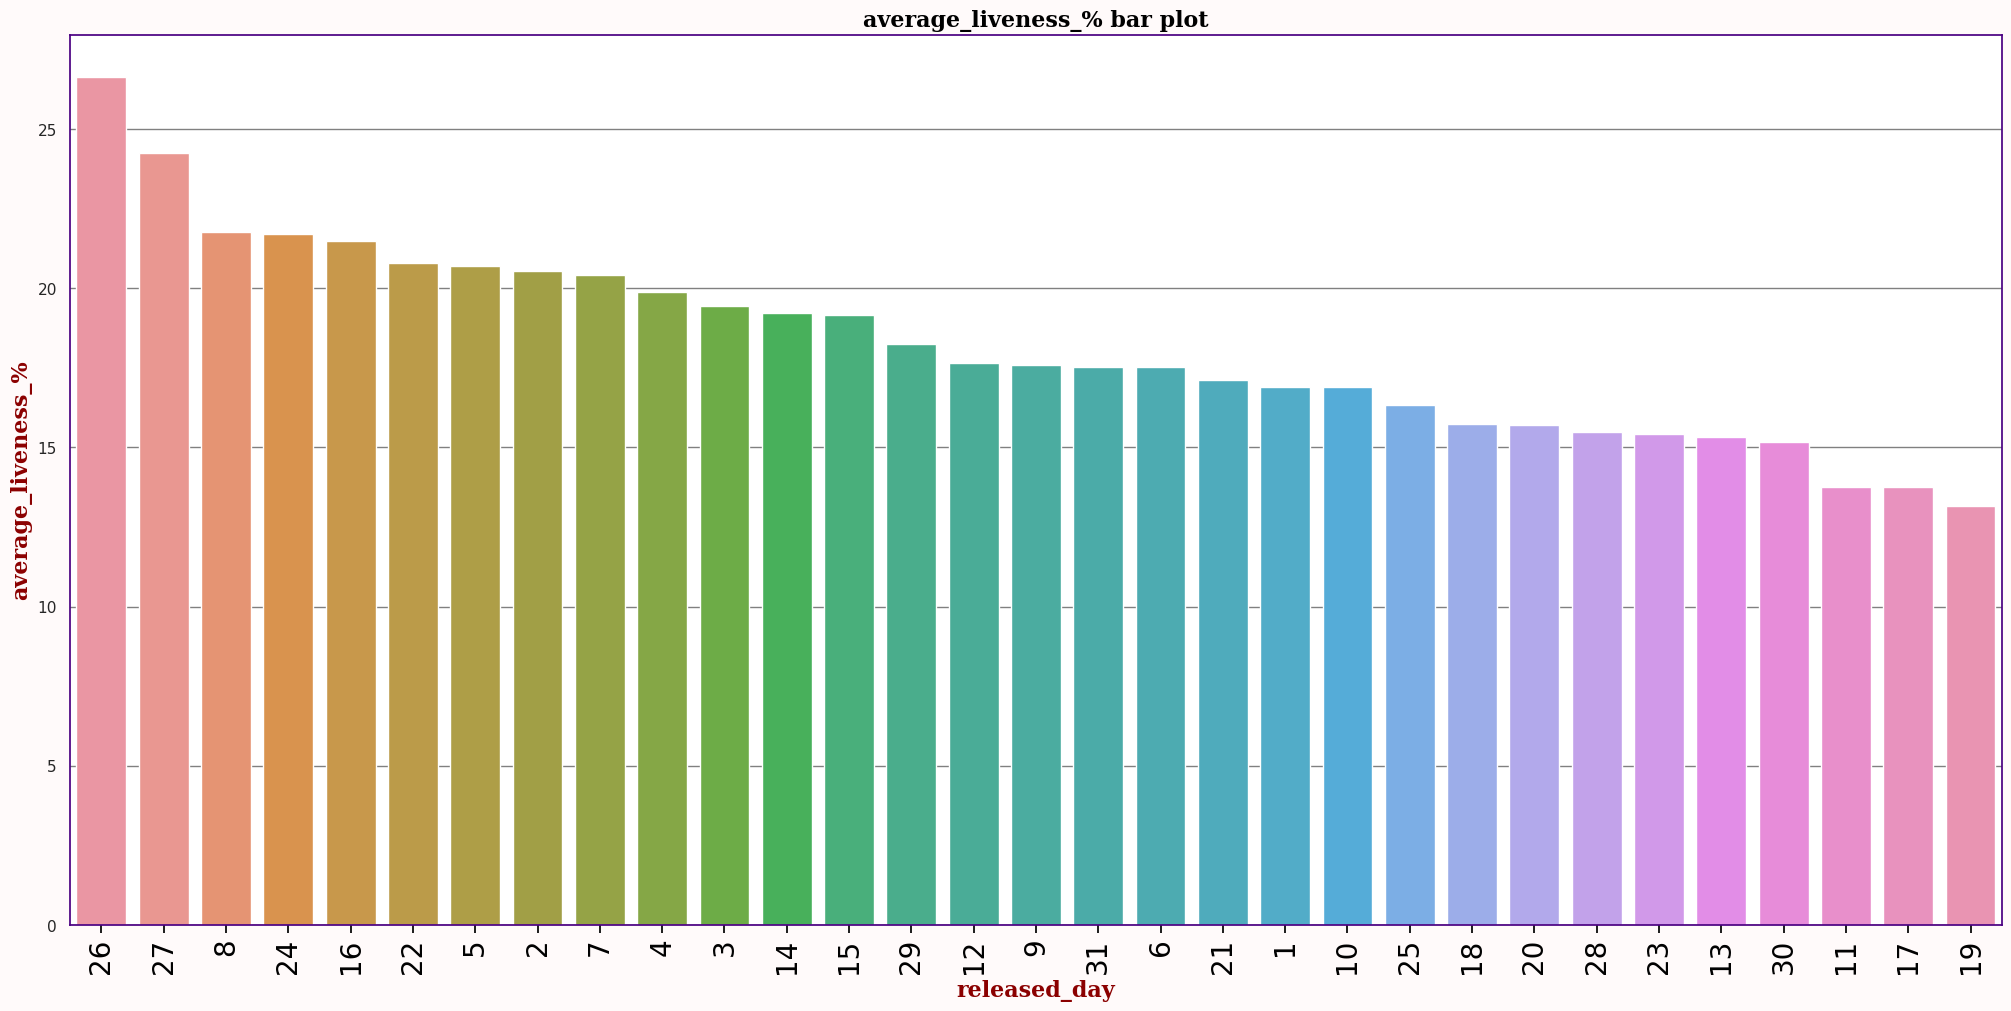

In [586]:
# liveness_%
group_data = summary_stats(songs_eda,'released_day','liveness_%')
group_data.head()
ordering = group_data.sort_values('total_liveness_%',ascending=False).released_day
plotting_bar(group_data,'released_day','total_liveness_%',ordering=ordering)
ordering = group_data.sort_values('average_liveness_%',ascending=False).released_day
plotting_bar(group_data,'released_day','average_liveness_%',ordering=ordering)

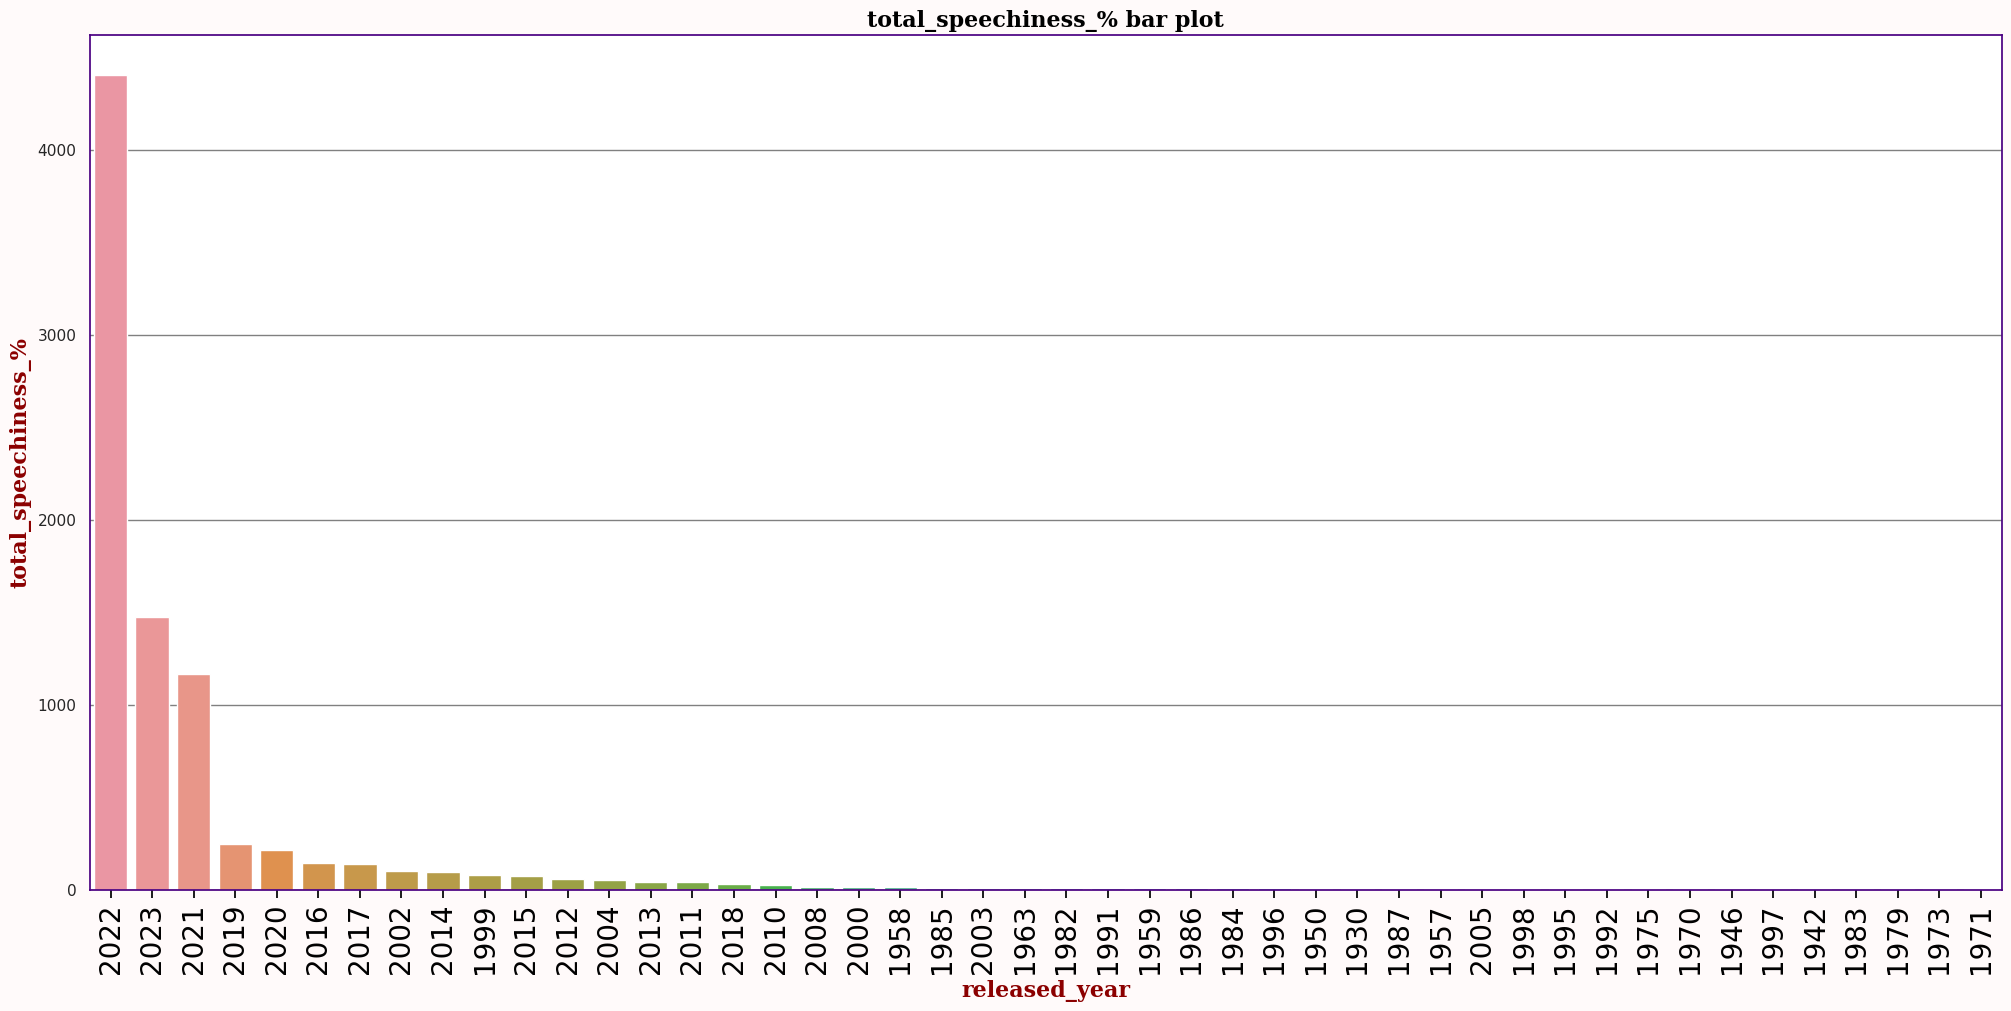

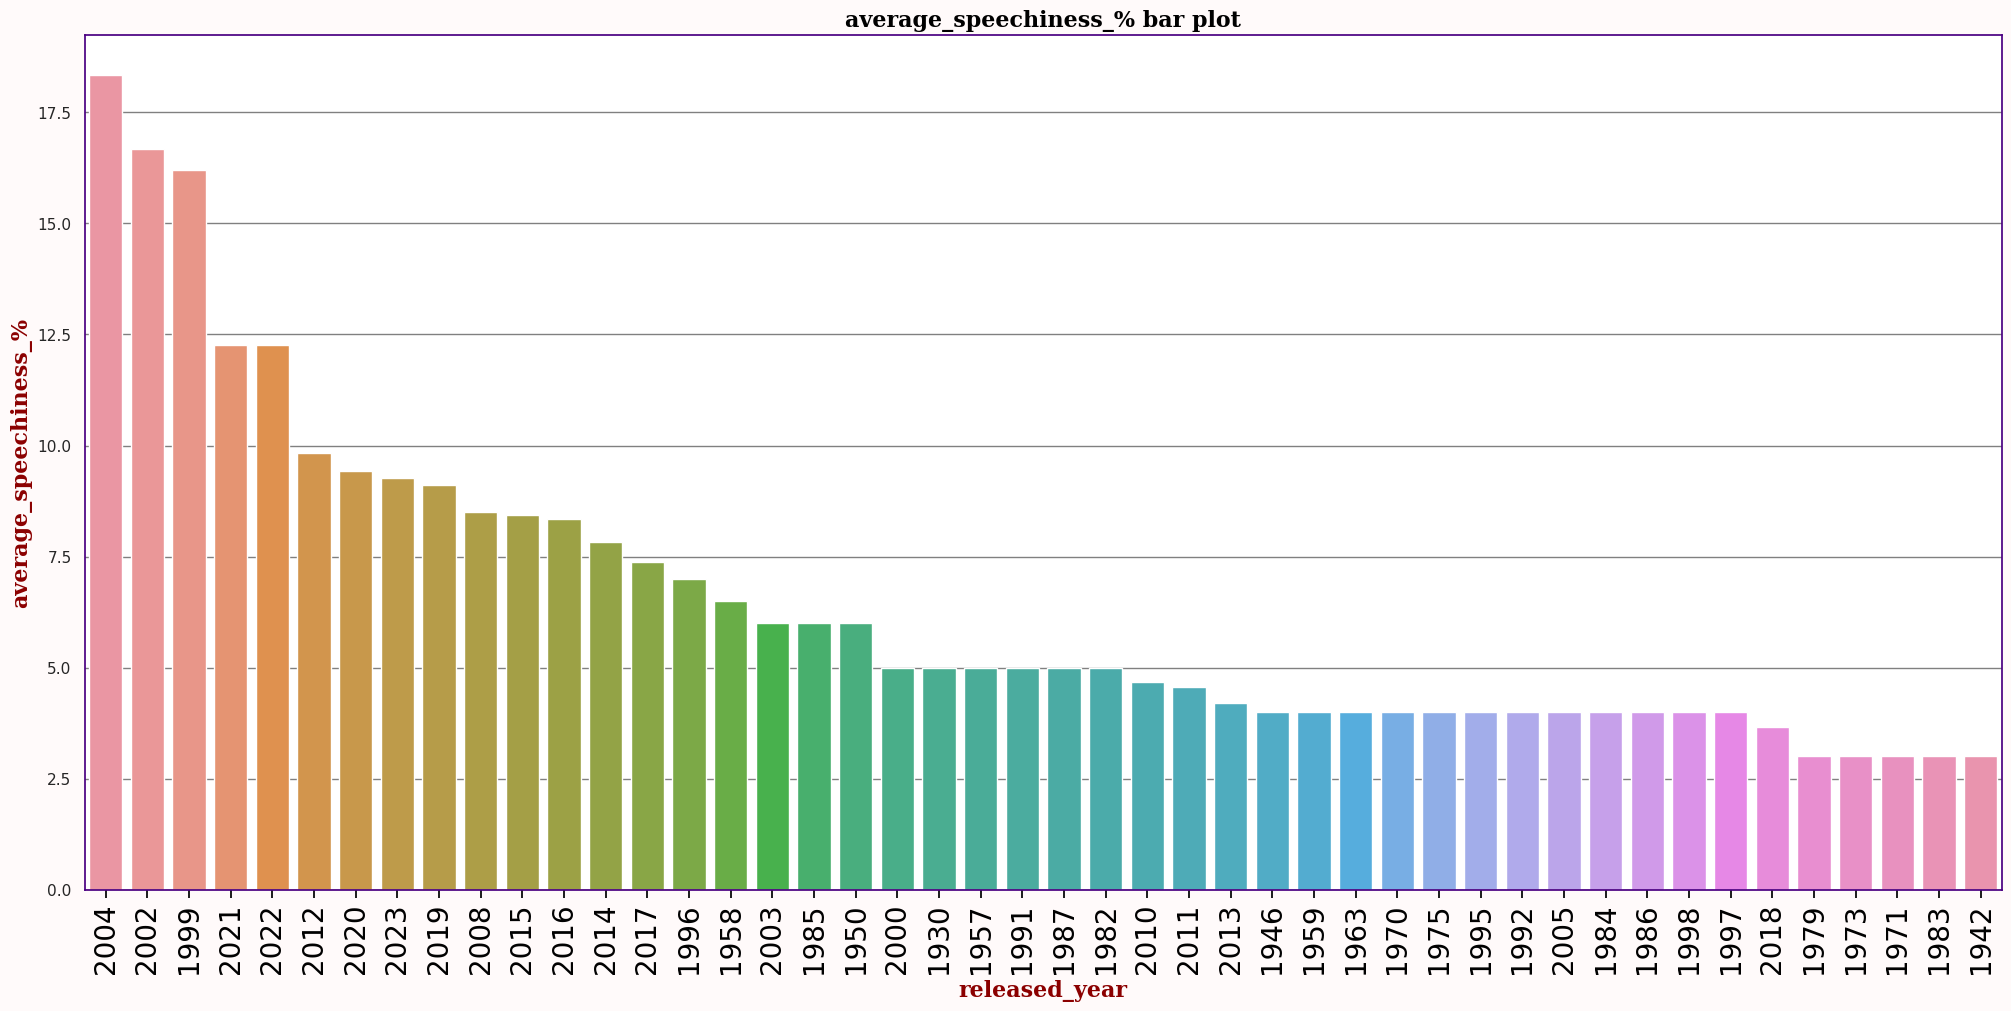

In [587]:
# speechiness_%
group_data = summary_stats(songs_eda,'released_year','speechiness_%')
group_data.head()
ordering = group_data.sort_values('total_speechiness_%',ascending=False).released_year
plotting_bar(group_data,'released_year','total_speechiness_%',ordering=ordering)
ordering = group_data.sort_values('average_speechiness_%',ascending=False).released_year
plotting_bar(group_data,'released_year','average_speechiness_%',ordering=ordering)

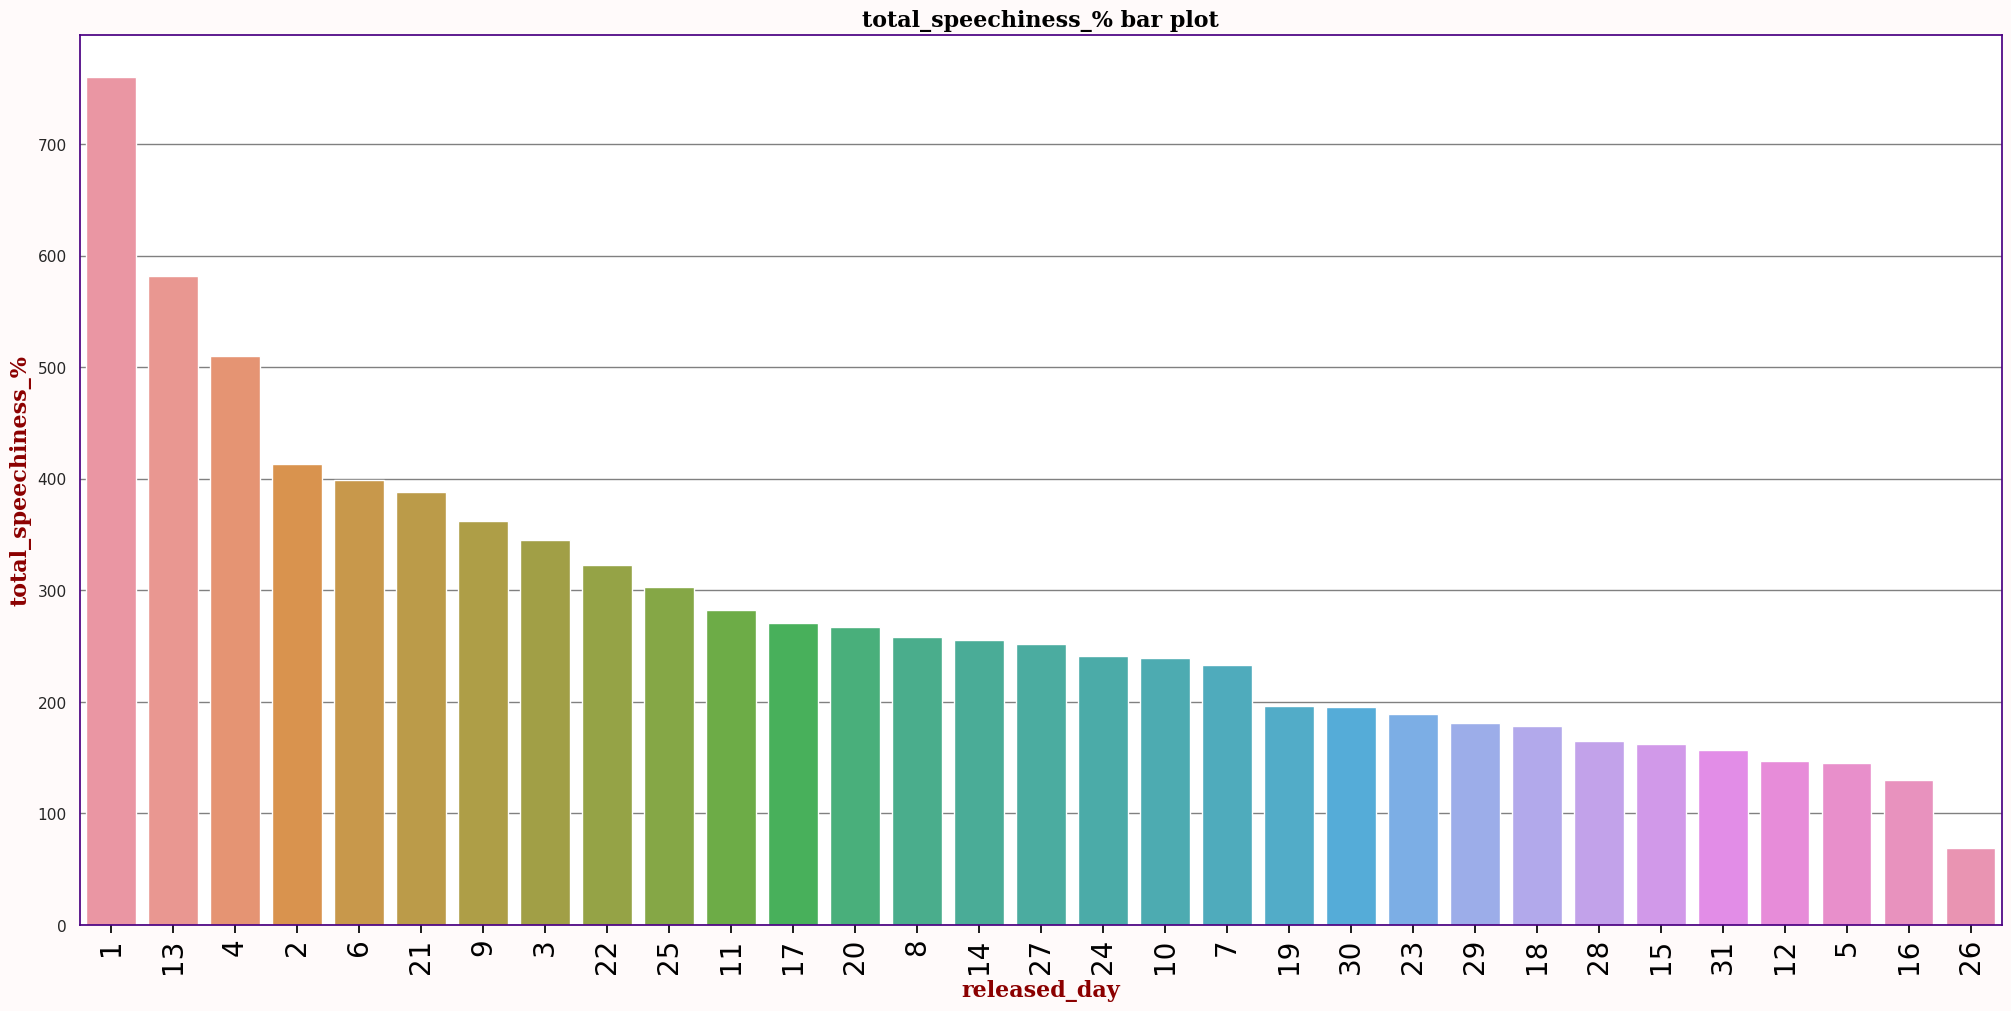

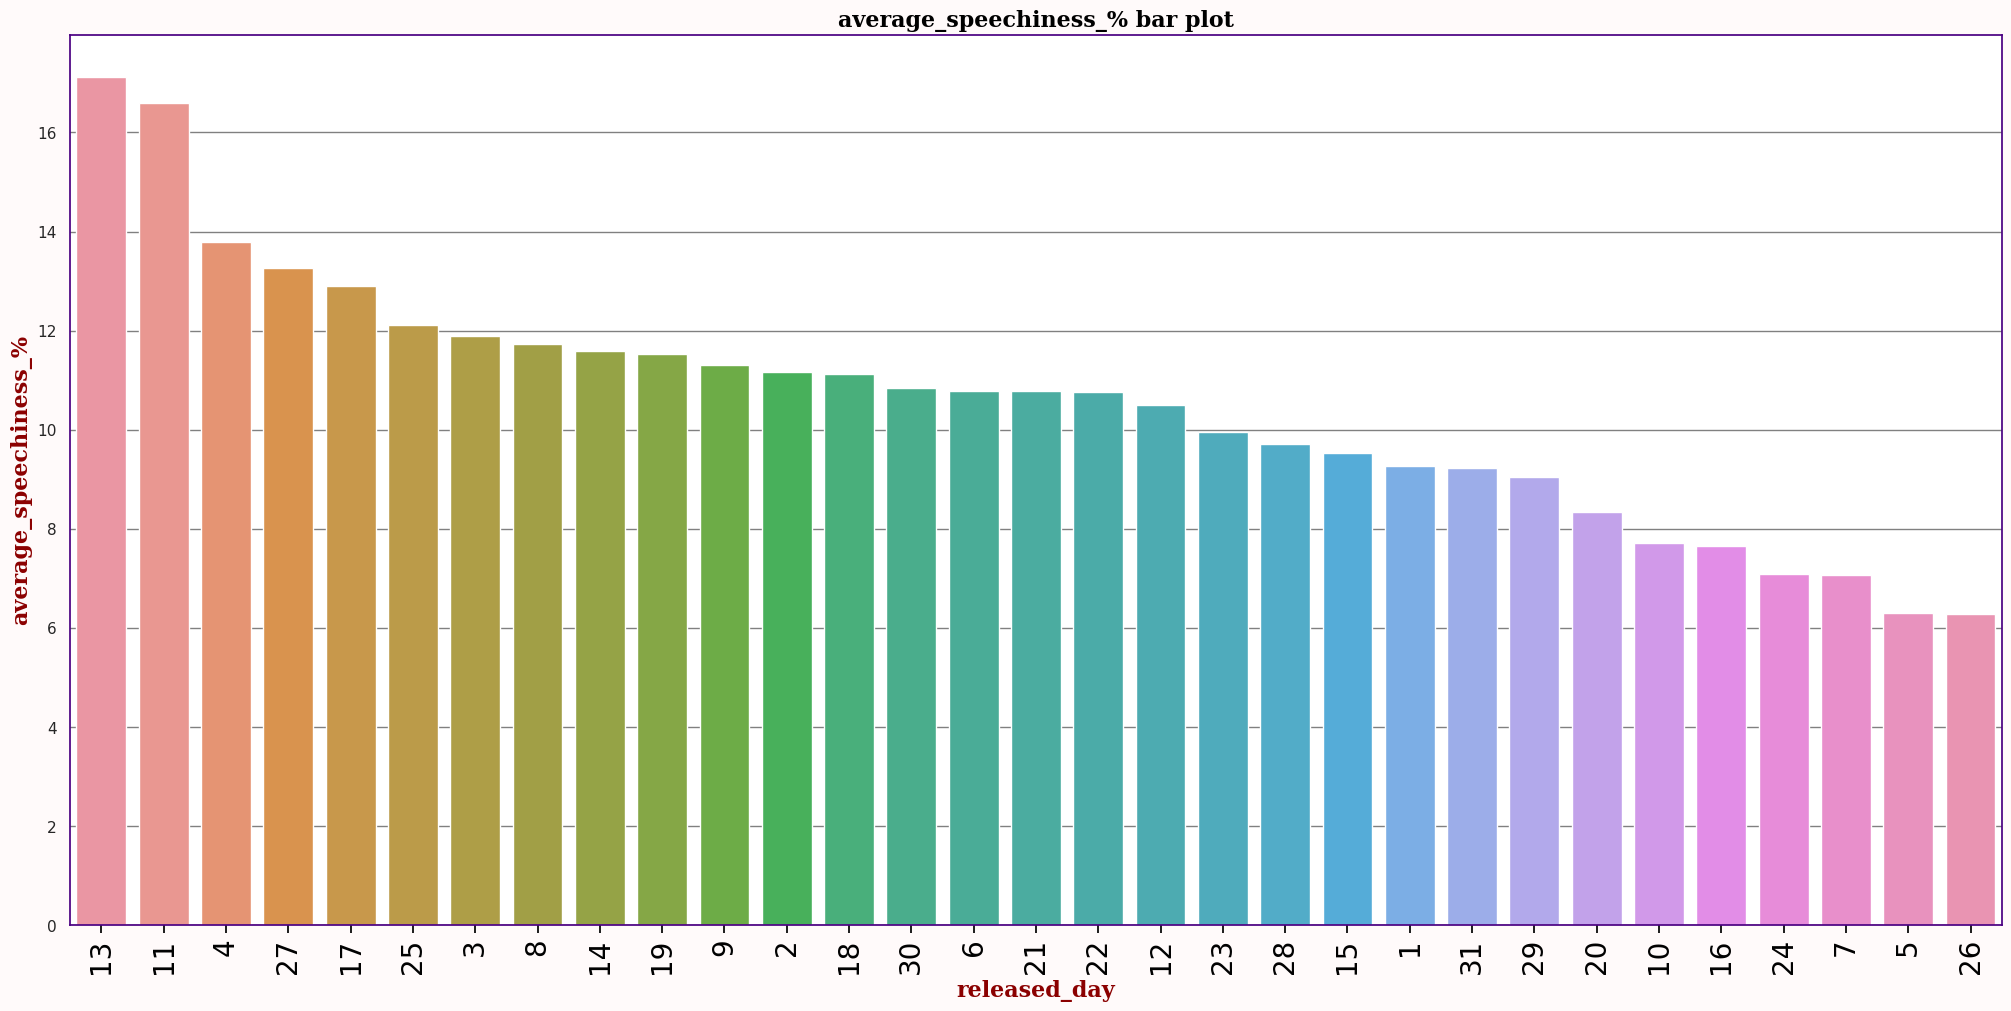

In [588]:
# speechiness_%
group_data = summary_stats(songs_eda,'released_day','speechiness_%')
group_data.head()
ordering = group_data.sort_values('total_speechiness_%',ascending=False).released_day
plotting_bar(group_data,'released_day','total_speechiness_%',ordering=ordering)
ordering = group_data.sort_values('average_speechiness_%',ascending=False).released_day
plotting_bar(group_data,'released_day','average_speechiness_%',ordering=ordering)

In [656]:
group_data = summary_stats(songs_eda,'mode','streams')
group_data.head()

mode  total_streams  average_streams  deviation_streams  \
0  Major   225071131896     4.990491e+08       5.430157e+08   
1  Minor   157621251861     4.318390e+08       4.956770e+08   

   skewness_level_streams  
0                   1.917  
1                   2.462

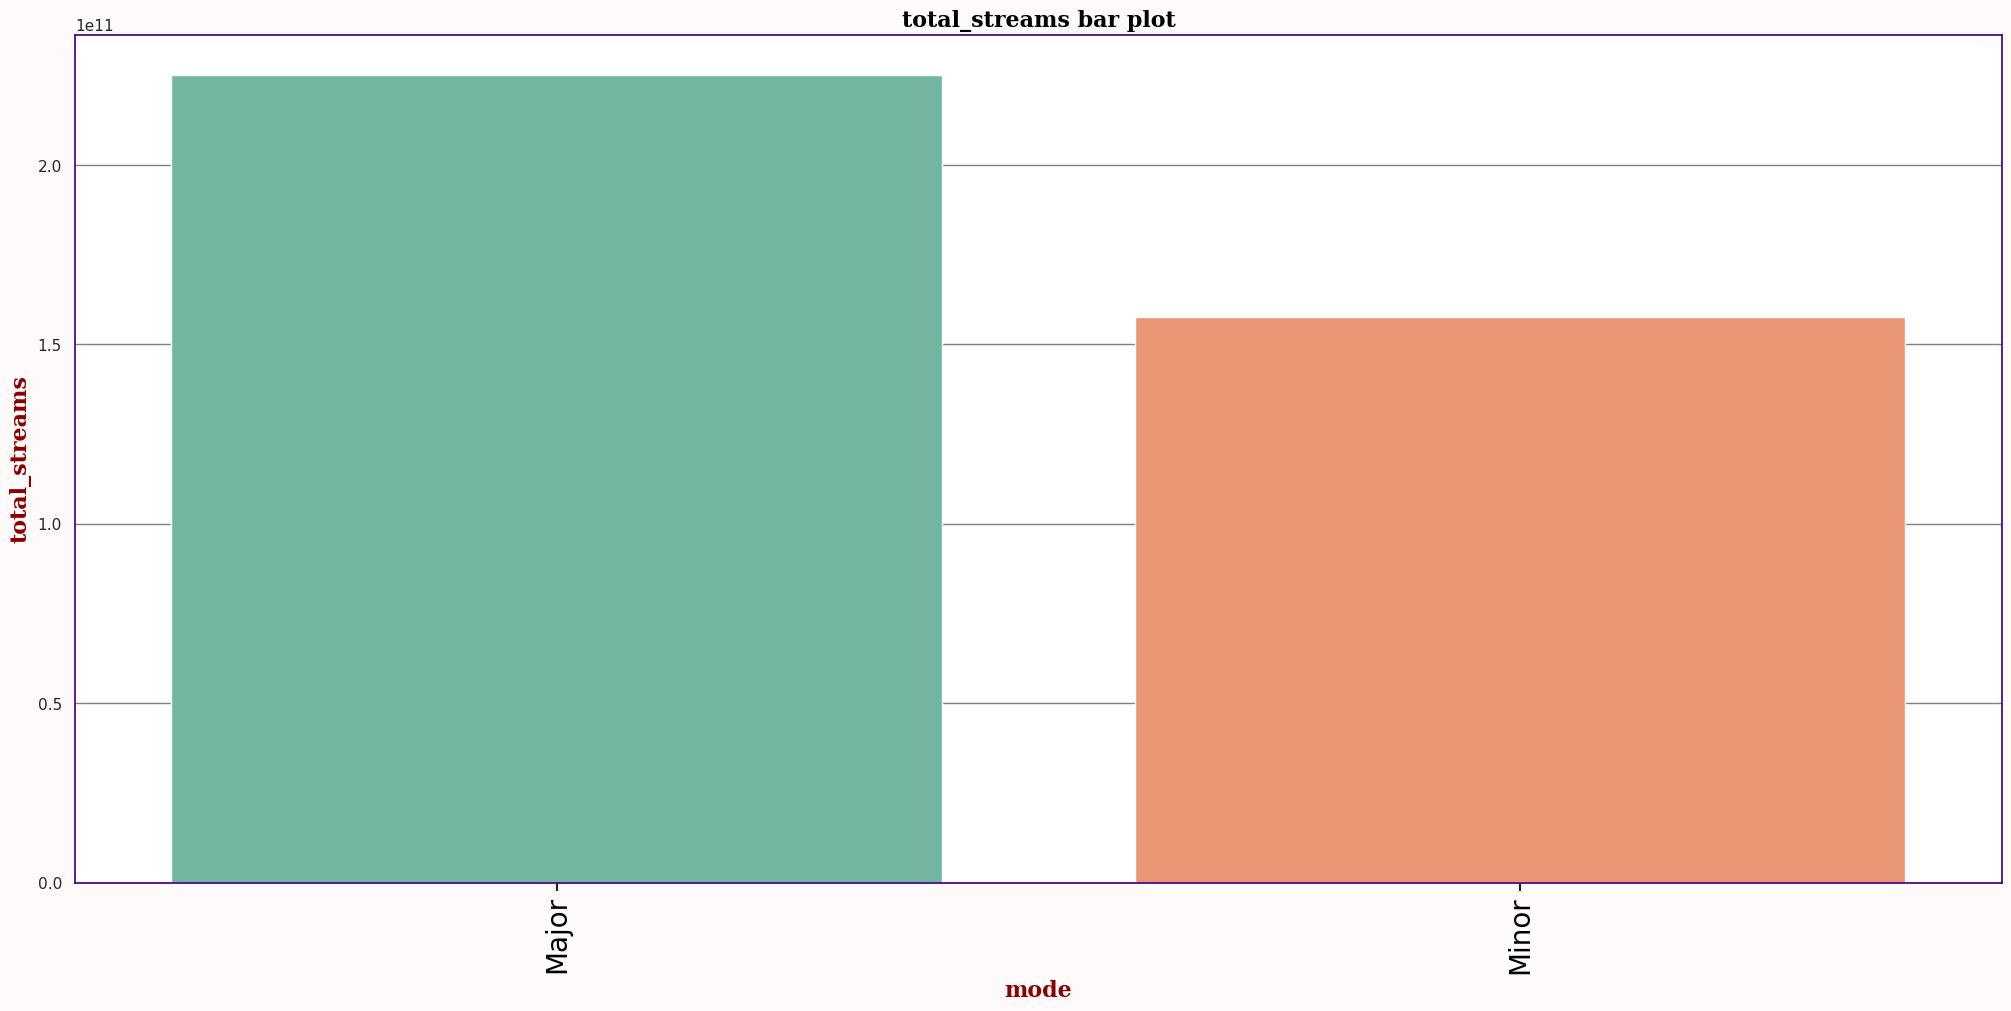

In [658]:
# ordering = group_data.sort_values('total_streams',ascending=False)
plotting_bar(group_data,'mode','total_streams')

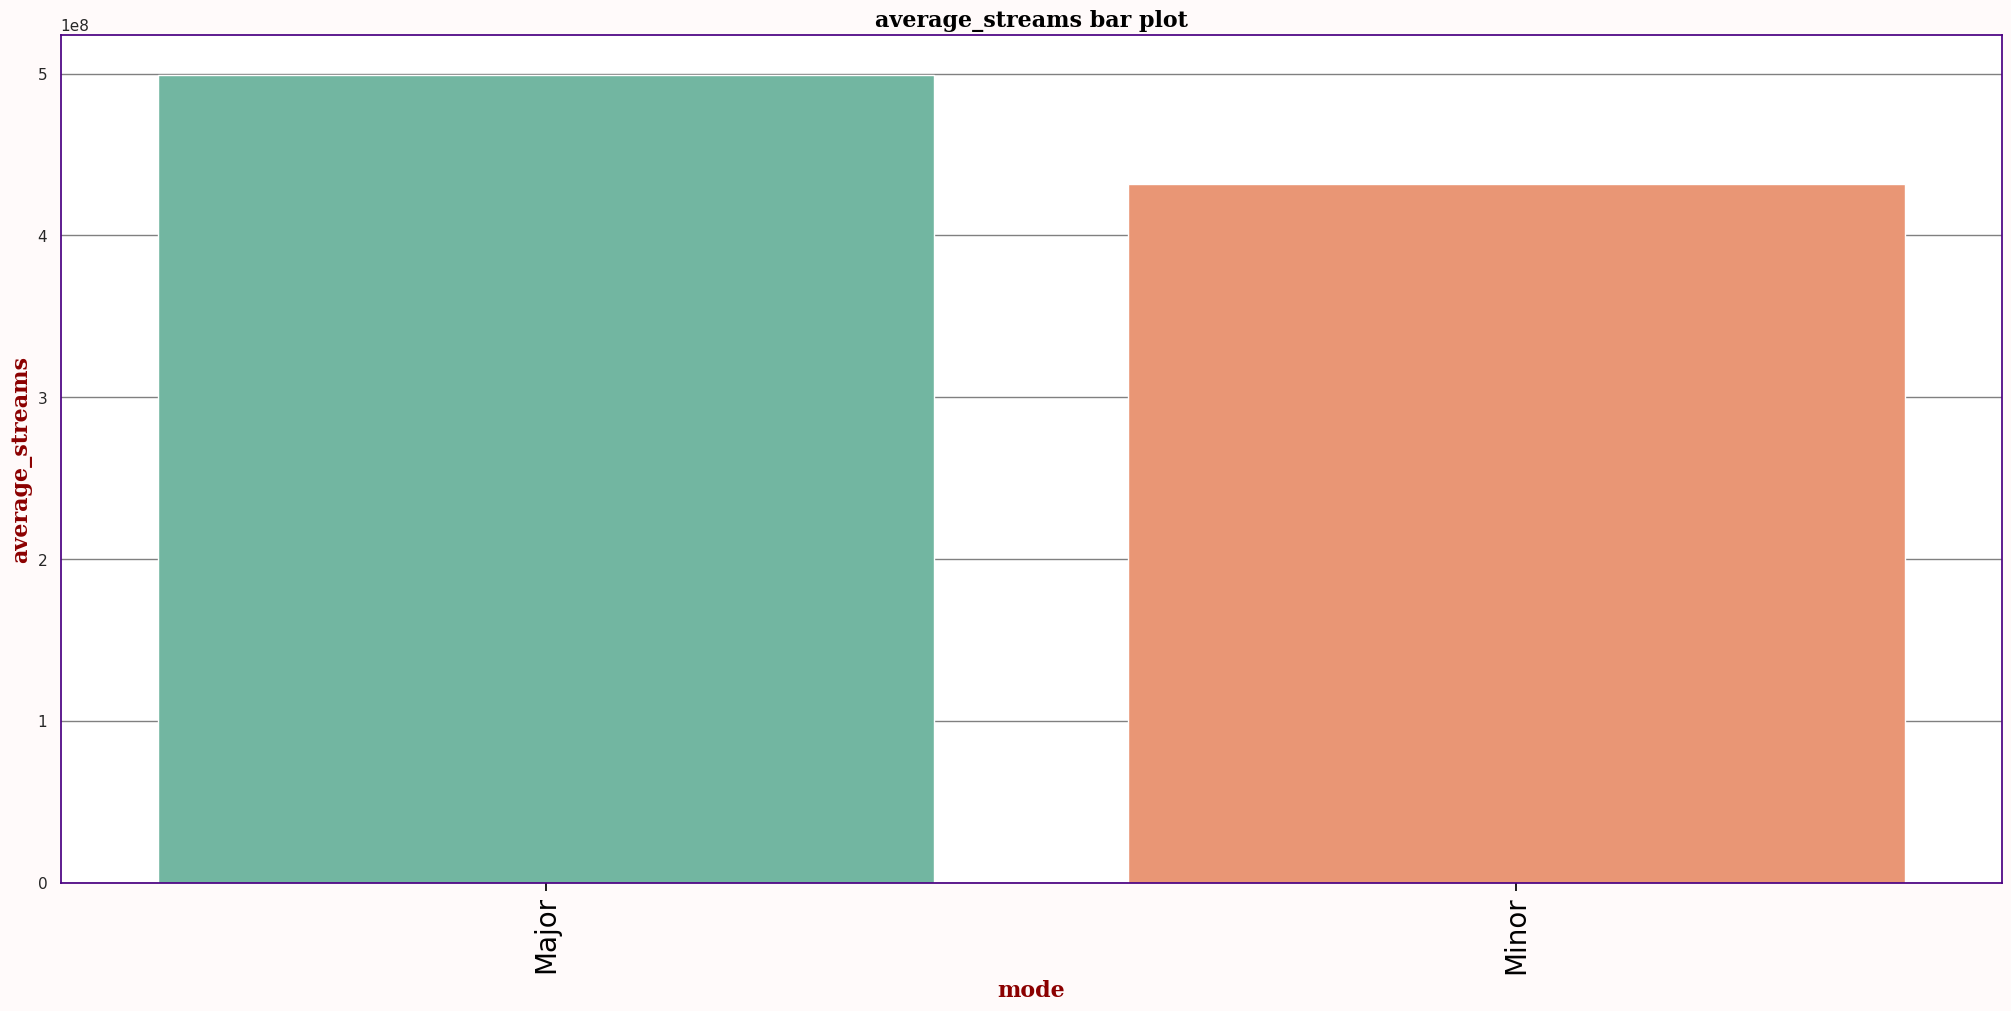

In [659]:
# ordering = group_data.sort_values('average_streams',ascending=False)
plotting_bar(group_data,'mode','average_streams')

In [660]:
group_data = summary_stats(songs_eda,'mode','in_spotify_playlists')
group_data.head()

mode  total_in_spotify_playlists  average_in_spotify_playlists  \
0  Major                     2416443                      5357.967   
1  Minor                     1543047                      4227.526   

   deviation_in_spotify_playlists  skewness_level_in_spotify_playlists  
0                        8349.438                                2.957  
1                        6887.287                                3.429

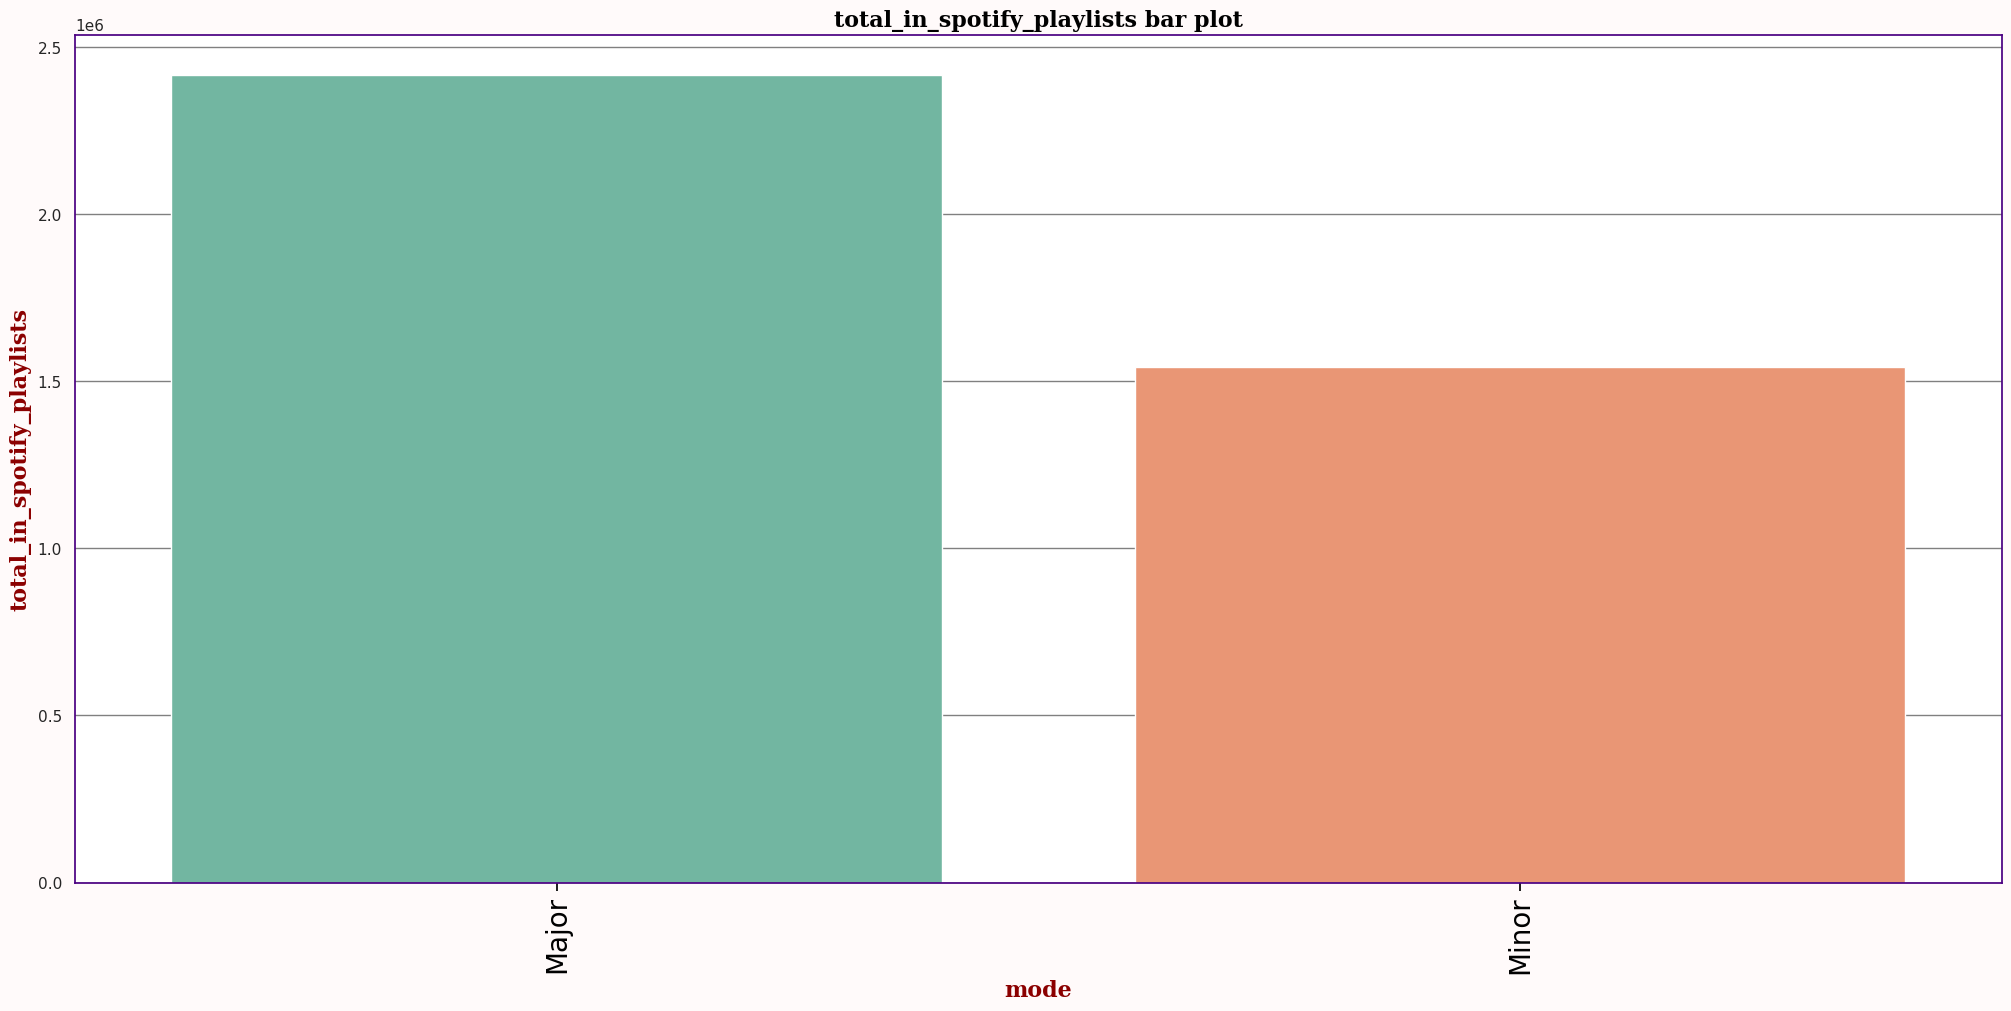

In [661]:
# ordering = group_data.sort_values('total_in_spotify_playlists',ascending=False)
plotting_bar(group_data,'mode','total_in_spotify_playlists')

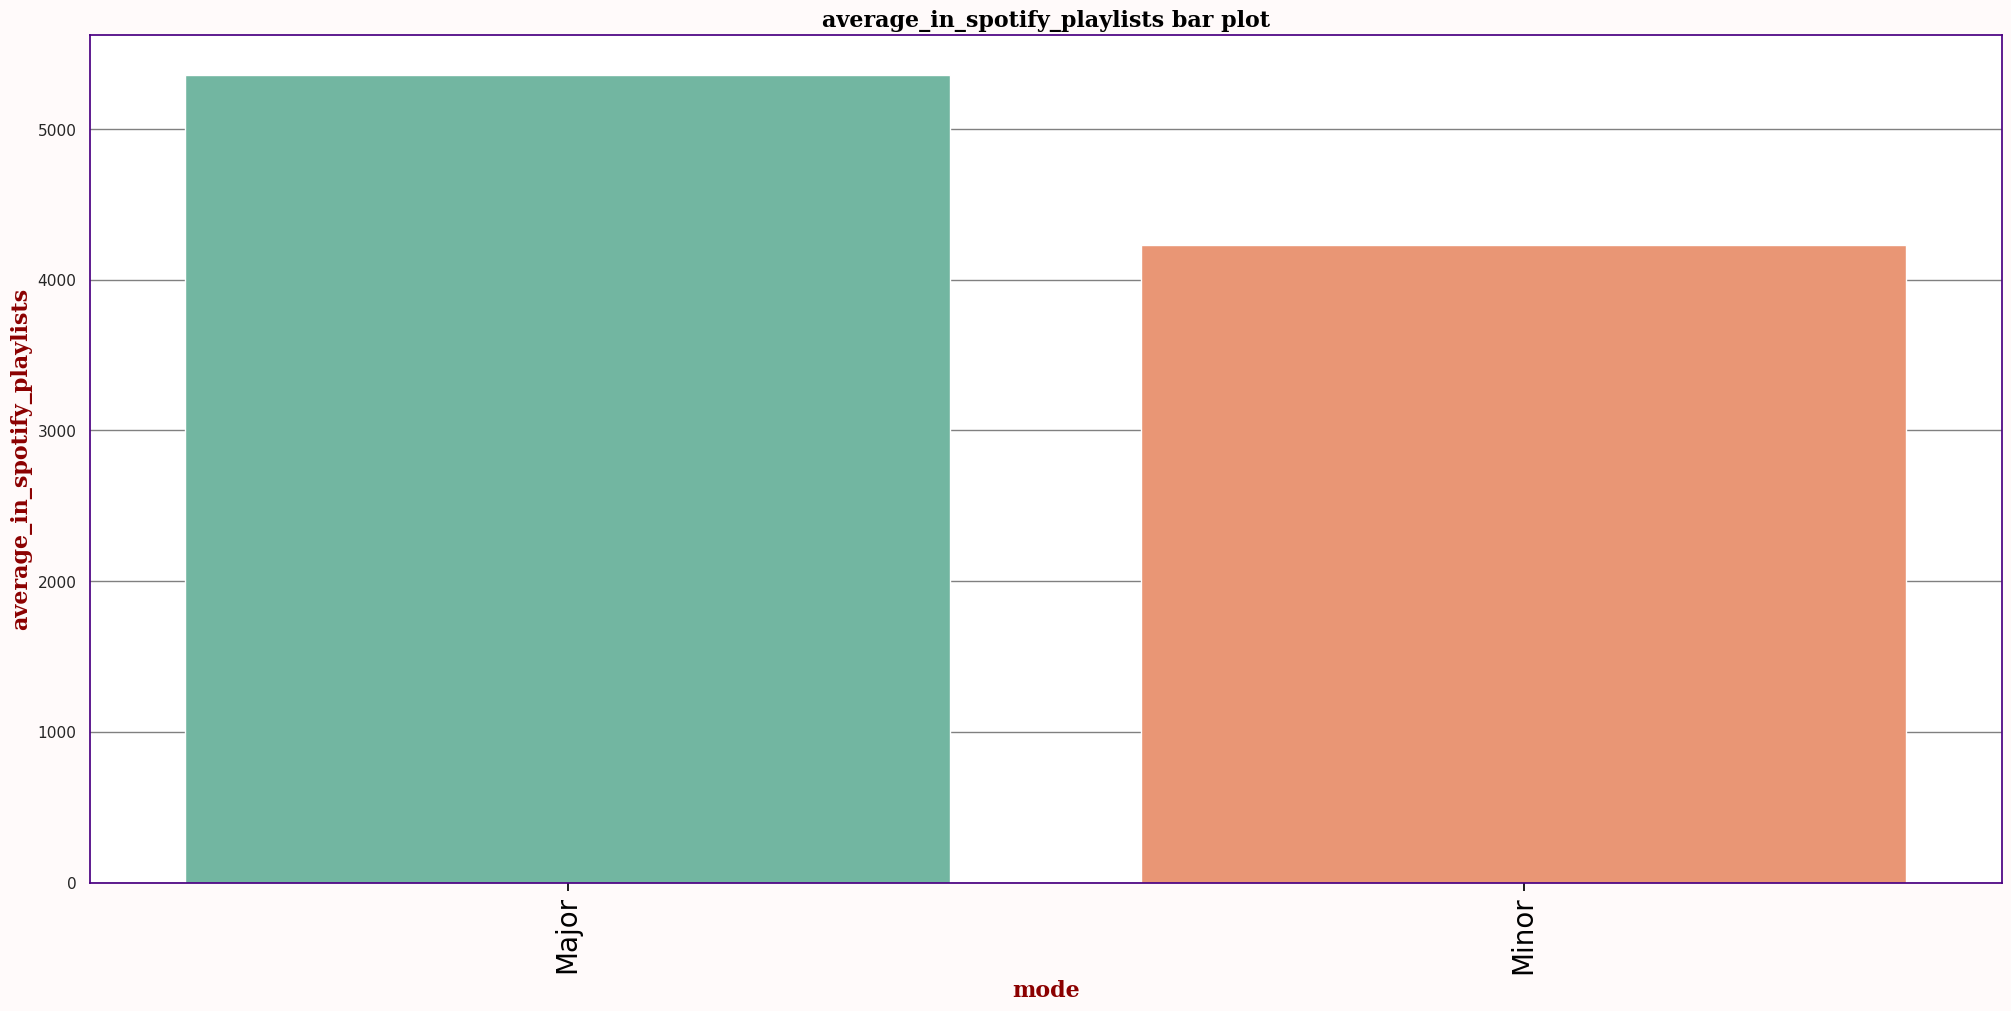

In [662]:
# ordering = group_data.sort_values('average_in_spotify_playlists',ascending=False)
plotting_bar(group_data,'mode','average_in_spotify_playlists')

In [663]:
group_data = summary_stats(songs_eda,'mode','in_apple_playlists')
group_data.head()

mode  total_in_apple_playlists  average_in_apple_playlists  \
0  Major                     29791                      66.055   
1  Minor                     19345                      53.000   

   deviation_in_apple_playlists  skewness_level_in_apple_playlists  
0                        79.797                              2.128  
1                        67.915                              2.780

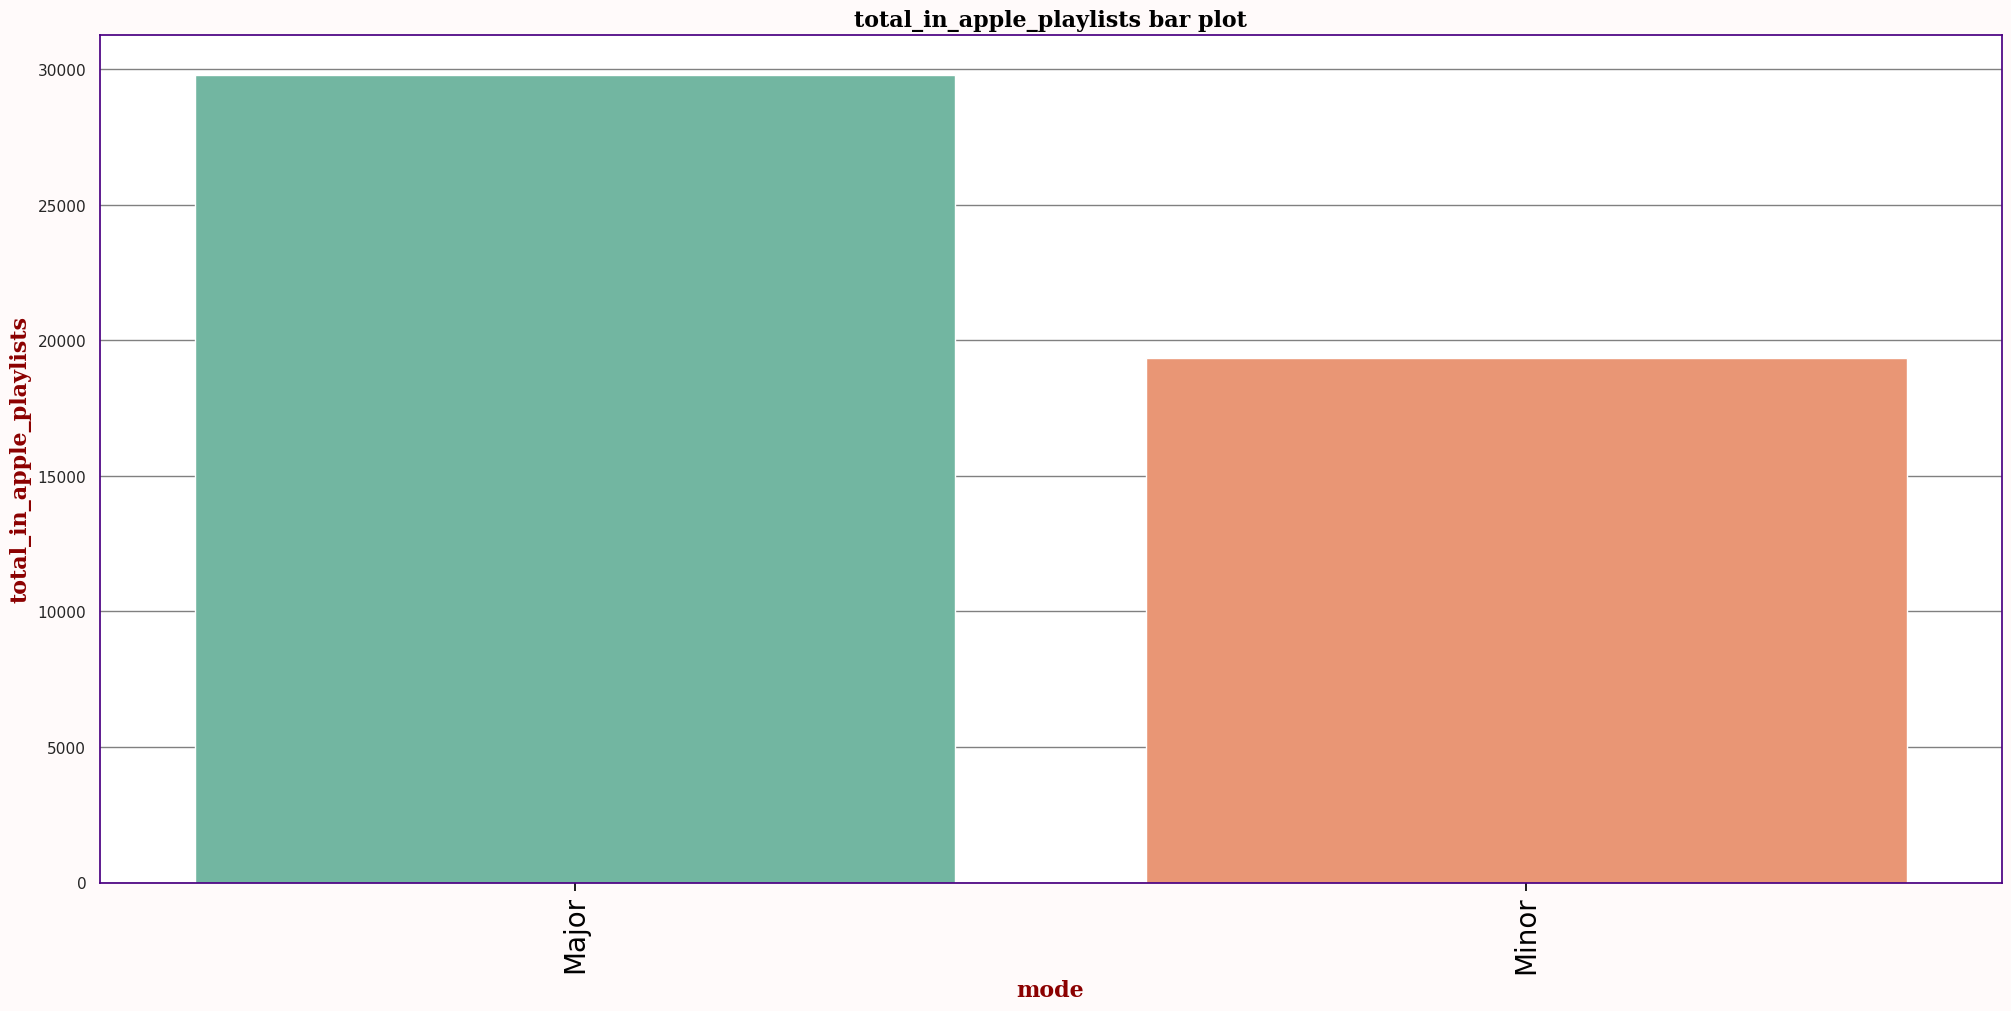

In [664]:
# ordering = group_data.sort_values('total_in_apple_playlists',ascending=False)
plotting_bar(group_data,'mode','total_in_apple_playlists')

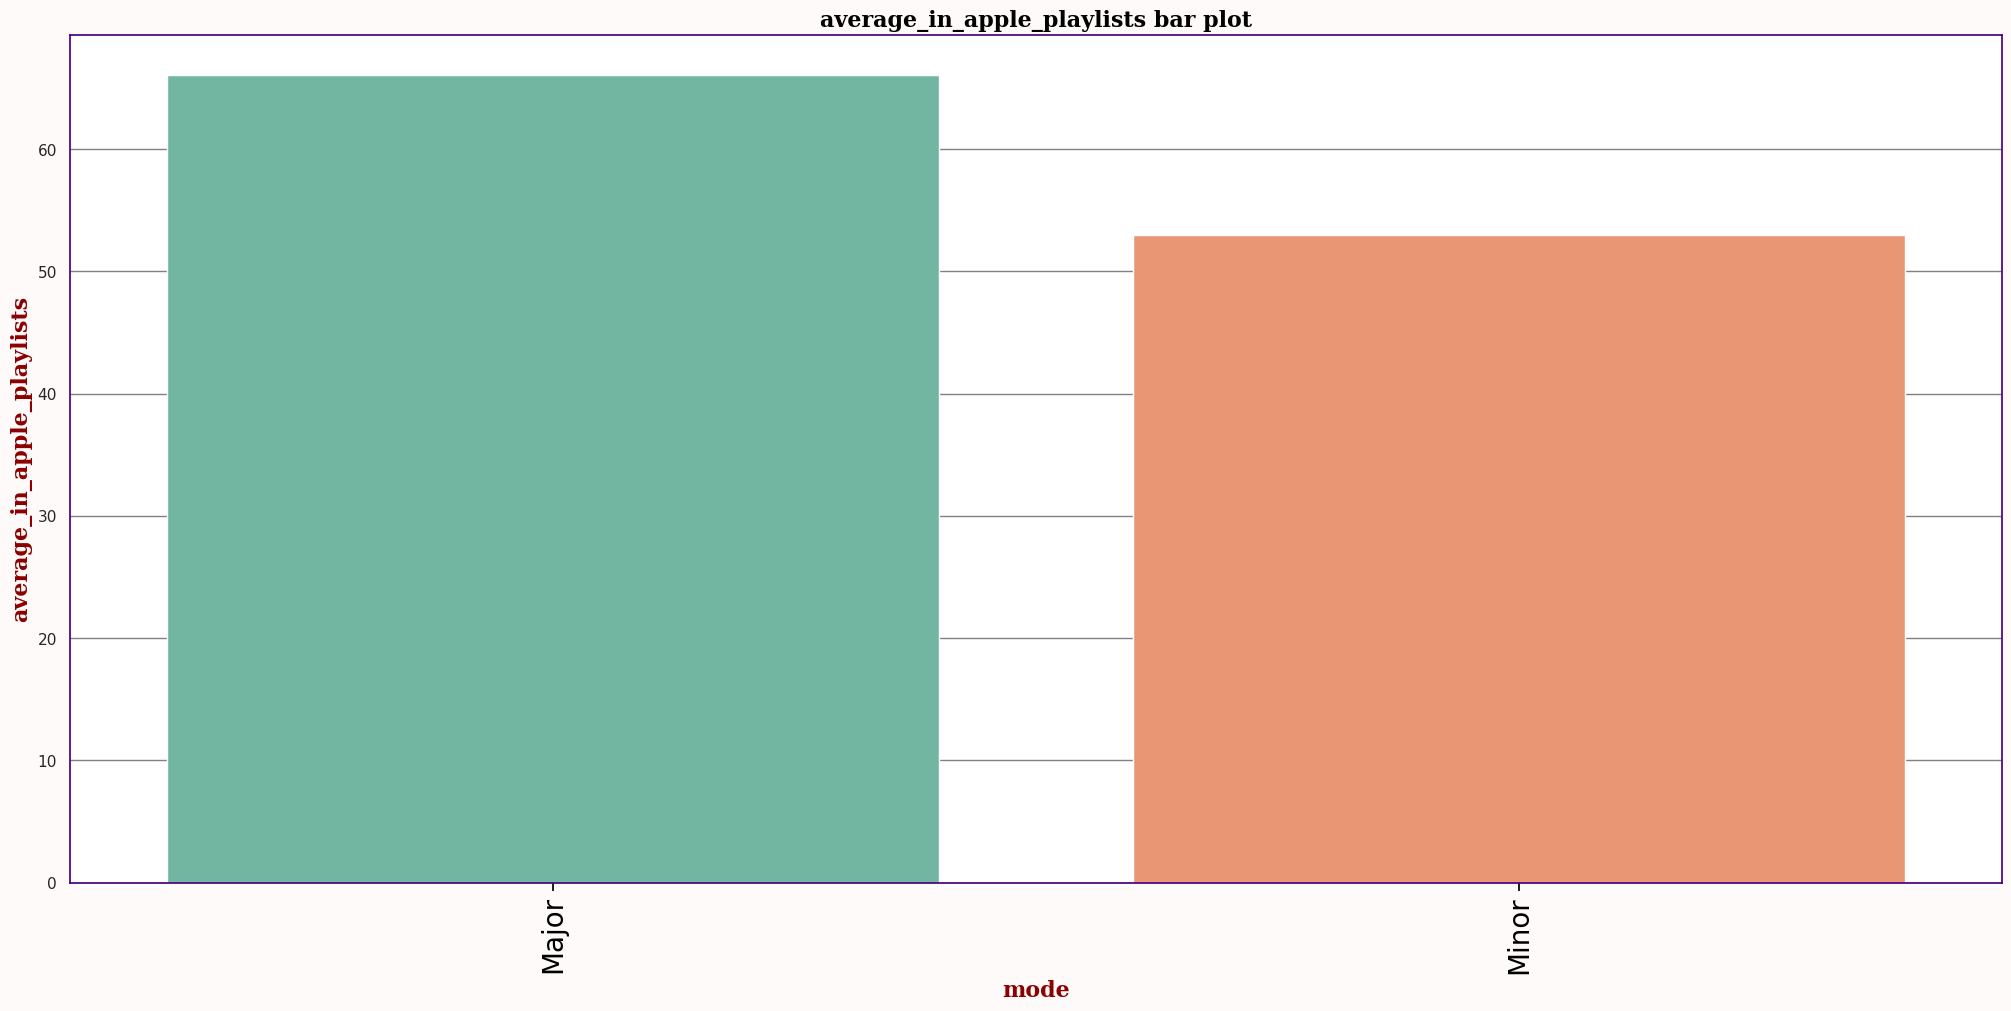

In [665]:
# ordering = group_data.sort_values('average_in_apple_playlists',ascending=False)
plotting_bar(group_data,'mode','average_in_apple_playlists')

In [666]:
group_data = summary_stats(songs_eda,'mode','in_deezer_playlists')
group_data.head()

mode  total_in_deezer_playlists  average_in_deezer_playlists  \
0  Major                   195924.0                      434.421   
1  Minor                   107672.0                      294.992   

   deviation_in_deezer_playlists  skewness_level_in_deezer_playlists  
0                       1288.932                               4.772  
1                        967.754                               5.253

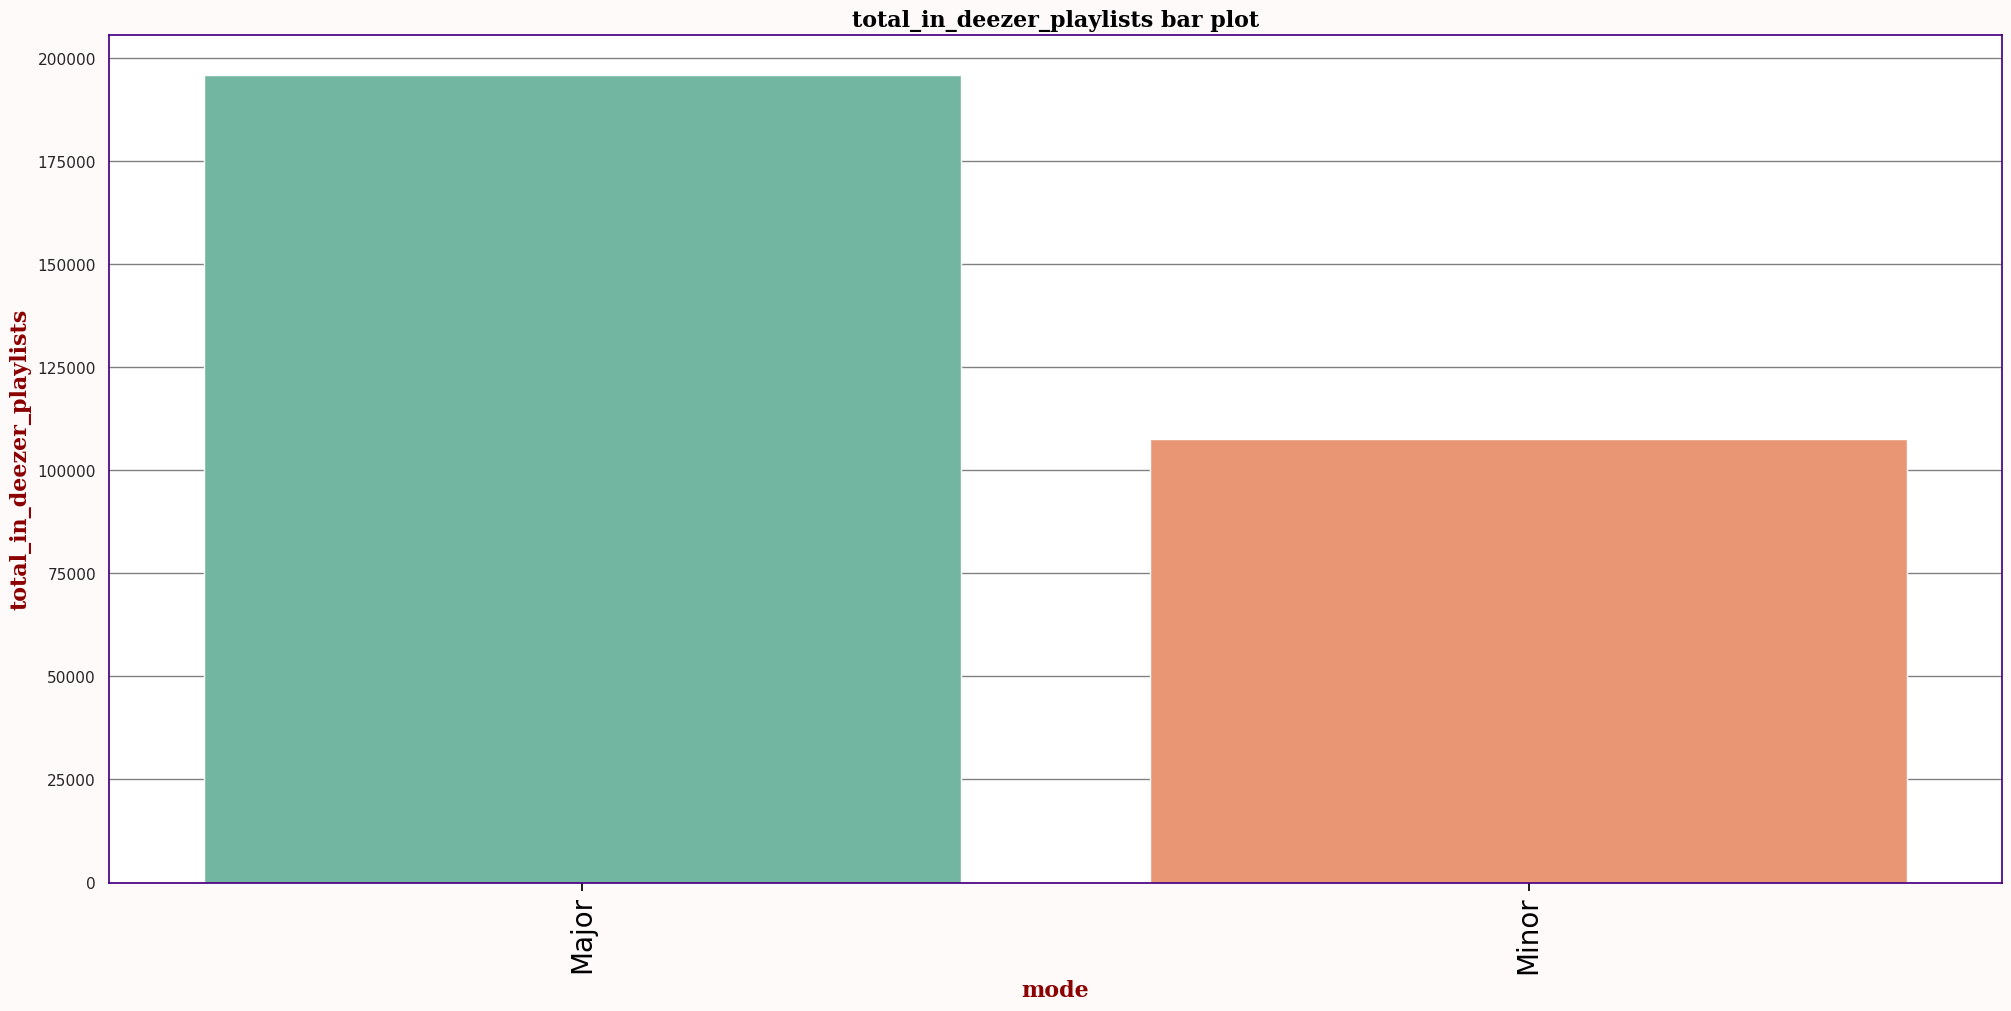

In [667]:
# ordering = group_data.sort_values('total_in_deezer_playlists',ascending=False)
plotting_bar(group_data,'mode','total_in_deezer_playlists')

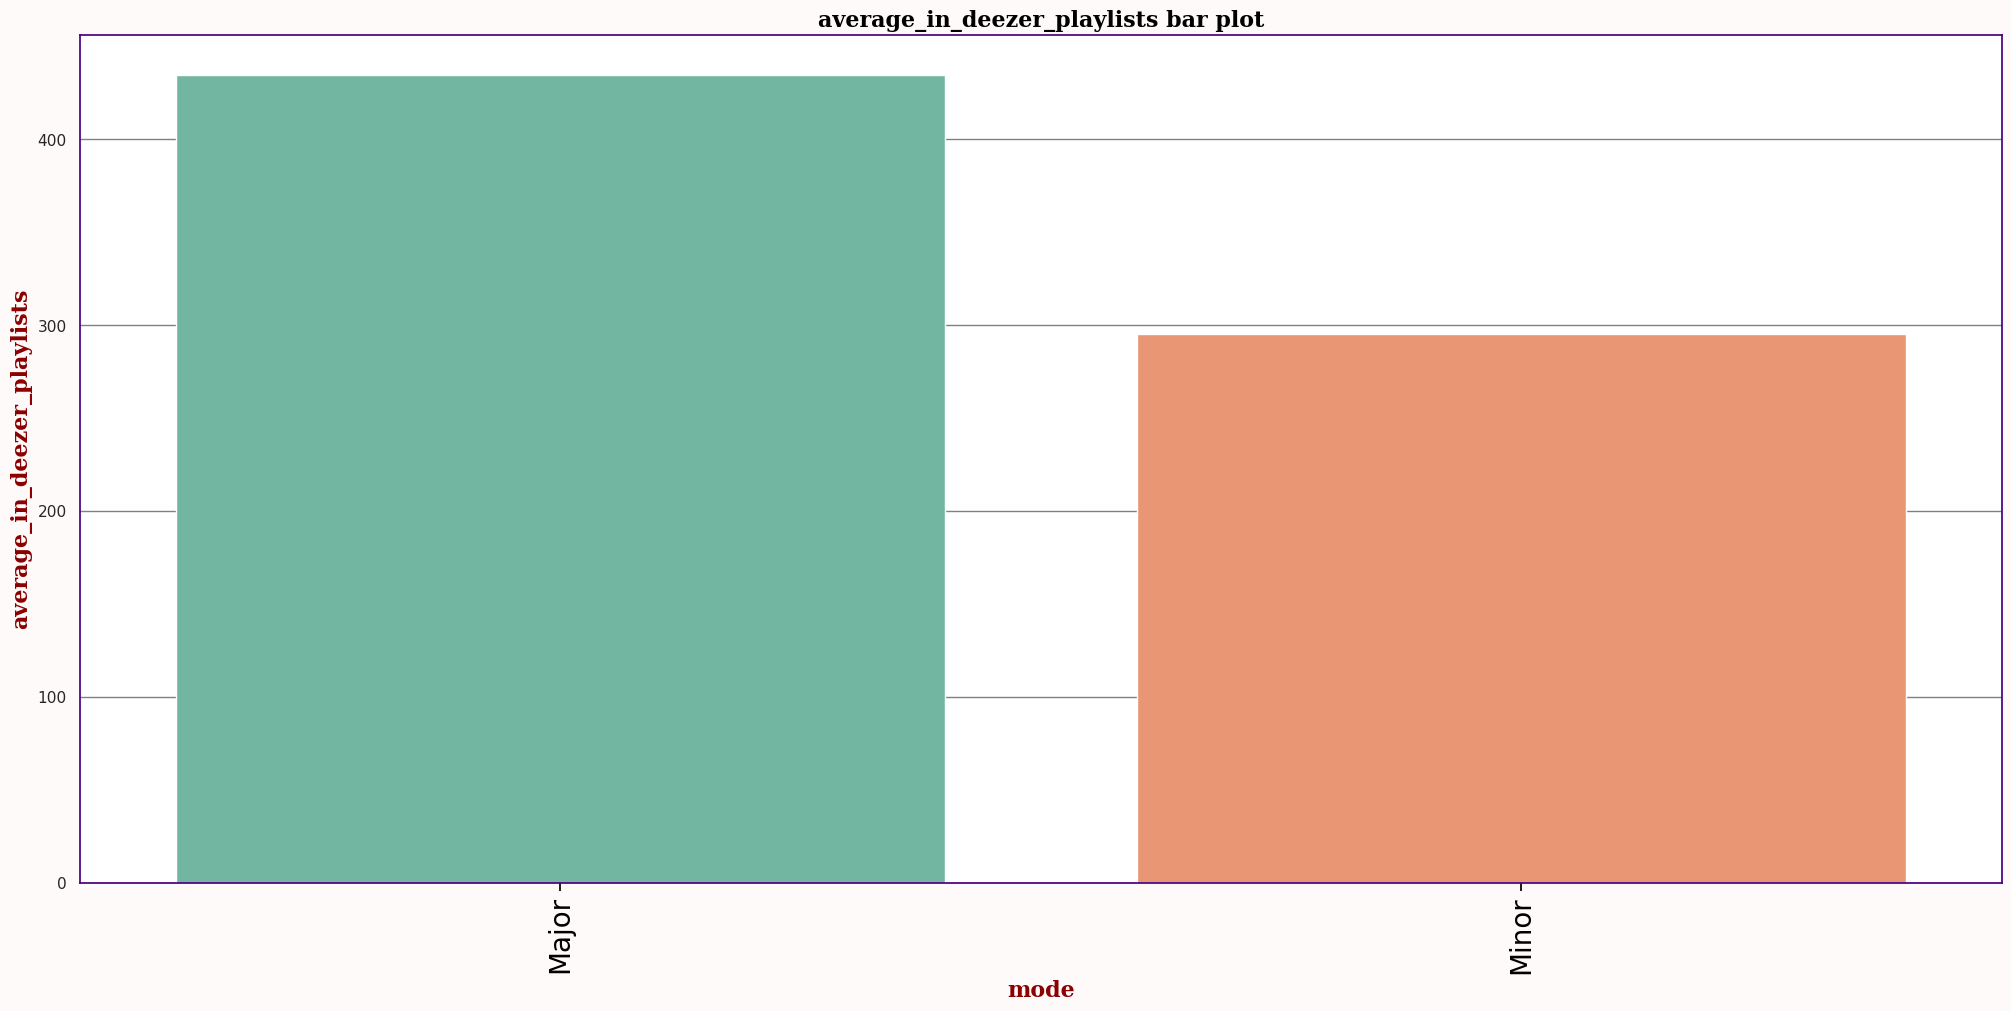

In [668]:
# ordering = group_data.sort_values('average_in_deezer_playlists',ascending=False)
plotting_bar(group_data,'mode','average_in_deezer_playlists')

In [669]:
group_data = summary_stats(songs_eda,'mode','bpm')
group_data.head()

mode  total_bpm  average_bpm  deviation_bpm  skewness_level_bpm
0  Major    55593.0      123.266         28.702               0.429
1  Minor    44433.0      121.734         27.557               0.429

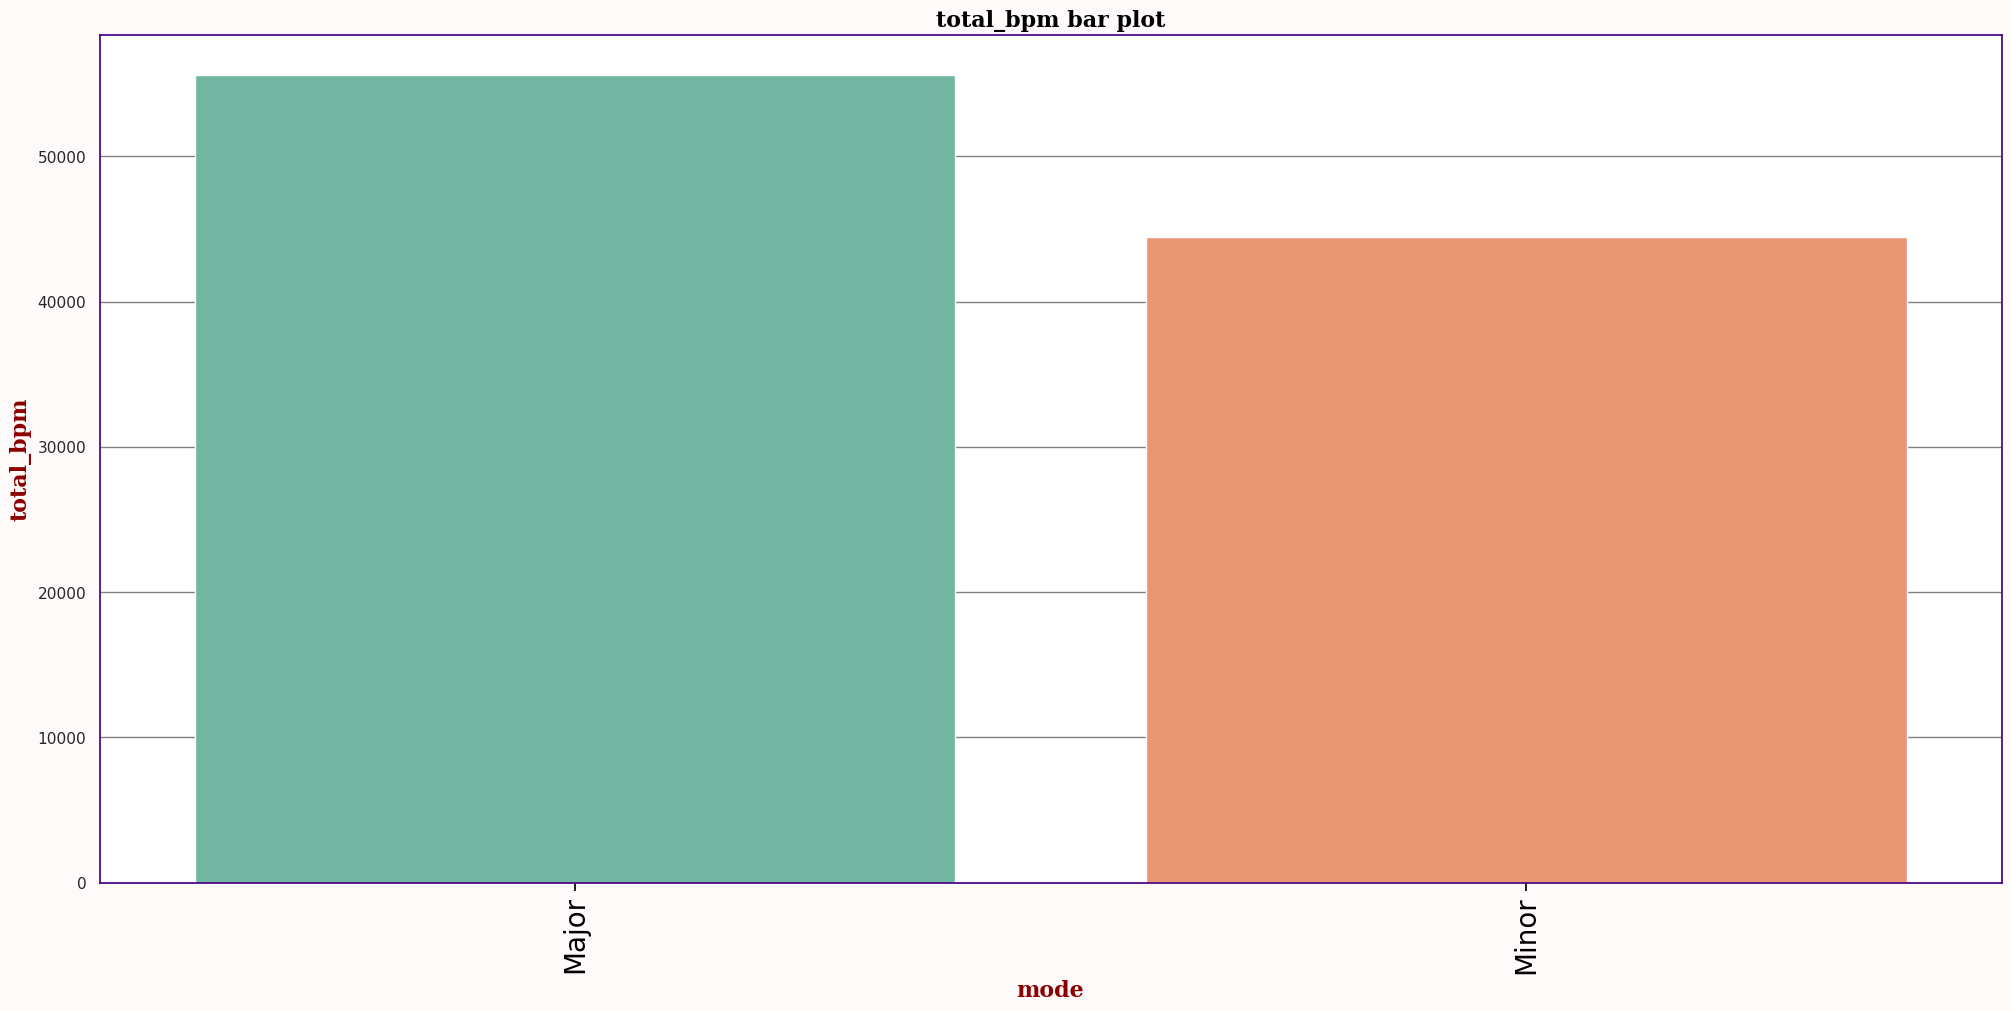

In [670]:
# ordering = group_data.sort_values('total_bpm',ascending=False)
plotting_bar(group_data,'mode','total_bpm')

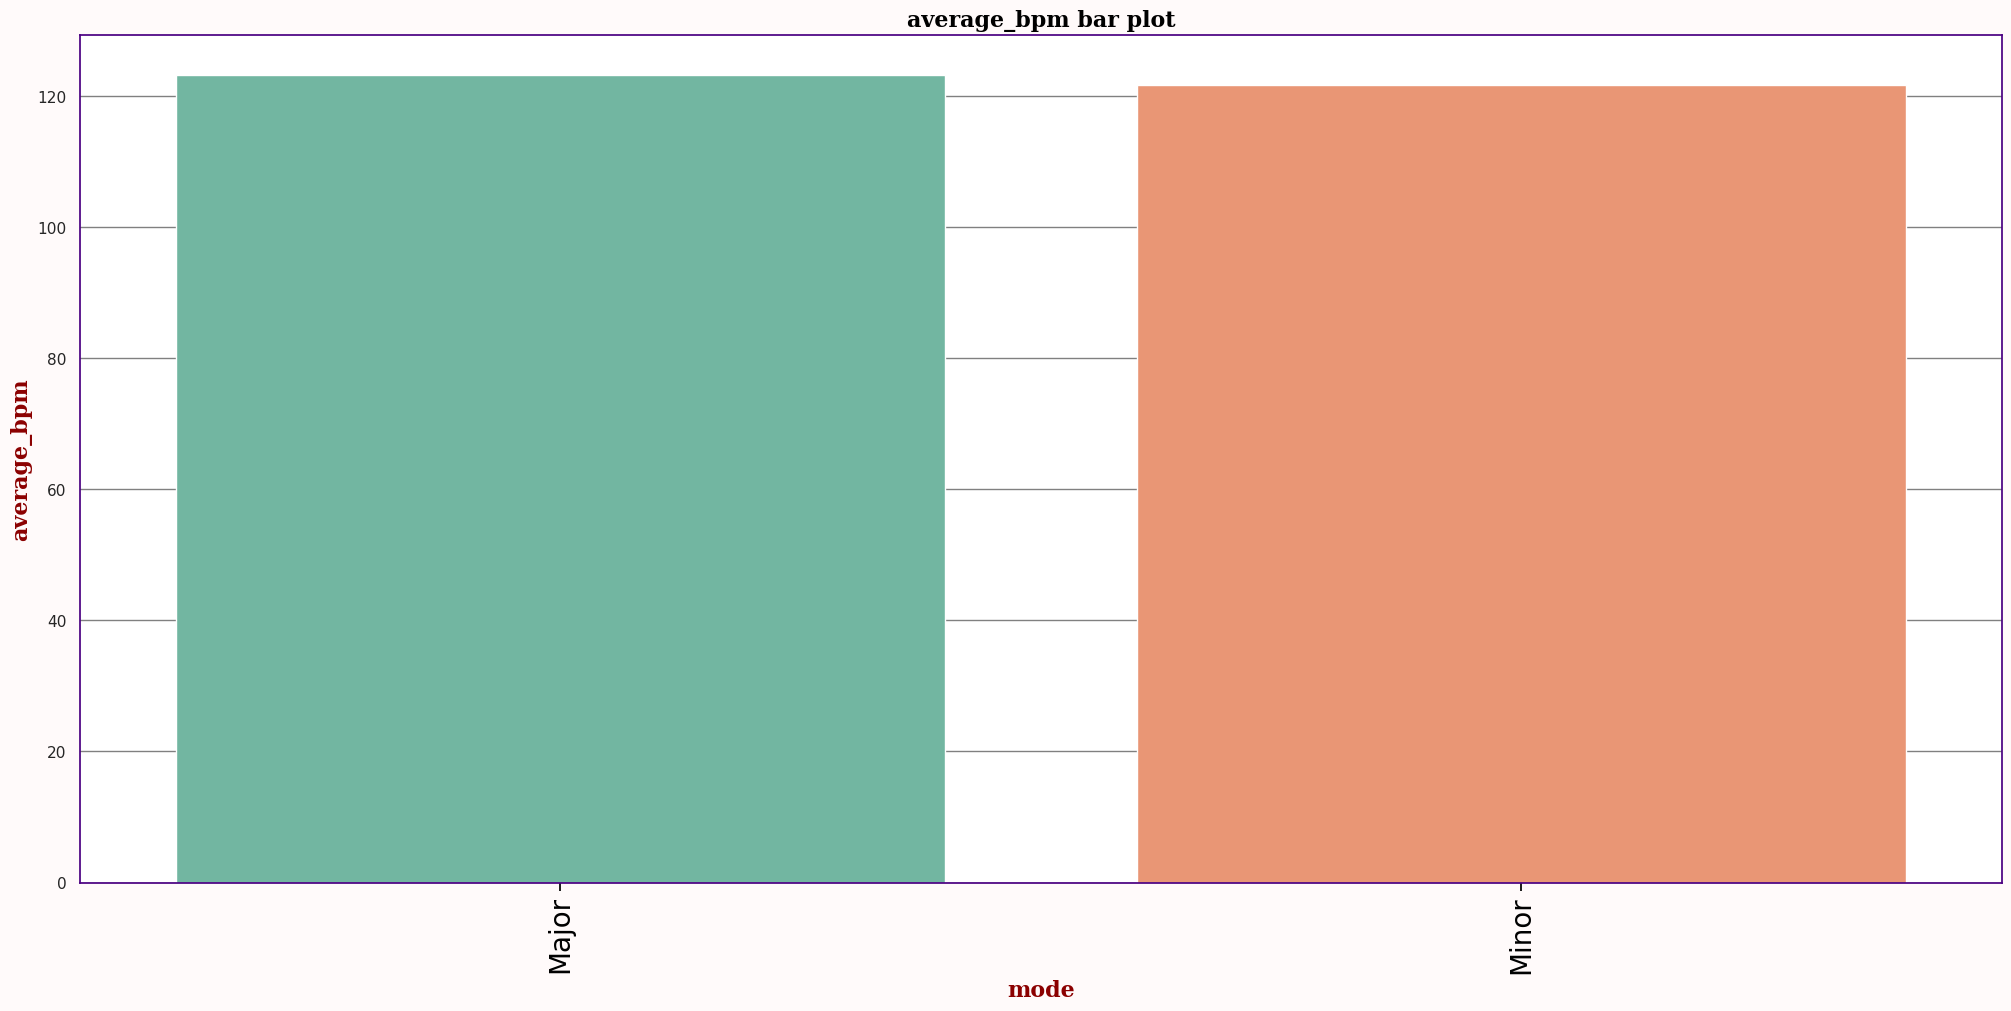

In [671]:
# ordering = group_data.sort_values('average_bpm',ascending=False)
plotting_bar(group_data,'mode','average_bpm')

In [672]:
group_data = summary_stats(songs_eda,'mode','danceability_%')
group_data.head()

mode  total_danceability_%  average_danceability_%  \
0  Major               29539.0                  65.497   
1  Minor               25467.0                  69.773   

   deviation_danceability_%  skewness_level_danceability_%  
0                    15.304                         -0.280  
1                    13.544                         -0.657

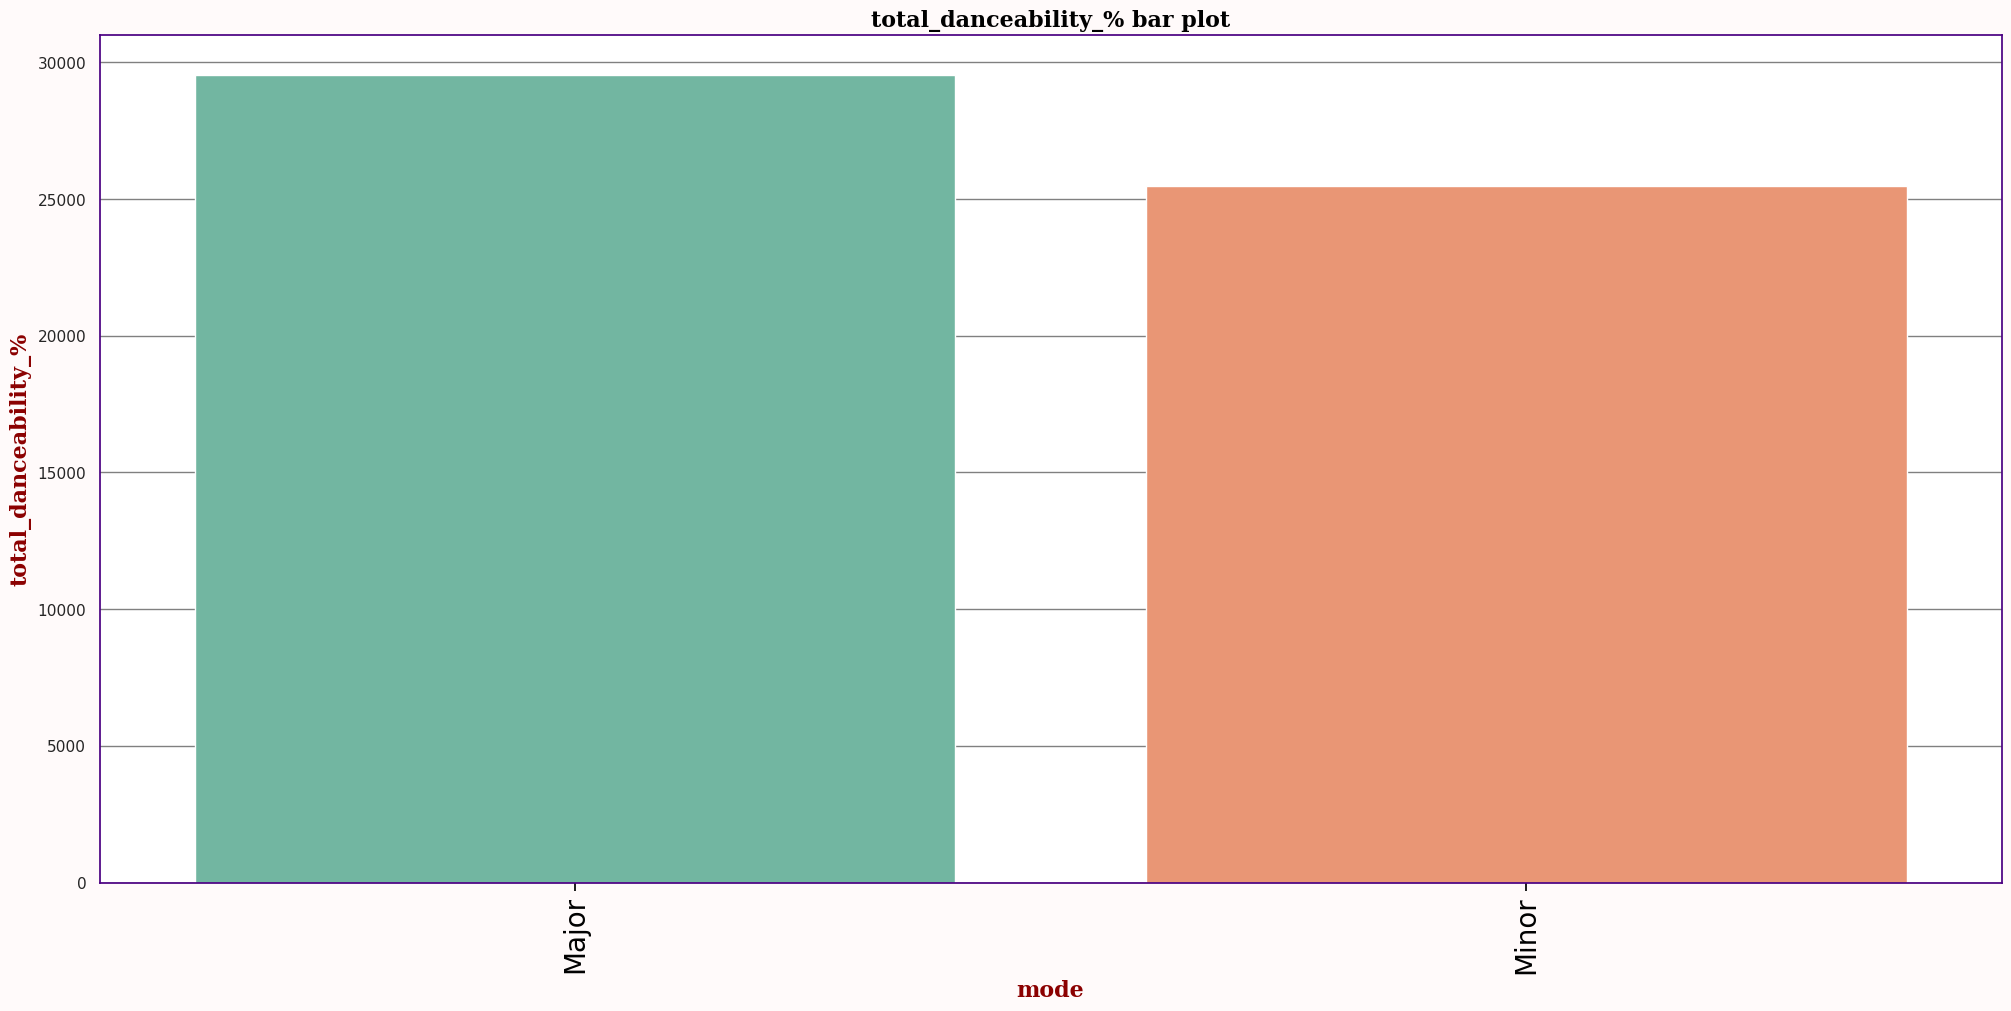

In [673]:
# ordering = group_data.sort_values('total_danceability_%',ascending=False)
plotting_bar(group_data,'mode','total_danceability_%')

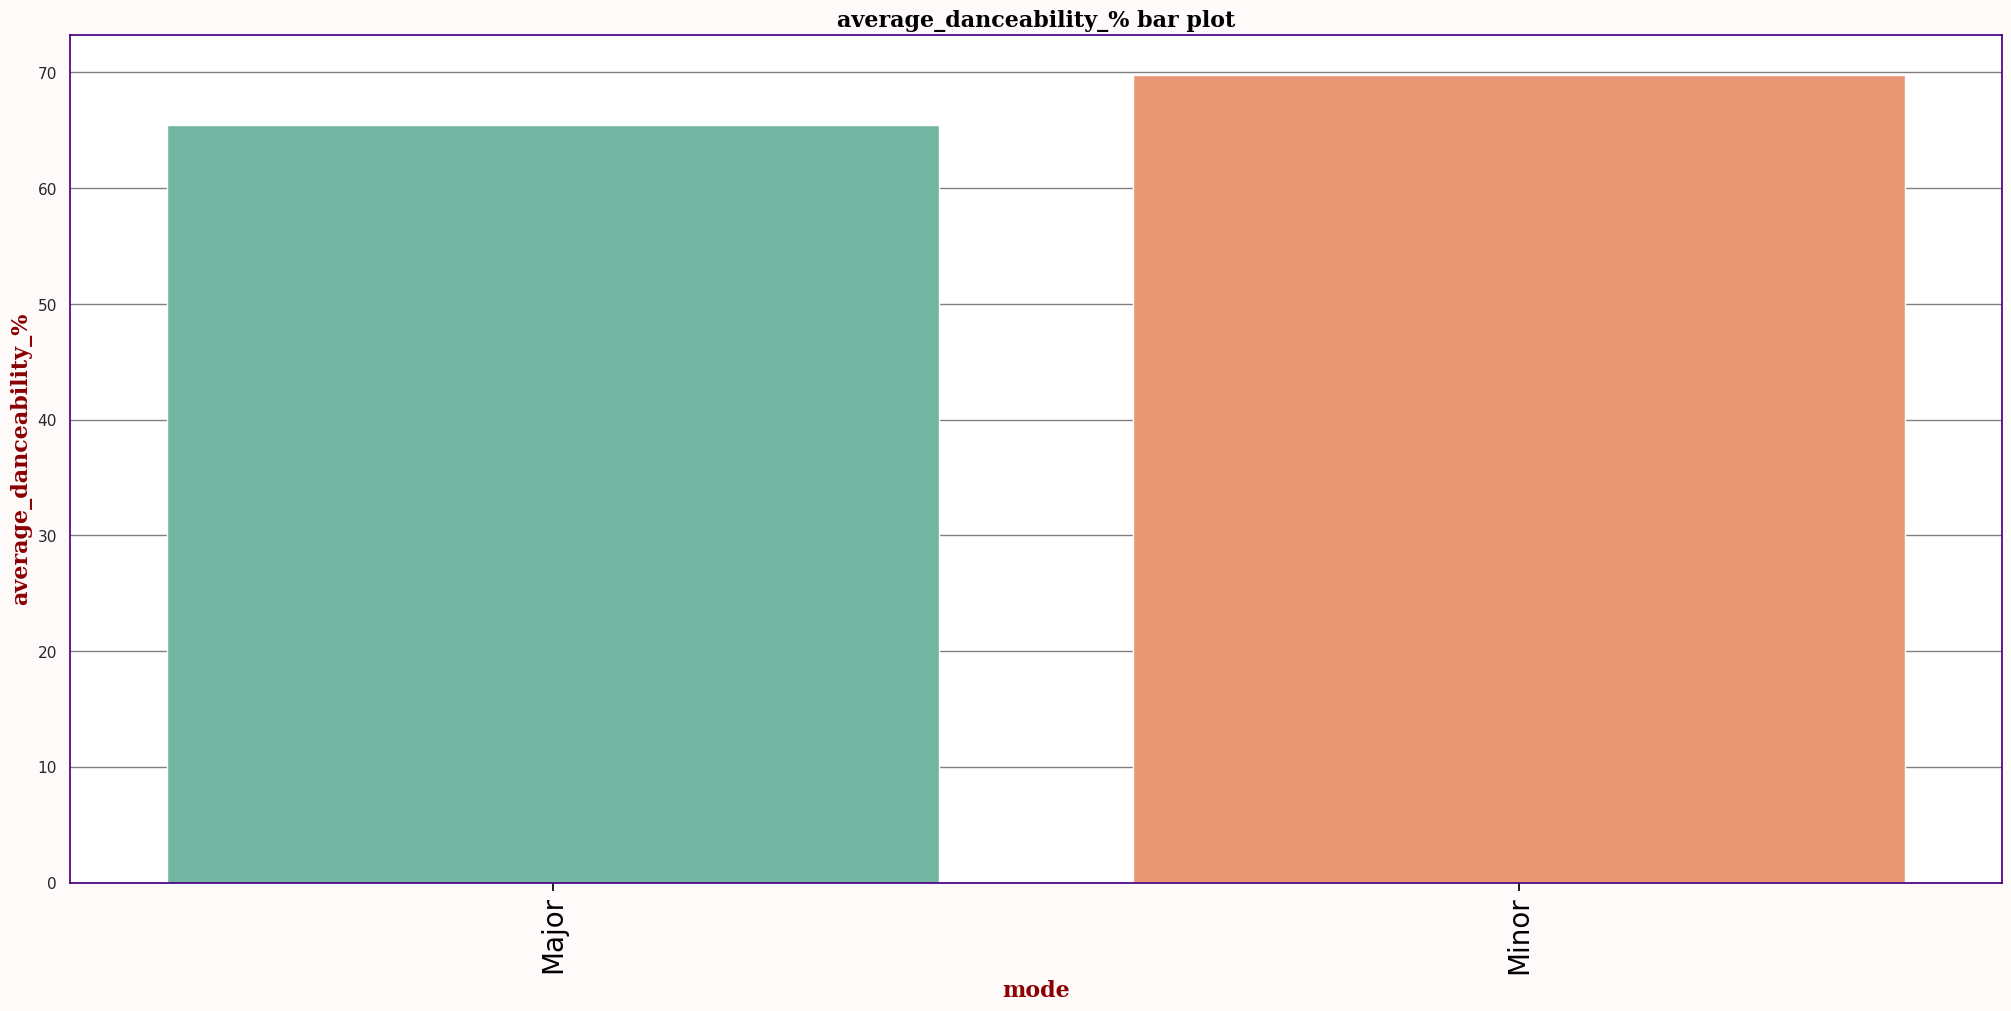

In [674]:
# ordering = group_data.sort_values('average_danceability_%',ascending=False)
plotting_bar(group_data,'mode','average_danceability_%')

In [675]:
group_data = summary_stats(songs_eda,'mode','valence_%')
group_data.head()

mode  total_valence_%  average_valence_%  deviation_valence_%  \
0  Major          22371.0             49.603               23.729   
1  Minor          19386.0             53.112               23.373   

   skewness_level_valence_%  
0                     0.119  
1                    -0.090

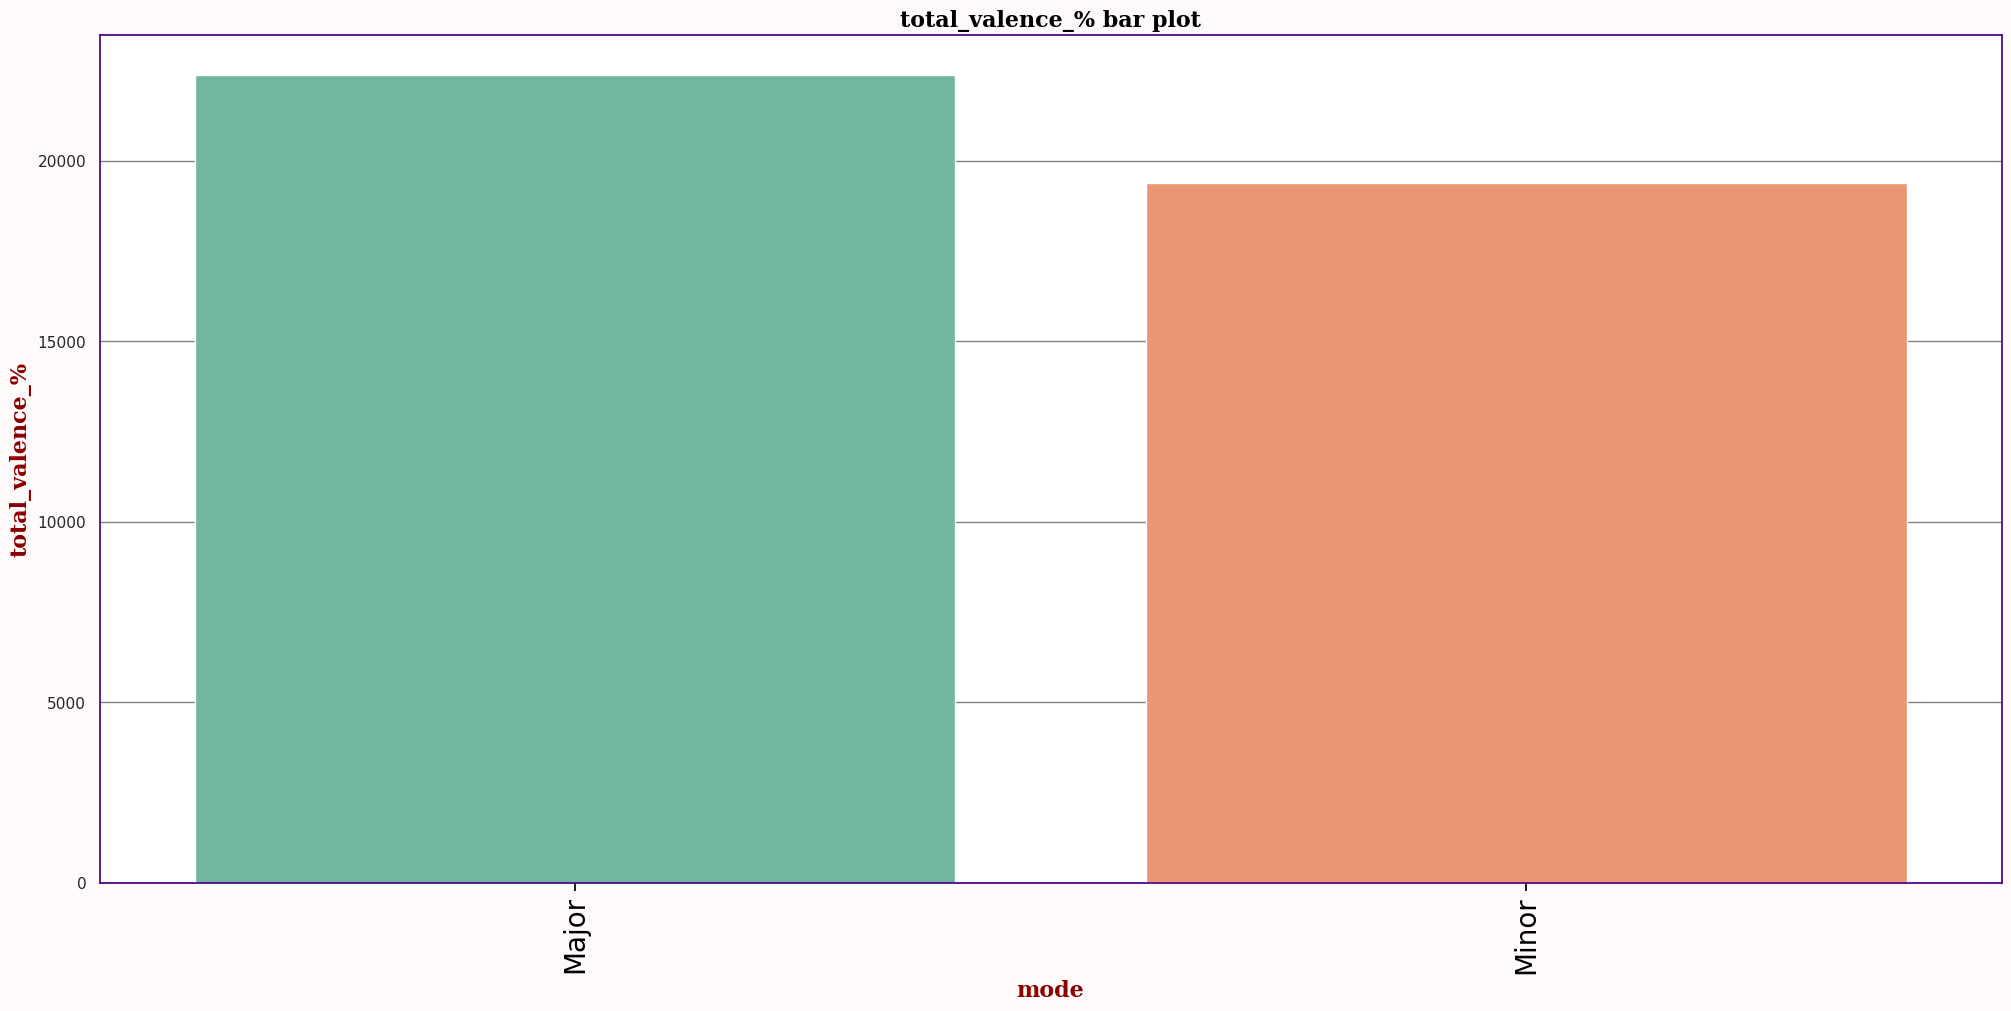

In [676]:
ordering = group_data.sort_values('total_valence_%',ascending=False)
plotting_bar(group_data,'mode','total_valence_%')

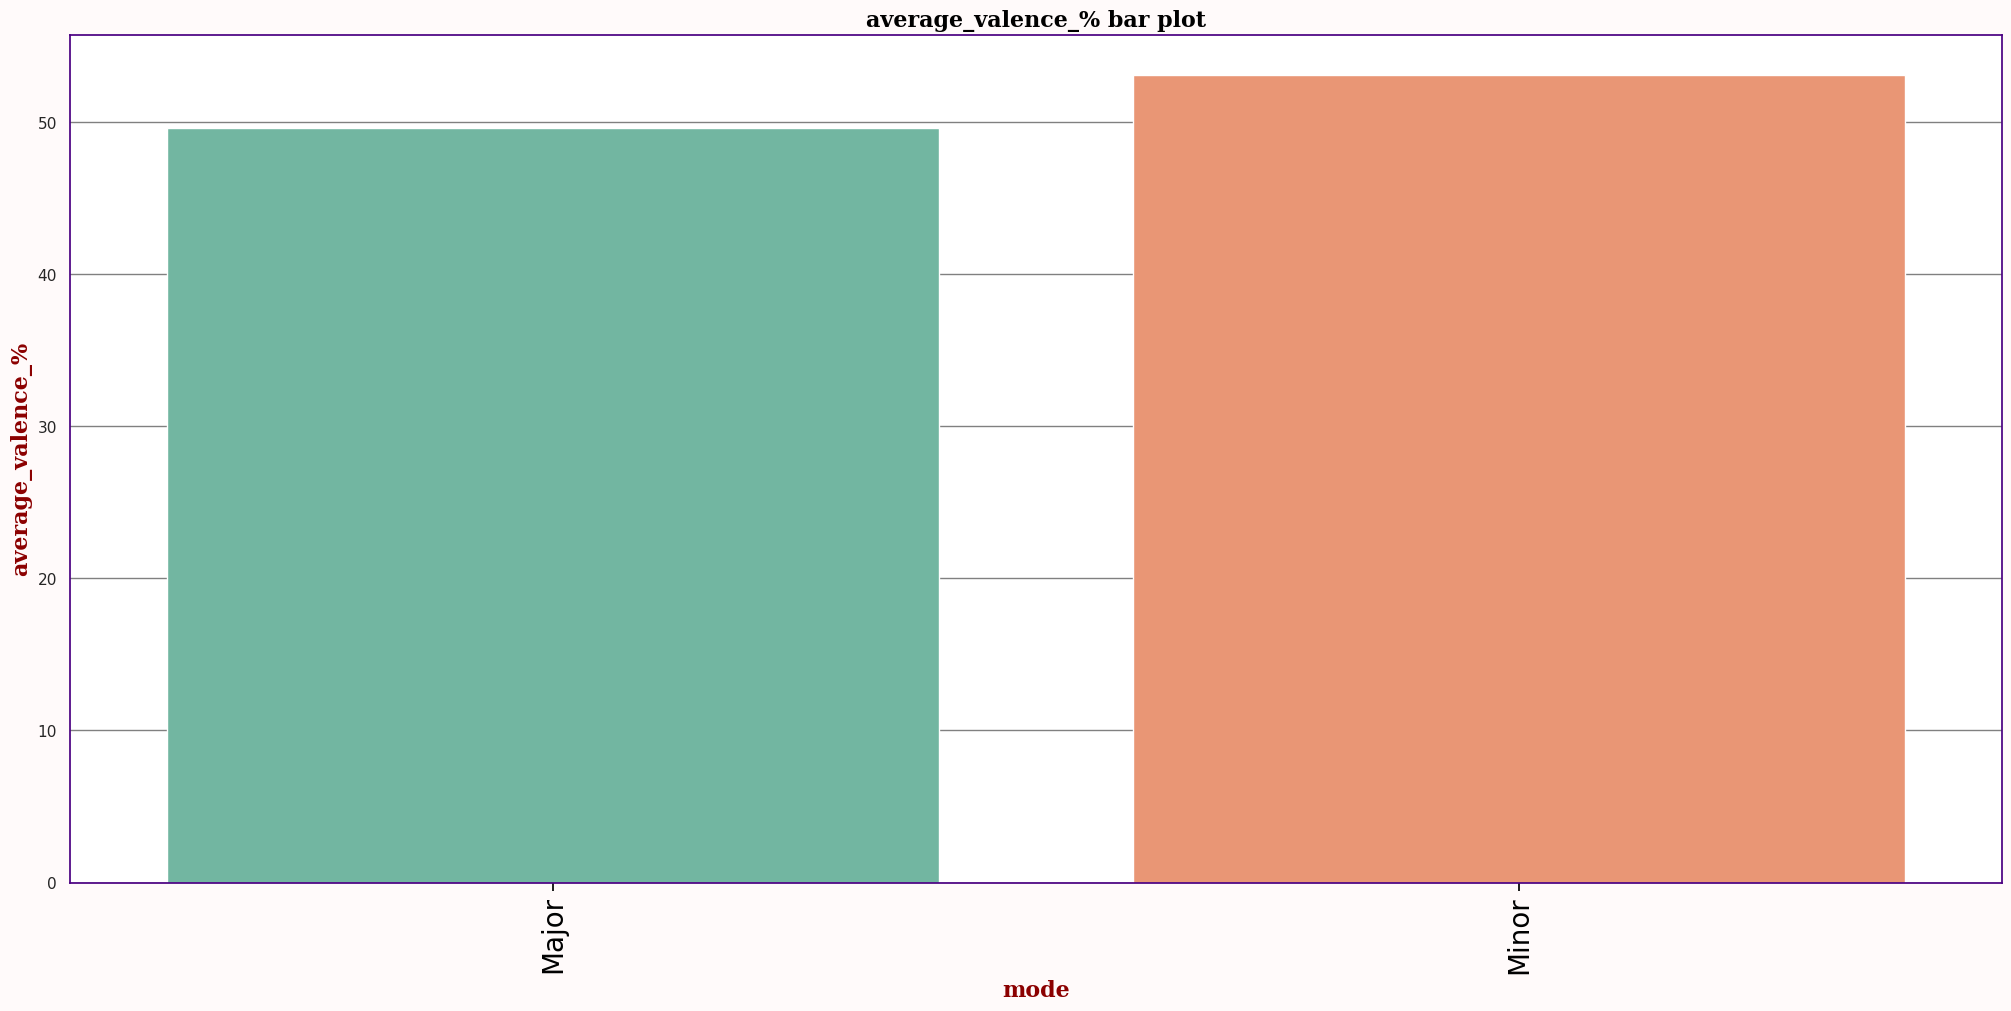

In [677]:
ordering = group_data.sort_values('average_valence_%',ascending=False)
plotting_bar(group_data,'mode','average_valence_%')

In [678]:
group_data = summary_stats(songs_eda,'mode','energy_%')
group_data.head()

mode  total_energy_%  average_energy_%  deviation_energy_%  \
0  Major         28560.0            63.326              16.919   
1  Minor         23955.0            65.630              14.992   

   skewness_level_energy_%  
0                   -0.296  
1                   -0.465

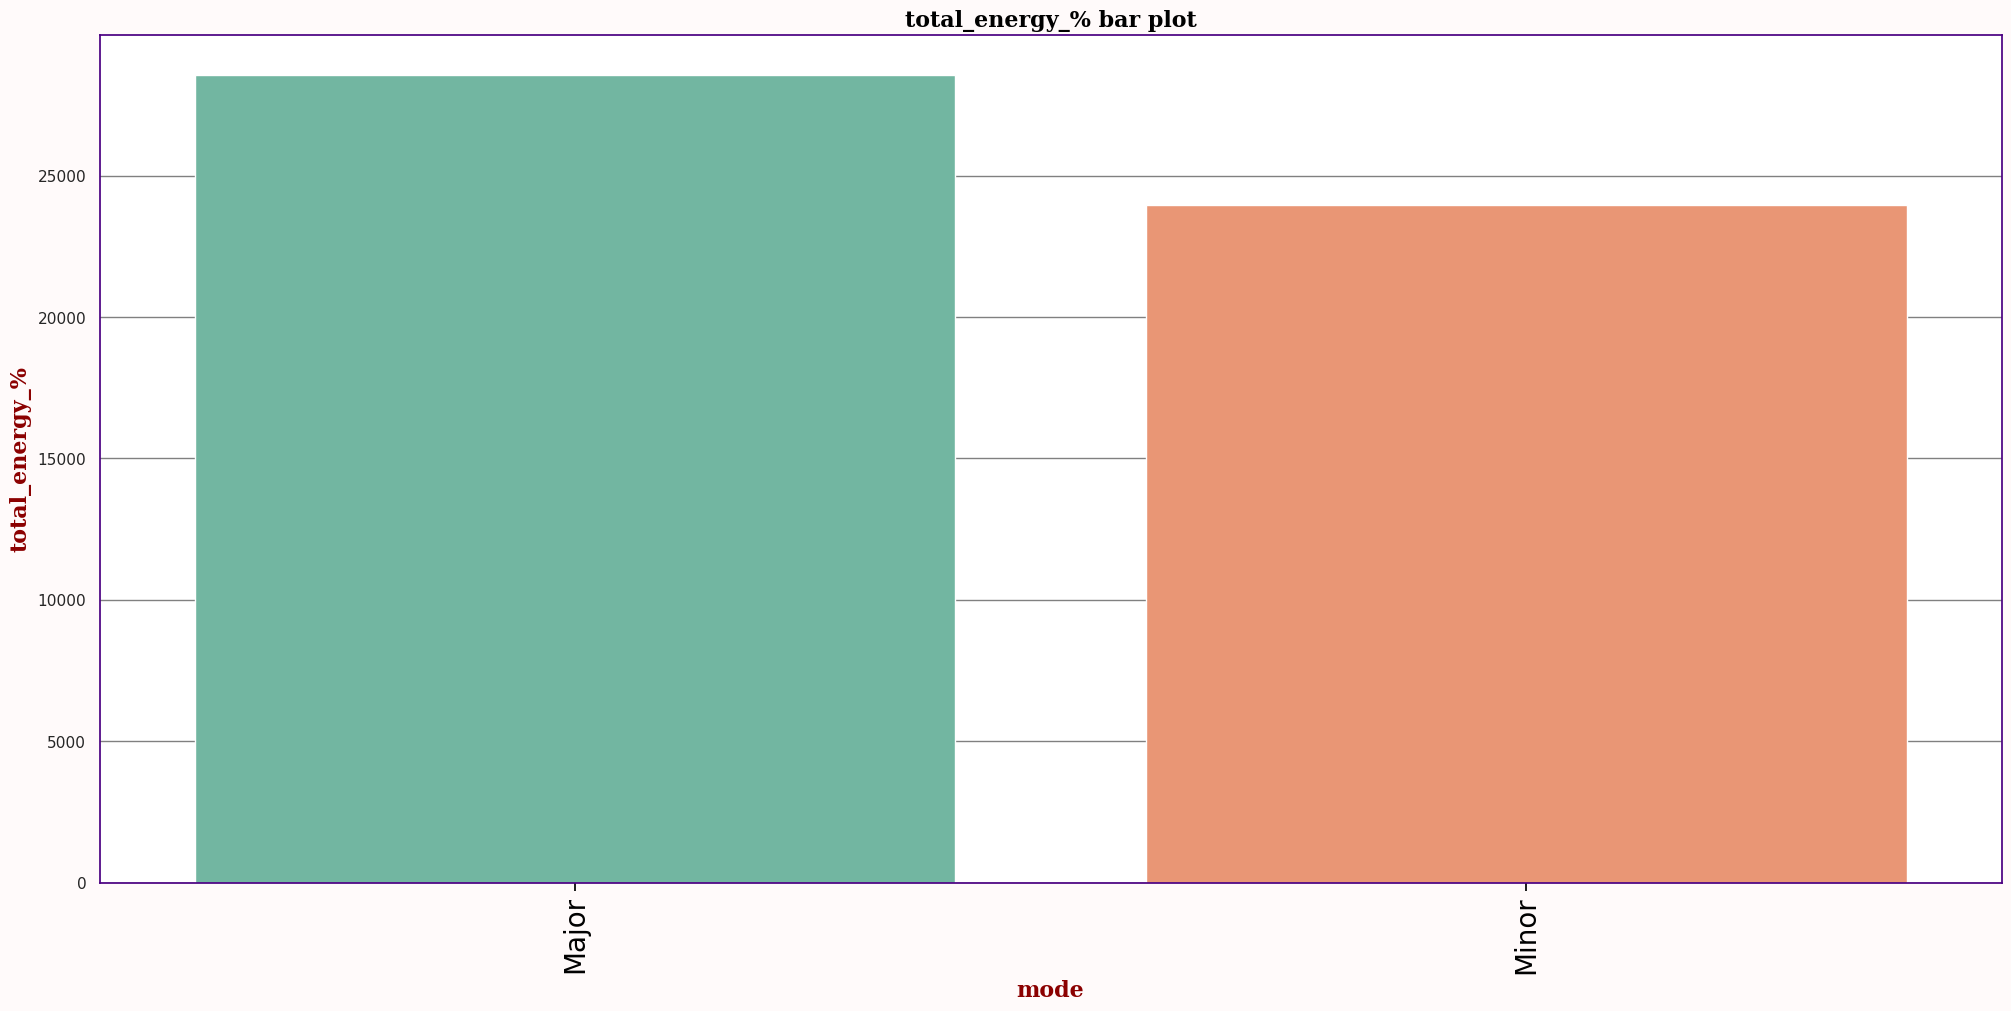

In [679]:
ordering = group_data.sort_values('total_energy_%',ascending=False)
plotting_bar(group_data,'mode','total_energy_%')

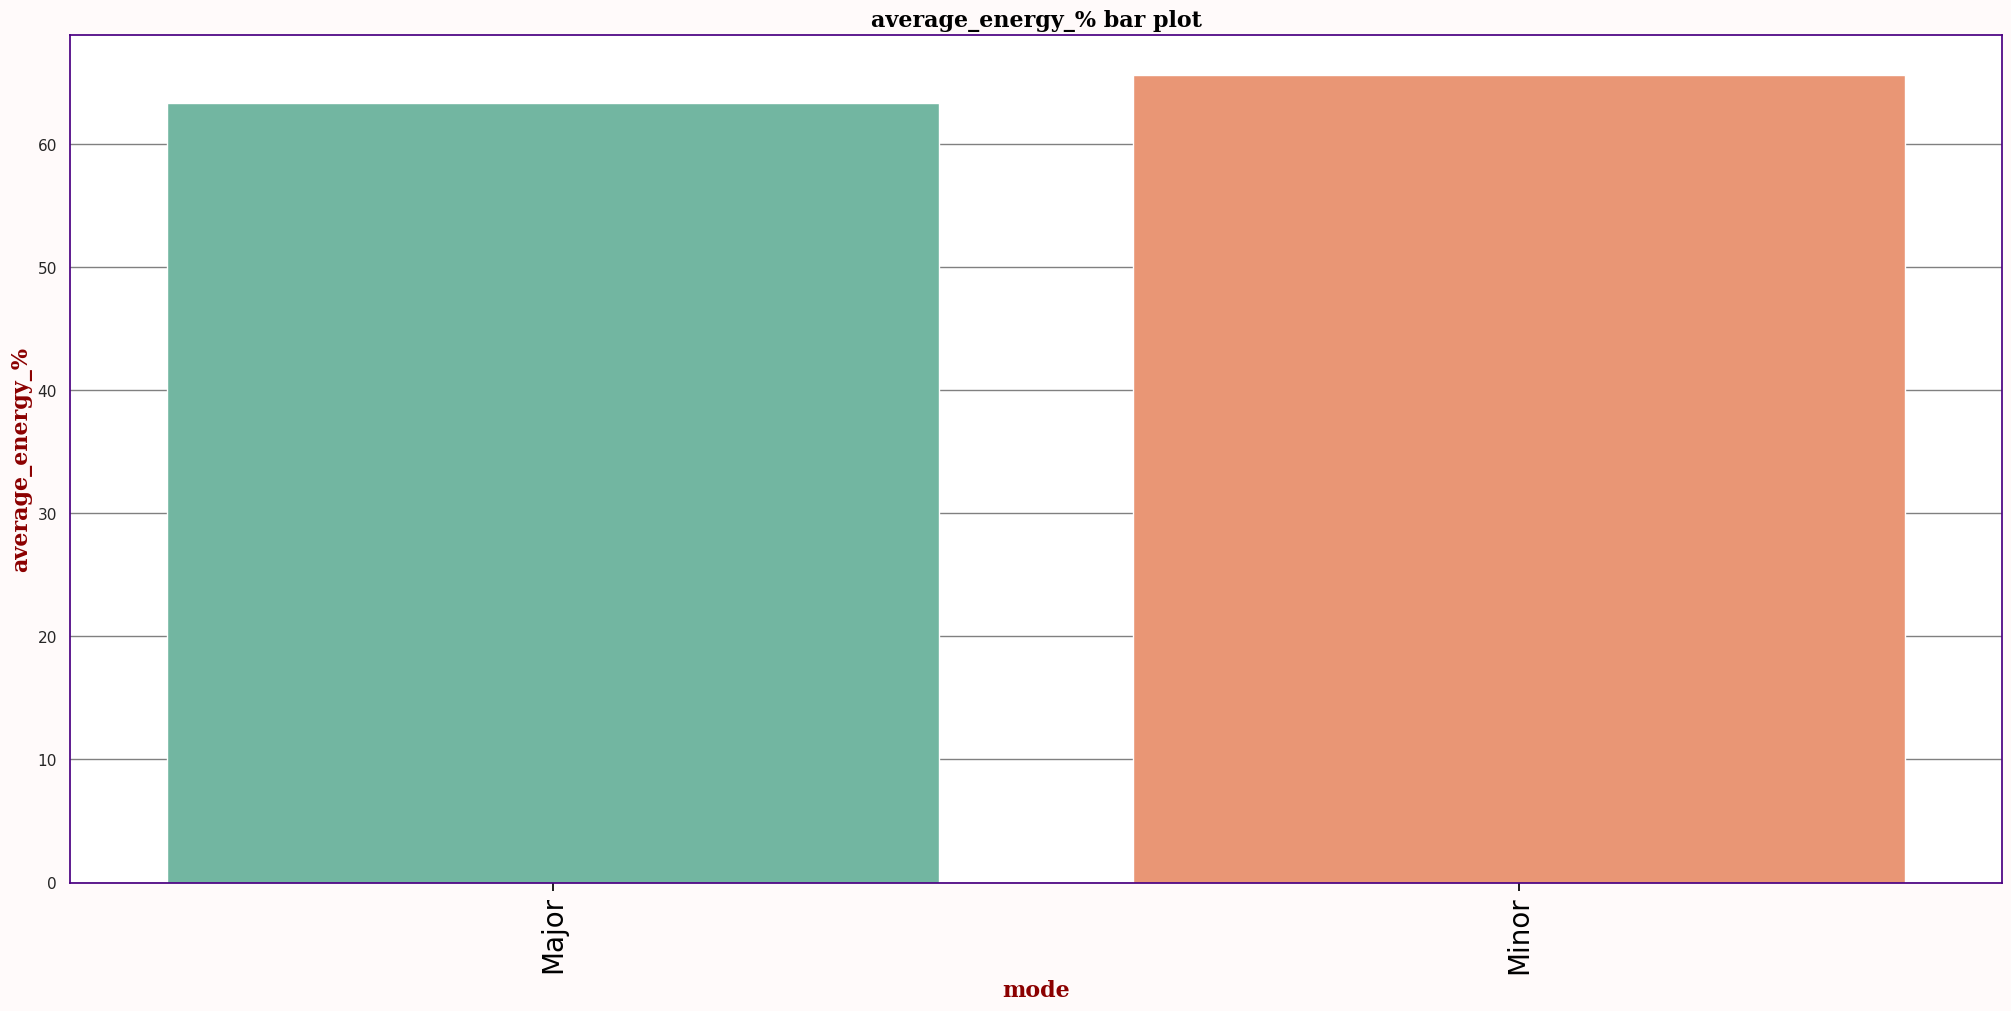

In [680]:
ordering = group_data.sort_values('average_energy_%',ascending=False)
plotting_bar(group_data,'mode','average_energy_%')

In [681]:
group_data = summary_stats(songs_eda,'mode','acousticness_%')
group_data.head()

mode  total_acousticness_%  average_acousticness_%  \
0  Major               12556.0                  27.840   
1  Minor                8932.0                  24.471   

   deviation_acousticness_%  skewness_level_acousticness_%  
0                    26.930                          0.869  
1                    23.463                          1.089

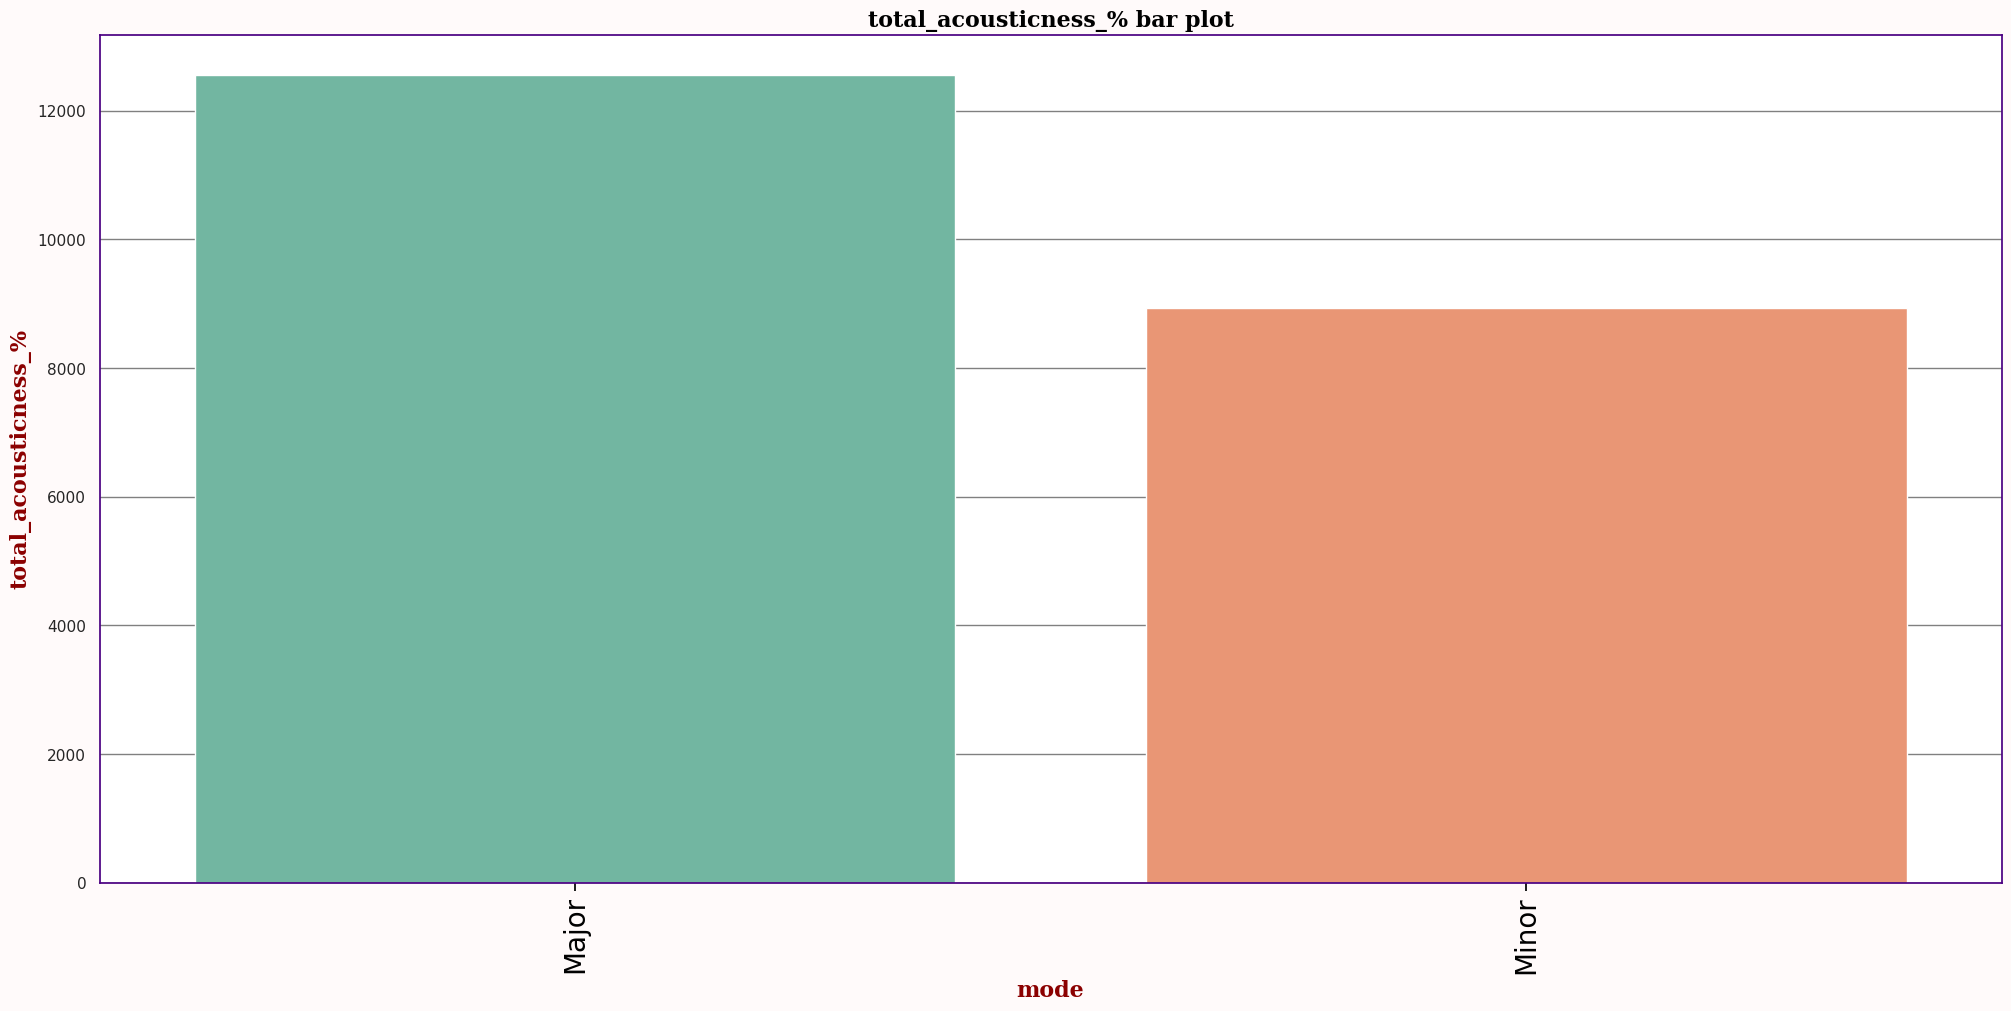

In [682]:
ordering = group_data.sort_values('total_acousticness_%',ascending=False)
plotting_bar(group_data,'mode','total_acousticness_%')

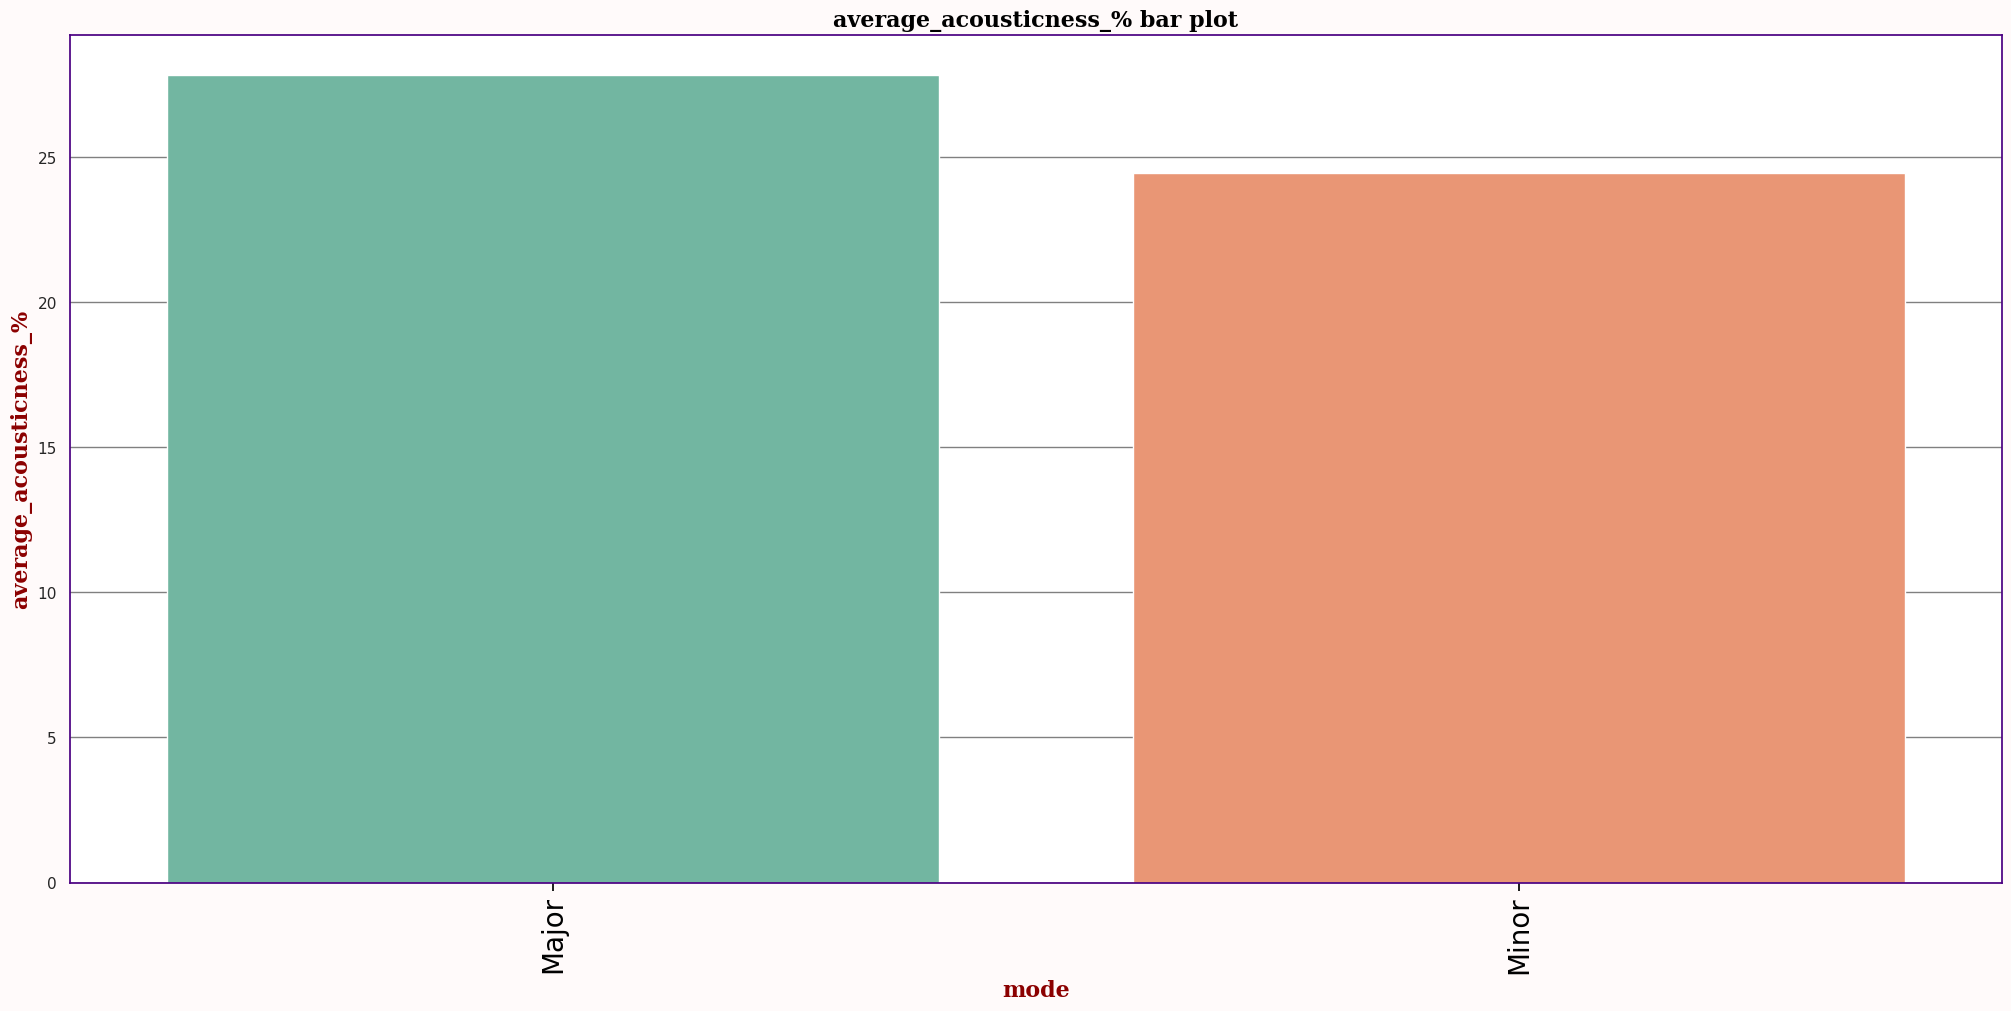

In [683]:
ordering = group_data.sort_values('average_acousticness_%',ascending=False)
plotting_bar(group_data,'mode','average_acousticness_%')

In [684]:
group_data = summary_stats(songs_eda,'mode','instrumentalness_%')
group_data.head()

mode  total_instrumentalness_%  average_instrumentalness_%  \
0  Major                     728.0                       1.614   
1  Minor                     642.0                       1.759   

   deviation_instrumentalness_%  skewness_level_instrumentalness_%  
0                         8.194                              6.886  
1                         9.449                              6.832

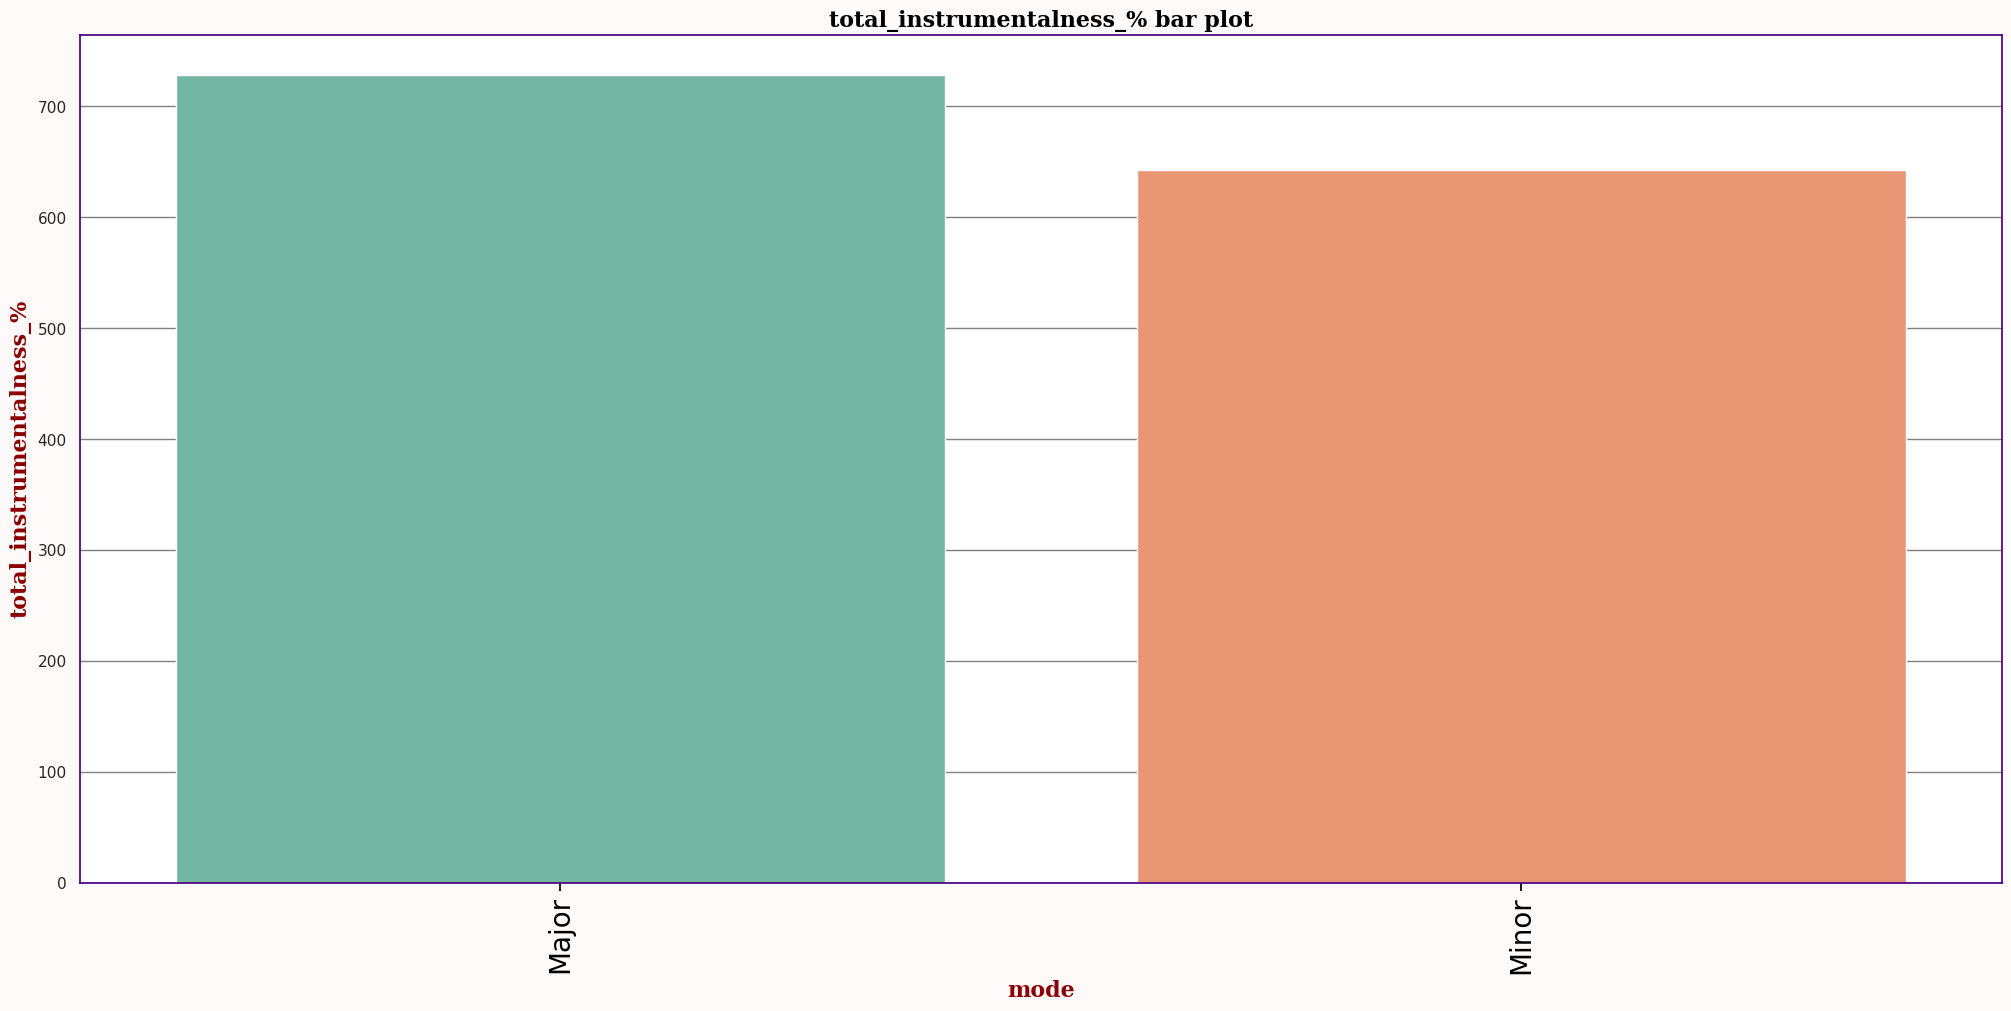

In [685]:
ordering = group_data.sort_values('total_instrumentalness_%',ascending=False)
plotting_bar(group_data,'mode','total_instrumentalness_%')

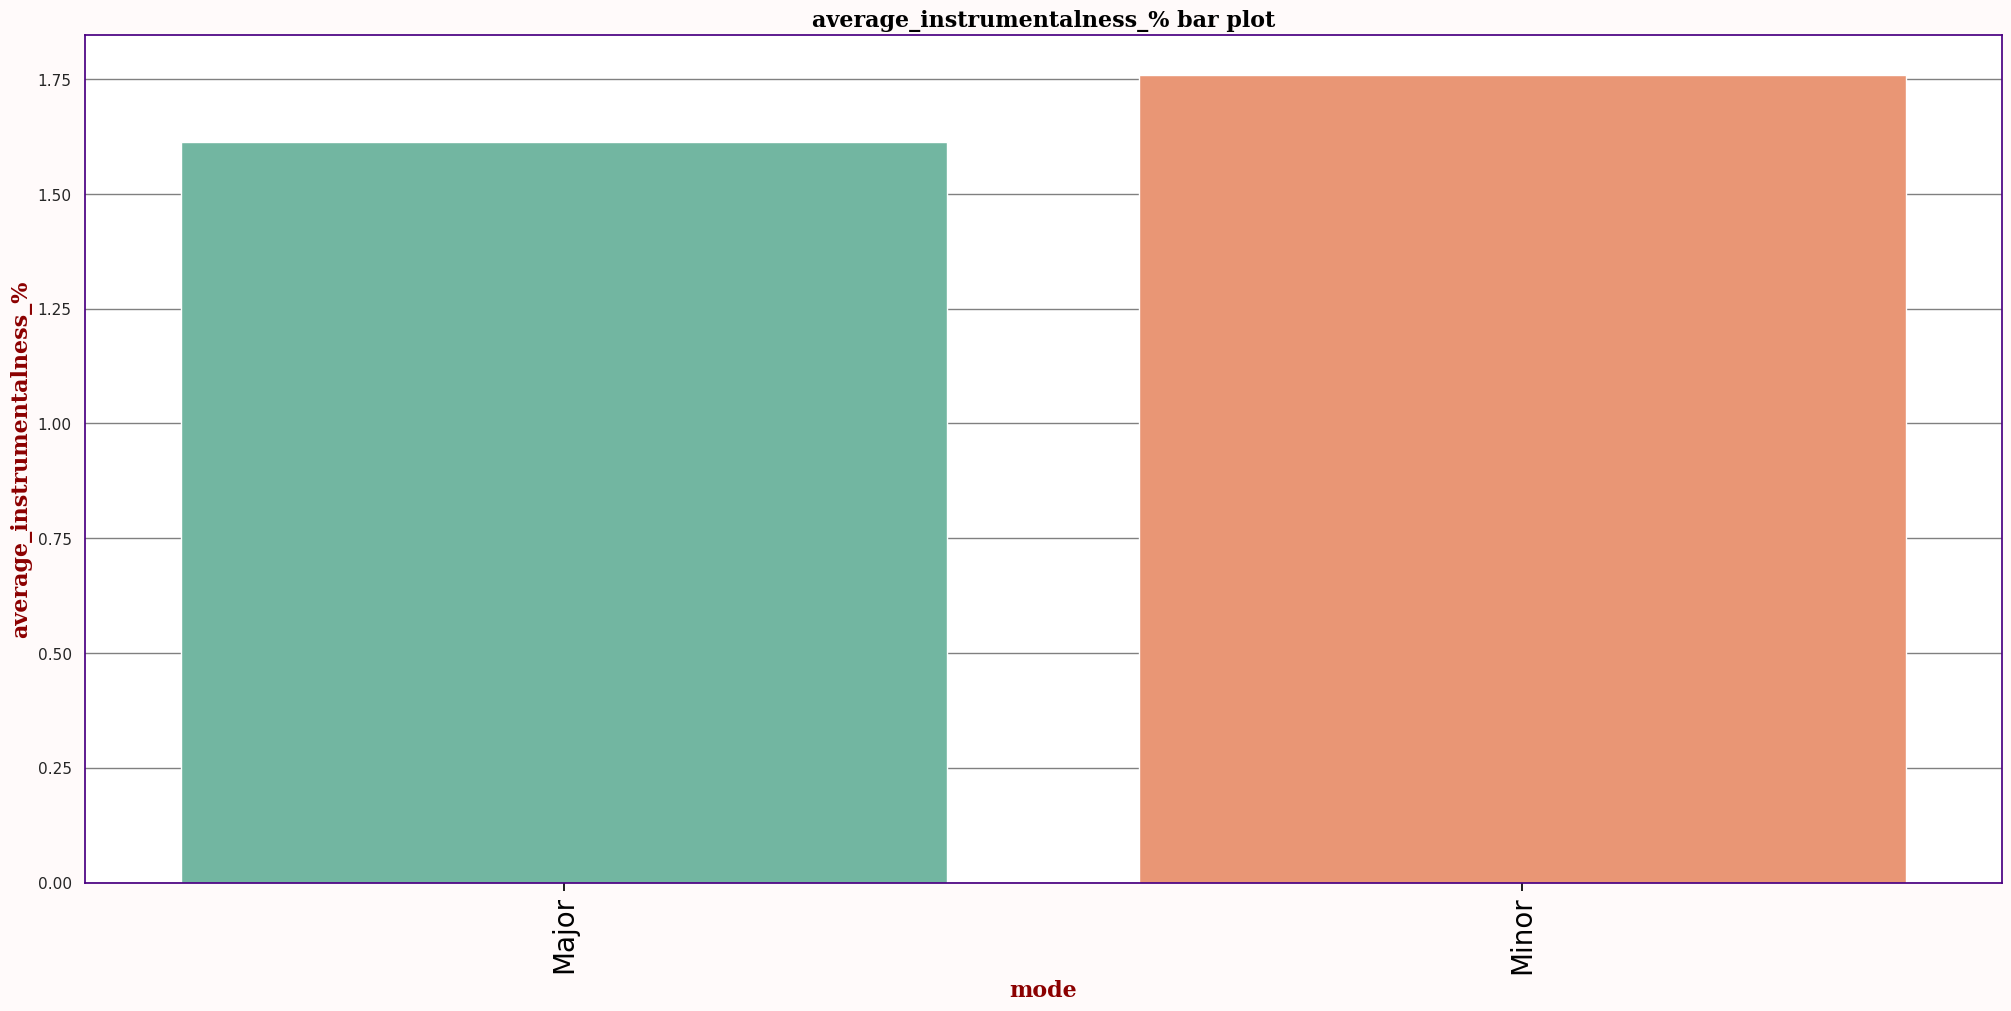

In [686]:
ordering = group_data.sort_values('average_instrumentalness_%',ascending=False)
plotting_bar(group_data,'mode','average_instrumentalness_%')

In [687]:
group_data = summary_stats(songs_eda,'mode','liveness_%')
group_data.head()

mode  total_liveness_%  average_liveness_%  deviation_liveness_%  \
0  Major            8248.0              18.288                13.429   
1  Minor            6579.0              18.025                13.716   

   skewness_level_liveness_%  
0                      2.133  
1                      2.143

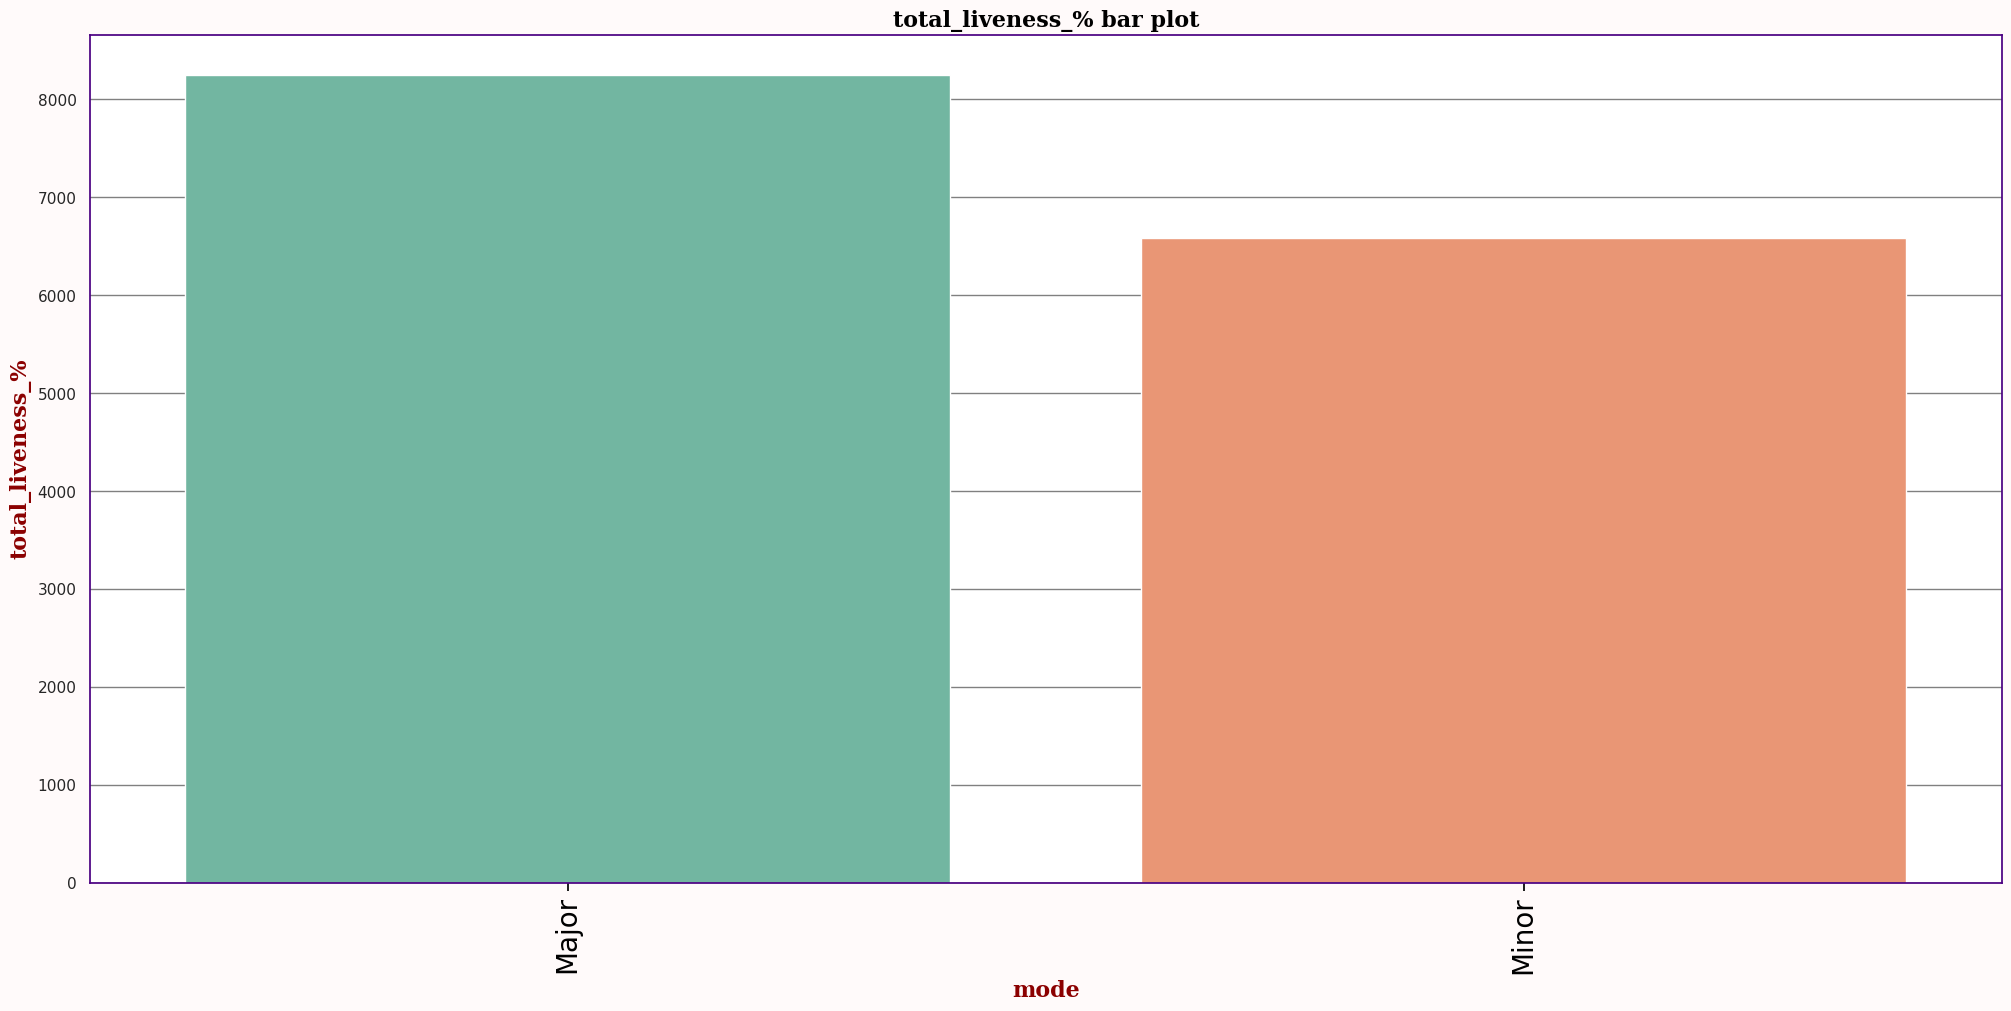

In [688]:
ordering = group_data.sort_values('total_liveness_%',ascending=False)
plotting_bar(group_data,'mode','total_liveness_%')

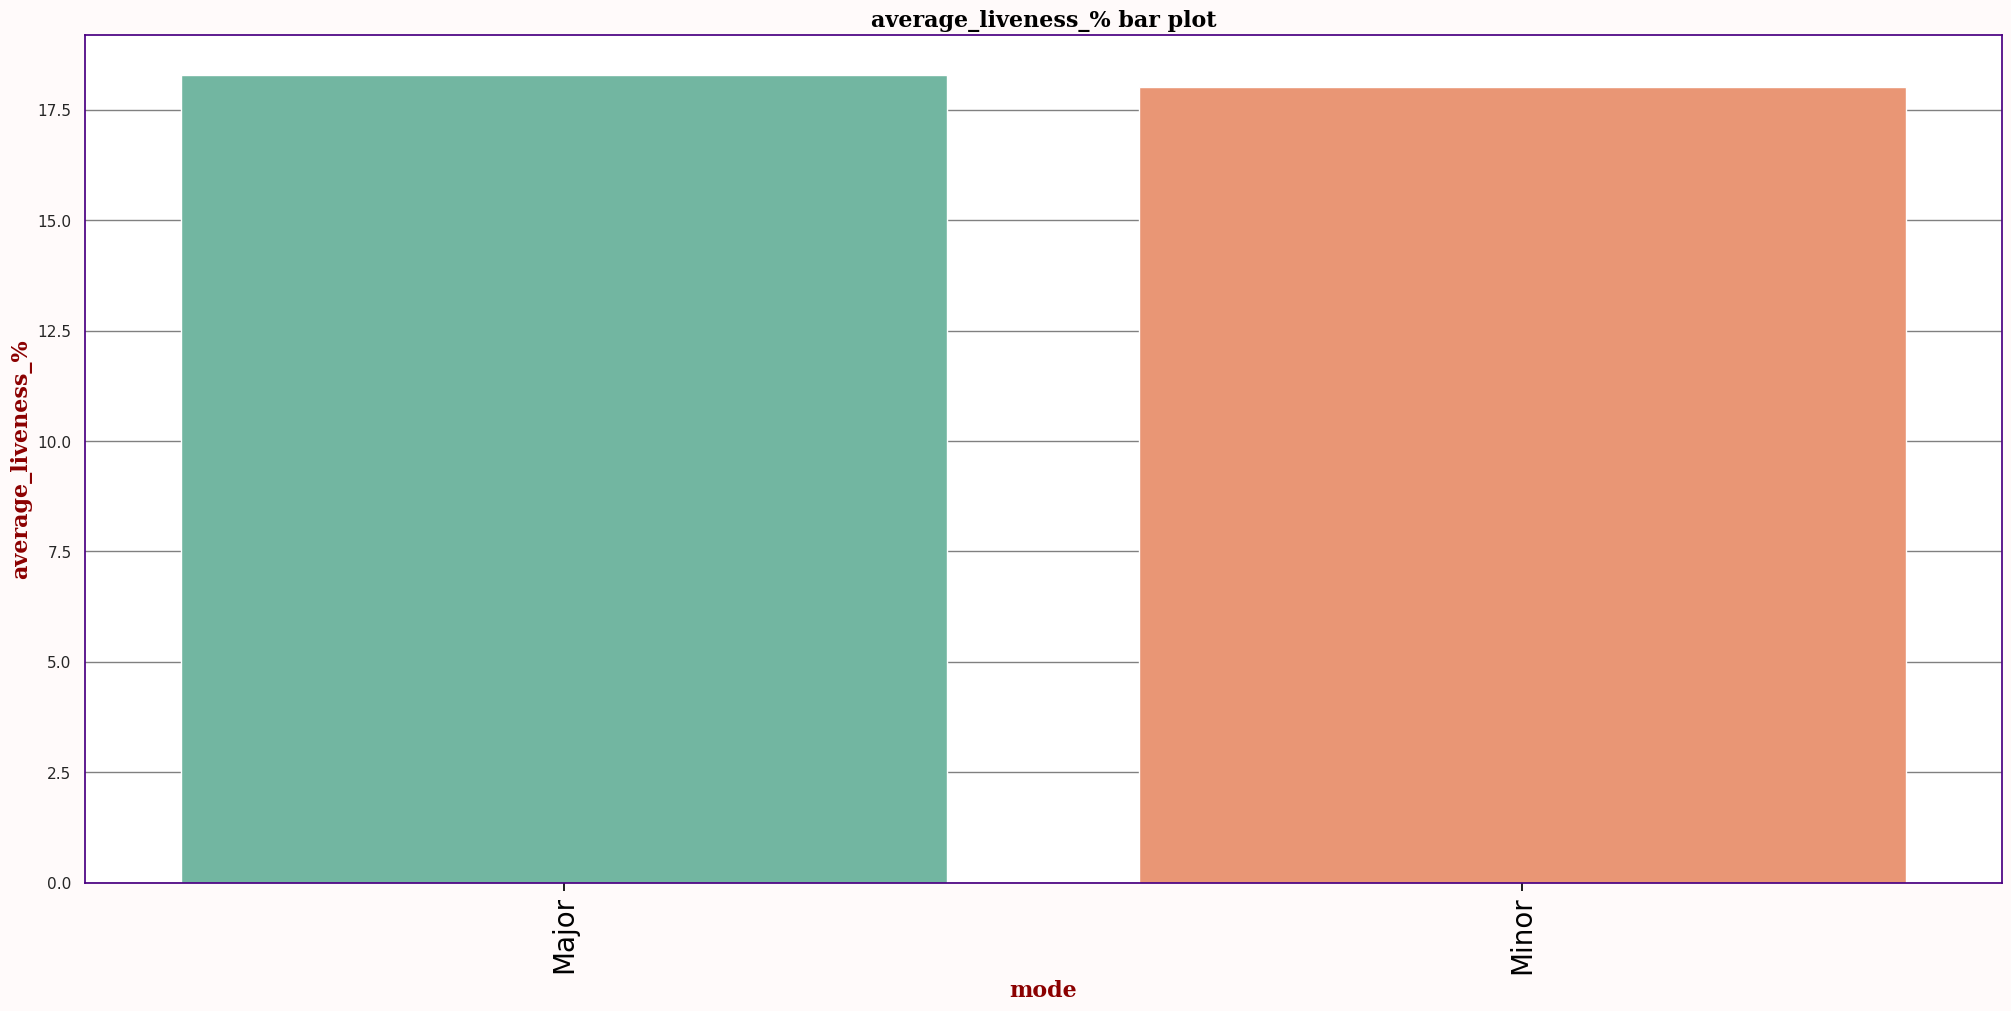

In [689]:
ordering = group_data.sort_values('average_liveness_%',ascending=False)
plotting_bar(group_data,'mode','average_liveness_%')

In [690]:
group_data = summary_stats(songs_eda,'mode','speechiness_%')
group_data.head()

mode  total_speechiness_%  average_speechiness_%  deviation_speechiness_%  \
0  Major               4381.0                  9.714                    9.741   
1  Minor               4216.0                 11.551                   10.715   

   skewness_level_speechiness_%  
0                         1.986  
1                         1.679

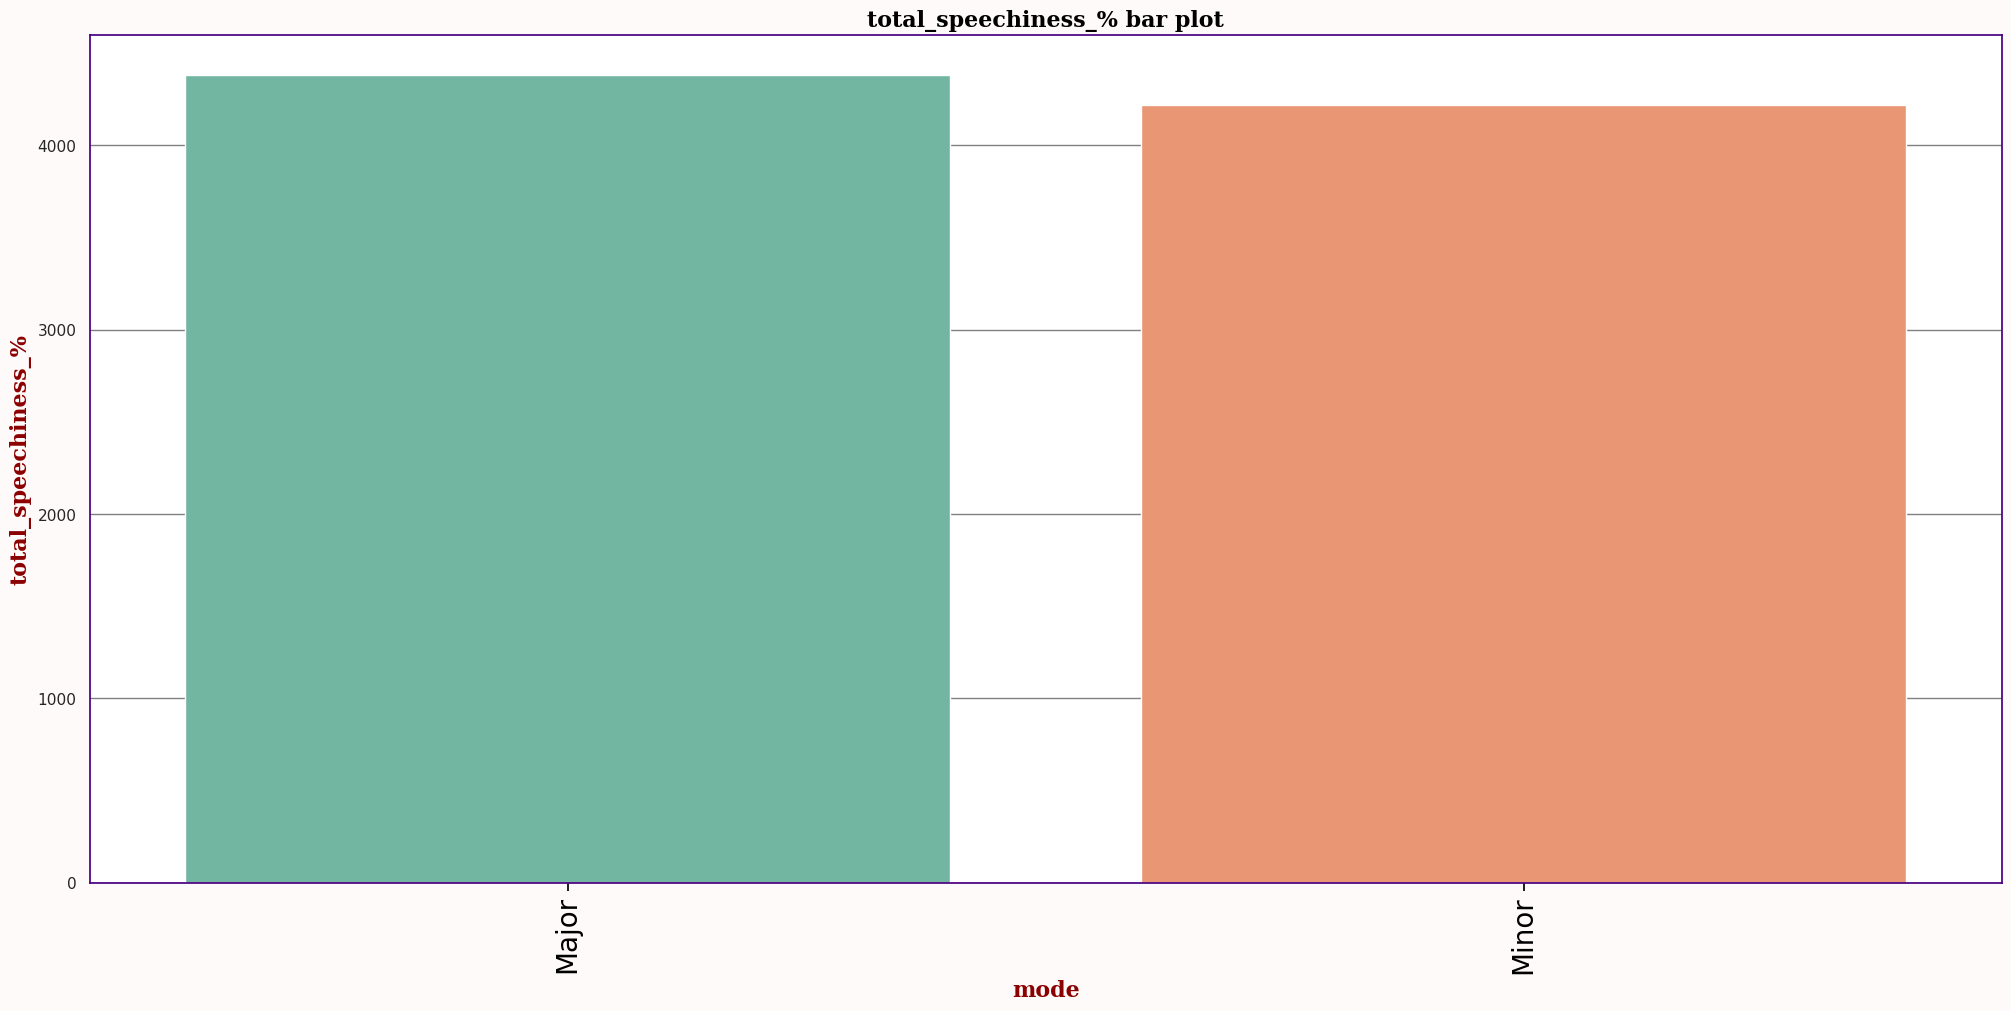

In [691]:
ordering = group_data.sort_values('total_speechiness_%',ascending=False)
plotting_bar(group_data,'mode','total_speechiness_%')

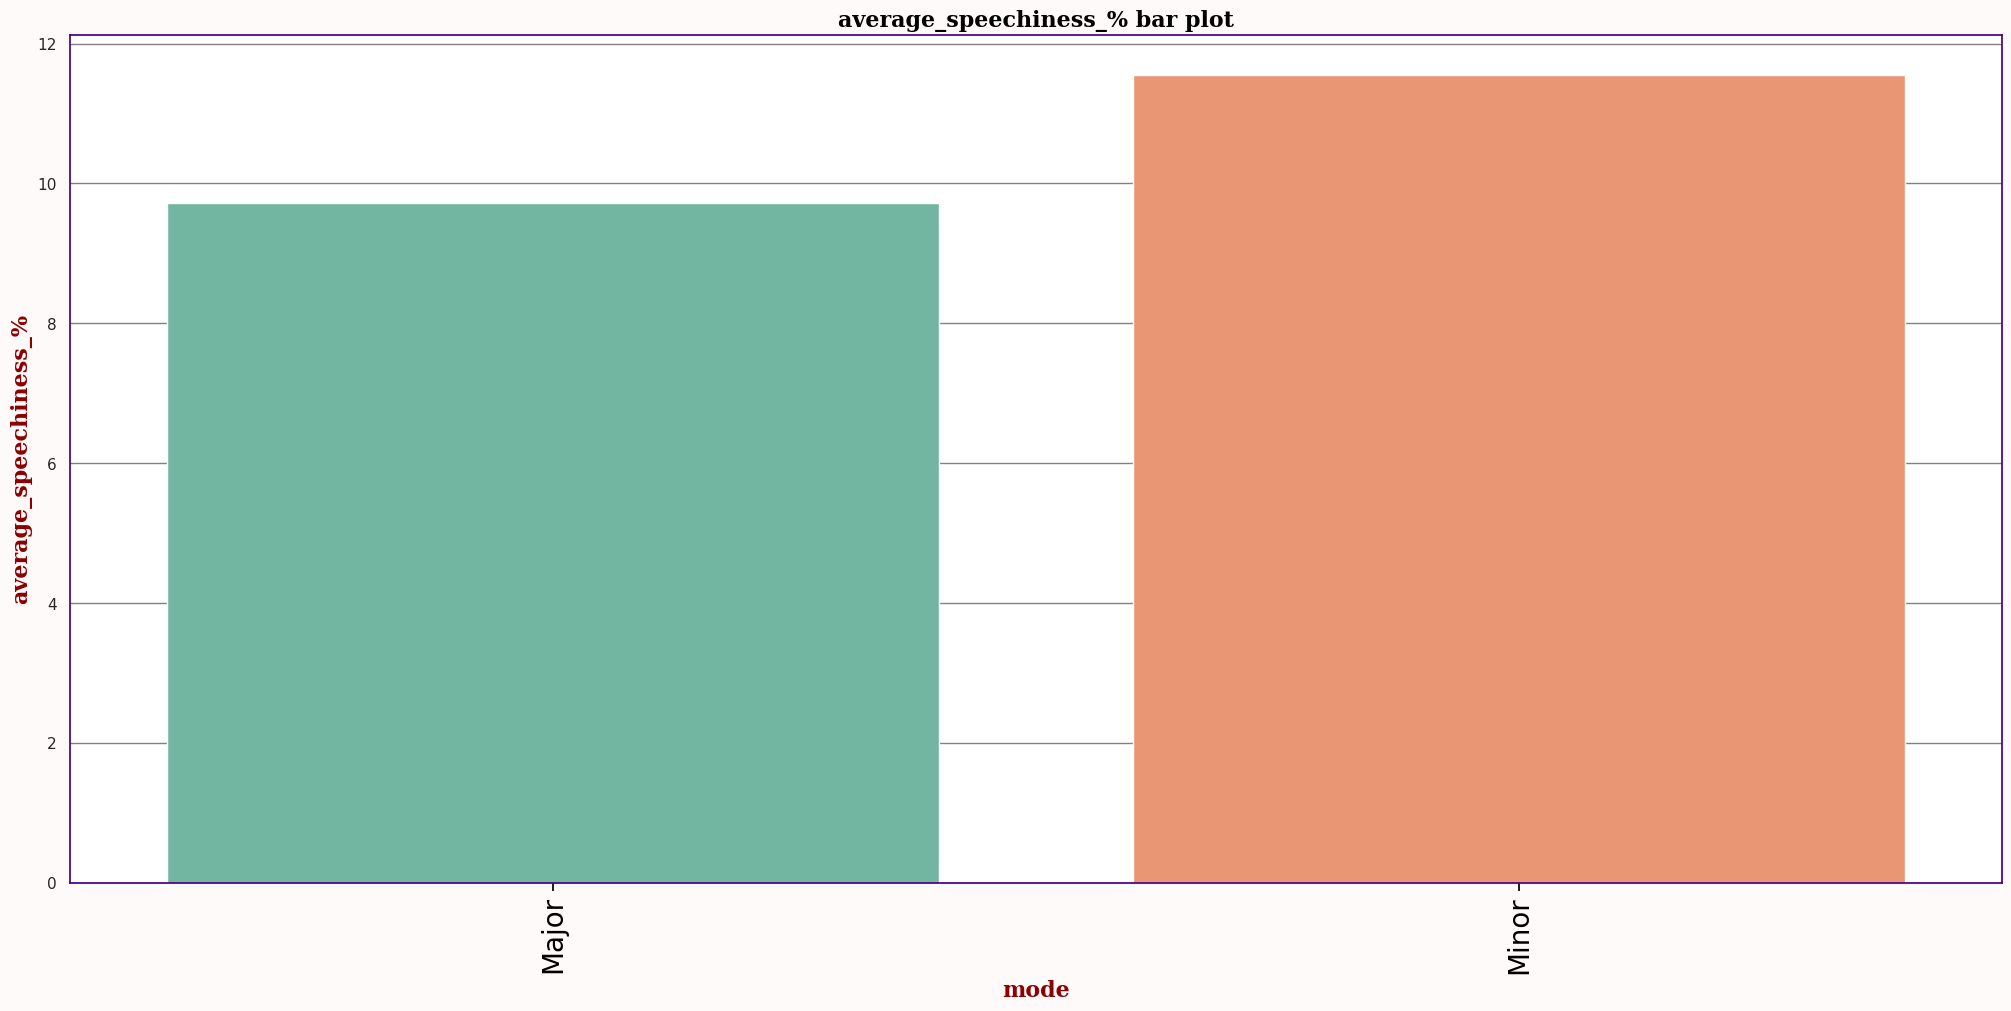

In [692]:
ordering = group_data.sort_values('average_speechiness_%',ascending=False)
plotting_bar(group_data,'mode','average_speechiness_%')

In [693]:
group_data = summary_stats(songs_eda,'mode','mode')
group_data.sort_values(by='count_total_mode',ascending=False)

mode  count_total_mode
0  Major               451
1  Minor               365

In [390]:
group_data = summary_stats(songs_eda,'key','key')
group_data.sort_values(by='count_total_key',ascending=False)

key  count_total_key
3   C#              115
9    G               91
7    F               87
10  G#               85
4    D               78
2    B               77
0    A               70
8   F#               69
6    E               59
1   A#               55
5   D#               30

In [405]:
songs_eda.groupby(['key','mode'])['mode'].agg([
    (f"total_count",'count')
]).sort_values(by='key', ascending=True)

total_count
key mode              
A   Major           40
    Minor           30
A#  Major           25
    Minor           30
B   Major           33
    Minor           44
C#  Major           69
    Minor           46
D   Major           63
    Minor           15
D#  Minor           19
    Major           11
E   Major           15
    Minor           44
F   Major           44
    Minor           43
F#  Major           30
    Minor           39
G   Major           62
    Minor           29
G#  Major           59
    Minor           26

In [408]:
print(songs_eda.released_year.dtype)
print(songs_eda.released_month.dtype)
print(songs_eda.released_day.dtype)

int16
int8
int8


In [413]:
songs_eda.groupby('released_year')['released_year'].agg([
    (f"total_count",'count')
]).reset_index().sort_values('total_count',ascending=False).head(10)

released_year  total_count
44           2022          359
45           2023          159
43           2021           95
41           2019           27
42           2020           23
39           2017           19
38           2016           17
36           2014           12
35           2013           10
40           2018            9

In [414]:
mapping_months = {
    1: "January",2: "February",3: "March",4: "April",5: "May",
    6: "June",7: "July",8: "August",9: "September",10: "October",11: "November",12: "December"
}

songs_eda.released_month = songs_eda.released_month.map(mapping_months).astype('category')

In [422]:
songs_eda.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   track_name            816 non-null    category
 1   artist(s)_name        816 non-null    category
 2   artist_count          816 non-null    int8    
 3   released_year         816 non-null    int16   
 4   released_month        816 non-null    category
 5   released_day          816 non-null    int8    
 6   in_spotify_playlists  816 non-null    int32   
 7   in_spotify_charts     816 non-null    int16   
 8   streams               816 non-null    int64   
 9   in_apple_playlists    816 non-null    int16   
 10  in_apple_charts       816 non-null    int16   
 11  in_deezer_playlists   816 non-null    int16   
 12  in_deezer_charts      816 non-null    int8    
 13  in_shazam_charts      816 non-null    int16   
 14  bpm                   816 non-null    int16   
 15  key   

In [418]:
# percentage increaase
np.round(((229.6-196.3)/196.3) * 100,1)

17.0

Memory usage has increased from 196.3 KB to 229.6 KB i.e. **17.0% increase in memory usage**

In [423]:
print(songs_eda.released_year.dtype)
print(songs_eda.released_month.dtype)
print(songs_eda.released_day.dtype)

int16
category
int8


In [424]:
group_data = summary_stats(songs_eda,'released_month','released_month')
group_data.sort_values(by='count_total_released_month',ascending=False)

released_month  count_total_released_month
8             May                         114
4         January                         112
6            June                          73
7           March                          73
2        December                          68
9        November                          66
0           April                          63
10        October                          63
3        February                          53
5            July                          47
11      September                          46
1          August                          38

In [426]:
songs_eda.groupby(['released_month','mode'])['mode'].agg([
    (f"total_count",'count')
])

total_count
released_month mode              
April          Major           39
               Minor           24
August         Major           22
               Minor           16
December       Major           38
               Minor           30
February       Major           24
               Minor           29
January        Major           54
               Minor           58
July           Major           30
               Minor           17
June           Major           34
               Minor           39
March          Major           42
               Minor           31
May            Major           57
               Minor           57
November       Major           42
               Minor           24
October        Major           40
               Minor           23
September      Major           29
               Minor           17

In [430]:
# songs_eda.groupby(['key','released_month'])['released_month'].agg([
#     (f"total_count",'count')
# ])
# Plot a graph instead

### **Visualisations**

In [445]:
num = songs_eda.select_dtypes(exclude=pd.CategoricalDtype).columns.to_list()
cat = songs_eda.select_dtypes(include=pd.CategoricalDtype).columns.to_list()

In [446]:
len(num)

19

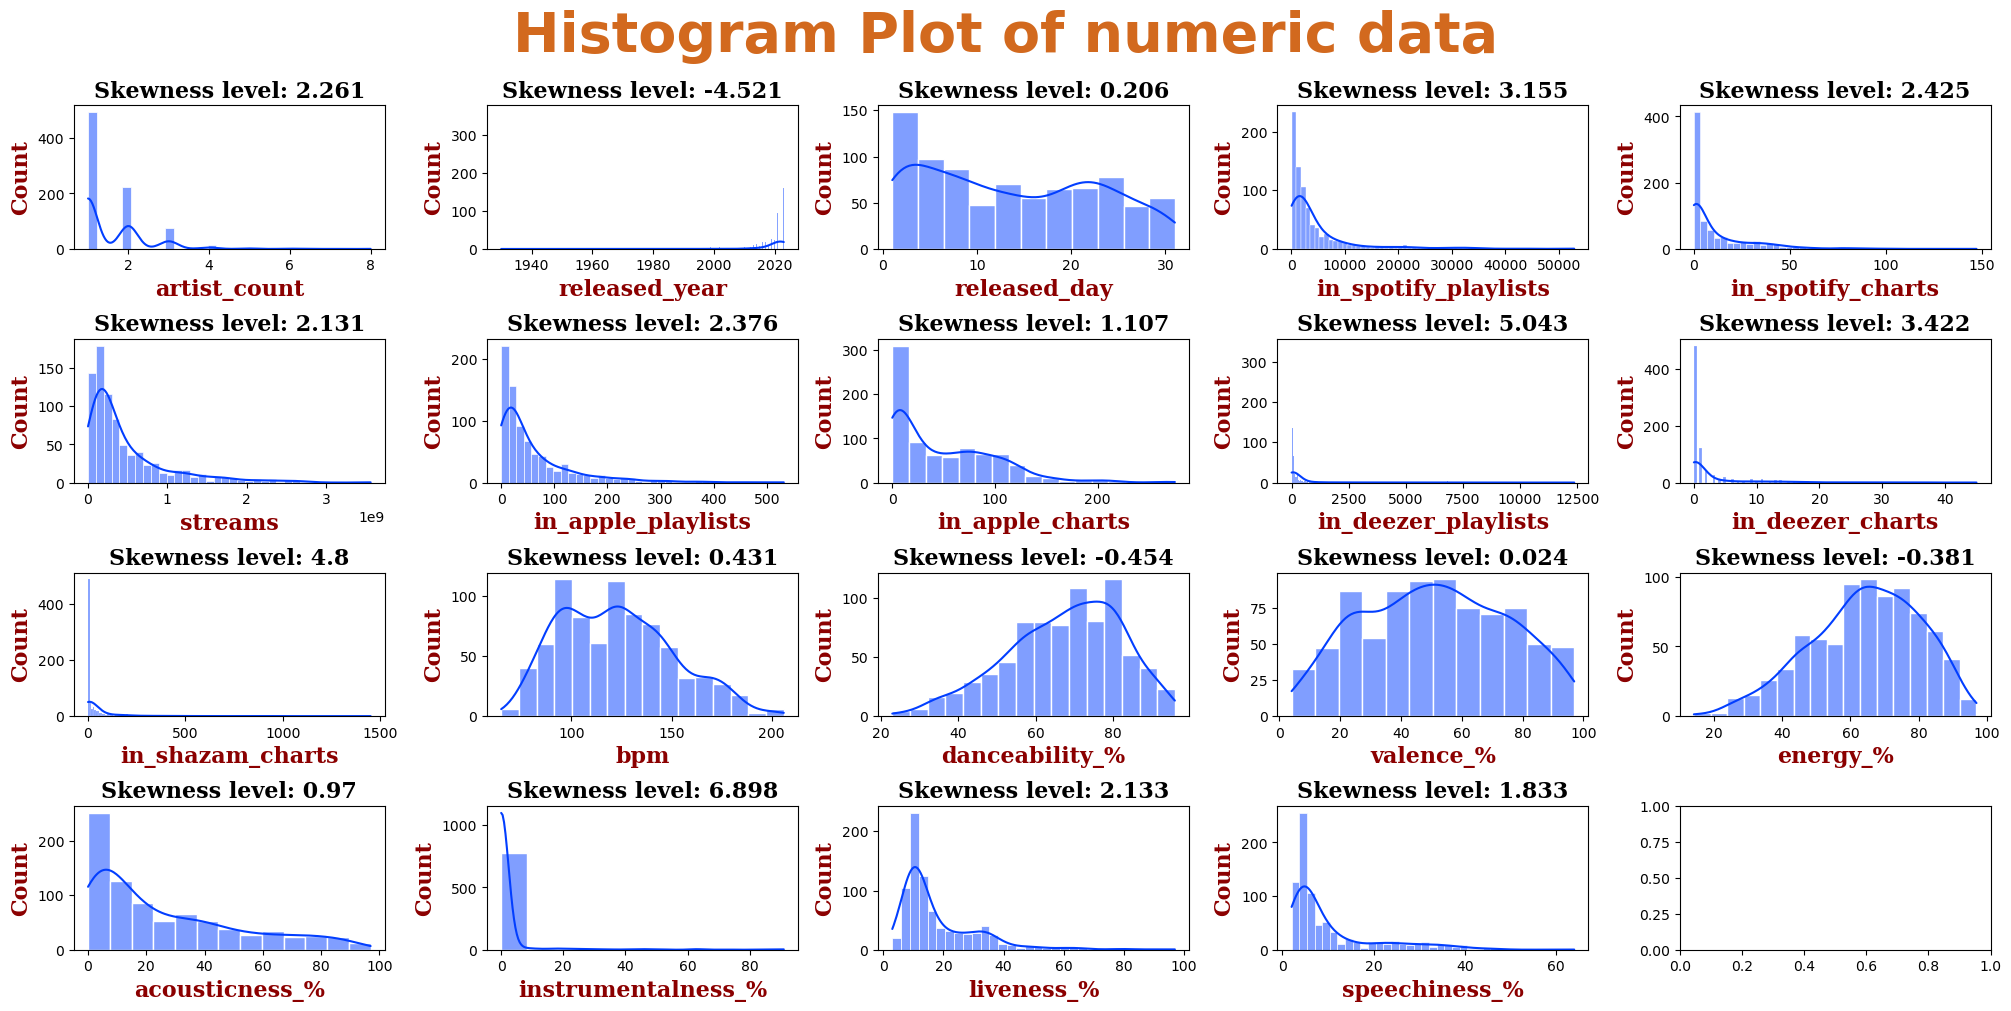

In [448]:
plotting_hist(songs_eda,4,5,num)

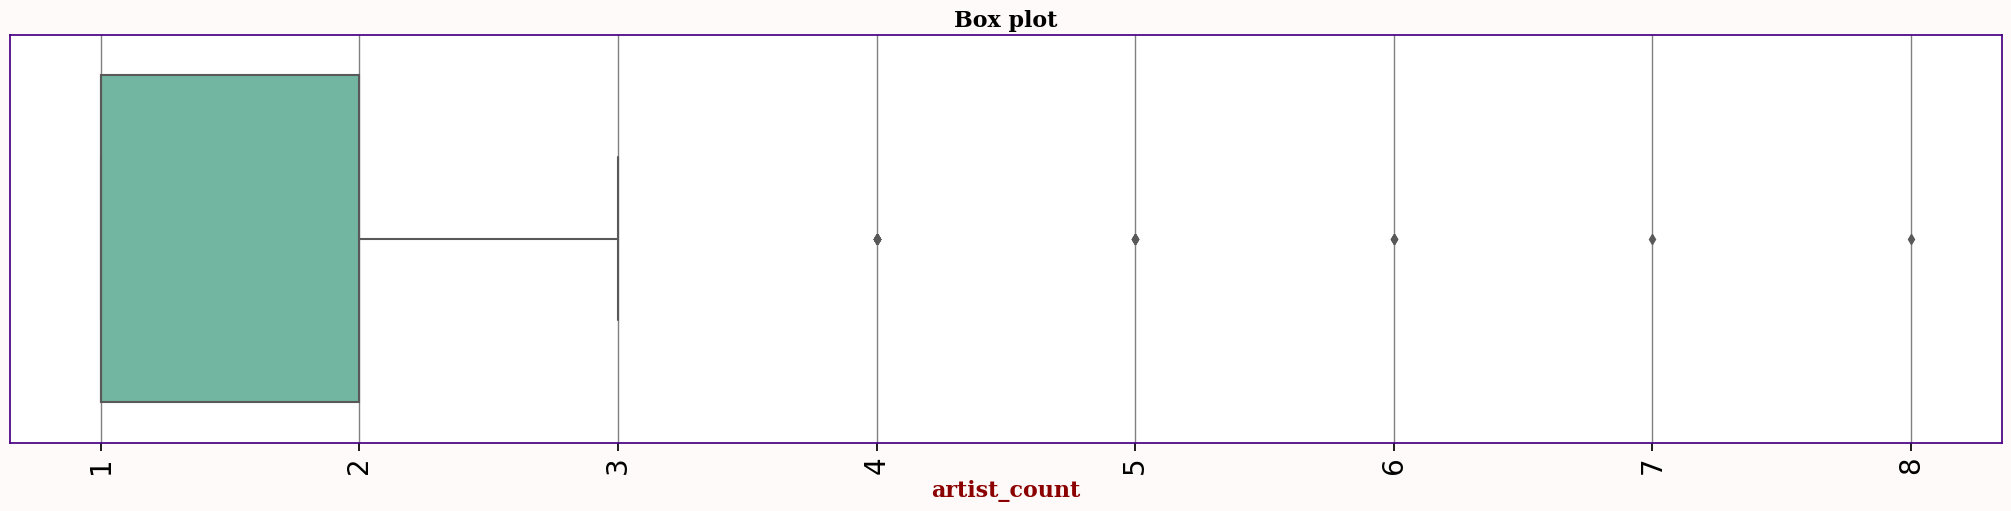

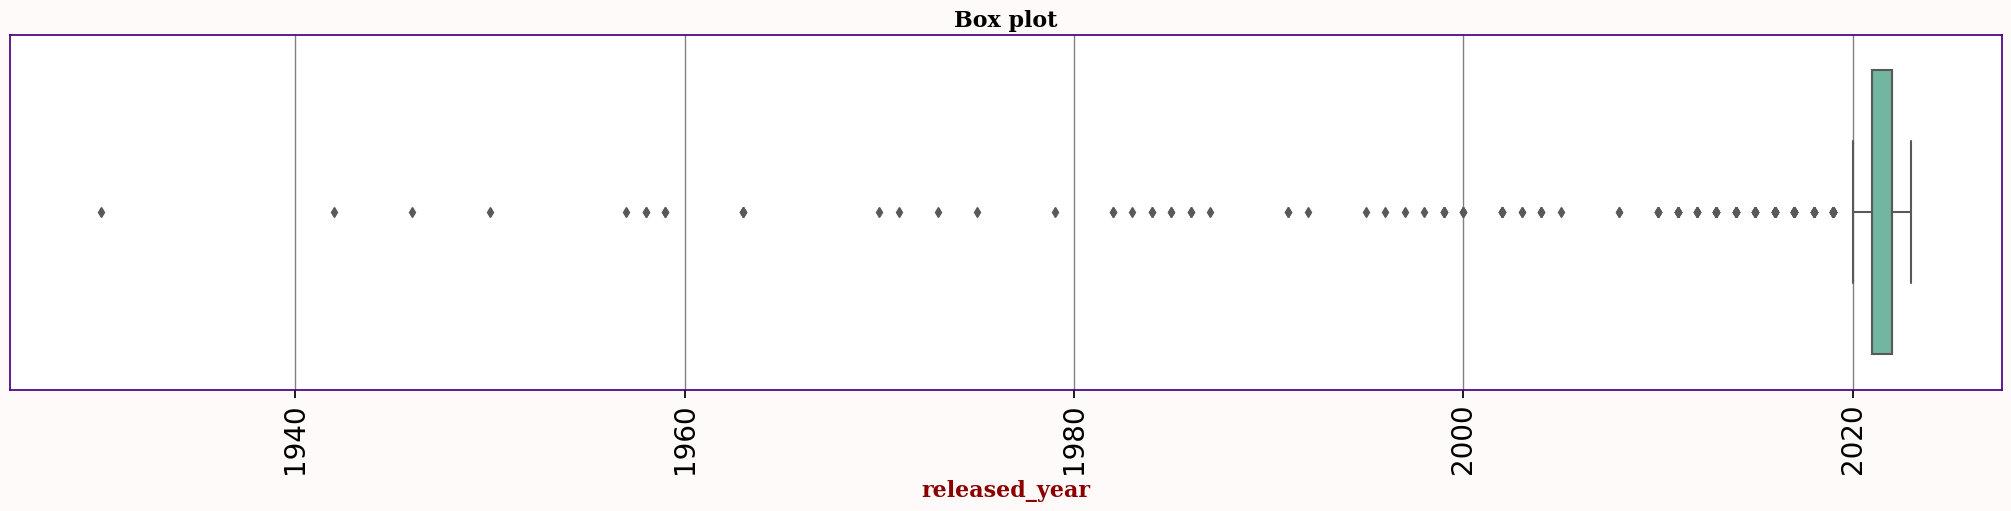

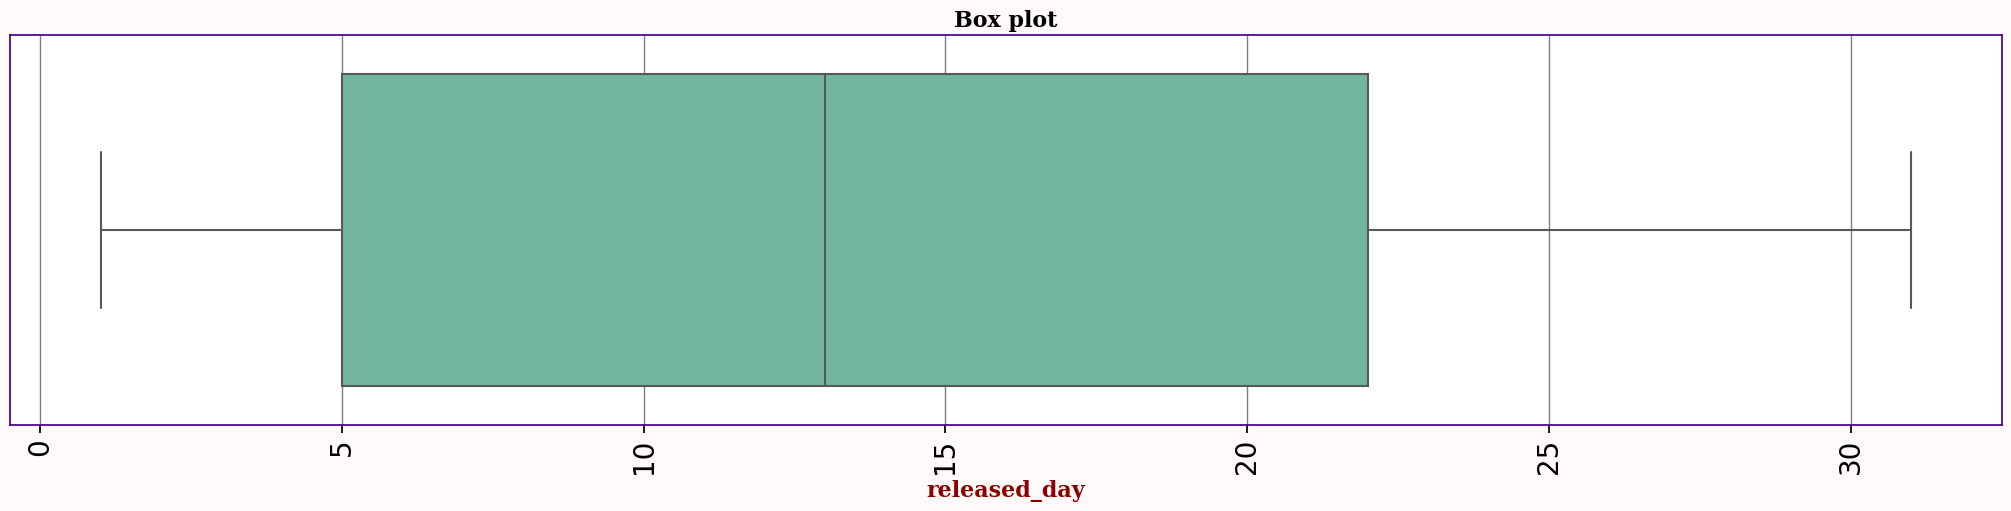

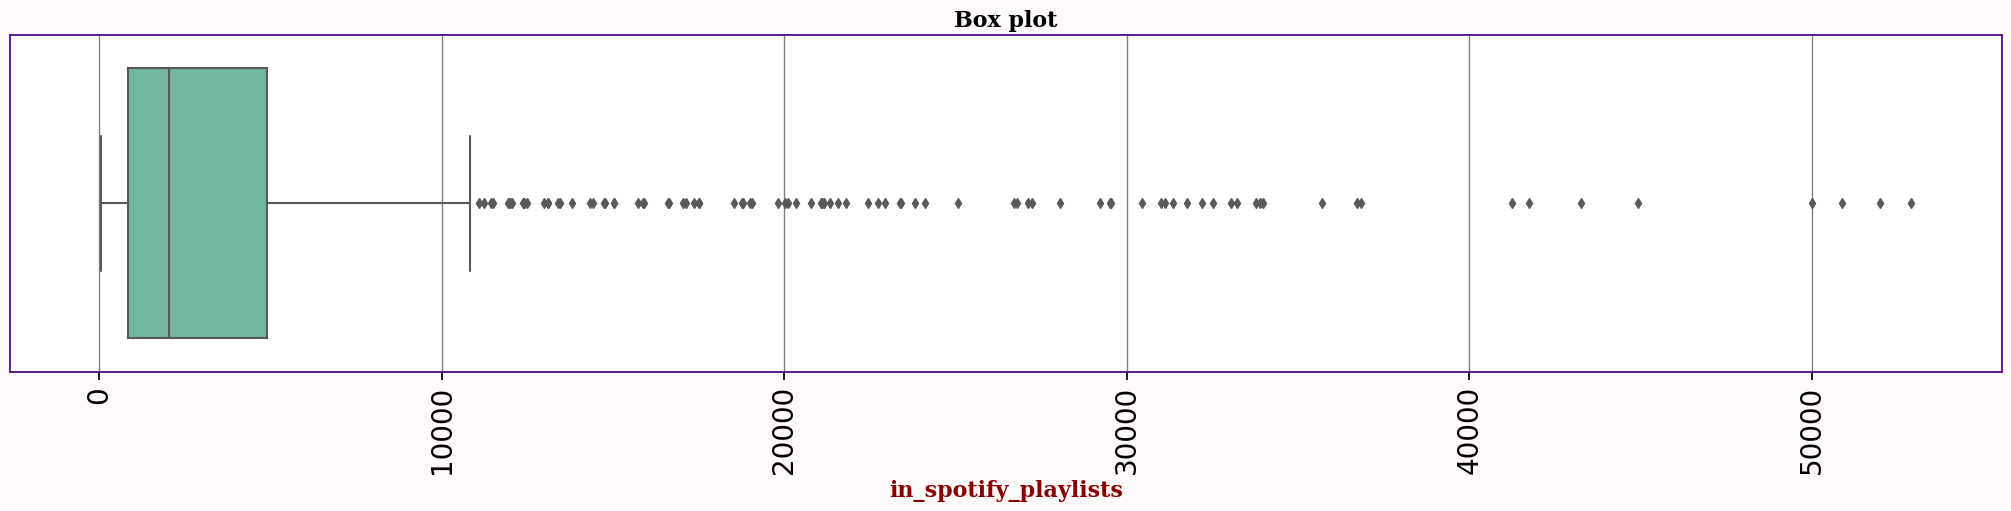

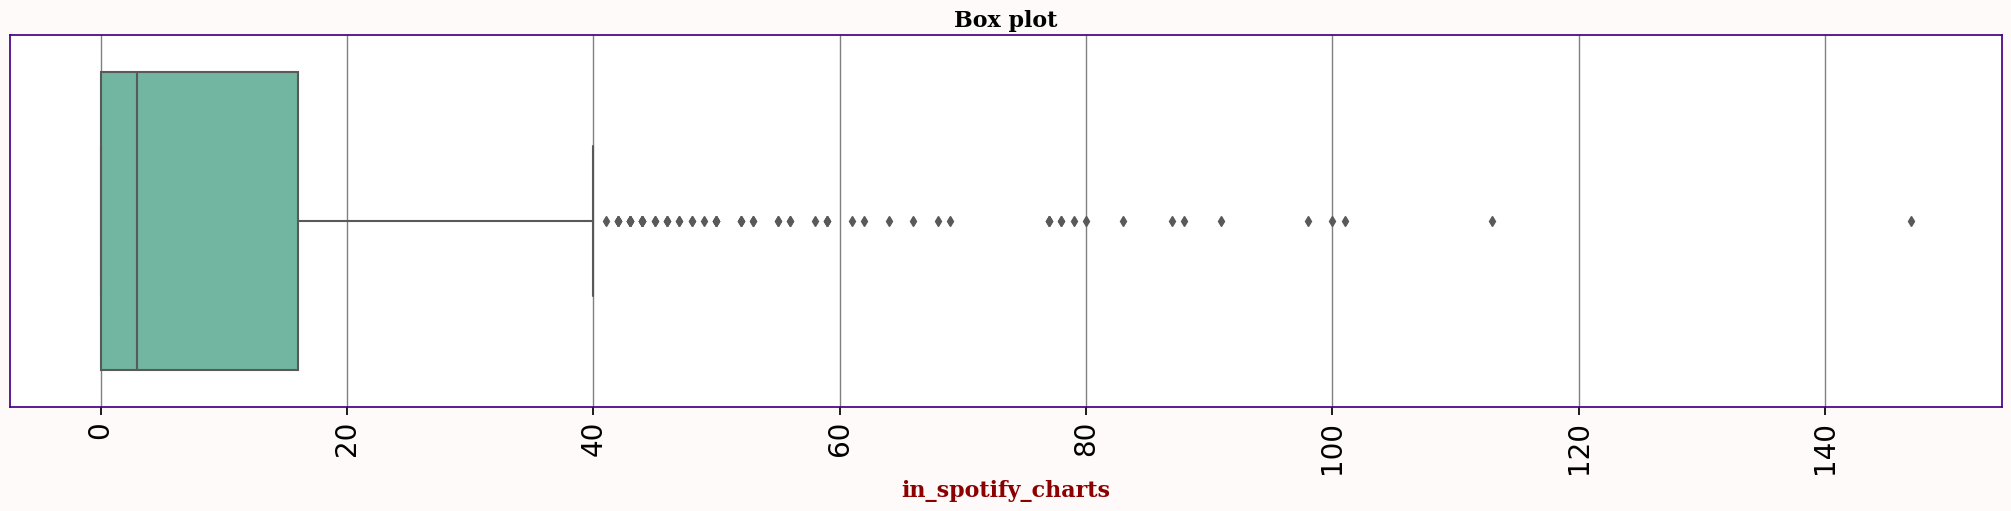

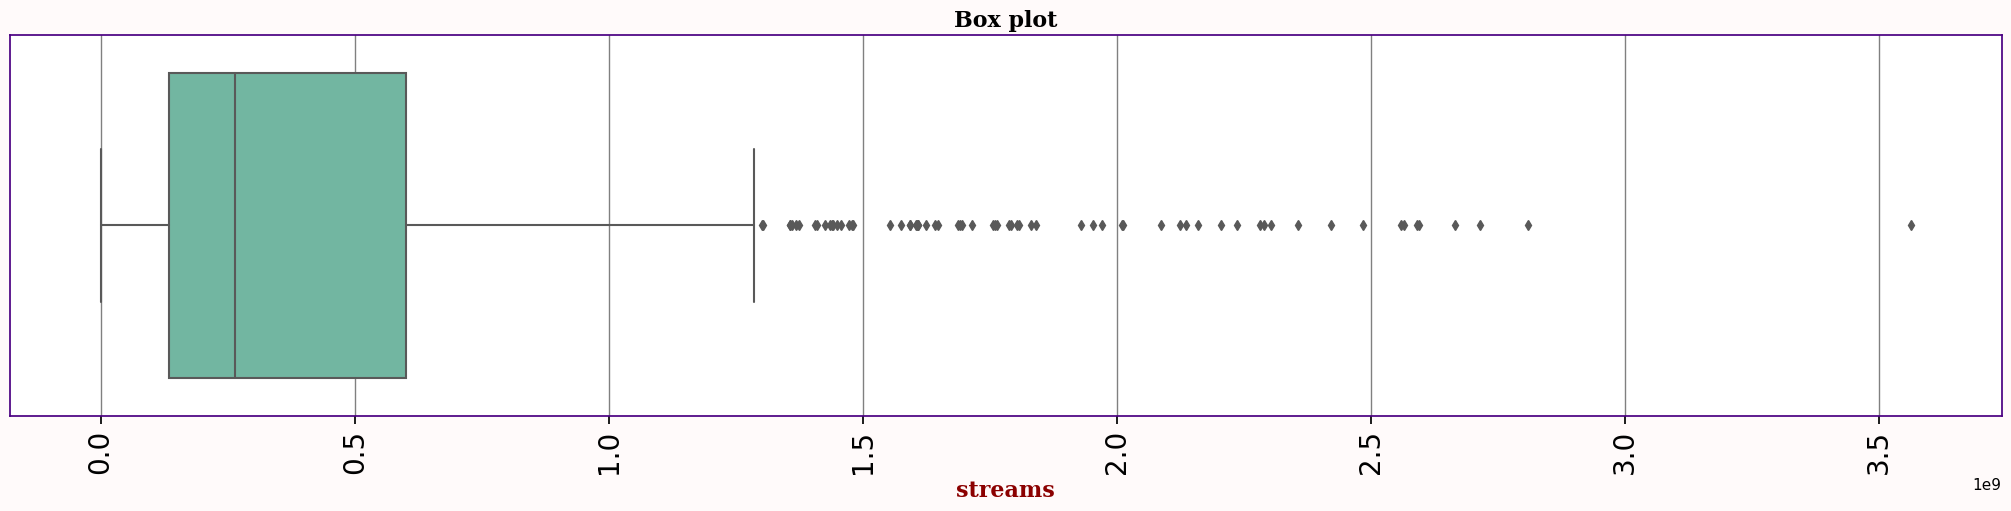

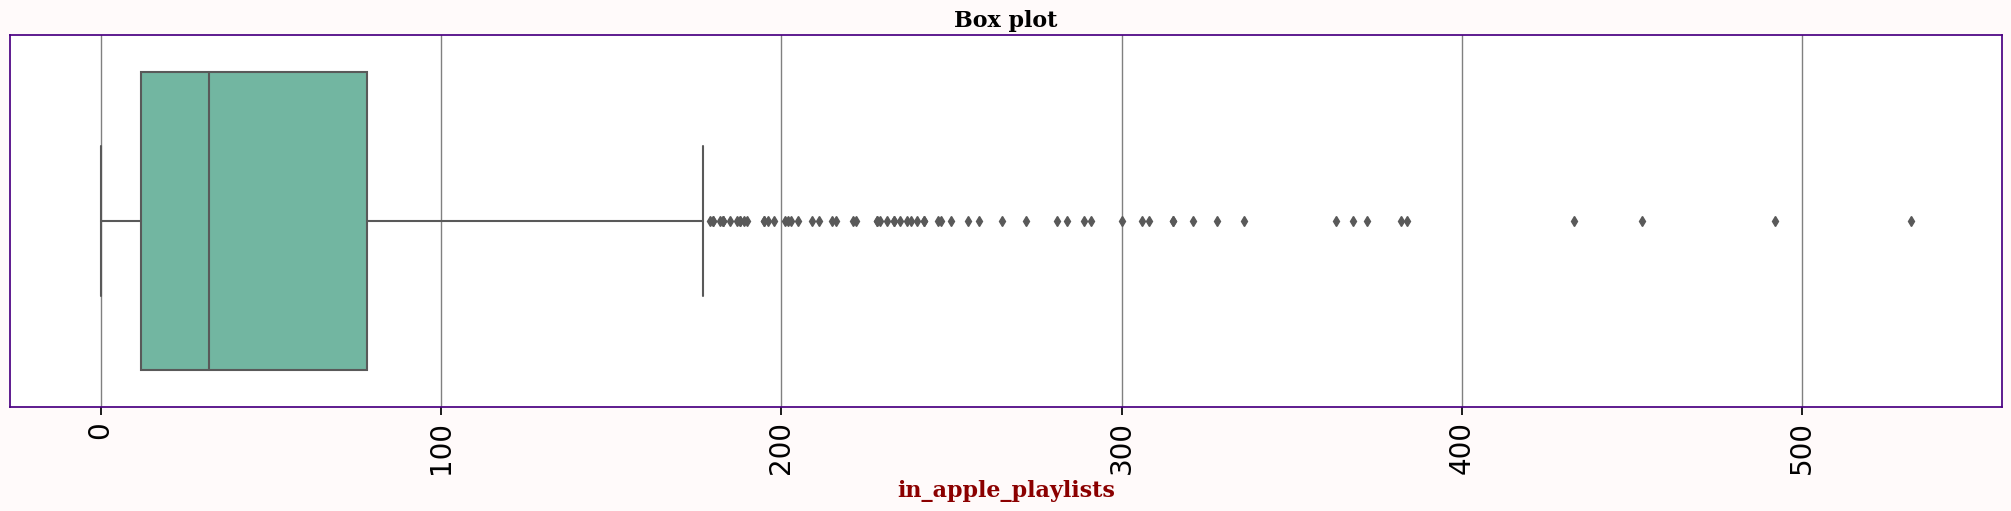

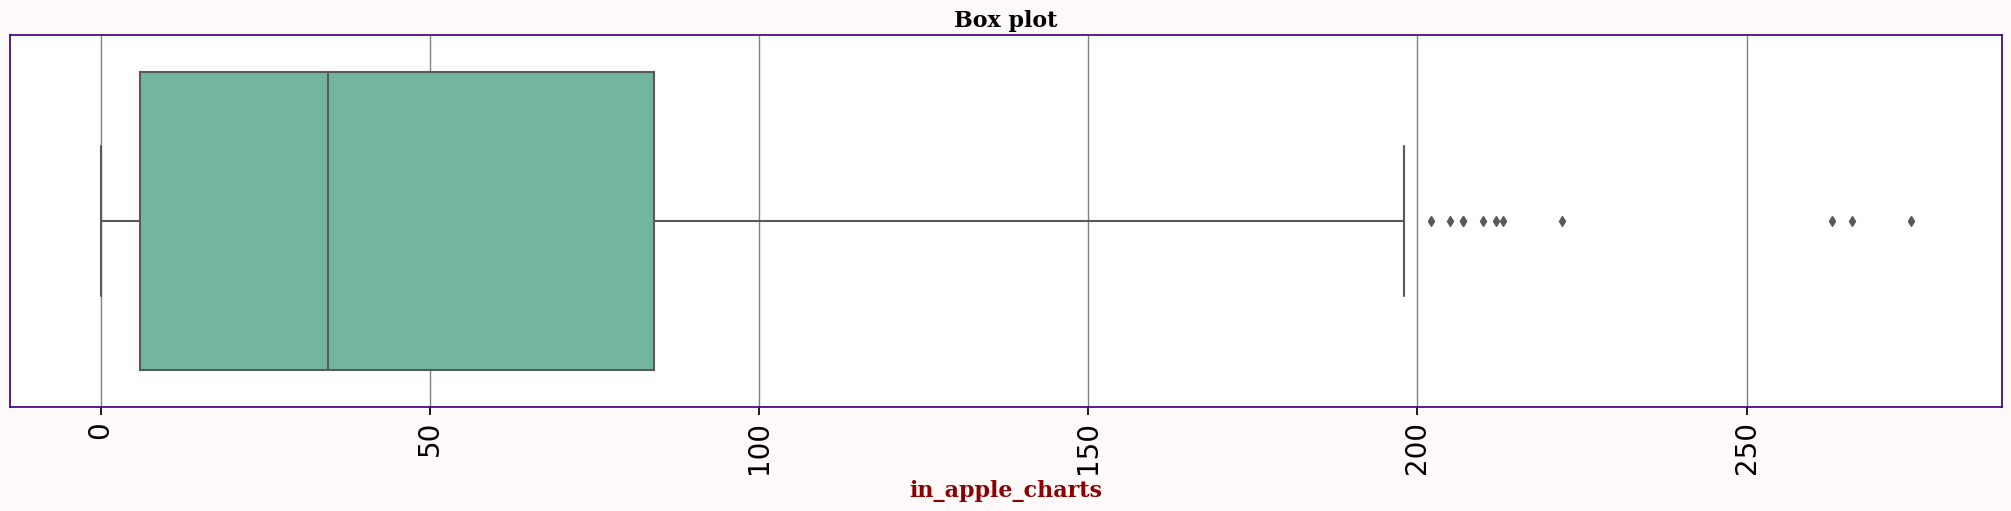

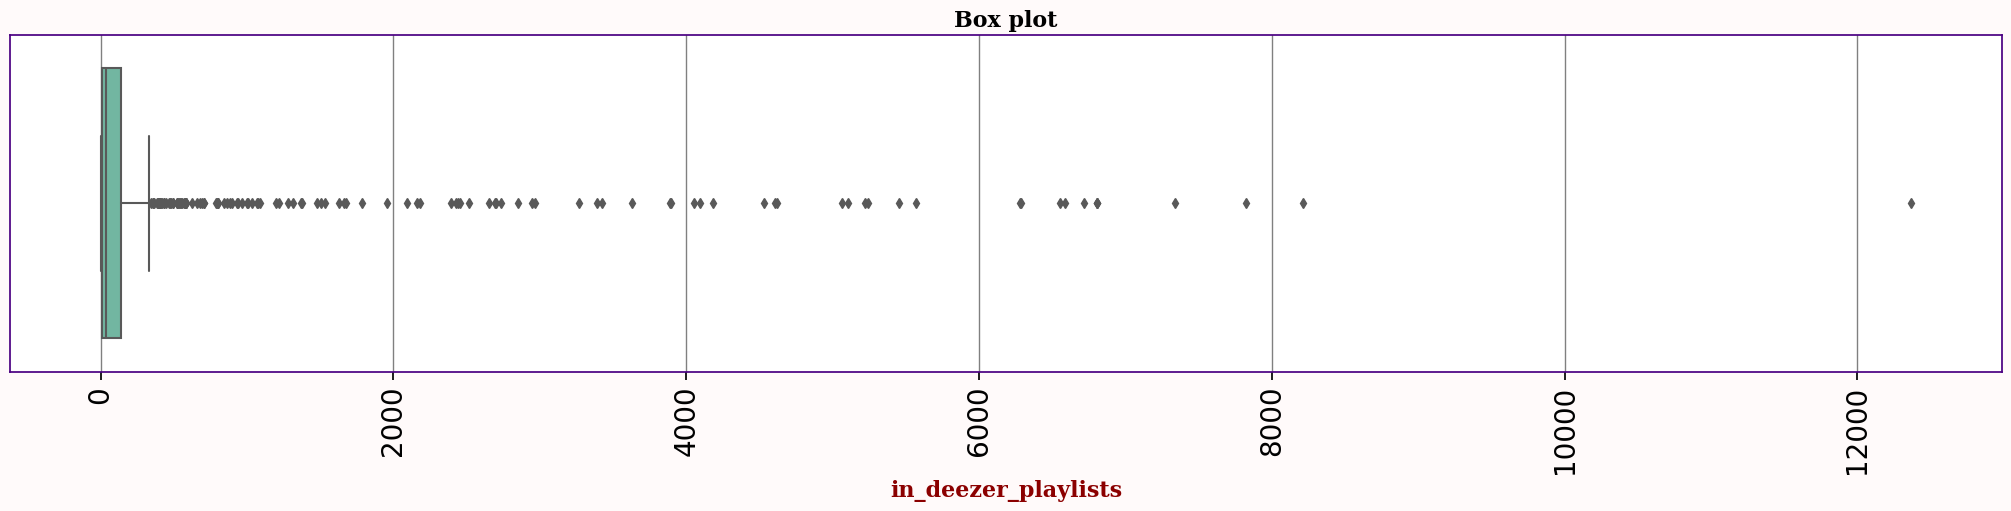

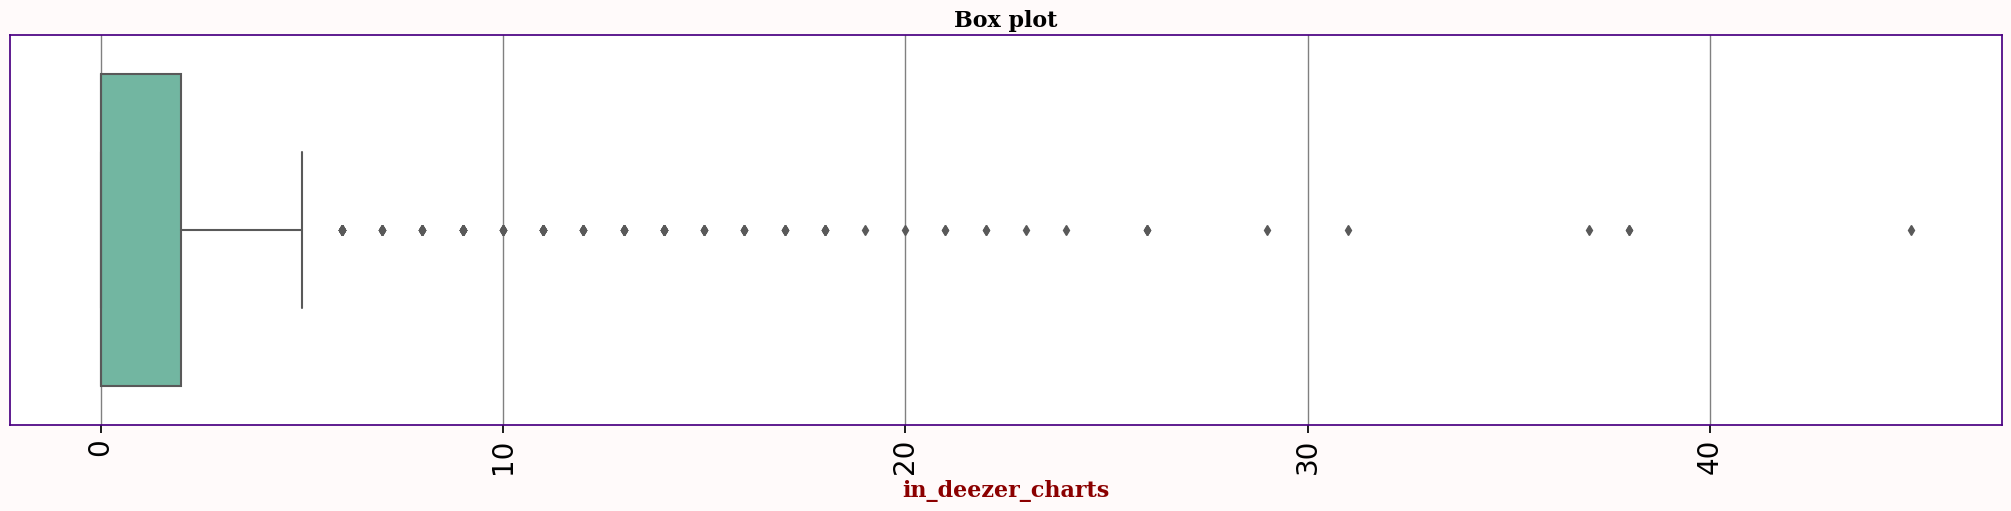

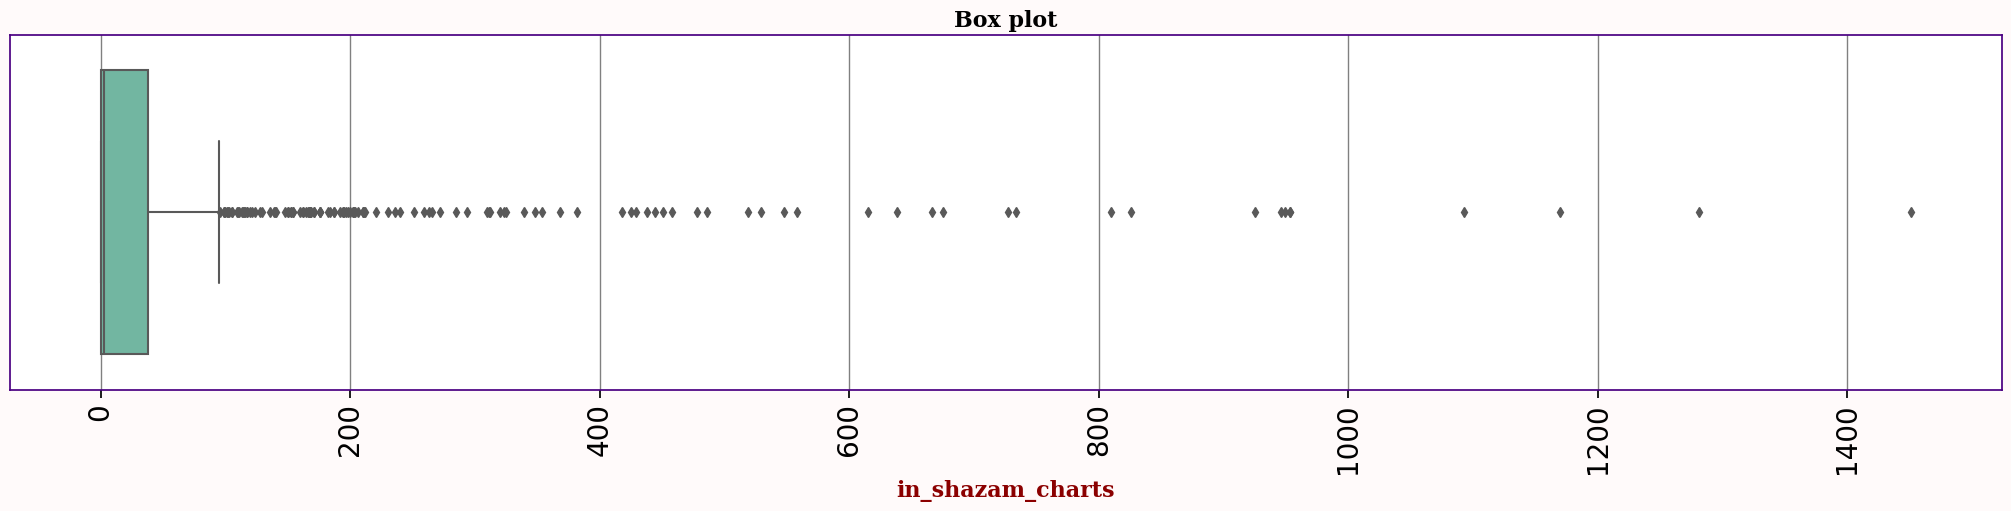

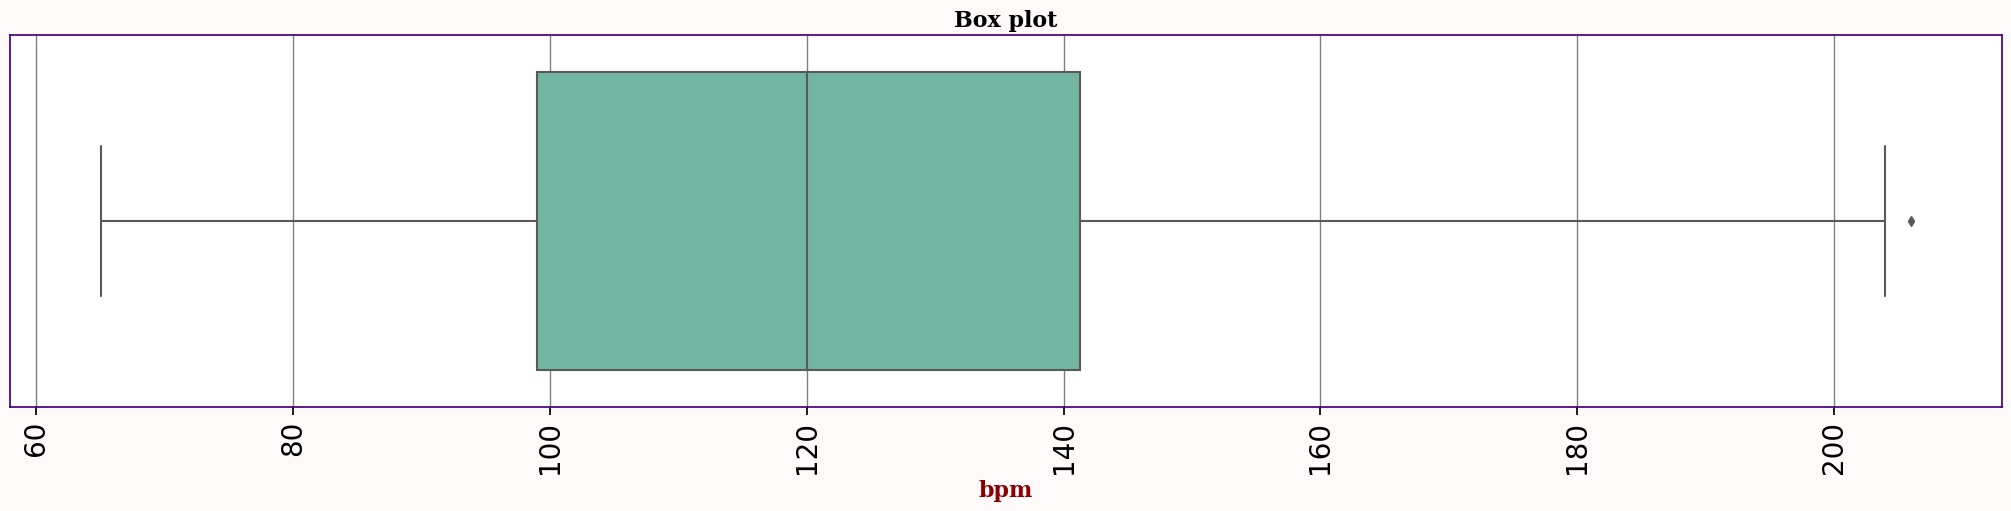

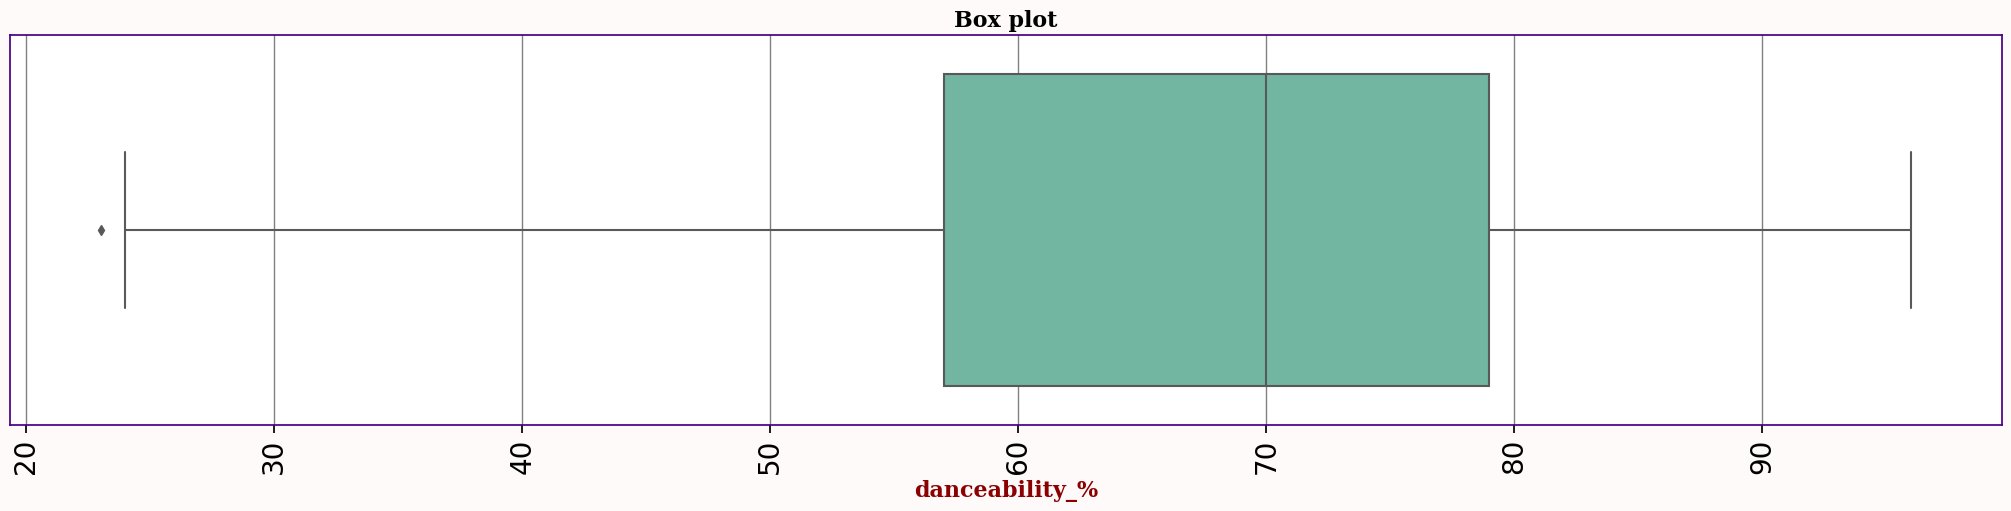

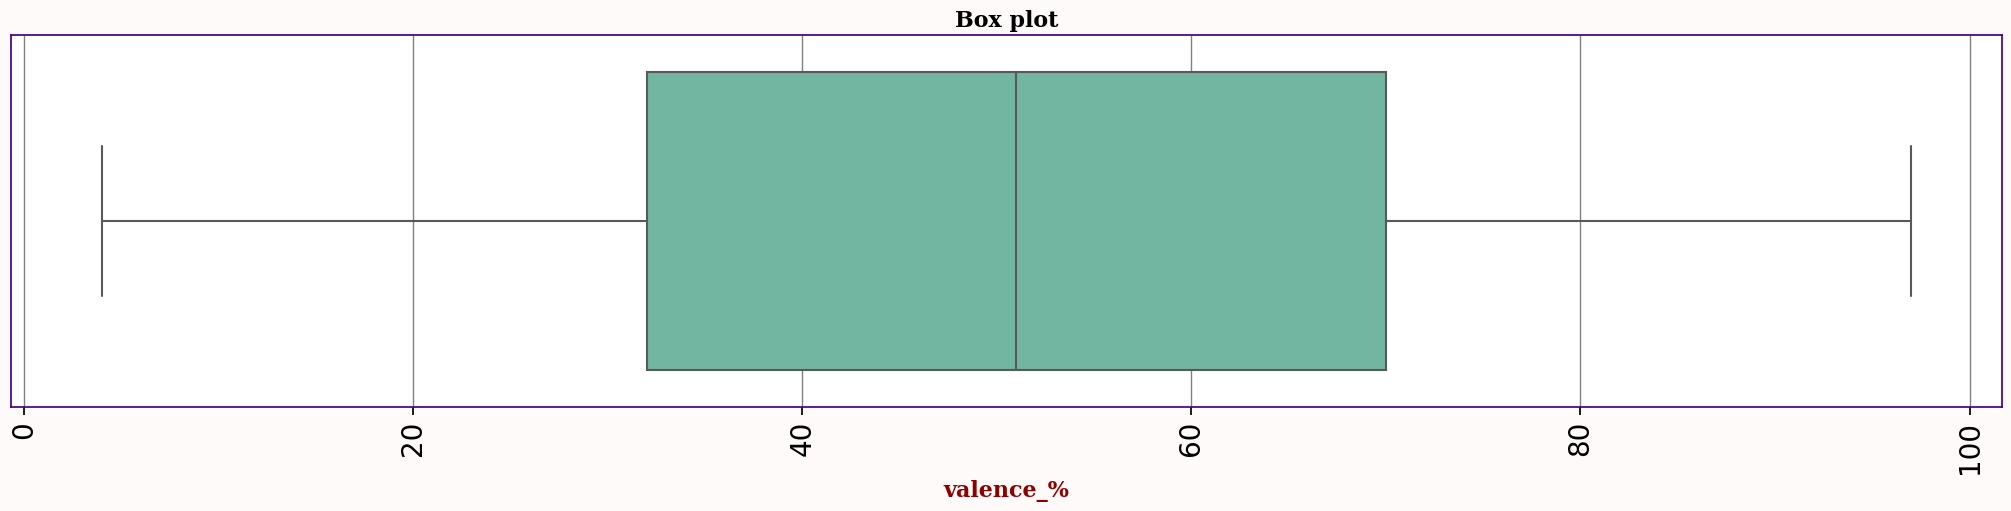

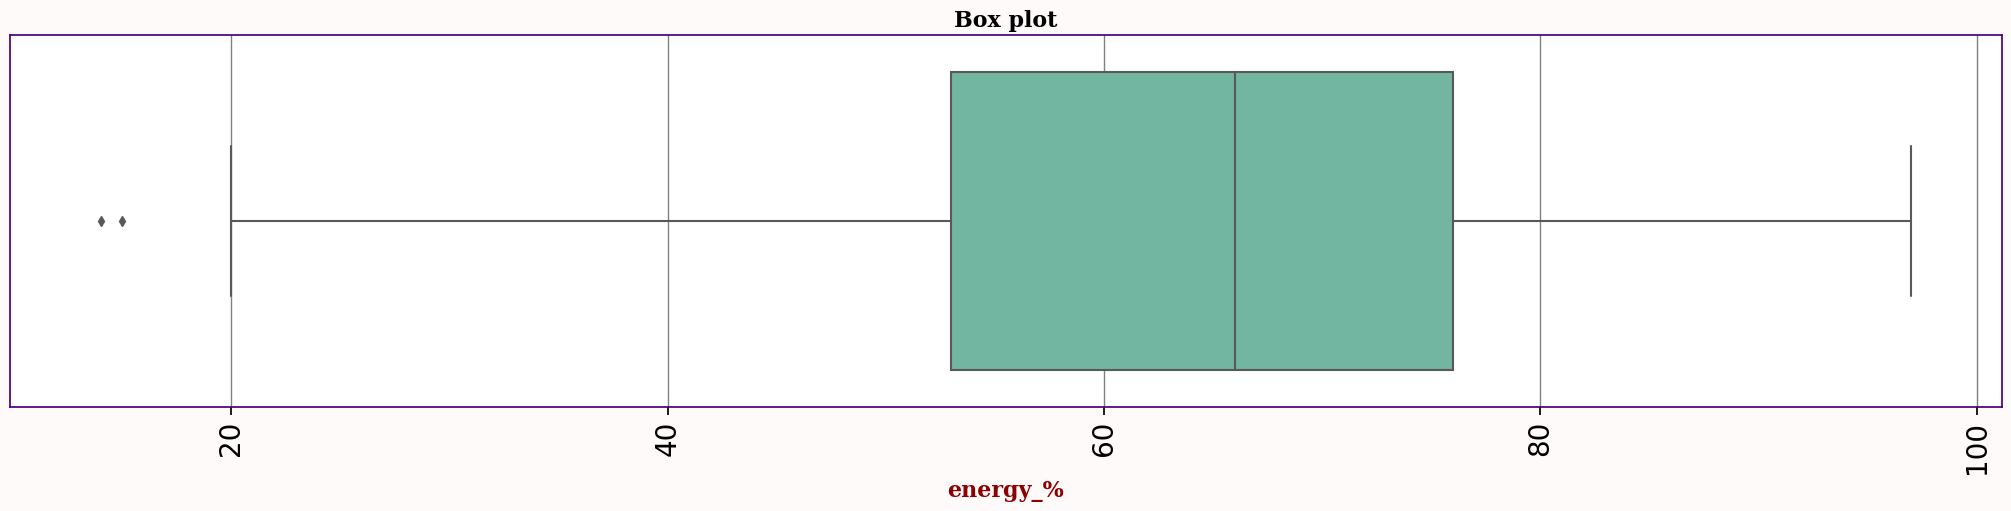

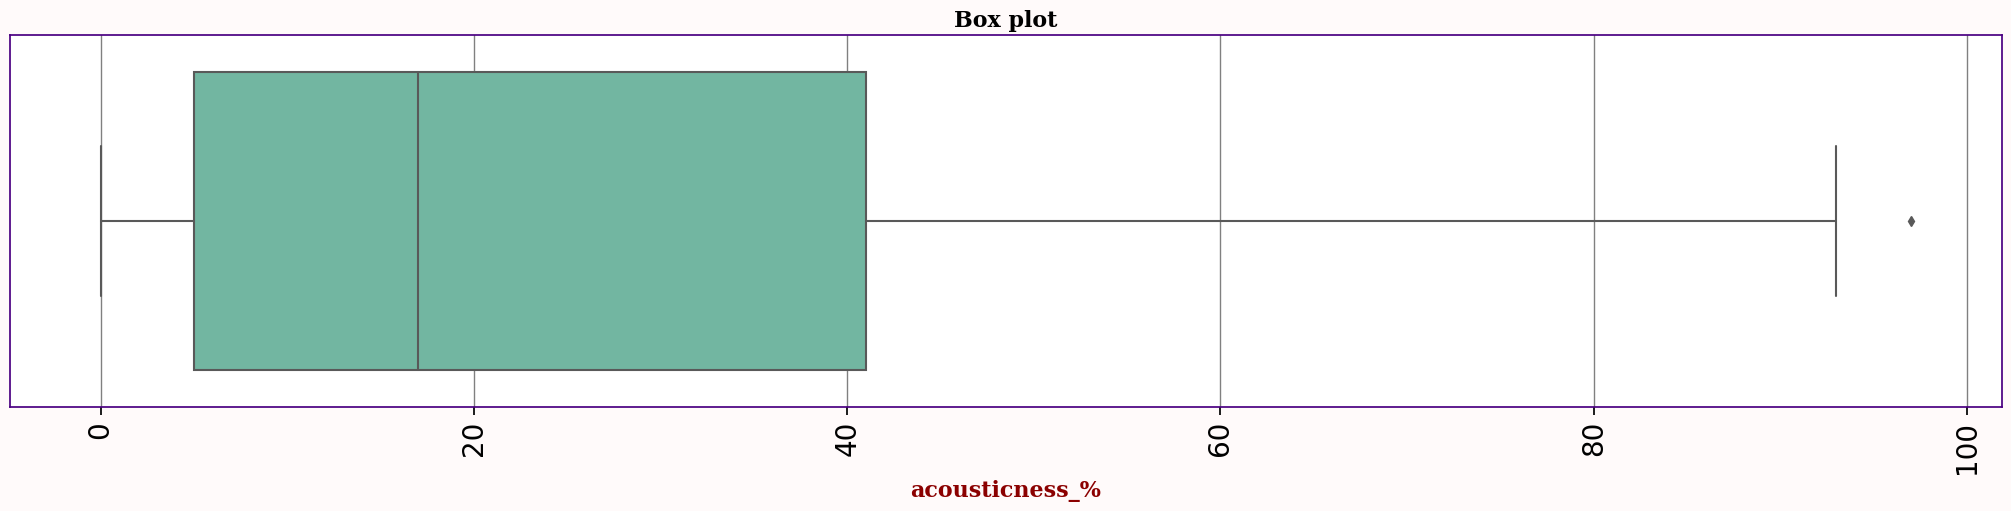

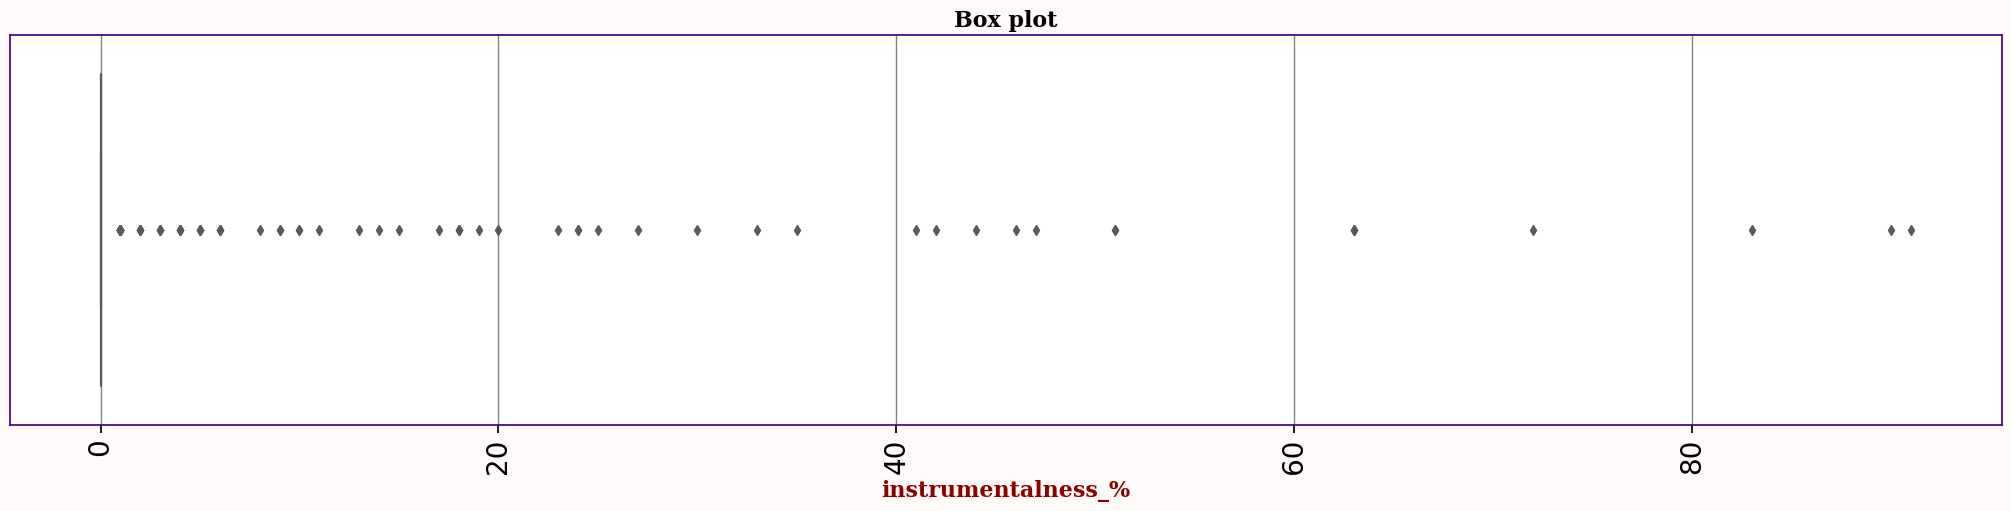

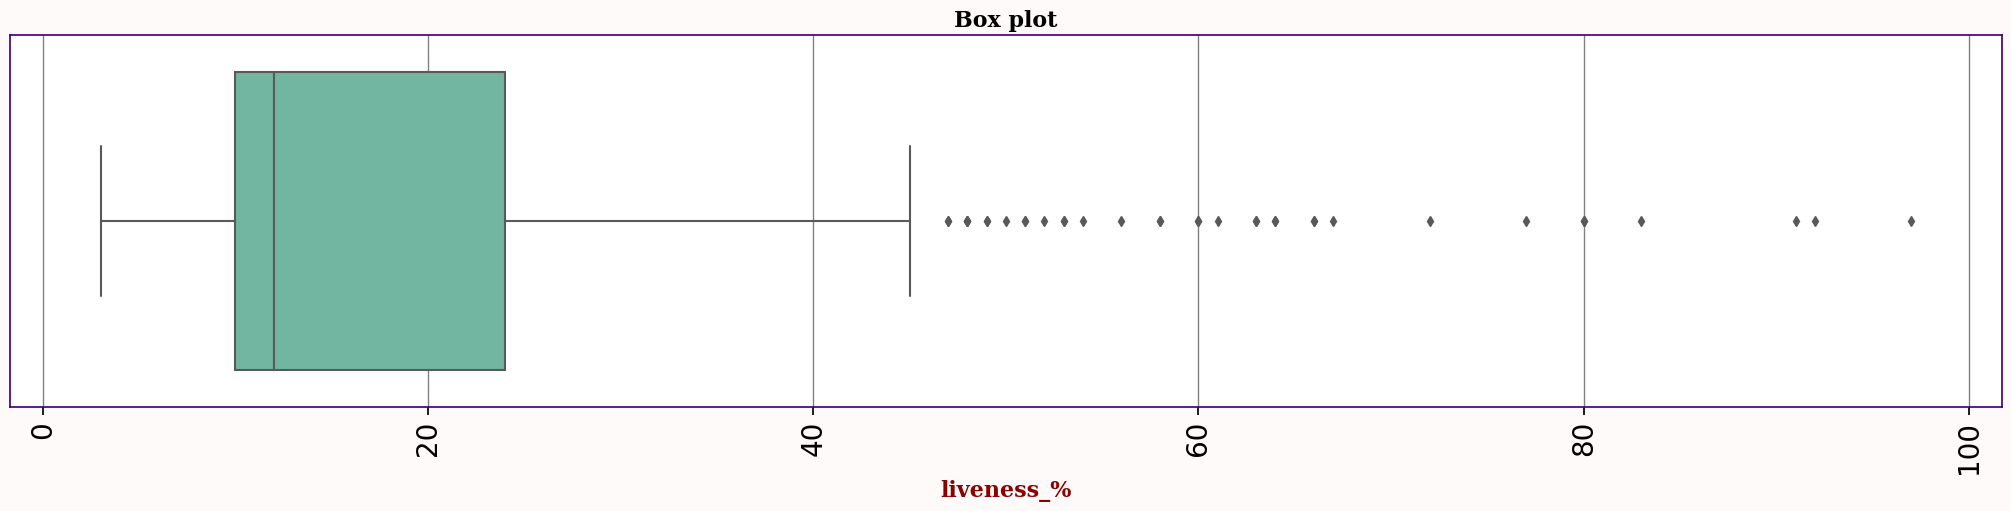

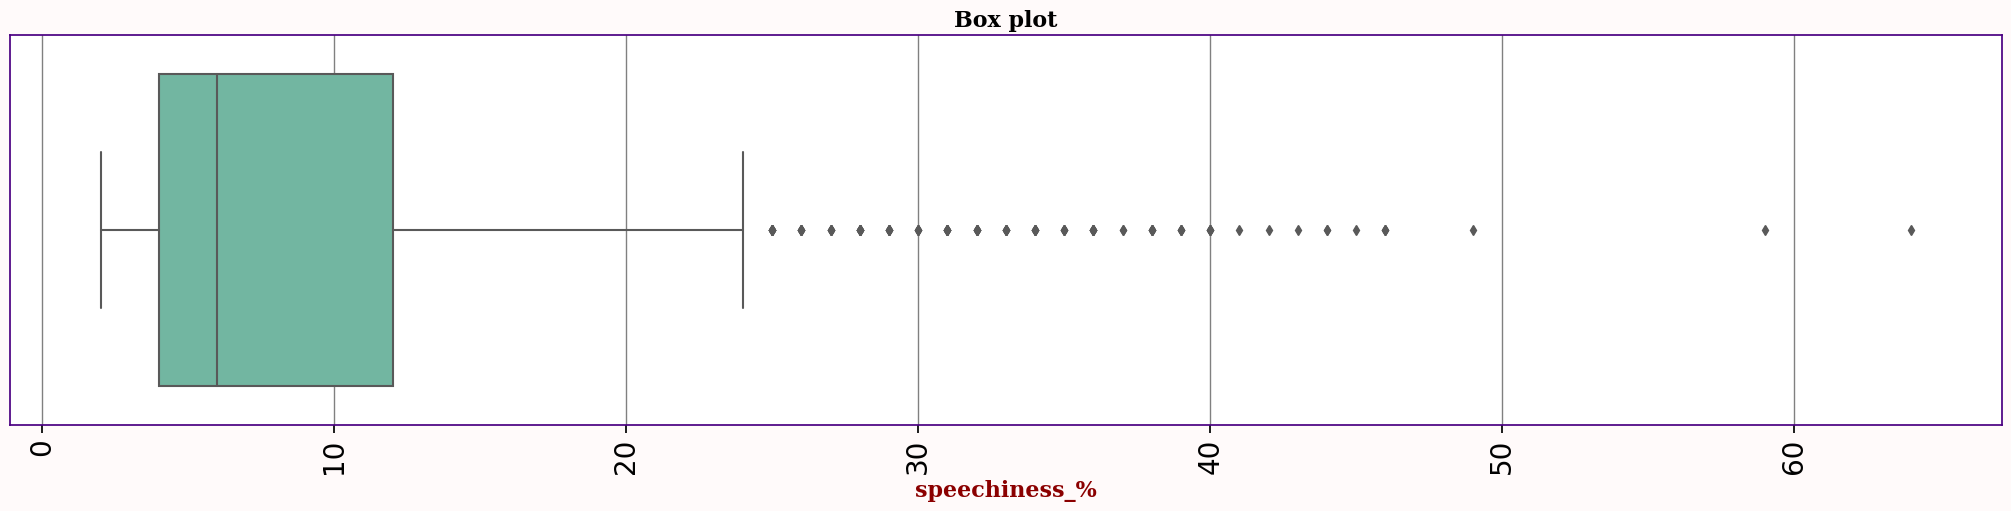

In [492]:
for col in num:
    plotting_box(songs_eda,col)

In [495]:
for col in num:
    outliers(songs_eda,col)

IQR value for column artist_count is: 1.0
Q_1 value for column artist_count is: 1.0, 25% of the data is below 1.0
Q_2 value for column artist_count is: 1.0, 50% of the data is below 1.0
Q_3 value for column artist_count is: 2.0, 75% of the data is below 2.0
Lower bound value for column artist_count is: -0.5
The number of outliers below the lower bound for artist_count is 0
The number of values between the lower 25% for artist_count is 0
The number of values within the IQR for artist_count is 717
The number of values between the upper 25% for artist_count is 75
The number of outliers beyond the upper bound for artist_count is 24
Upper bound value for column artist_count is: 3.5

IQR value for column released_year is: 1.0
Q_1 value for column released_year is: 2021.0, 25% of the data is below 2021.0
Q_2 value for column released_year is: 2022.0, 50% of the data is below 2022.0
Q_3 value for column released_year is: 2022.0, 75% of the data is below 2022.0
Lower bound value for column rele

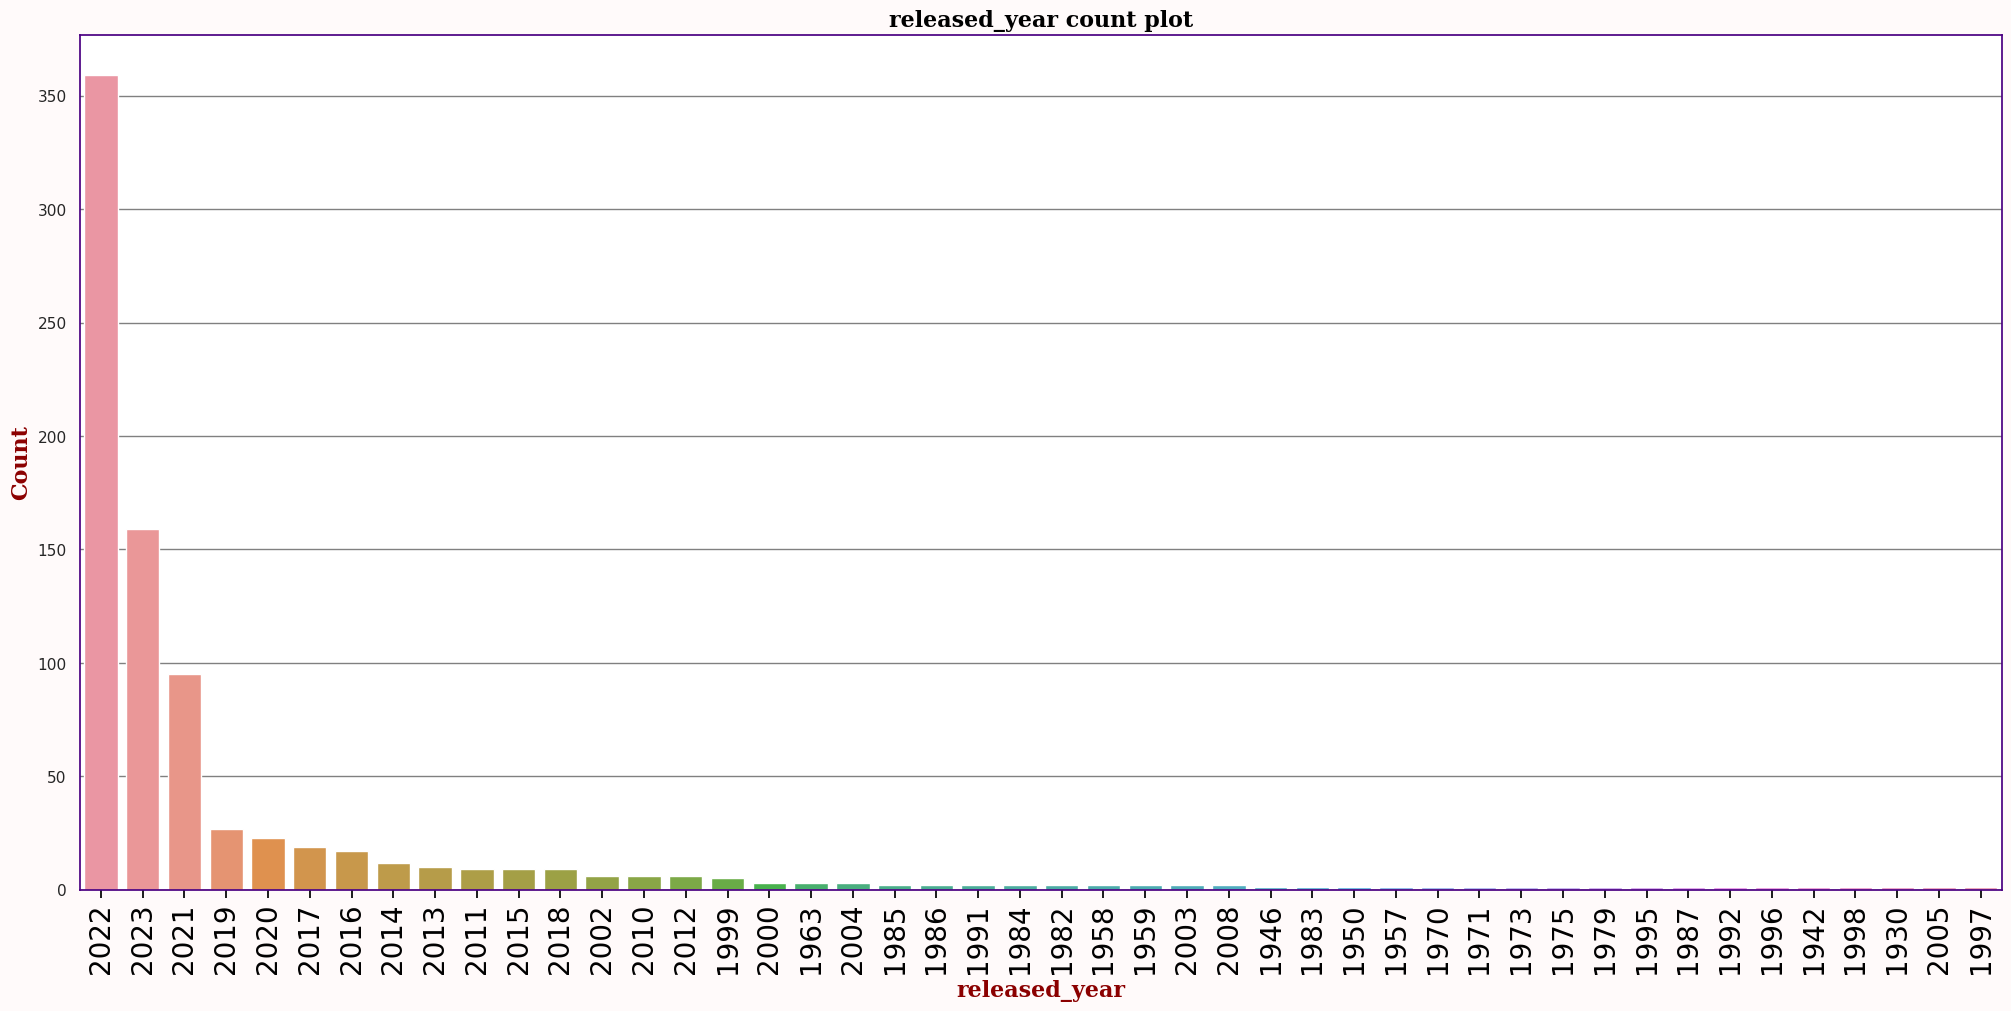

In [502]:
plotting_count(songs_eda,'released_year')

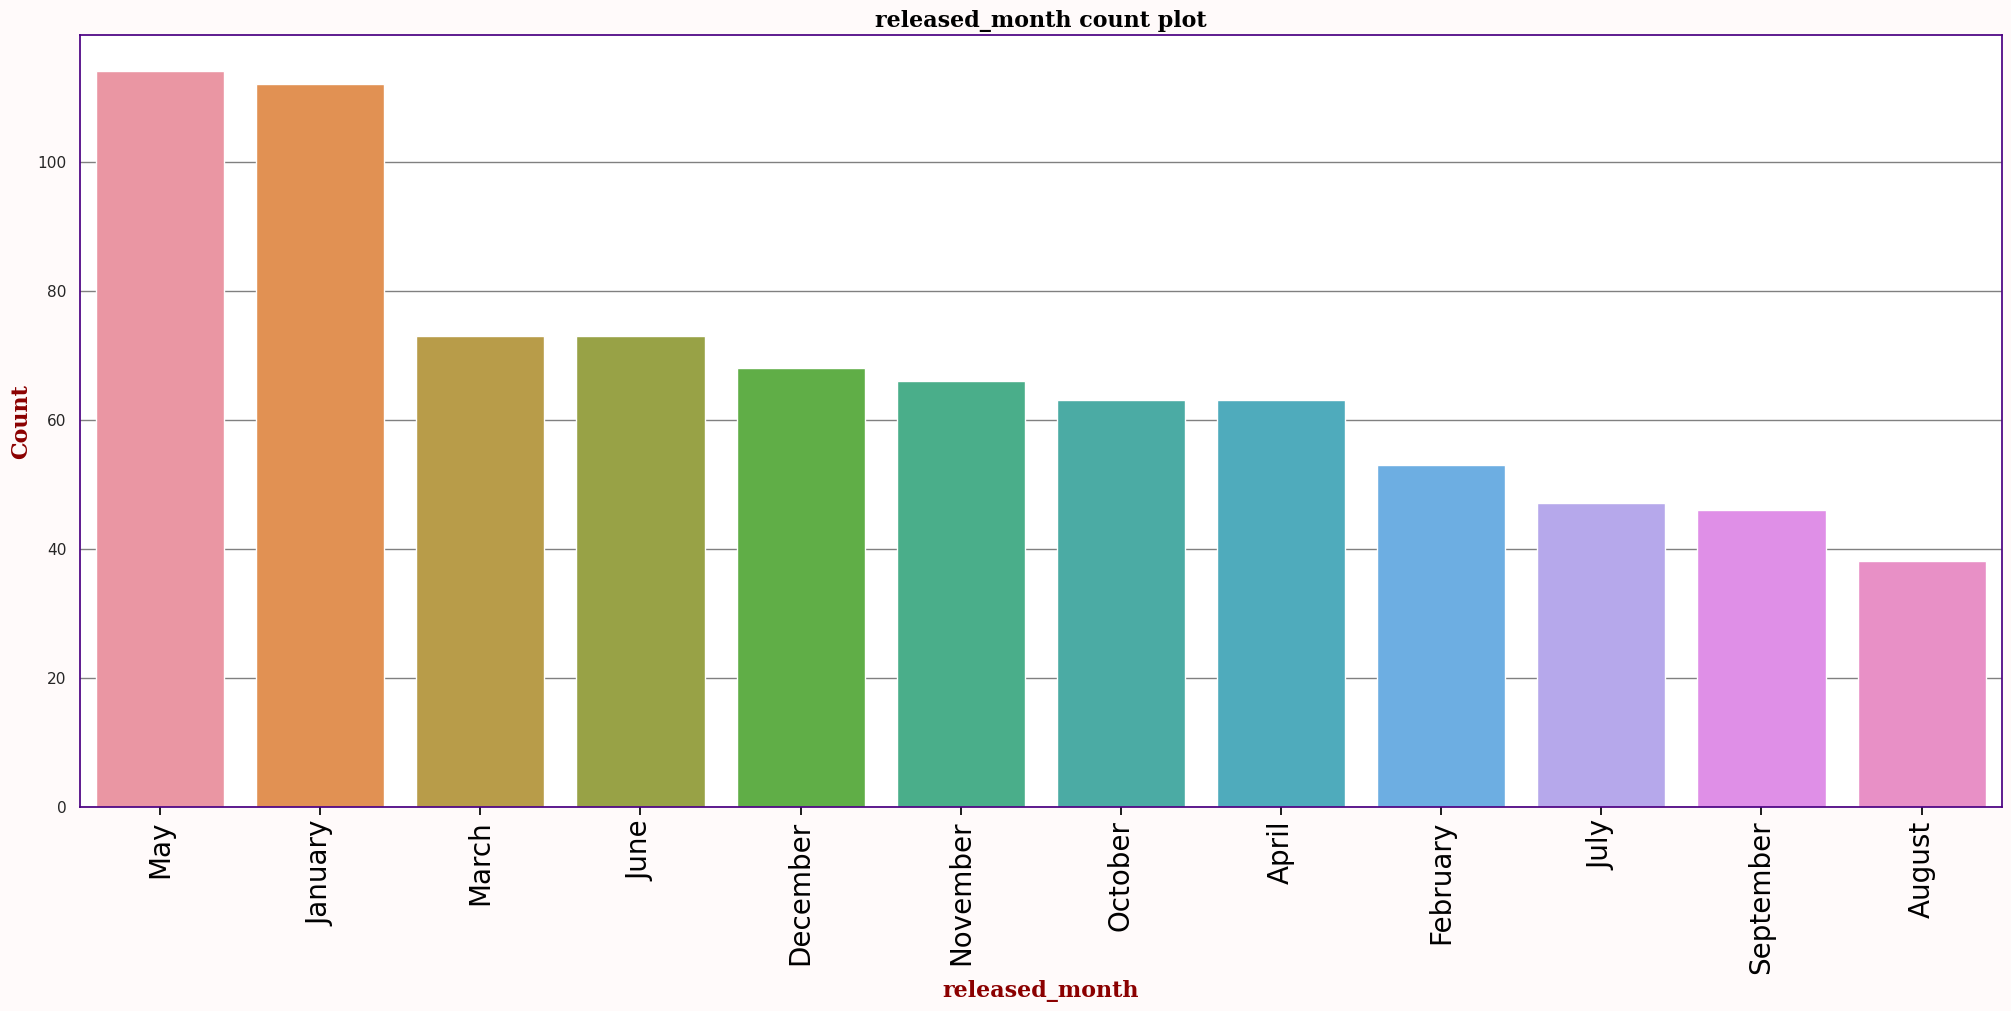

In [499]:
plotting_count(songs_eda,'released_month')

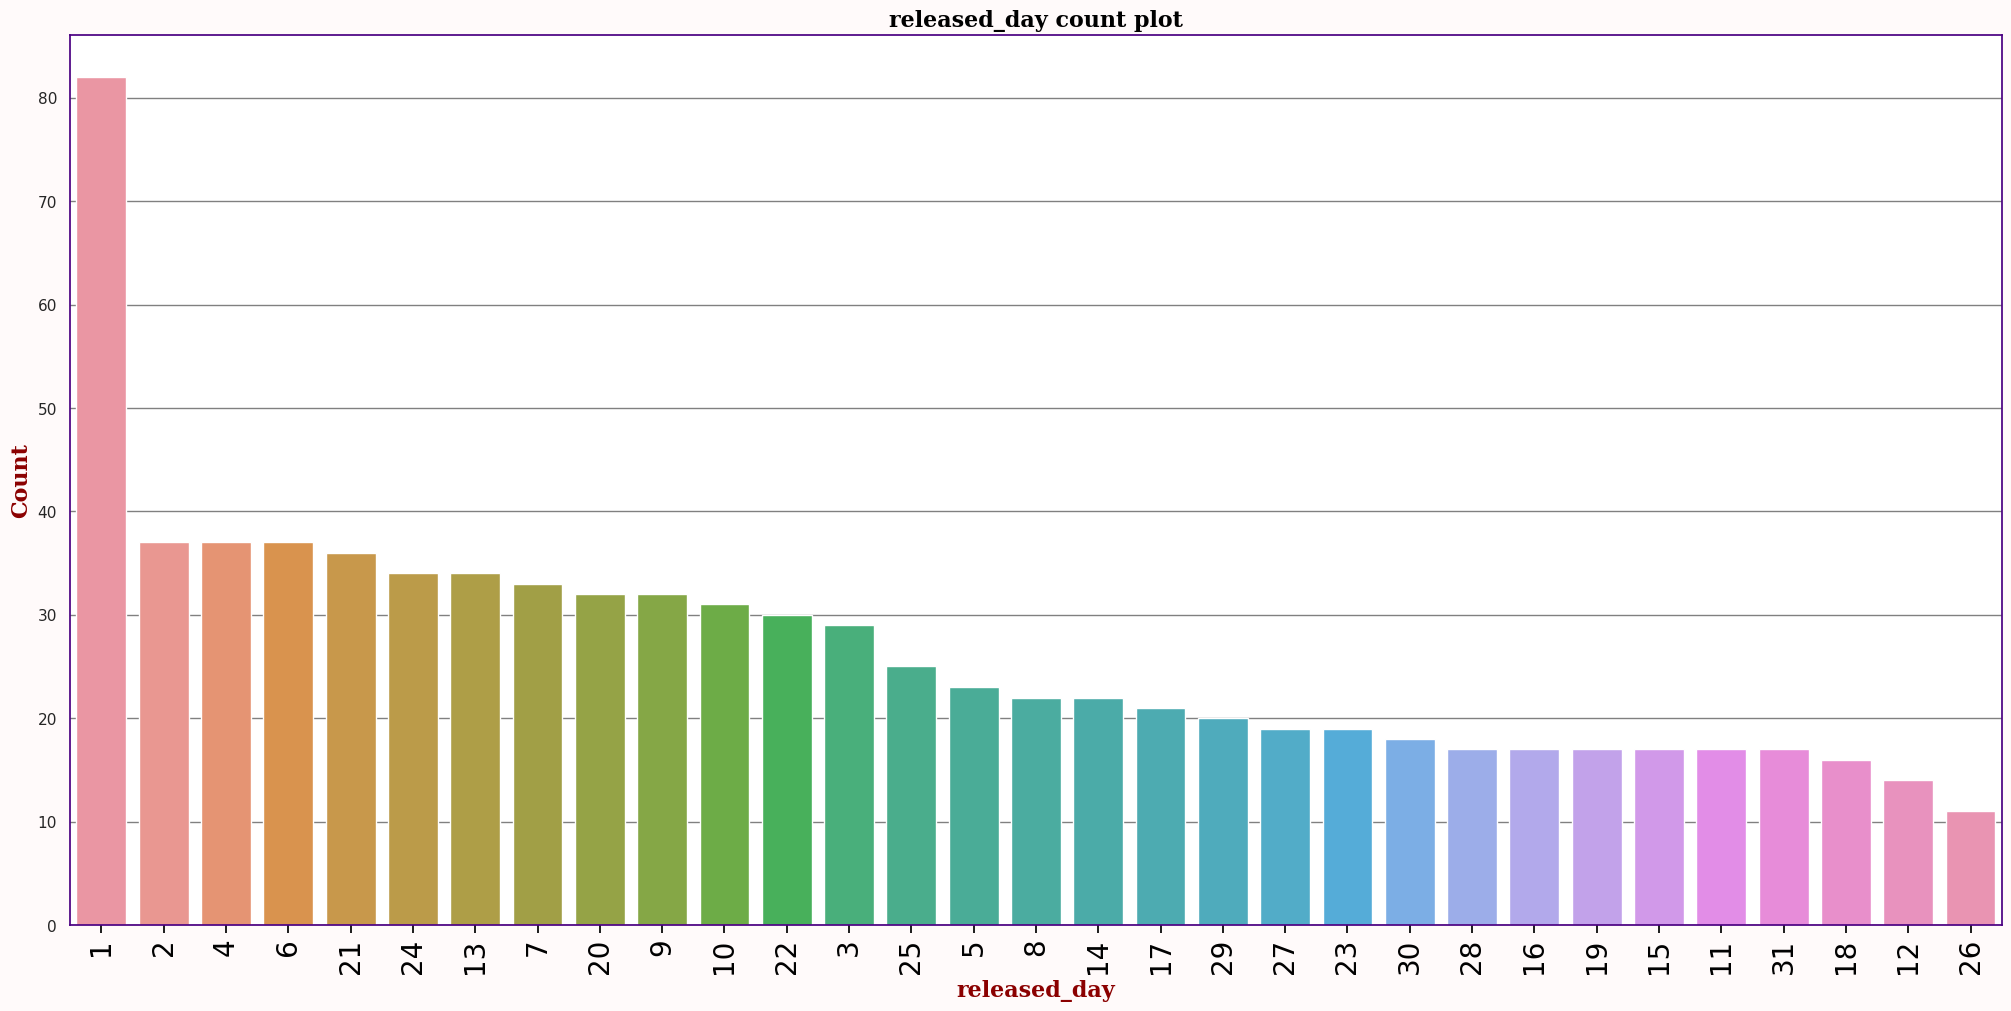

In [504]:
plotting_count(songs_eda,'released_day')

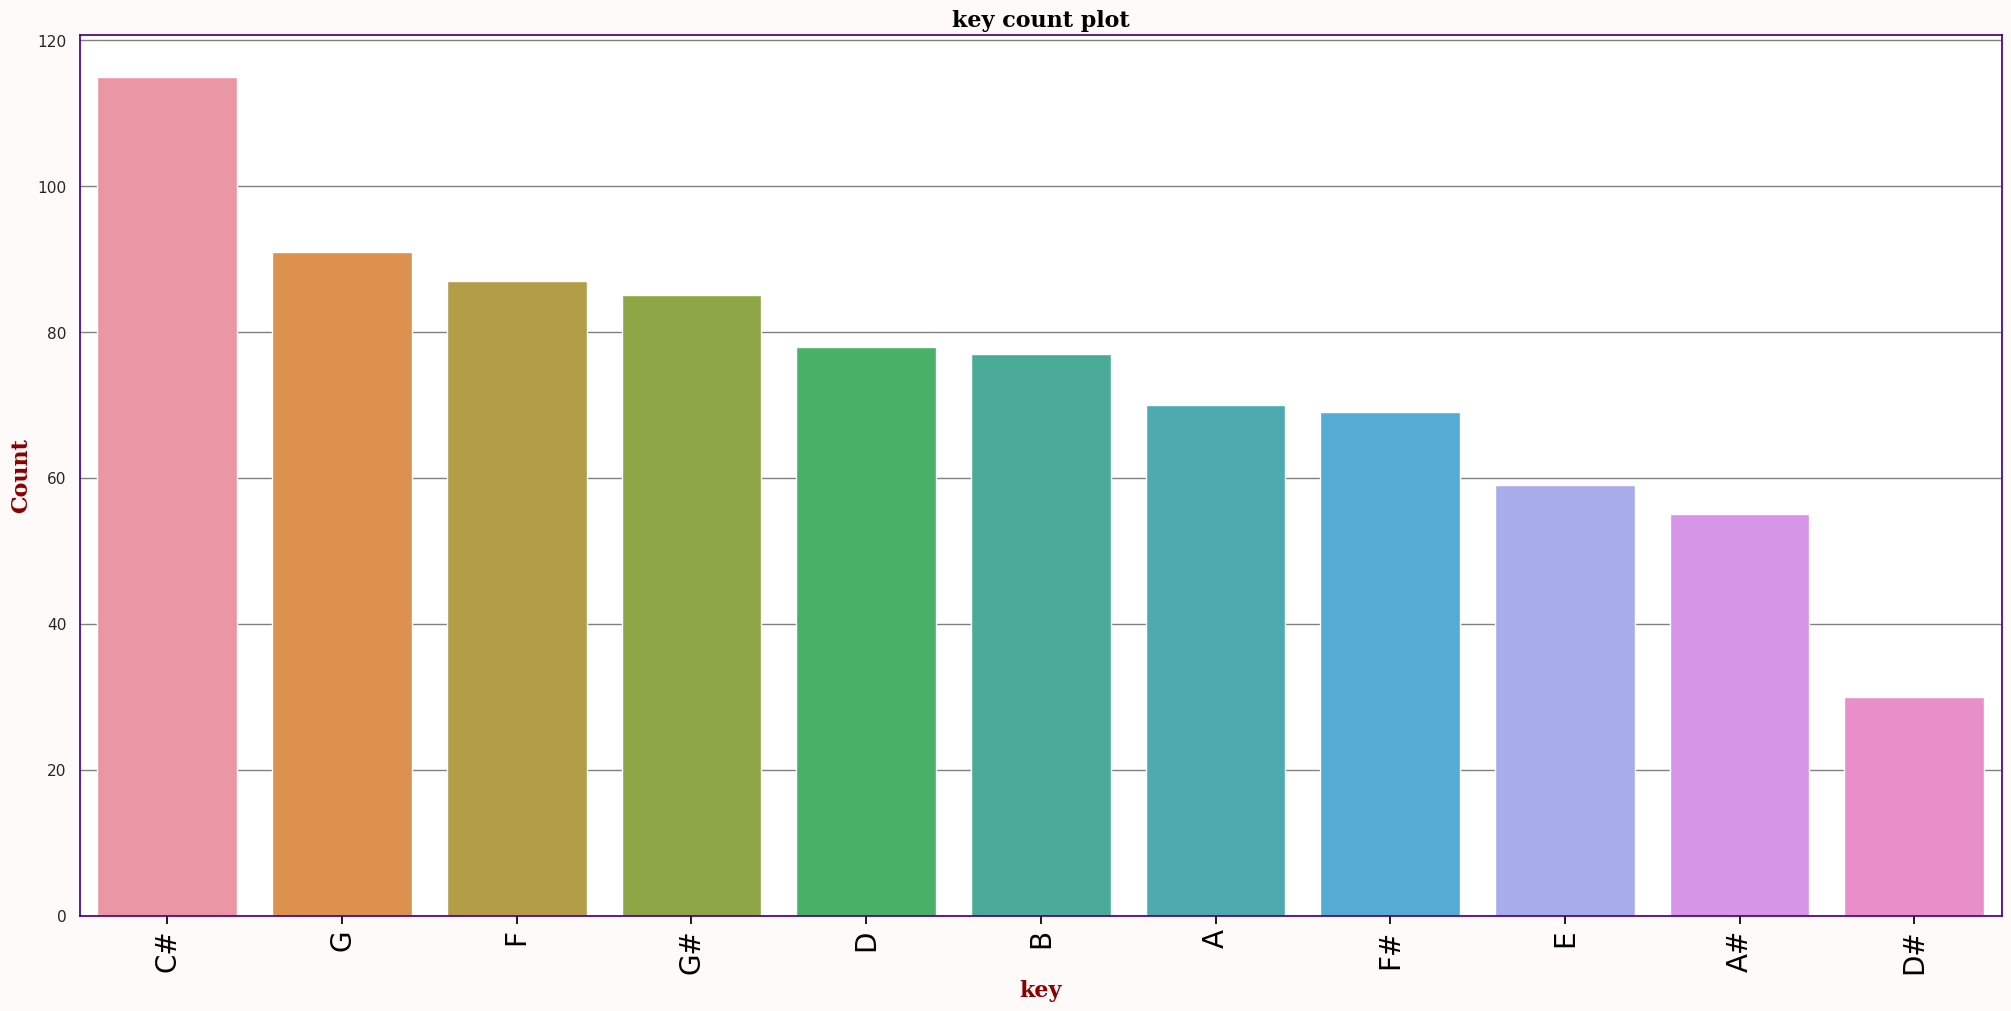

In [500]:
plotting_count(songs_eda,'key')

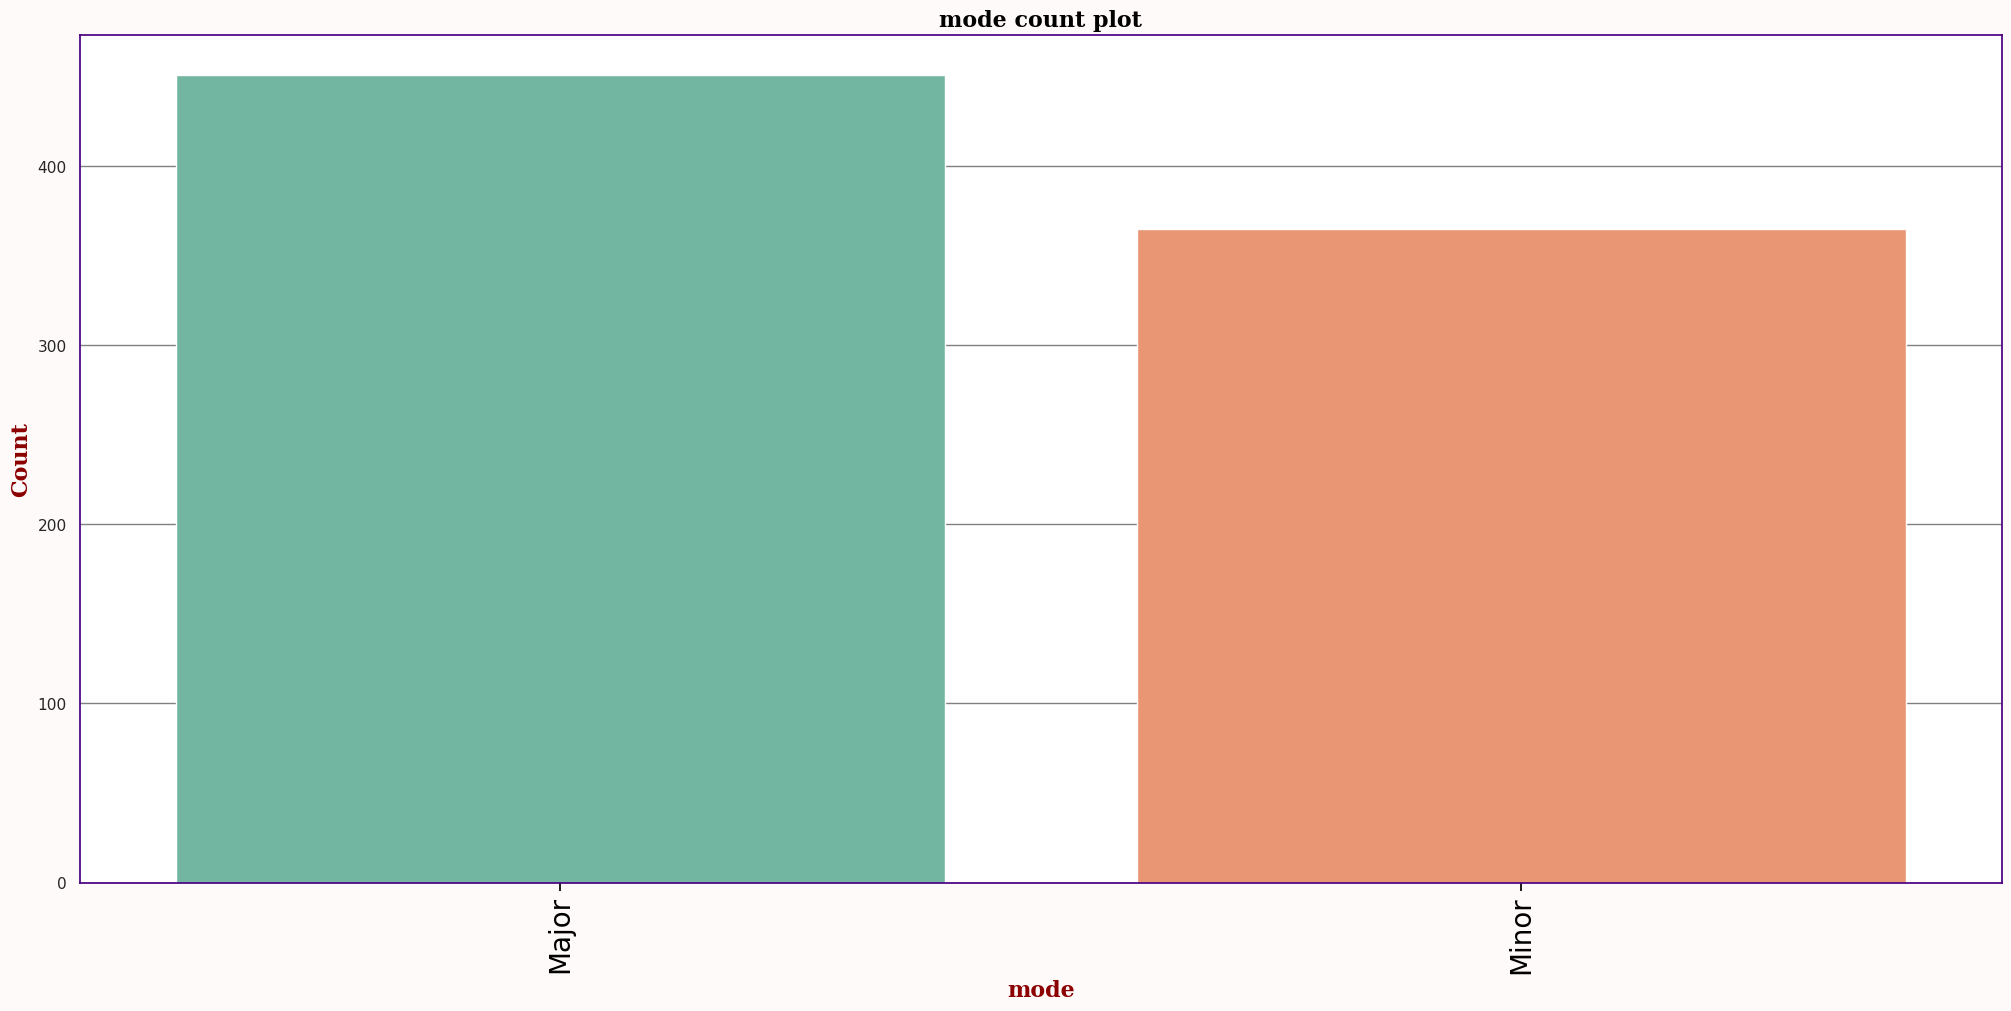

In [501]:
plotting_count(songs_eda,'mode')

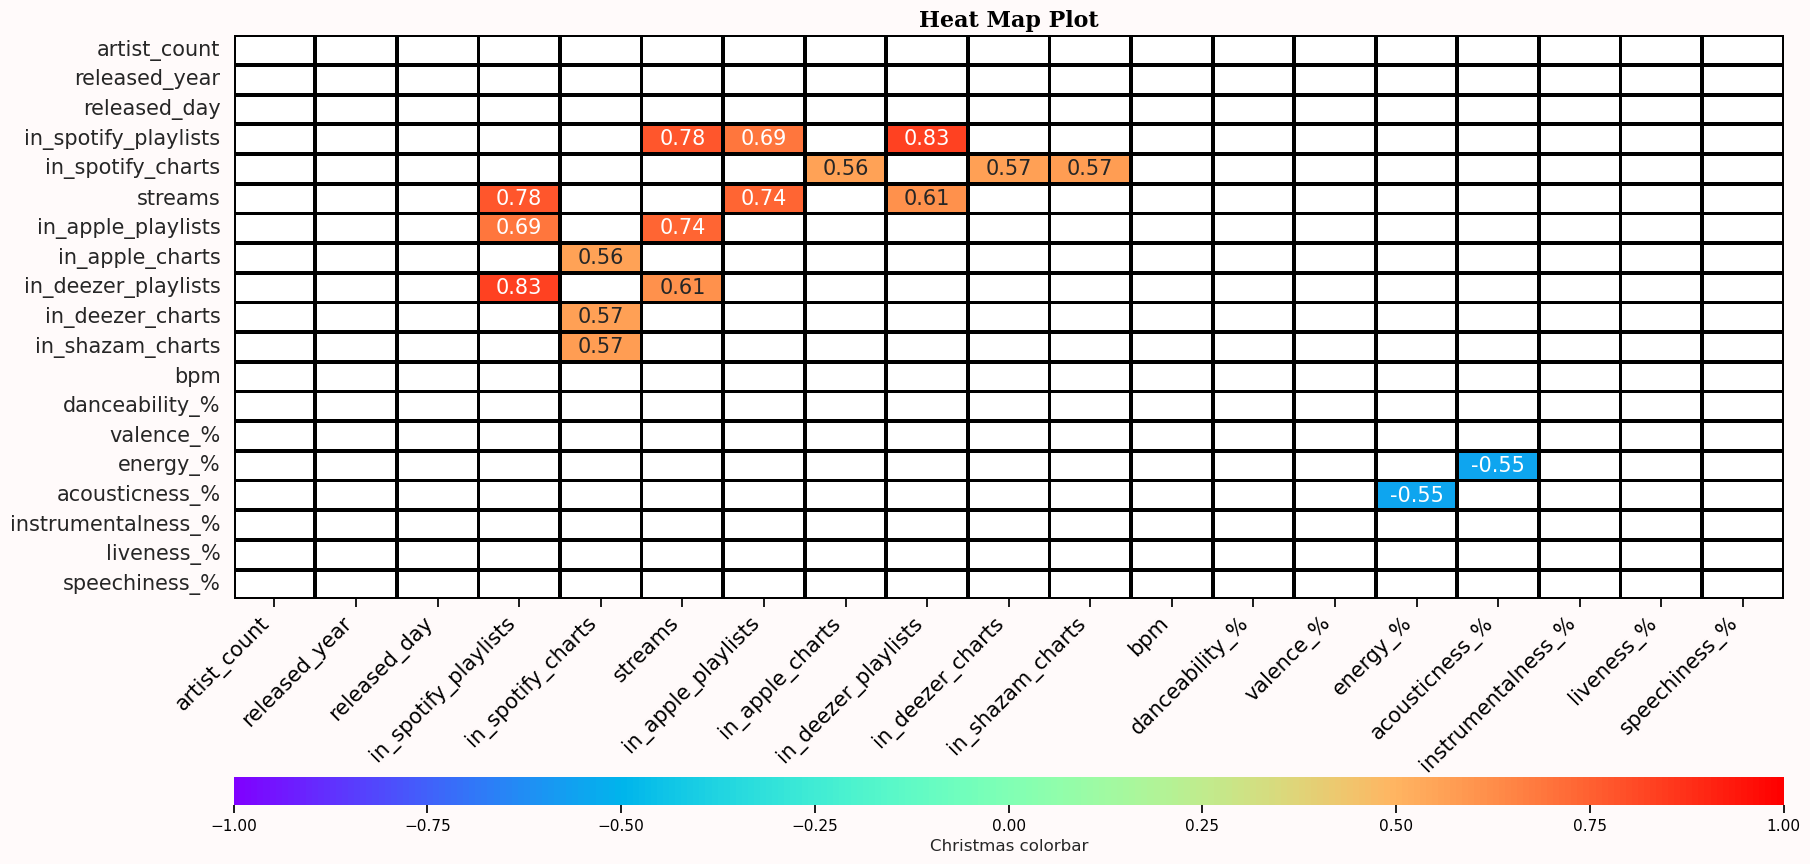

In [526]:
plotting_heatmap(songs_eda,num)

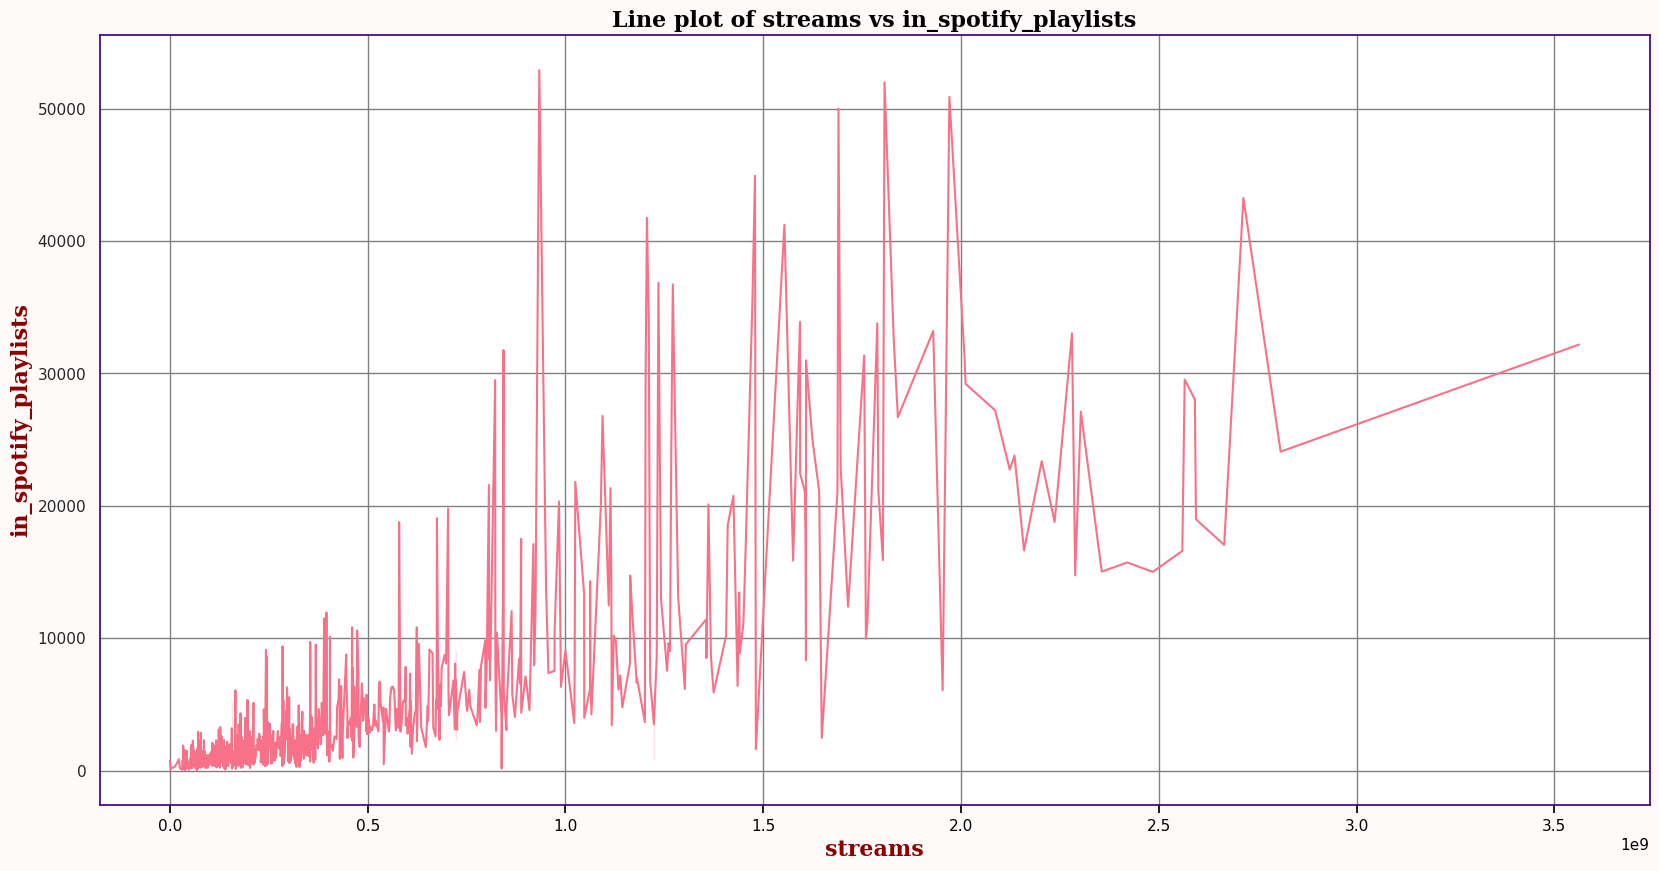

In [527]:
plotting_lines(songs_eda,'streams','in_spotify_playlists')

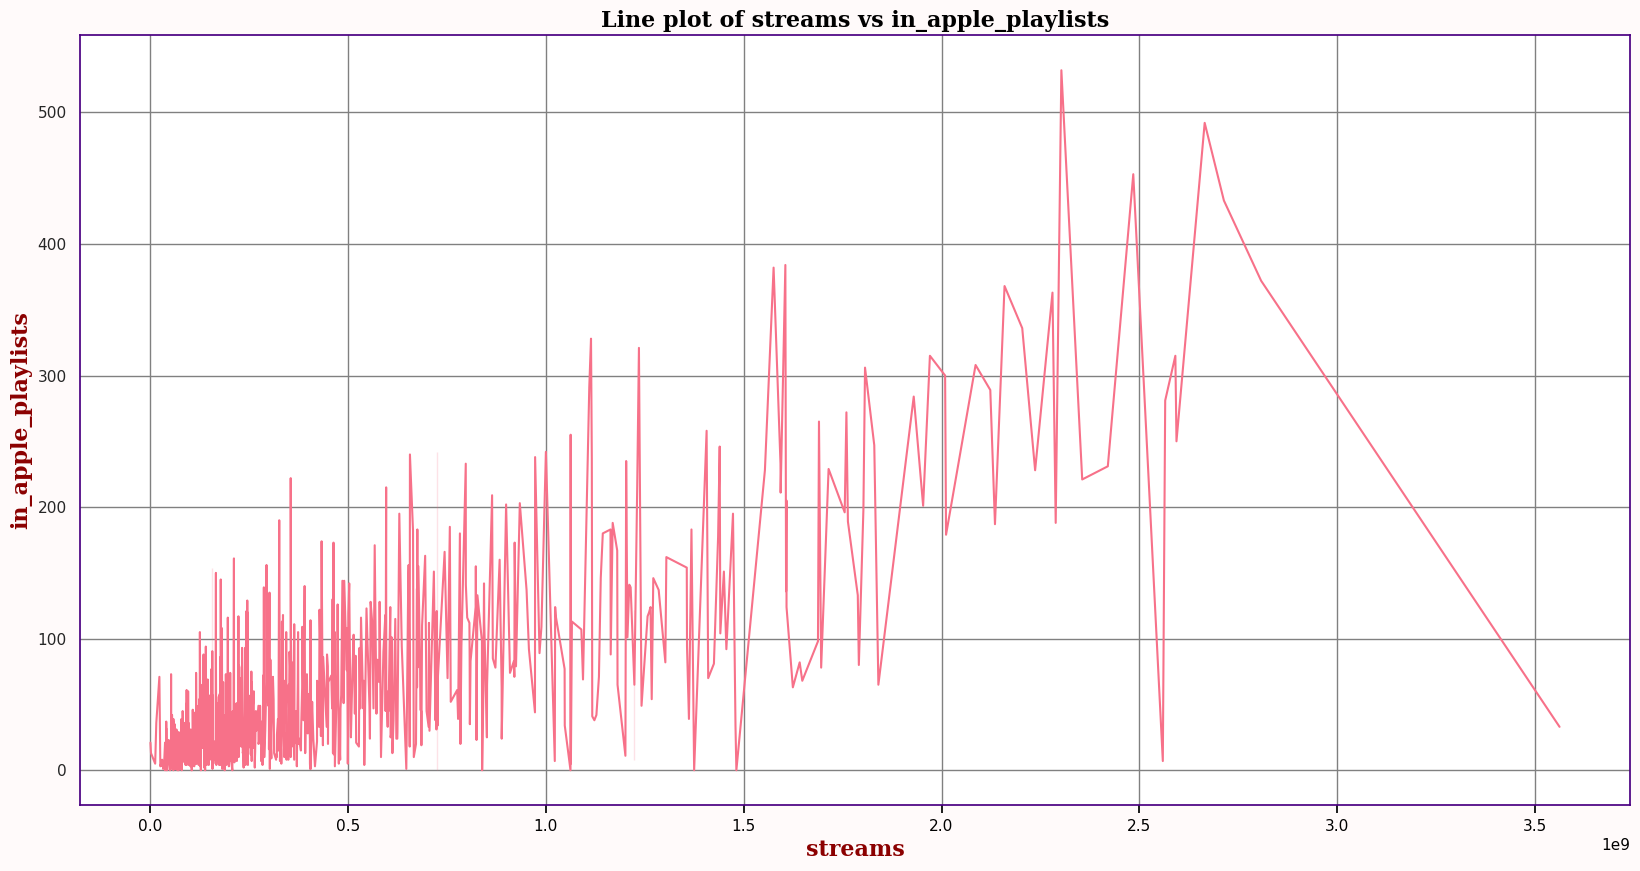

In [528]:
plotting_lines(songs_eda,'streams','in_apple_playlists')

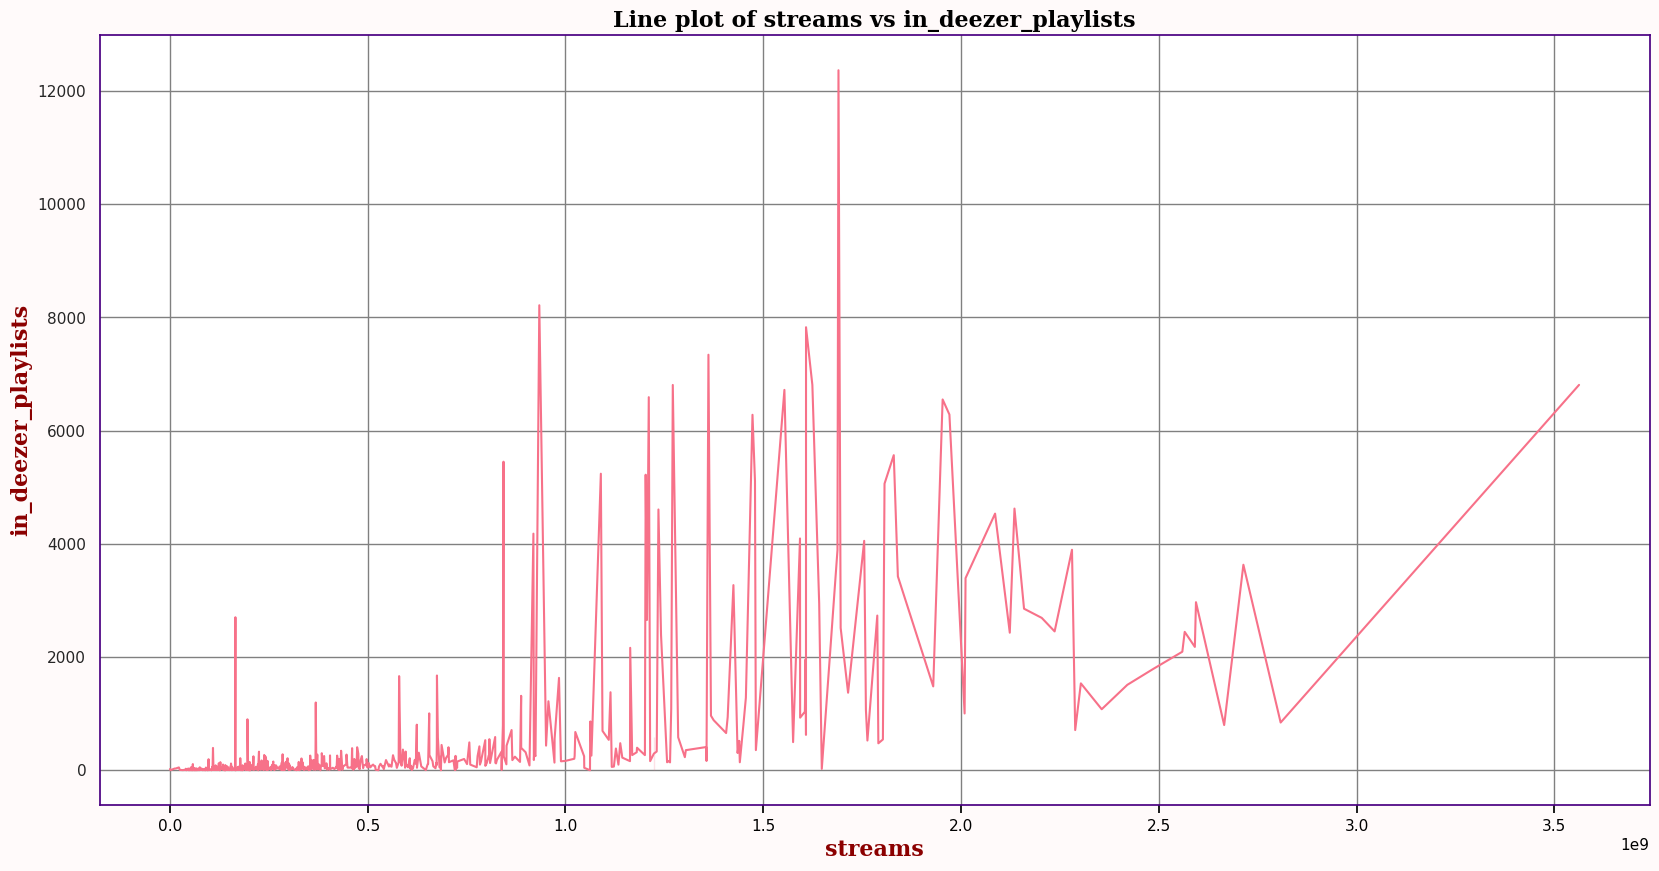

In [529]:
plotting_lines(songs_eda,'streams','in_deezer_playlists')

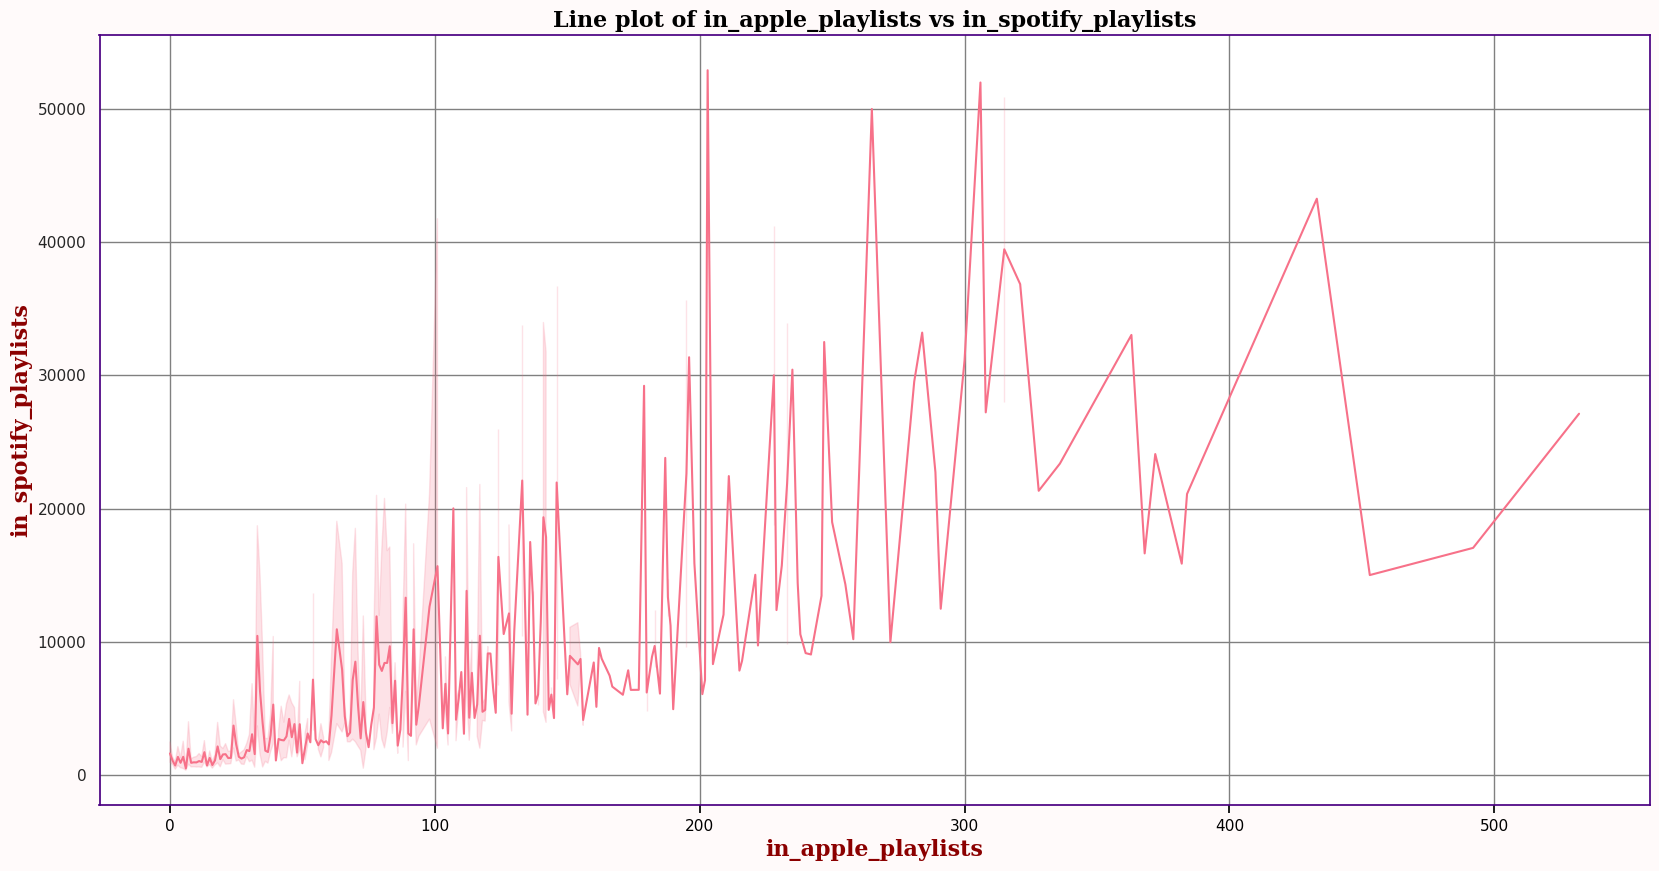

In [530]:
plotting_lines(songs_eda,'in_apple_playlists','in_spotify_playlists')

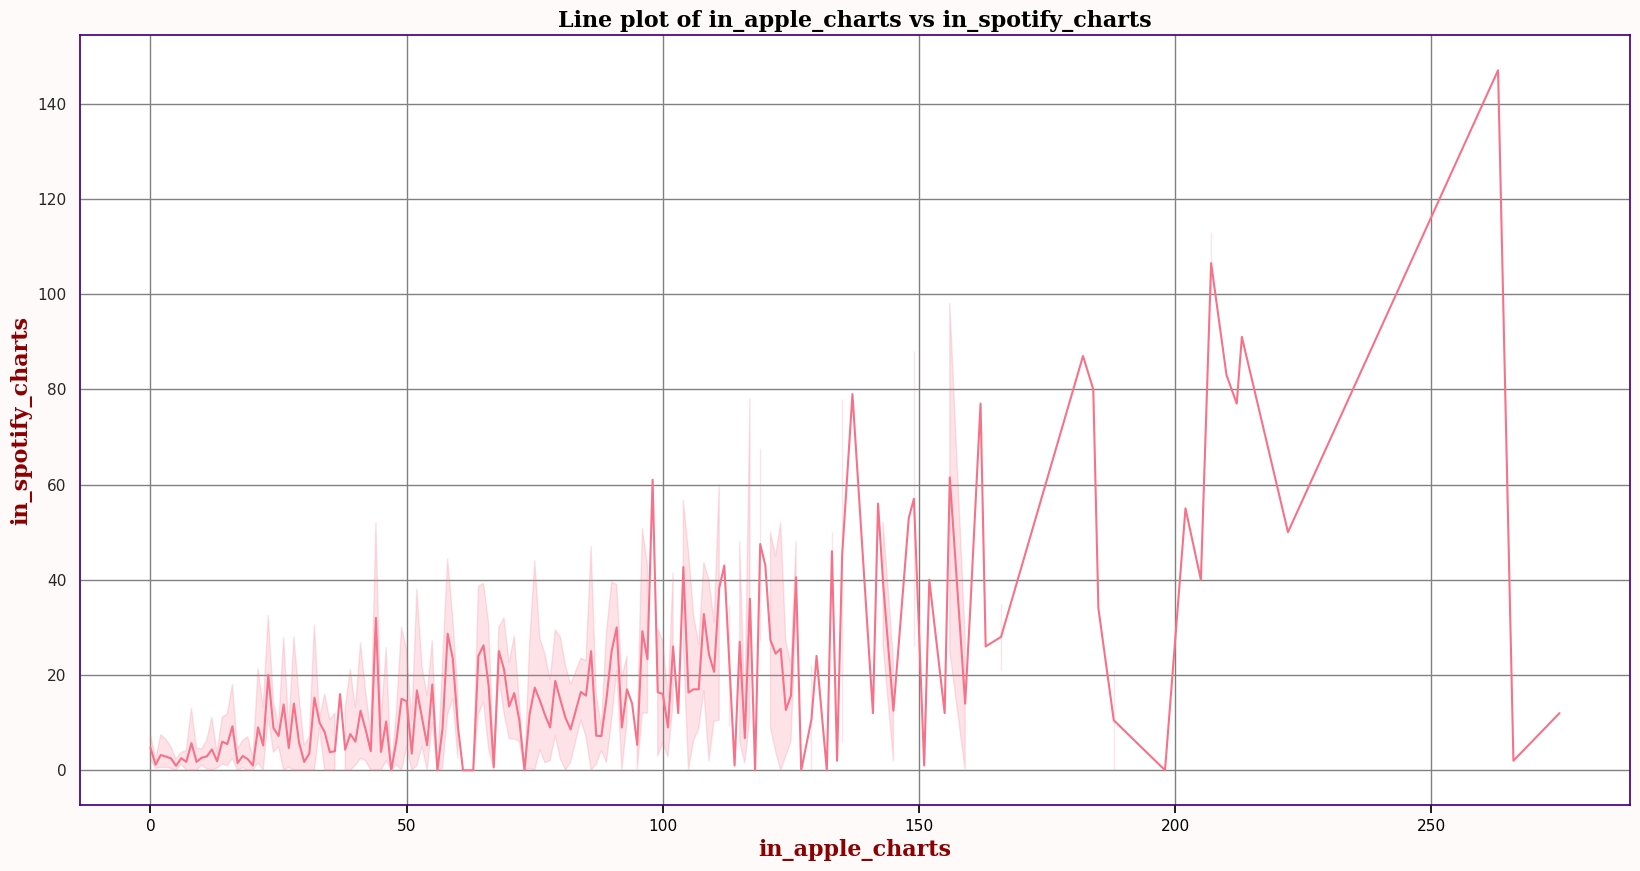

In [531]:
plotting_lines(songs_eda,'in_apple_charts','in_spotify_charts')

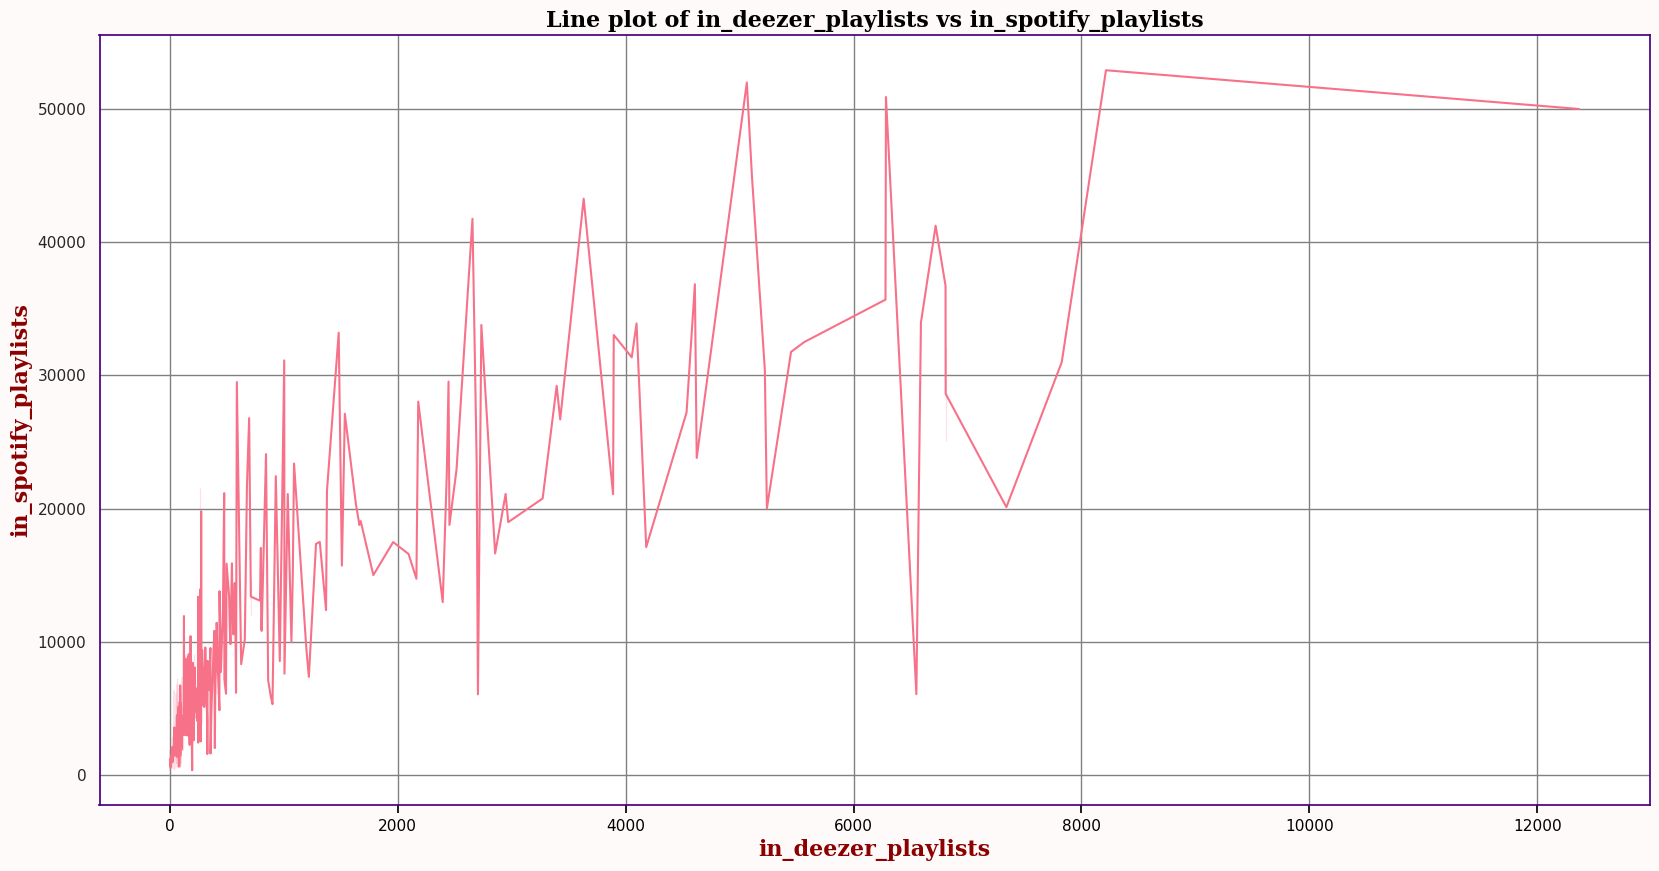

In [532]:
plotting_lines(songs_eda,'in_deezer_playlists','in_spotify_playlists')

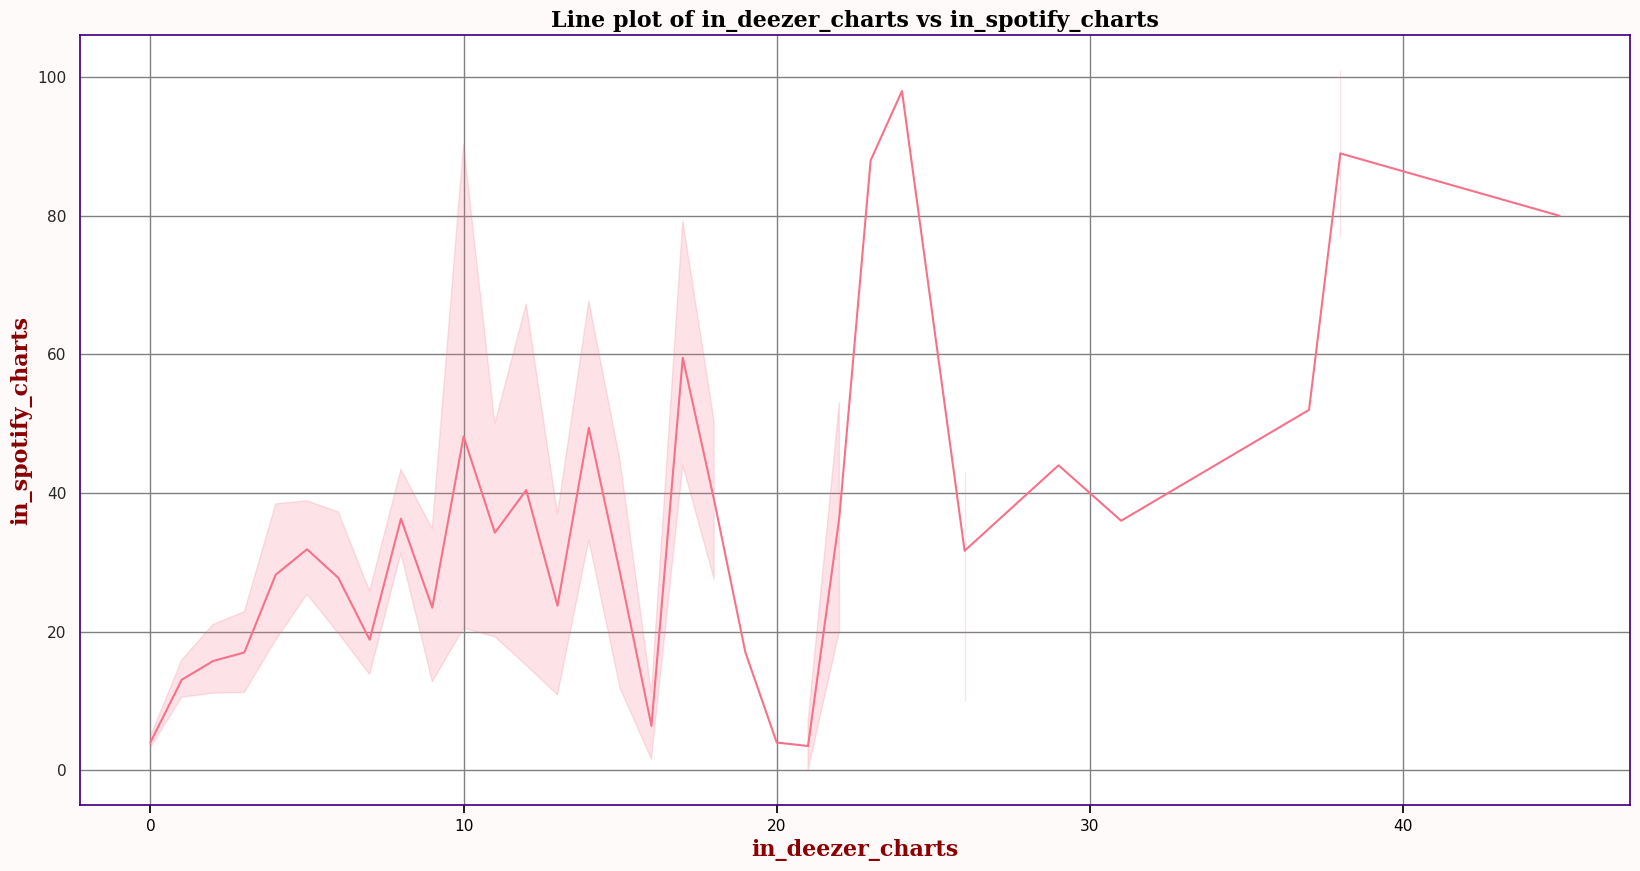

In [533]:
plotting_lines(songs_eda,'in_deezer_charts','in_spotify_charts')

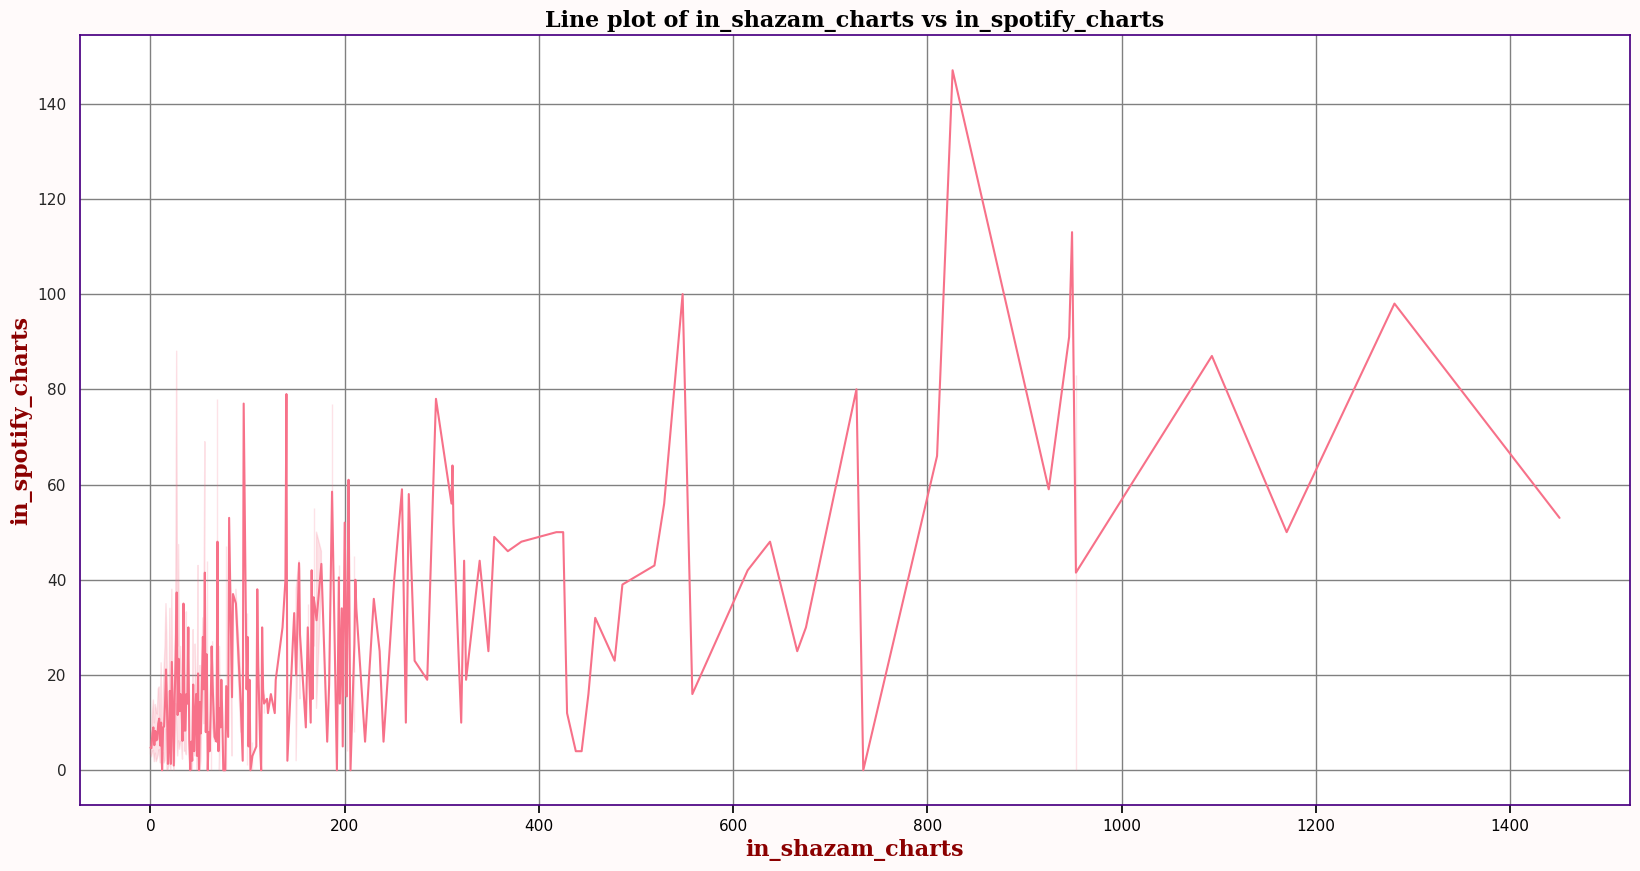

In [534]:
plotting_lines(songs_eda,'in_shazam_charts','in_spotify_charts')

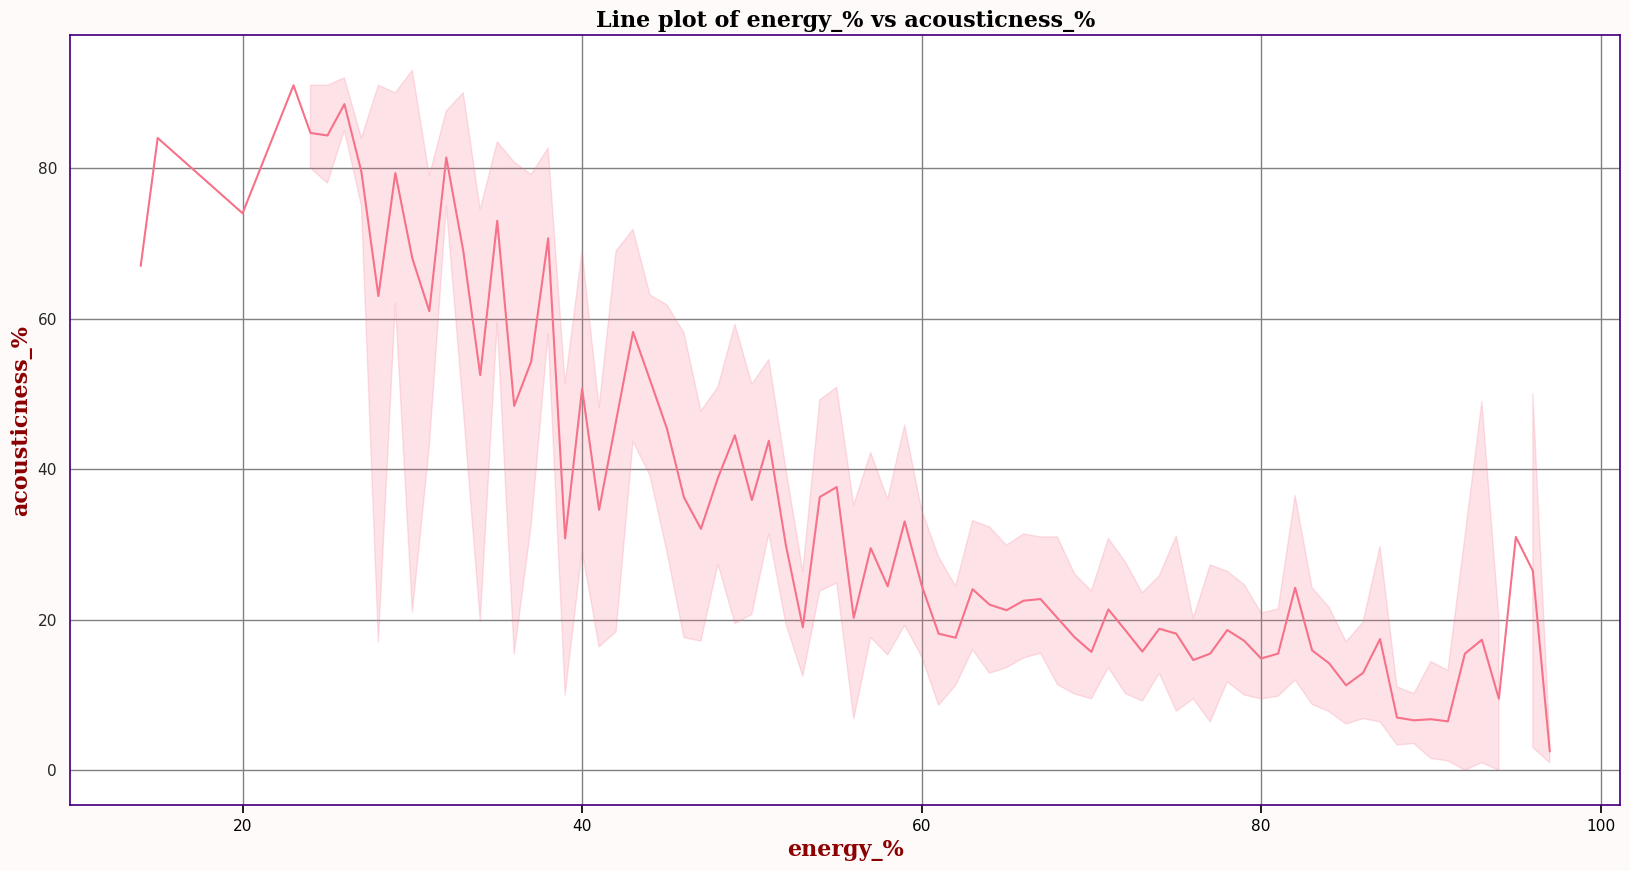

In [535]:
plotting_lines(songs_eda,'energy_%','acousticness_%')

## **Observations & Conclusions**

### **Observations-1**

**General Observations**

- Only one song has 8 artists featured in it
- Only one song was released recorded from 1930
- About 159 songs were released in 2023
- For the mean year, 2018, only 9 songs were released
- The mean month over the years, June, about 73 songs were released
- The mean day, 14, shows a total of 22 songs being released, while the median day 13, has 34 songs being released.
- No song has the exact mean streams but are above the mean number of streams, 468985800. About 256 songs were above this value
- About 559 songs are between the mean streams and the minimum number of streams
- From the data, about 408 songs are above the median number of streams 

**Spotify Observations**
- 207 songs are above the mean value of Spotify playlists
- Only one song is exactly as the minimum value of Spotify playlists; Still With You by Jung Kook
- 408 songs are above the median value of Spotify playlists
- Only one song is above the max value of Spotify playlists; Get Lucky - Radio Edit by Pharrell Williams, Nile Rodgers, Daft Punk
- The least ranked song is Seven (feat. Latto) (Explicit Ver.)	by Latto, Jung Kook, ranked 147
- About 15 songs are ranked number one on the Spotify charts with Kendrick Lamar's song HUMBLE having the highest streams;1929770265.

**Apple Observations**
- 268 songs are above the mean value of Apple playlists
- Only 19 songs are exactly as the minimum value of Apple playlists,0. None of these songs were in any Apple playlists
- 410 songs are above the median value of Apple playlists
- Only one song is above the max value of Apple playlists; Don't Start Now by Dua Lipa
- The least ranked song is Last Last by Burna Boy, ranked 275
- About 35 songs are ranked number one on the Apple charts with Heather	by Conan Gray having the highest streams; 1301799902.

**Deezer Observations**
- 112 songs are above the mean value of Deezer playlists
- Only 21 songs are exactly as the minimum value of Deezer playlists,0. None of these songs were in any Deezer playlists
- 410 songs are above the median value of Deezer playlists
- Only one song is above the max value of Deezer playlists; Smells Like Teen Spirit - Remastered 2021 by Nirvana
- The least ranked song is I'm Good (Blue) by Bebe Rexha, David Guetta, ranked 45
- About 120 songs are ranked number one on the Deezer charts with Starboy by The Weeknd, Daft Punk having the highest streams; 2565529693.

**Shazam Observations**
- The least ranked song is Makeba by Jain, ranked 1451
- About 15 songs are ranked number one on the Shazam charts with Why'd You Only Call Me When You're High? by Arctic Monkeys	having the highest streams; 1267333350.

**bpm Observations**
- 382 songs are above/equal the mean bpm
- 506 songs are below/equal the minimum bpm
- 439 songs are above/equal the median bpm
- 1 song(s) is/are above/equal the maximum bpm, Lover by Taylor Swift

**danceability_% Observations**
- 440 songs are above/equal the mean value
- 1 song is below/equal the minimum value, Whitte Christmas by Bing Crosby, John Scott Trotter & His Orchestra, Ken Darby Singers
- 411 songs are above/equal the median value
- 1 song(s) is/are above/equal the maximum value, Lover by Taylor Swift

**valence_% Observations**
- 401 songs are above/equal the mean value
- 5 songs are below/equal the minimum value
- 414 songs are above/equal the median value
- 5 song(s) is/are above/equal the maximum value

**energy_% Observations**
- 428 songs are above/equal the mean value
- 1 song(s) is/are below/equal the minimum value, Heart To Heart by Mac DeMarco
- 409 songs are above/equal the median value
- 2 song(s) is/are above/equal the maximum value

**acousticness_% Observations**
- 316 songs are above/equal the mean value
- 50 songs are below/equal the minimum value
- 415 songs are above/equal the median value
- 523 song(s) is/are above/equal the maximum value

**instrumentalness_% Observations**
- 56 songs are above/equal the mean value
- 741 songs are below/equal the minimum value
- 411 songs are above/equal the median value
- 1 song(s) is/are above/equal the maximum value, Alien Blues Vundabar

**liveness_% Observations**
- 259 songs are above/equal the mean value
- 3 songs are below/equal the minimum value
- 462 songs are above/equal the median value
- 1 song(s) is/are above/equal the maximum value, Vai Lï¿½ï¿½ Em Casa by Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique

**speechiness_% Observations**
- 232 songs are above/equal the mean value
- 3 songs are below/equal the minimum value
- 435 songs are above/equal the median value
- 1 song(s) is/are above/equal the maximum value, Cartï¿½ï¿½o B	by MC Caverinha, KayBlack

### **Observations-2**

- 2022 has the highest number of streams
- The 1st day of each month has the highest number of streams
- 2022 has the highest number of Spotify playlist
- The 1st day of each month has the highest number of Spotify playlist
- 2022 has the highest number of Apple playlist
- The 1st day of each month has the highest number of Apple playlist
- 2013 has the highest number of Deezer playlist
- The 1st day of each month has the highest number of Deezer playlist
- 2022 has the highest bpm
- The 1st day of each month has the highest bpm
- 2022 has the highest danceability_%
- The 1st day of each month has the highest danceability_%
- 2022 has the highest valence_%
- The 1st day of each month has the highest valence_%
- 2022 has the highest energy_%
- The 1st day of each month has the highest energy_%
- 2022 has the highest acousticness_%
- The 1st day of each month has the highest acousticness_%
- 2022 has the highest instrumentalness_%
- The 24th day of each month has the highest instrumentalness_%
- 2022 has the highest liveness_%
- The 1st day of each month has the highest liveness_%
- 2022 has the highest speechiness_%
- The 1st day of each month has the highest speechiness_%

### **Observations-3**

- There are mroe songs with Major mode than Minors
- More songs are released in 2022
- More songs are released in May
- More songs are released in 1st day of each month
- Looking at bpm boxplot, 
    - 25% of the data is below 99bpm
    - 50% is below 120bpm,
    - 75% is below 141.25bpm 
    - 25% is above 141.25bpm
- C# is the highest number of songs released
- There is +ve correlation with the following;
    - streams and in_spotify_playlists
    - streams and in_apple_playlists
    - streams and in_deezer_playlists
    - in_apple_playlists and in_spotify_playlists
    - in_apple_charts and in_spotify_charts
    - in_deezer_playlists and in_spotify_playlists
    - in_deezer_charts and in_spotify_charts
    - in_shazam_charts and in_spotify_charts
- There is -ve correlation with the following;
    - energy_% and acousticness_%